# Predicting heart disease using machine learning

This notebook looks into using various Python-bases machine learning and data science libraries in an aattempt to build
a machine learning model capable of predicting whether or not somone has heart disease bases on their medical attributes.

Following approach: 
1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical paramters about a patient, van we predict weither or not a patient have heart disease

## 2. Data

The original data came from the cleaveland from the UCI Machine Learning Repository. 

There is also a version of it available on Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the POC, we'll pursue the project. 

## 4. Features
**Create Data dictionary**
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
  -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [3]:
df = pd.read_csv("data\heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

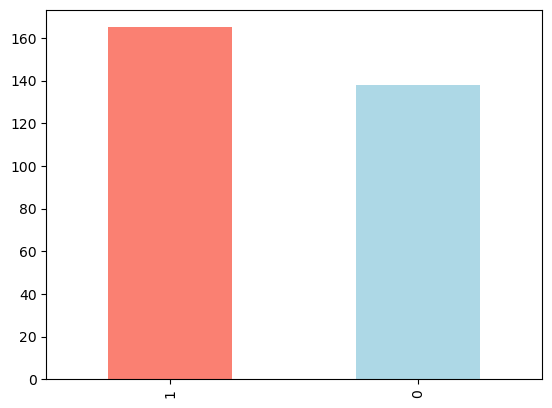

In [7]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

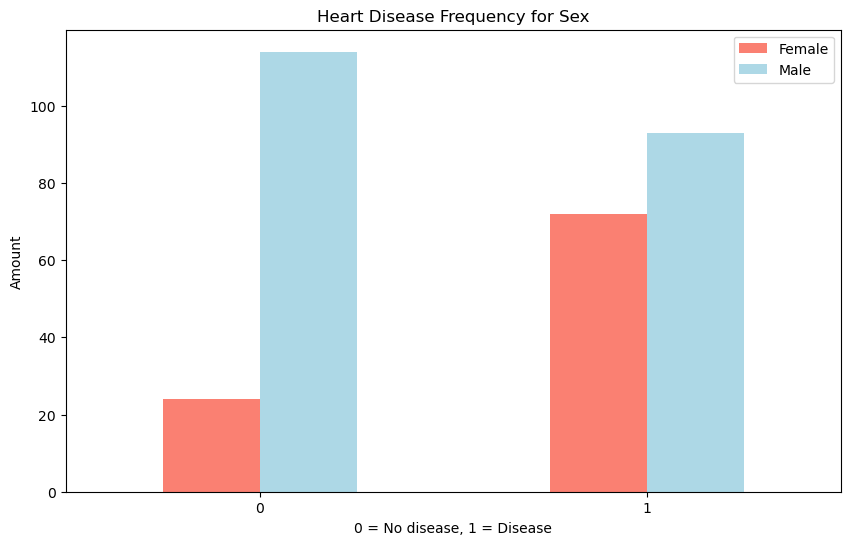

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]
                                   );
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease


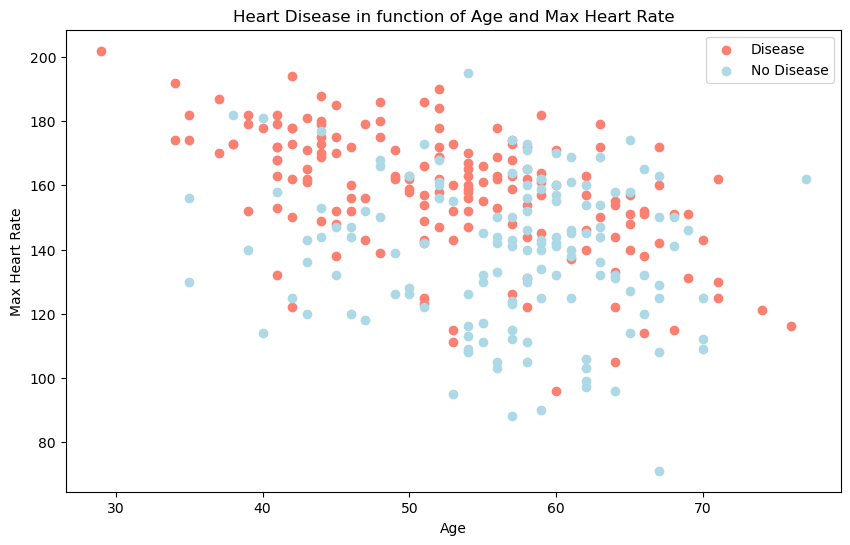

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

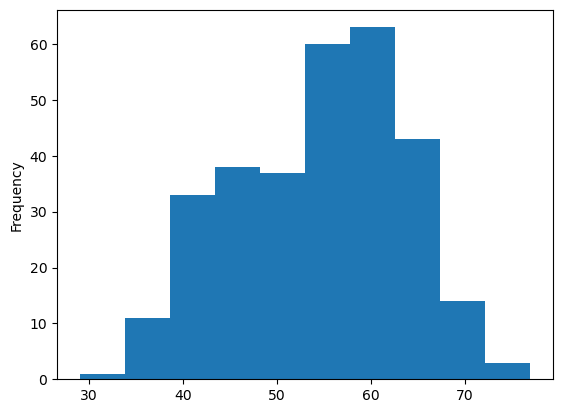

In [15]:
# Check the distribution of the age column with a histogramy
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain type
[0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic]

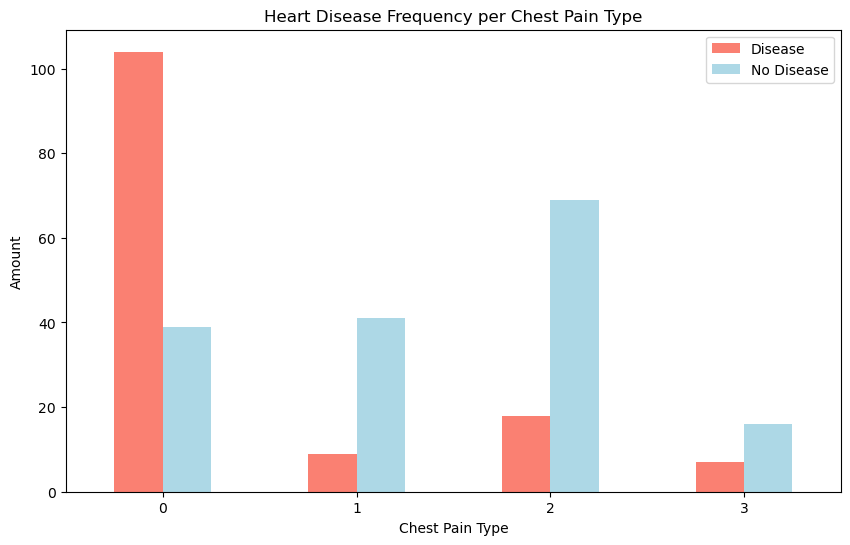

In [16]:
# Crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color = ["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"]);
plt.xticks(rotation=0);

In [19]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

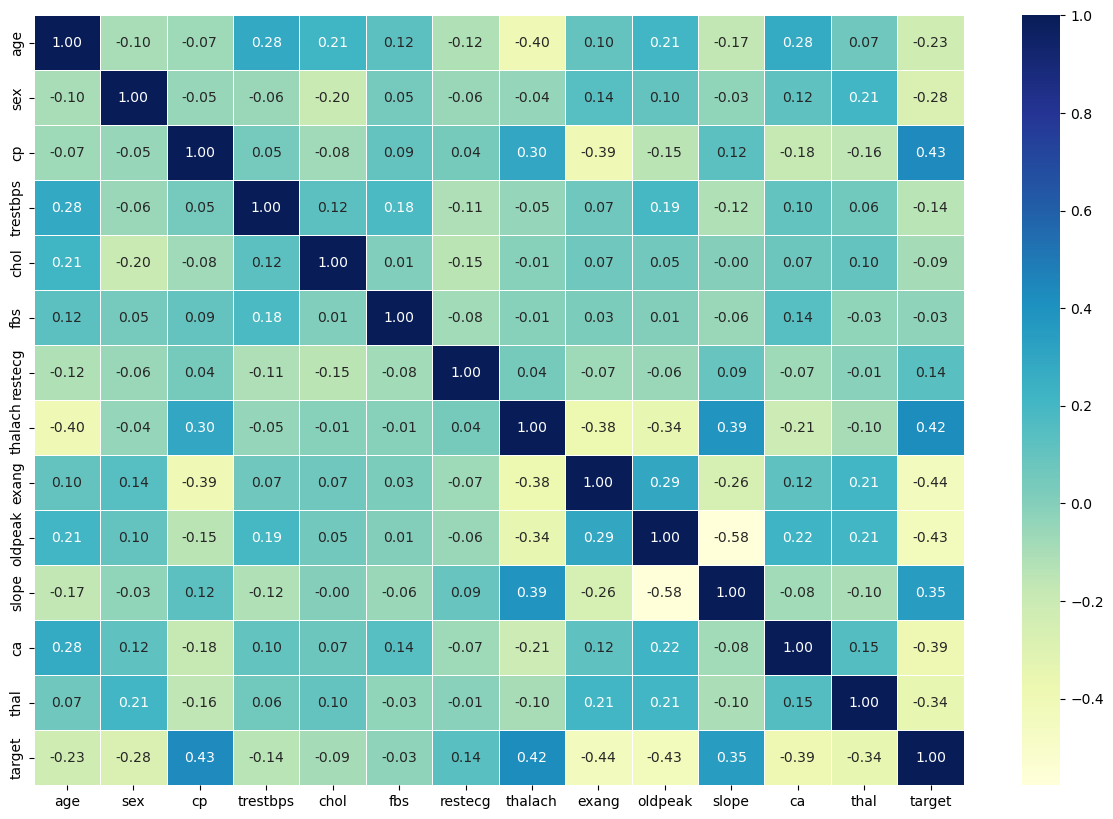

In [18]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


## 5. Modeling

In [39]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [45]:
#Split data into X et y
X = df.drop("target", axis=1)
y = df["target"]

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

We're going to try 3 differents machine leanring models:
1. Logistic Regressiion
2. K_Nearest Neighbours Classifier
3. Random Forest Classifier

In [53]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [56]:
model_scores = fit_and_score(models,
                             X_train, 
                             X_test,
                             y_train,
                             y_test)
model_scores

C:\Users\Lee Hanul\Machine_Learning\env\jupyter\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

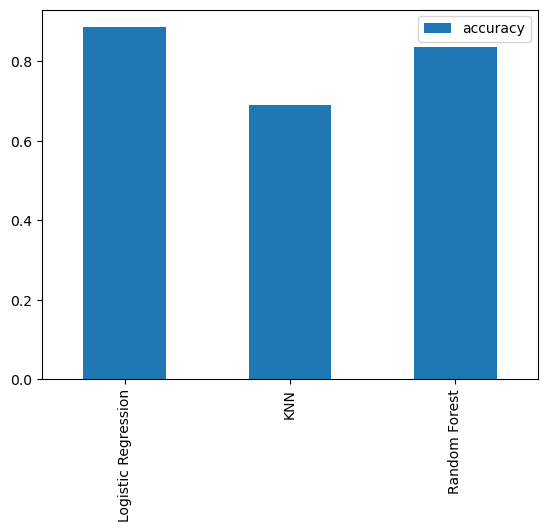

In [57]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();


## Hyperparameter tuning

In [59]:
## Knn Tuning

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [60]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [61]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


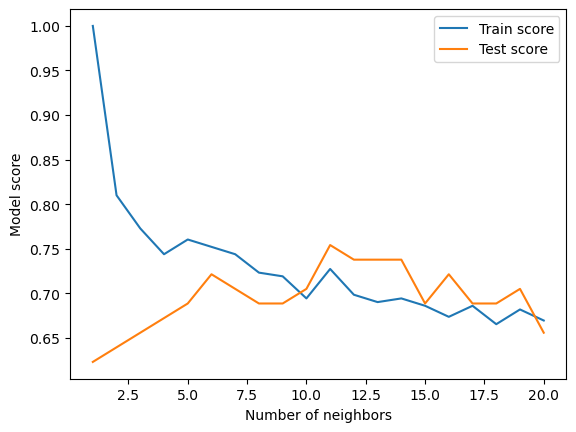

In [63]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparamter tuning with RandomizedSearchCV

Model to tune: 
* LogisticRegression()
* RandomForestClassifier

In [73]:
# Create a hyperparamter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4 , 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



In [74]:
# Tune logisticRegression
np.random.seed(42)

#Setup random hyperparamter search for LoigisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                refit=True)

# Fit random hyperparamter search model for logisticRegrestion
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [76]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [77]:
# Tune logisticRegression
np.random.seed(42)

#Setup random hyperparamter search for LoigisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                refit=True)

# Fit random hyperparamter search model for logisticRegrestion
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [78]:
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': None}

In [79]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [80]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

In [86]:
# Create different hyperparamter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4 , 30),
                "solver": ["liblinear"]}

#Setup random hyperparamter search for LoigisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          refit=True)

# Fit random hyperparamter search model for logisticRegrestion
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [87]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [88]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluatin our tuned machine learning classifier, beyon accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precission
* Recall
* F1-score

In [89]:
# Make prediciton with tuned model
y_preds = gs_log_reg.predict(X_test)

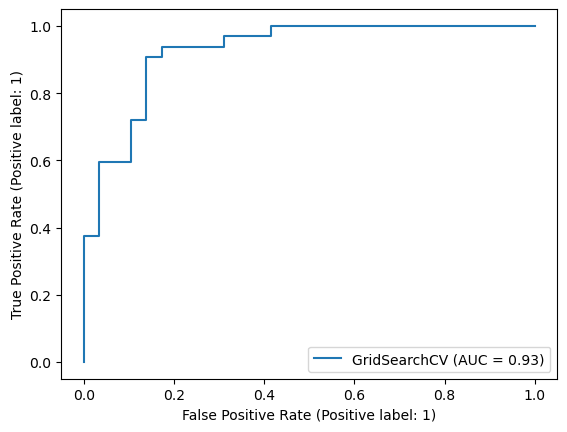

In [96]:
#plot ROC curve and calculate AUC metrics
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

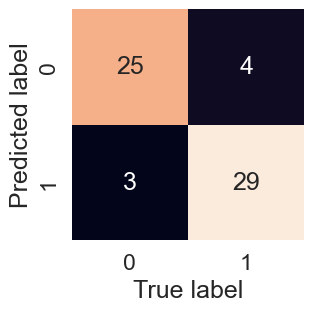

In [98]:
# Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize =(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [99]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [106]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [107]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [110]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [111]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [112]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [113]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [20]:
# Visualize corss-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics");

NameError: name 'cv_acc' is not defined

### Feature Importance


In [118]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train);

In [119]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [121]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: title={'center': 'Feature Importance'}>

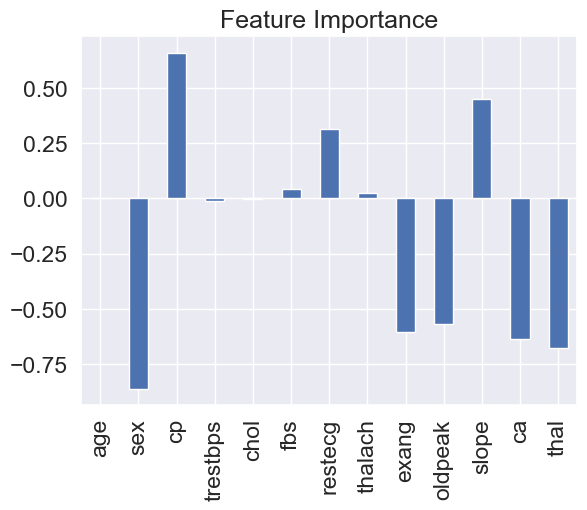

In [124]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## 6. Experimentation

In [151]:
## Trying with catboost
from catboost import CatBoostClassifier

catboost_grid = {"learning_rate": np.arange(0.001, 0.1, 100),
                 "depth": [1, 3, 5, 10],
                 "subsample": np.arange(0.05, 1, 0.05),
                 "colsample_bylevel": np.arange(0.05, 1, 0.05),
                 "min_data_in_leaf": np.arange(1, 100, 10)}

#Setup random hyperparamter search for LoigisticRegression
rs_cb = RandomizedSearchCV(CatBoostClassifier(),
                            param_distributions=catboost_grid,
                            cv=2,
                            n_iter=60,
                            verbose=True,
                            refit=True)

# Fit random hyperparamter search model for logisticRegrestion
rs_cb.fit(X_train, y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
0:	learn: 0.6929666	total: 1.19ms	remaining: 1.19s
1:	learn: 0.6925958	total: 3.11ms	remaining: 1.55s
2:	learn: 0.6922304	total: 4.6ms	remaining: 1.53s
3:	learn: 0.6918614	total: 5.57ms	remaining: 1.39s
4:	learn: 0.6915394	total: 6.64ms	remaining: 1.32s
5:	learn: 0.6911734	total: 7.76ms	remaining: 1.28s
6:	learn: 0.6908041	total: 8.71ms	remaining: 1.24s
7:	learn: 0.6906317	total: 9.78ms	remaining: 1.21s
8:	learn: 0.6903048	total: 11.1ms	remaining: 1.23s
9:	learn: 0.6901956	total: 12.2ms	remaining: 1.21s
10:	learn: 0.6900377	total: 13.4ms	remaining: 1.2s
11:	learn: 0.6897167	total: 14.5ms	remaining: 1.19s
12:	learn: 0.6893919	total: 15.8ms	remaining: 1.2s
13:	learn: 0.6890276	total: 17.1ms	remaining: 1.2s
14:	learn: 0.6887056	total: 18.1ms	remaining: 1.19s
15:	learn: 0.6885378	total: 19.3ms	remaining: 1.19s
16:	learn: 0.6882140	total: 20.4ms	remaining: 1.18s
17:	learn: 0.6878521	total: 21.4ms	remaining: 1.17s
18:	learn: 0.687

286:	learn: 0.6182674	total: 344ms	remaining: 855ms
287:	learn: 0.6181323	total: 346ms	remaining: 854ms
288:	learn: 0.6178811	total: 347ms	remaining: 853ms
289:	learn: 0.6176328	total: 348ms	remaining: 852ms
290:	learn: 0.6173835	total: 349ms	remaining: 850ms
291:	learn: 0.6171362	total: 350ms	remaining: 849ms
292:	learn: 0.6168893	total: 352ms	remaining: 848ms
293:	learn: 0.6166108	total: 353ms	remaining: 847ms
294:	learn: 0.6163323	total: 354ms	remaining: 847ms
295:	learn: 0.6160827	total: 356ms	remaining: 846ms
296:	learn: 0.6158757	total: 357ms	remaining: 845ms
297:	learn: 0.6156298	total: 358ms	remaining: 844ms
298:	learn: 0.6153804	total: 360ms	remaining: 843ms
299:	learn: 0.6151040	total: 361ms	remaining: 842ms
300:	learn: 0.6148593	total: 362ms	remaining: 841ms
301:	learn: 0.6146114	total: 364ms	remaining: 840ms
302:	learn: 0.6143630	total: 365ms	remaining: 839ms
303:	learn: 0.6141155	total: 366ms	remaining: 838ms
304:	learn: 0.6138708	total: 367ms	remaining: 837ms
305:	learn: 

446:	learn: 0.5851617	total: 529ms	remaining: 655ms
447:	learn: 0.5849491	total: 531ms	remaining: 654ms
448:	learn: 0.5847363	total: 532ms	remaining: 653ms
449:	learn: 0.5845243	total: 533ms	remaining: 651ms
450:	learn: 0.5844486	total: 534ms	remaining: 650ms
451:	learn: 0.5842366	total: 535ms	remaining: 649ms
452:	learn: 0.5839966	total: 536ms	remaining: 647ms
453:	learn: 0.5837563	total: 537ms	remaining: 646ms
454:	learn: 0.5835344	total: 539ms	remaining: 645ms
455:	learn: 0.5834149	total: 540ms	remaining: 644ms
456:	learn: 0.5831755	total: 541ms	remaining: 643ms
457:	learn: 0.5830557	total: 542ms	remaining: 641ms
458:	learn: 0.5829393	total: 543ms	remaining: 640ms
459:	learn: 0.5827013	total: 544ms	remaining: 639ms
460:	learn: 0.5826044	total: 546ms	remaining: 638ms
461:	learn: 0.5823821	total: 547ms	remaining: 637ms
462:	learn: 0.5821614	total: 548ms	remaining: 636ms
463:	learn: 0.5819250	total: 549ms	remaining: 634ms
464:	learn: 0.5817452	total: 550ms	remaining: 633ms
465:	learn: 

611:	learn: 0.5549576	total: 718ms	remaining: 455ms
612:	learn: 0.5547721	total: 719ms	remaining: 454ms
613:	learn: 0.5545873	total: 720ms	remaining: 453ms
614:	learn: 0.5545092	total: 721ms	remaining: 452ms
615:	learn: 0.5543062	total: 722ms	remaining: 450ms
616:	learn: 0.5541028	total: 724ms	remaining: 449ms
617:	learn: 0.5539980	total: 725ms	remaining: 448ms
618:	learn: 0.5538005	total: 726ms	remaining: 447ms
619:	learn: 0.5536951	total: 727ms	remaining: 446ms
620:	learn: 0.5535939	total: 728ms	remaining: 444ms
621:	learn: 0.5533915	total: 729ms	remaining: 443ms
622:	learn: 0.5531888	total: 731ms	remaining: 442ms
623:	learn: 0.5529925	total: 732ms	remaining: 441ms
624:	learn: 0.5528084	total: 733ms	remaining: 440ms
625:	learn: 0.5526076	total: 734ms	remaining: 439ms
626:	learn: 0.5524064	total: 736ms	remaining: 438ms
627:	learn: 0.5522100	total: 737ms	remaining: 437ms
628:	learn: 0.5520095	total: 739ms	remaining: 436ms
629:	learn: 0.5519065	total: 740ms	remaining: 435ms
630:	learn: 

878:	learn: 0.5155647	total: 1.07s	remaining: 148ms
879:	learn: 0.5154152	total: 1.07s	remaining: 147ms
880:	learn: 0.5153414	total: 1.08s	remaining: 145ms
881:	learn: 0.5152120	total: 1.08s	remaining: 144ms
882:	learn: 0.5150625	total: 1.08s	remaining: 143ms
883:	learn: 0.5149135	total: 1.08s	remaining: 142ms
884:	learn: 0.5147497	total: 1.08s	remaining: 140ms
885:	learn: 0.5145862	total: 1.08s	remaining: 139ms
886:	learn: 0.5145043	total: 1.08s	remaining: 138ms
887:	learn: 0.5143412	total: 1.08s	remaining: 137ms
888:	learn: 0.5143384	total: 1.09s	remaining: 136ms
889:	learn: 0.5141756	total: 1.09s	remaining: 134ms
890:	learn: 0.5140274	total: 1.09s	remaining: 133ms
891:	learn: 0.5139457	total: 1.09s	remaining: 132ms
892:	learn: 0.5138903	total: 1.09s	remaining: 131ms
893:	learn: 0.5137278	total: 1.09s	remaining: 130ms
894:	learn: 0.5135655	total: 1.09s	remaining: 128ms
895:	learn: 0.5134034	total: 1.1s	remaining: 127ms
896:	learn: 0.5132412	total: 1.1s	remaining: 126ms
897:	learn: 0.

149:	learn: 0.6611208	total: 189ms	remaining: 1.07s
150:	learn: 0.6608804	total: 190ms	remaining: 1.07s
151:	learn: 0.6607505	total: 192ms	remaining: 1.07s
152:	learn: 0.6605837	total: 193ms	remaining: 1.07s
153:	learn: 0.6604358	total: 195ms	remaining: 1.07s
154:	learn: 0.6602883	total: 196ms	remaining: 1.07s
155:	learn: 0.6600482	total: 198ms	remaining: 1.07s
156:	learn: 0.6598945	total: 199ms	remaining: 1.07s
157:	learn: 0.6596549	total: 201ms	remaining: 1.07s
158:	learn: 0.6594829	total: 202ms	remaining: 1.07s
159:	learn: 0.6592447	total: 204ms	remaining: 1.07s
160:	learn: 0.6590724	total: 205ms	remaining: 1.07s
161:	learn: 0.6589632	total: 207ms	remaining: 1.07s
162:	learn: 0.6587254	total: 208ms	remaining: 1.07s
163:	learn: 0.6585520	total: 210ms	remaining: 1.07s
164:	learn: 0.6583794	total: 211ms	remaining: 1.07s
165:	learn: 0.6582096	total: 213ms	remaining: 1.07s
166:	learn: 0.6579723	total: 214ms	remaining: 1.07s
167:	learn: 0.6577360	total: 215ms	remaining: 1.07s
168:	learn: 

424:	learn: 0.6142715	total: 562ms	remaining: 761ms
425:	learn: 0.6141259	total: 564ms	remaining: 760ms
426:	learn: 0.6139809	total: 565ms	remaining: 759ms
427:	learn: 0.6136916	total: 567ms	remaining: 758ms
428:	learn: 0.6135836	total: 569ms	remaining: 757ms
429:	learn: 0.6134603	total: 570ms	remaining: 756ms
430:	learn: 0.6133485	total: 571ms	remaining: 754ms
431:	learn: 0.6132038	total: 573ms	remaining: 753ms
432:	learn: 0.6129750	total: 575ms	remaining: 753ms
433:	learn: 0.6127346	total: 576ms	remaining: 751ms
434:	learn: 0.6125072	total: 578ms	remaining: 750ms
435:	learn: 0.6123628	total: 579ms	remaining: 749ms
436:	learn: 0.6121699	total: 580ms	remaining: 748ms
437:	learn: 0.6119773	total: 582ms	remaining: 747ms
438:	learn: 0.6118337	total: 583ms	remaining: 746ms
439:	learn: 0.6116418	total: 585ms	remaining: 745ms
440:	learn: 0.6115106	total: 587ms	remaining: 744ms
441:	learn: 0.6113184	total: 589ms	remaining: 743ms
442:	learn: 0.6112079	total: 590ms	remaining: 742ms
443:	learn: 

701:	learn: 0.5730710	total: 936ms	remaining: 397ms
702:	learn: 0.5729787	total: 937ms	remaining: 396ms
703:	learn: 0.5728864	total: 939ms	remaining: 395ms
704:	learn: 0.5727635	total: 940ms	remaining: 393ms
705:	learn: 0.5725797	total: 941ms	remaining: 392ms
706:	learn: 0.5723448	total: 943ms	remaining: 391ms
707:	learn: 0.5723106	total: 944ms	remaining: 389ms
708:	learn: 0.5722106	total: 945ms	remaining: 388ms
709:	learn: 0.5720529	total: 947ms	remaining: 387ms
710:	learn: 0.5718959	total: 948ms	remaining: 385ms
711:	learn: 0.5717396	total: 949ms	remaining: 384ms
712:	learn: 0.5716486	total: 951ms	remaining: 383ms
713:	learn: 0.5715568	total: 952ms	remaining: 381ms
714:	learn: 0.5715285	total: 953ms	remaining: 380ms
715:	learn: 0.5714377	total: 955ms	remaining: 379ms
716:	learn: 0.5713418	total: 956ms	remaining: 377ms
717:	learn: 0.5711853	total: 958ms	remaining: 376ms
718:	learn: 0.5710631	total: 959ms	remaining: 375ms
719:	learn: 0.5708804	total: 961ms	remaining: 374ms
720:	learn: 

978:	learn: 0.5401384	total: 1.32s	remaining: 28.3ms
979:	learn: 0.5400567	total: 1.32s	remaining: 26.9ms
980:	learn: 0.5399749	total: 1.32s	remaining: 25.6ms
981:	learn: 0.5398661	total: 1.32s	remaining: 24.2ms
982:	learn: 0.5397611	total: 1.32s	remaining: 22.9ms
983:	learn: 0.5396842	total: 1.32s	remaining: 21.6ms
984:	learn: 0.5395220	total: 1.33s	remaining: 20.2ms
985:	learn: 0.5394399	total: 1.33s	remaining: 18.9ms
986:	learn: 0.5393738	total: 1.33s	remaining: 17.5ms
987:	learn: 0.5392683	total: 1.33s	remaining: 16.2ms
988:	learn: 0.5391638	total: 1.33s	remaining: 14.8ms
989:	learn: 0.5390782	total: 1.33s	remaining: 13.5ms
990:	learn: 0.5388648	total: 1.33s	remaining: 12.1ms
991:	learn: 0.5387994	total: 1.34s	remaining: 10.8ms
992:	learn: 0.5386918	total: 1.34s	remaining: 9.43ms
993:	learn: 0.5385606	total: 1.34s	remaining: 8.09ms
994:	learn: 0.5384309	total: 1.34s	remaining: 6.74ms
995:	learn: 0.5383112	total: 1.34s	remaining: 5.39ms
996:	learn: 0.5381811	total: 1.34s	remaining: 

215:	learn: 0.6470332	total: 308ms	remaining: 1.12s
216:	learn: 0.6467573	total: 309ms	remaining: 1.11s
217:	learn: 0.6464421	total: 310ms	remaining: 1.11s
218:	learn: 0.6461671	total: 312ms	remaining: 1.11s
219:	learn: 0.6458924	total: 313ms	remaining: 1.11s
220:	learn: 0.6457494	total: 315ms	remaining: 1.11s
221:	learn: 0.6457419	total: 316ms	remaining: 1.11s
222:	learn: 0.6454673	total: 317ms	remaining: 1.11s
223:	learn: 0.6451540	total: 319ms	remaining: 1.1s
224:	learn: 0.6450065	total: 320ms	remaining: 1.1s
225:	learn: 0.6446932	total: 322ms	remaining: 1.1s
226:	learn: 0.6445506	total: 323ms	remaining: 1.1s
227:	learn: 0.6442382	total: 324ms	remaining: 1.1s
228:	learn: 0.6439665	total: 326ms	remaining: 1.1s
229:	learn: 0.6436947	total: 327ms	remaining: 1.09s
230:	learn: 0.6433833	total: 329ms	remaining: 1.09s
231:	learn: 0.6433783	total: 330ms	remaining: 1.09s
232:	learn: 0.6432367	total: 332ms	remaining: 1.09s
233:	learn: 0.6430068	total: 333ms	remaining: 1.09s
234:	learn: 0.6428

508:	learn: 0.5955387	total: 688ms	remaining: 664ms
509:	learn: 0.5953470	total: 690ms	remaining: 663ms
510:	learn: 0.5951208	total: 691ms	remaining: 661ms
511:	learn: 0.5948941	total: 692ms	remaining: 660ms
512:	learn: 0.5946689	total: 694ms	remaining: 659ms
513:	learn: 0.5944330	total: 695ms	remaining: 657ms
514:	learn: 0.5943163	total: 697ms	remaining: 656ms
515:	learn: 0.5941998	total: 698ms	remaining: 655ms
516:	learn: 0.5939481	total: 700ms	remaining: 654ms
517:	learn: 0.5938315	total: 701ms	remaining: 653ms
518:	learn: 0.5937593	total: 703ms	remaining: 651ms
519:	learn: 0.5937555	total: 704ms	remaining: 650ms
520:	learn: 0.5936403	total: 706ms	remaining: 649ms
521:	learn: 0.5935252	total: 707ms	remaining: 647ms
522:	learn: 0.5934310	total: 709ms	remaining: 646ms
523:	learn: 0.5932403	total: 710ms	remaining: 645ms
524:	learn: 0.5930053	total: 712ms	remaining: 644ms
525:	learn: 0.5927553	total: 713ms	remaining: 643ms
526:	learn: 0.5925307	total: 715ms	remaining: 641ms
527:	learn: 

788:	learn: 0.5548327	total: 1.08s	remaining: 289ms
789:	learn: 0.5547398	total: 1.08s	remaining: 288ms
790:	learn: 0.5546449	total: 1.08s	remaining: 286ms
791:	learn: 0.5546423	total: 1.08s	remaining: 285ms
792:	learn: 0.5544820	total: 1.08s	remaining: 283ms
793:	learn: 0.5542772	total: 1.09s	remaining: 282ms
794:	learn: 0.5540864	total: 1.09s	remaining: 281ms
795:	learn: 0.5540255	total: 1.09s	remaining: 279ms
796:	learn: 0.5538232	total: 1.09s	remaining: 278ms
797:	learn: 0.5536208	total: 1.09s	remaining: 276ms
798:	learn: 0.5535252	total: 1.09s	remaining: 275ms
799:	learn: 0.5533359	total: 1.09s	remaining: 274ms
800:	learn: 0.5531470	total: 1.1s	remaining: 272ms
801:	learn: 0.5529582	total: 1.1s	remaining: 271ms
802:	learn: 0.5528656	total: 1.1s	remaining: 270ms
803:	learn: 0.5528636	total: 1.1s	remaining: 268ms
804:	learn: 0.5527709	total: 1.1s	remaining: 267ms
805:	learn: 0.5525668	total: 1.1s	remaining: 266ms
806:	learn: 0.5523636	total: 1.1s	remaining: 264ms
807:	learn: 0.55216

56:	learn: 0.6818522	total: 71.1ms	remaining: 1.18s
57:	learn: 0.6817098	total: 72.3ms	remaining: 1.17s
58:	learn: 0.6814466	total: 73.5ms	remaining: 1.17s
59:	learn: 0.6812768	total: 74.8ms	remaining: 1.17s
60:	learn: 0.6812513	total: 75.9ms	remaining: 1.17s
61:	learn: 0.6810564	total: 77.3ms	remaining: 1.17s
62:	learn: 0.6807941	total: 78.6ms	remaining: 1.17s
63:	learn: 0.6806669	total: 79.9ms	remaining: 1.17s
64:	learn: 0.6804060	total: 81.2ms	remaining: 1.17s
65:	learn: 0.6802461	total: 82.5ms	remaining: 1.17s
66:	learn: 0.6800867	total: 83.8ms	remaining: 1.17s
67:	learn: 0.6799033	total: 85ms	remaining: 1.16s
68:	learn: 0.6796430	total: 86.4ms	remaining: 1.17s
69:	learn: 0.6794760	total: 88.2ms	remaining: 1.17s
70:	learn: 0.6792831	total: 89.3ms	remaining: 1.17s
71:	learn: 0.6790237	total: 90.5ms	remaining: 1.17s
72:	learn: 0.6787651	total: 91.7ms	remaining: 1.16s
73:	learn: 0.6786786	total: 93ms	remaining: 1.16s
74:	learn: 0.6784870	total: 94.2ms	remaining: 1.16s
75:	learn: 0.678

217:	learn: 0.6543102	total: 257ms	remaining: 923ms
218:	learn: 0.6542508	total: 259ms	remaining: 923ms
219:	learn: 0.6540173	total: 260ms	remaining: 922ms
220:	learn: 0.6537844	total: 261ms	remaining: 921ms
221:	learn: 0.6537449	total: 262ms	remaining: 920ms
222:	learn: 0.6535752	total: 264ms	remaining: 918ms
223:	learn: 0.6535300	total: 265ms	remaining: 917ms
224:	learn: 0.6533984	total: 266ms	remaining: 916ms
225:	learn: 0.6532288	total: 267ms	remaining: 914ms
226:	learn: 0.6530815	total: 268ms	remaining: 913ms
227:	learn: 0.6528730	total: 269ms	remaining: 912ms
228:	learn: 0.6527038	total: 270ms	remaining: 910ms
229:	learn: 0.6525814	total: 272ms	remaining: 909ms
230:	learn: 0.6524227	total: 273ms	remaining: 908ms
231:	learn: 0.6522364	total: 274ms	remaining: 907ms
232:	learn: 0.6520896	total: 275ms	remaining: 907ms
233:	learn: 0.6519313	total: 277ms	remaining: 906ms
234:	learn: 0.6517889	total: 278ms	remaining: 906ms
235:	learn: 0.6516582	total: 279ms	remaining: 905ms
236:	learn: 

503:	learn: 0.6115312	total: 626ms	remaining: 616ms
504:	learn: 0.6113641	total: 628ms	remaining: 615ms
505:	learn: 0.6112455	total: 629ms	remaining: 614ms
506:	learn: 0.6110534	total: 631ms	remaining: 613ms
507:	learn: 0.6108793	total: 632ms	remaining: 612ms
508:	learn: 0.6107055	total: 633ms	remaining: 611ms
509:	learn: 0.6106939	total: 635ms	remaining: 610ms
510:	learn: 0.6105542	total: 636ms	remaining: 609ms
511:	learn: 0.6102765	total: 637ms	remaining: 608ms
512:	learn: 0.6100792	total: 639ms	remaining: 607ms
513:	learn: 0.6098881	total: 640ms	remaining: 606ms
514:	learn: 0.6097495	total: 642ms	remaining: 604ms
515:	learn: 0.6097109	total: 643ms	remaining: 603ms
516:	learn: 0.6094741	total: 645ms	remaining: 602ms
517:	learn: 0.6092834	total: 646ms	remaining: 601ms
518:	learn: 0.6091563	total: 648ms	remaining: 600ms
519:	learn: 0.6089662	total: 649ms	remaining: 599ms
520:	learn: 0.6089279	total: 650ms	remaining: 598ms
521:	learn: 0.6087968	total: 652ms	remaining: 597ms
522:	learn: 

800:	learn: 0.5751235	total: 999ms	remaining: 248ms
801:	learn: 0.5749963	total: 1s	remaining: 247ms
802:	learn: 0.5748369	total: 1s	remaining: 246ms
803:	learn: 0.5747097	total: 1s	remaining: 245ms
804:	learn: 0.5744890	total: 1s	remaining: 243ms
805:	learn: 0.5744854	total: 1s	remaining: 242ms
806:	learn: 0.5743865	total: 1.01s	remaining: 241ms
807:	learn: 0.5742981	total: 1.01s	remaining: 240ms
808:	learn: 0.5742699	total: 1.01s	remaining: 238ms
809:	learn: 0.5741435	total: 1.01s	remaining: 237ms
810:	learn: 0.5740173	total: 1.01s	remaining: 236ms
811:	learn: 0.5738923	total: 1.01s	remaining: 235ms
812:	learn: 0.5737333	total: 1.01s	remaining: 234ms
813:	learn: 0.5734932	total: 1.02s	remaining: 232ms
814:	learn: 0.5734051	total: 1.02s	remaining: 231ms
815:	learn: 0.5733022	total: 1.02s	remaining: 230ms
816:	learn: 0.5731429	total: 1.02s	remaining: 229ms
817:	learn: 0.5731114	total: 1.02s	remaining: 227ms
818:	learn: 0.5731071	total: 1.02s	remaining: 226ms
819:	learn: 0.5730043	total

959:	learn: 0.5579468	total: 1.19s	remaining: 49.4ms
960:	learn: 0.5578728	total: 1.19s	remaining: 48.2ms
961:	learn: 0.5577569	total: 1.19s	remaining: 46.9ms
962:	learn: 0.5576722	total: 1.19s	remaining: 45.7ms
963:	learn: 0.5575812	total: 1.19s	remaining: 44.5ms
964:	learn: 0.5574640	total: 1.19s	remaining: 43.2ms
965:	learn: 0.5573747	total: 1.19s	remaining: 42ms
966:	learn: 0.5572842	total: 1.19s	remaining: 40.8ms
967:	learn: 0.5571398	total: 1.2s	remaining: 39.5ms
968:	learn: 0.5570245	total: 1.2s	remaining: 38.3ms
969:	learn: 0.5569081	total: 1.2s	remaining: 37.1ms
970:	learn: 0.5568147	total: 1.2s	remaining: 35.8ms
971:	learn: 0.5566999	total: 1.2s	remaining: 34.6ms
972:	learn: 0.5565934	total: 1.2s	remaining: 33.4ms
973:	learn: 0.5565045	total: 1.2s	remaining: 32.1ms
974:	learn: 0.5564129	total: 1.21s	remaining: 30.9ms
975:	learn: 0.5562976	total: 1.21s	remaining: 29.7ms
976:	learn: 0.5562178	total: 1.21s	remaining: 28.5ms
977:	learn: 0.5560745	total: 1.21s	remaining: 27.2ms
97

223:	learn: 0.6423619	total: 287ms	remaining: 993ms
224:	learn: 0.6422135	total: 288ms	remaining: 992ms
225:	learn: 0.6419003	total: 289ms	remaining: 991ms
226:	learn: 0.6418265	total: 290ms	remaining: 989ms
227:	learn: 0.6415138	total: 292ms	remaining: 988ms
228:	learn: 0.6414172	total: 293ms	remaining: 986ms
229:	learn: 0.6413034	total: 294ms	remaining: 985ms
230:	learn: 0.6410248	total: 295ms	remaining: 984ms
231:	learn: 0.6410134	total: 297ms	remaining: 982ms
232:	learn: 0.6407363	total: 298ms	remaining: 981ms
233:	learn: 0.6406918	total: 299ms	remaining: 979ms
234:	learn: 0.6403800	total: 300ms	remaining: 978ms
235:	learn: 0.6402385	total: 302ms	remaining: 976ms
236:	learn: 0.6400975	total: 303ms	remaining: 975ms
237:	learn: 0.6397862	total: 304ms	remaining: 973ms
238:	learn: 0.6397181	total: 305ms	remaining: 972ms
239:	learn: 0.6395723	total: 306ms	remaining: 970ms
240:	learn: 0.6392622	total: 308ms	remaining: 969ms
241:	learn: 0.6389855	total: 309ms	remaining: 968ms
242:	learn: 

539:	learn: 0.5850388	total: 658ms	remaining: 561ms
540:	learn: 0.5848553	total: 659ms	remaining: 559ms
541:	learn: 0.5847440	total: 660ms	remaining: 558ms
542:	learn: 0.5846293	total: 662ms	remaining: 557ms
543:	learn: 0.5844193	total: 663ms	remaining: 556ms
544:	learn: 0.5841777	total: 664ms	remaining: 554ms
545:	learn: 0.5841142	total: 665ms	remaining: 553ms
546:	learn: 0.5840037	total: 666ms	remaining: 552ms
547:	learn: 0.5839023	total: 667ms	remaining: 550ms
548:	learn: 0.5838151	total: 668ms	remaining: 549ms
549:	learn: 0.5835744	total: 670ms	remaining: 548ms
550:	learn: 0.5835667	total: 671ms	remaining: 547ms
551:	learn: 0.5833572	total: 672ms	remaining: 545ms
552:	learn: 0.5831173	total: 673ms	remaining: 544ms
553:	learn: 0.5828772	total: 674ms	remaining: 543ms
554:	learn: 0.5826967	total: 676ms	remaining: 542ms
555:	learn: 0.5824581	total: 677ms	remaining: 540ms
556:	learn: 0.5823468	total: 678ms	remaining: 539ms
557:	learn: 0.5822979	total: 679ms	remaining: 538ms
558:	learn: 

700:	learn: 0.5608310	total: 842ms	remaining: 359ms
701:	learn: 0.5606444	total: 843ms	remaining: 358ms
702:	learn: 0.5604578	total: 844ms	remaining: 357ms
703:	learn: 0.5602714	total: 846ms	remaining: 355ms
704:	learn: 0.5601709	total: 847ms	remaining: 354ms
705:	learn: 0.5600702	total: 848ms	remaining: 353ms
706:	learn: 0.5600354	total: 849ms	remaining: 352ms
707:	learn: 0.5600328	total: 850ms	remaining: 351ms
708:	learn: 0.5599487	total: 852ms	remaining: 350ms
709:	learn: 0.5597349	total: 853ms	remaining: 348ms
710:	learn: 0.5595237	total: 854ms	remaining: 347ms
711:	learn: 0.5593383	total: 855ms	remaining: 346ms
712:	learn: 0.5591540	total: 857ms	remaining: 345ms
713:	learn: 0.5590564	total: 858ms	remaining: 344ms
714:	learn: 0.5589595	total: 859ms	remaining: 343ms
715:	learn: 0.5588539	total: 861ms	remaining: 341ms
716:	learn: 0.5588514	total: 862ms	remaining: 340ms
717:	learn: 0.5586398	total: 863ms	remaining: 339ms
718:	learn: 0.5584284	total: 865ms	remaining: 338ms
719:	learn: 

983:	learn: 0.5242300	total: 1.2s	remaining: 19.5ms
984:	learn: 0.5240776	total: 1.2s	remaining: 18.3ms
985:	learn: 0.5240657	total: 1.2s	remaining: 17.1ms
986:	learn: 0.5238838	total: 1.2s	remaining: 15.8ms
987:	learn: 0.5237026	total: 1.2s	remaining: 14.6ms
988:	learn: 0.5235209	total: 1.21s	remaining: 13.4ms
989:	learn: 0.5233700	total: 1.21s	remaining: 12.2ms
990:	learn: 0.5231888	total: 1.21s	remaining: 11ms
991:	learn: 0.5231874	total: 1.21s	remaining: 9.75ms
992:	learn: 0.5230109	total: 1.21s	remaining: 8.53ms
993:	learn: 0.5228599	total: 1.21s	remaining: 7.31ms
994:	learn: 0.5227825	total: 1.21s	remaining: 6.09ms
995:	learn: 0.5226324	total: 1.21s	remaining: 4.87ms
996:	learn: 0.5224521	total: 1.21s	remaining: 3.65ms
997:	learn: 0.5223739	total: 1.22s	remaining: 2.44ms
998:	learn: 0.5222233	total: 1.22s	remaining: 1.22ms
999:	learn: 0.5221386	total: 1.22s	remaining: 0us
0:	learn: 0.6929723	total: 1.19ms	remaining: 1.19s
1:	learn: 0.6927954	total: 2.33ms	remaining: 1.16s
2:	lear

269:	learn: 0.6438877	total: 326ms	remaining: 883ms
270:	learn: 0.6436149	total: 328ms	remaining: 882ms
271:	learn: 0.6434537	total: 329ms	remaining: 880ms
272:	learn: 0.6433259	total: 330ms	remaining: 879ms
273:	learn: 0.6431649	total: 331ms	remaining: 878ms
274:	learn: 0.6430268	total: 332ms	remaining: 876ms
275:	learn: 0.6428338	total: 333ms	remaining: 874ms
276:	learn: 0.6426075	total: 335ms	remaining: 873ms
277:	learn: 0.6424550	total: 336ms	remaining: 872ms
278:	learn: 0.6424069	total: 337ms	remaining: 870ms
279:	learn: 0.6420966	total: 338ms	remaining: 869ms
280:	learn: 0.6420095	total: 339ms	remaining: 868ms
281:	learn: 0.6418702	total: 340ms	remaining: 866ms
282:	learn: 0.6416447	total: 341ms	remaining: 865ms
283:	learn: 0.6416016	total: 342ms	remaining: 863ms
284:	learn: 0.6413311	total: 344ms	remaining: 862ms
285:	learn: 0.6411062	total: 345ms	remaining: 860ms
286:	learn: 0.6409601	total: 346ms	remaining: 859ms
287:	learn: 0.6408112	total: 347ms	remaining: 858ms
288:	learn: 

565:	learn: 0.5989100	total: 697ms	remaining: 535ms
566:	learn: 0.5986464	total: 699ms	remaining: 534ms
567:	learn: 0.5985547	total: 700ms	remaining: 532ms
568:	learn: 0.5984179	total: 701ms	remaining: 531ms
569:	learn: 0.5981970	total: 703ms	remaining: 530ms
570:	learn: 0.5980857	total: 704ms	remaining: 529ms
571:	learn: 0.5979747	total: 705ms	remaining: 527ms
572:	learn: 0.5977869	total: 706ms	remaining: 526ms
573:	learn: 0.5977835	total: 707ms	remaining: 525ms
574:	learn: 0.5976931	total: 708ms	remaining: 524ms
575:	learn: 0.5975815	total: 710ms	remaining: 522ms
576:	learn: 0.5974777	total: 711ms	remaining: 521ms
577:	learn: 0.5973277	total: 712ms	remaining: 520ms
578:	learn: 0.5971417	total: 713ms	remaining: 518ms
579:	learn: 0.5969218	total: 714ms	remaining: 517ms
580:	learn: 0.5966604	total: 715ms	remaining: 516ms
581:	learn: 0.5965390	total: 717ms	remaining: 515ms
582:	learn: 0.5962823	total: 718ms	remaining: 514ms
583:	learn: 0.5961708	total: 720ms	remaining: 513ms
584:	learn: 

853:	learn: 0.5644646	total: 1.07s	remaining: 182ms
854:	learn: 0.5643448	total: 1.07s	remaining: 181ms
855:	learn: 0.5641883	total: 1.07s	remaining: 180ms
856:	learn: 0.5640312	total: 1.07s	remaining: 179ms
857:	learn: 0.5639991	total: 1.07s	remaining: 177ms
858:	learn: 0.5637714	total: 1.07s	remaining: 176ms
859:	learn: 0.5637175	total: 1.07s	remaining: 175ms
860:	learn: 0.5636320	total: 1.07s	remaining: 174ms
861:	learn: 0.5635179	total: 1.08s	remaining: 172ms
862:	learn: 0.5634324	total: 1.08s	remaining: 171ms
863:	learn: 0.5632250	total: 1.08s	remaining: 170ms
864:	learn: 0.5630688	total: 1.08s	remaining: 169ms
865:	learn: 0.5629636	total: 1.08s	remaining: 167ms
866:	learn: 0.5628072	total: 1.08s	remaining: 166ms
867:	learn: 0.5627751	total: 1.08s	remaining: 165ms
868:	learn: 0.5626622	total: 1.08s	remaining: 164ms
869:	learn: 0.5625786	total: 1.09s	remaining: 162ms
870:	learn: 0.5624941	total: 1.09s	remaining: 161ms
871:	learn: 0.5622681	total: 1.09s	remaining: 160ms
872:	learn: 

148:	learn: 0.6507591	total: 193ms	remaining: 1.1s
149:	learn: 0.6507531	total: 194ms	remaining: 1.1s
150:	learn: 0.6504668	total: 196ms	remaining: 1.1s
151:	learn: 0.6495135	total: 197ms	remaining: 1.1s
152:	learn: 0.6492322	total: 199ms	remaining: 1.1s
153:	learn: 0.6485728	total: 201ms	remaining: 1.1s
154:	learn: 0.6483848	total: 202ms	remaining: 1.1s
155:	learn: 0.6480962	total: 203ms	remaining: 1.1s
156:	learn: 0.6480908	total: 205ms	remaining: 1.1s
157:	learn: 0.6473954	total: 206ms	remaining: 1.1s
158:	learn: 0.6473902	total: 207ms	remaining: 1.1s
159:	learn: 0.6471071	total: 209ms	remaining: 1.09s
160:	learn: 0.6466626	total: 210ms	remaining: 1.1s
161:	learn: 0.6464764	total: 212ms	remaining: 1.1s
162:	learn: 0.6464707	total: 213ms	remaining: 1.09s
163:	learn: 0.6460522	total: 215ms	remaining: 1.09s
164:	learn: 0.6460473	total: 216ms	remaining: 1.09s
165:	learn: 0.6456279	total: 217ms	remaining: 1.09s
166:	learn: 0.6454159	total: 219ms	remaining: 1.09s
167:	learn: 0.6452501	tot

400:	learn: 0.5844903	total: 557ms	remaining: 832ms
401:	learn: 0.5840321	total: 558ms	remaining: 831ms
402:	learn: 0.5832531	total: 560ms	remaining: 830ms
403:	learn: 0.5830195	total: 561ms	remaining: 828ms
404:	learn: 0.5829066	total: 563ms	remaining: 827ms
405:	learn: 0.5824260	total: 565ms	remaining: 827ms
406:	learn: 0.5824227	total: 566ms	remaining: 825ms
407:	learn: 0.5821672	total: 568ms	remaining: 824ms
408:	learn: 0.5820457	total: 569ms	remaining: 823ms
409:	learn: 0.5820431	total: 570ms	remaining: 821ms
410:	learn: 0.5816754	total: 572ms	remaining: 820ms
411:	learn: 0.5816725	total: 573ms	remaining: 818ms
412:	learn: 0.5816646	total: 574ms	remaining: 816ms
413:	learn: 0.5814014	total: 576ms	remaining: 815ms
414:	learn: 0.5813976	total: 577ms	remaining: 813ms
415:	learn: 0.5811670	total: 578ms	remaining: 812ms
416:	learn: 0.5809972	total: 579ms	remaining: 810ms
417:	learn: 0.5806272	total: 581ms	remaining: 809ms
418:	learn: 0.5806242	total: 583ms	remaining: 808ms
419:	learn: 

680:	learn: 0.5317292	total: 921ms	remaining: 432ms
681:	learn: 0.5314458	total: 923ms	remaining: 430ms
682:	learn: 0.5312065	total: 924ms	remaining: 429ms
683:	learn: 0.5310540	total: 926ms	remaining: 428ms
684:	learn: 0.5309667	total: 927ms	remaining: 426ms
685:	learn: 0.5306225	total: 928ms	remaining: 425ms
686:	learn: 0.5306210	total: 929ms	remaining: 423ms
687:	learn: 0.5302763	total: 931ms	remaining: 422ms
688:	learn: 0.5301176	total: 932ms	remaining: 421ms
689:	learn: 0.5300319	total: 934ms	remaining: 419ms
690:	learn: 0.5297799	total: 936ms	remaining: 418ms
691:	learn: 0.5290872	total: 938ms	remaining: 417ms
692:	learn: 0.5290861	total: 939ms	remaining: 416ms
693:	learn: 0.5290571	total: 940ms	remaining: 414ms
694:	learn: 0.5283946	total: 942ms	remaining: 413ms
695:	learn: 0.5281130	total: 943ms	remaining: 412ms
696:	learn: 0.5276160	total: 944ms	remaining: 411ms
697:	learn: 0.5272150	total: 946ms	remaining: 409ms
698:	learn: 0.5272140	total: 947ms	remaining: 408ms
699:	learn: 

945:	learn: 0.4843657	total: 1.29s	remaining: 73.6ms
946:	learn: 0.4841852	total: 1.29s	remaining: 72.2ms
947:	learn: 0.4837305	total: 1.29s	remaining: 70.9ms
948:	learn: 0.4833266	total: 1.29s	remaining: 69.5ms
949:	learn: 0.4833047	total: 1.29s	remaining: 68.2ms
950:	learn: 0.4833035	total: 1.29s	remaining: 66.8ms
951:	learn: 0.4827336	total: 1.3s	remaining: 65.4ms
952:	learn: 0.4827328	total: 1.3s	remaining: 64ms
953:	learn: 0.4826051	total: 1.3s	remaining: 62.7ms
954:	learn: 0.4826046	total: 1.3s	remaining: 61.3ms
955:	learn: 0.4823864	total: 1.3s	remaining: 59.9ms
956:	learn: 0.4822082	total: 1.3s	remaining: 58.6ms
957:	learn: 0.4818682	total: 1.3s	remaining: 57.2ms
958:	learn: 0.4818667	total: 1.31s	remaining: 55.9ms
959:	learn: 0.4816755	total: 1.31s	remaining: 54.5ms
960:	learn: 0.4815133	total: 1.31s	remaining: 53.2ms
961:	learn: 0.4813171	total: 1.31s	remaining: 51.8ms
962:	learn: 0.4812851	total: 1.31s	remaining: 50.5ms
963:	learn: 0.4809789	total: 1.31s	remaining: 49.1ms
96

187:	learn: 0.6415793	total: 257ms	remaining: 1.11s
188:	learn: 0.6415715	total: 259ms	remaining: 1.11s
189:	learn: 0.6414271	total: 260ms	remaining: 1.11s
190:	learn: 0.6411427	total: 261ms	remaining: 1.1s
191:	learn: 0.6411354	total: 262ms	remaining: 1.1s
192:	learn: 0.6410916	total: 263ms	remaining: 1.1s
193:	learn: 0.6410838	total: 264ms	remaining: 1.1s
194:	learn: 0.6410768	total: 265ms	remaining: 1.09s
195:	learn: 0.6410695	total: 266ms	remaining: 1.09s
196:	learn: 0.6409183	total: 267ms	remaining: 1.09s
197:	learn: 0.6406677	total: 268ms	remaining: 1.09s
198:	learn: 0.6406245	total: 270ms	remaining: 1.08s
199:	learn: 0.6402138	total: 271ms	remaining: 1.08s
200:	learn: 0.6396892	total: 273ms	remaining: 1.08s
201:	learn: 0.6390191	total: 275ms	remaining: 1.09s
202:	learn: 0.6384637	total: 277ms	remaining: 1.09s
203:	learn: 0.6384566	total: 278ms	remaining: 1.08s
204:	learn: 0.6384491	total: 280ms	remaining: 1.08s
205:	learn: 0.6383976	total: 286ms	remaining: 1.1s
206:	learn: 0.638

461:	learn: 0.5758182	total: 639ms	remaining: 744ms
462:	learn: 0.5758149	total: 640ms	remaining: 742ms
463:	learn: 0.5753415	total: 642ms	remaining: 741ms
464:	learn: 0.5753378	total: 643ms	remaining: 740ms
465:	learn: 0.5749404	total: 645ms	remaining: 739ms
466:	learn: 0.5749038	total: 646ms	remaining: 738ms
467:	learn: 0.5748686	total: 647ms	remaining: 736ms
468:	learn: 0.5748650	total: 648ms	remaining: 734ms
469:	learn: 0.5746873	total: 649ms	remaining: 732ms
470:	learn: 0.5741402	total: 651ms	remaining: 731ms
471:	learn: 0.5741361	total: 652ms	remaining: 729ms
472:	learn: 0.5736302	total: 654ms	remaining: 729ms
473:	learn: 0.5731702	total: 656ms	remaining: 728ms
474:	learn: 0.5731662	total: 657ms	remaining: 726ms
475:	learn: 0.5728230	total: 659ms	remaining: 725ms
476:	learn: 0.5725501	total: 660ms	remaining: 724ms
477:	learn: 0.5720402	total: 662ms	remaining: 723ms
478:	learn: 0.5715591	total: 664ms	remaining: 723ms
479:	learn: 0.5715558	total: 666ms	remaining: 721ms
480:	learn: 

718:	learn: 0.5259550	total: 1s	remaining: 393ms
719:	learn: 0.5256151	total: 1.01s	remaining: 391ms
720:	learn: 0.5256135	total: 1.01s	remaining: 390ms
721:	learn: 0.5255154	total: 1.01s	remaining: 389ms
722:	learn: 0.5253485	total: 1.01s	remaining: 387ms
723:	learn: 0.5248308	total: 1.01s	remaining: 386ms
724:	learn: 0.5248289	total: 1.01s	remaining: 385ms
725:	learn: 0.5248269	total: 1.01s	remaining: 383ms
726:	learn: 0.5247680	total: 1.02s	remaining: 382ms
727:	learn: 0.5246283	total: 1.02s	remaining: 380ms
728:	learn: 0.5243899	total: 1.02s	remaining: 379ms
729:	learn: 0.5240525	total: 1.02s	remaining: 378ms
730:	learn: 0.5240509	total: 1.02s	remaining: 376ms
731:	learn: 0.5237606	total: 1.02s	remaining: 375ms
732:	learn: 0.5237585	total: 1.02s	remaining: 374ms
733:	learn: 0.5235462	total: 1.03s	remaining: 372ms
734:	learn: 0.5231253	total: 1.03s	remaining: 371ms
735:	learn: 0.5228861	total: 1.03s	remaining: 370ms
736:	learn: 0.5228724	total: 1.03s	remaining: 368ms
737:	learn: 0.5

993:	learn: 0.4835160	total: 1.37s	remaining: 8.3ms
994:	learn: 0.4834355	total: 1.38s	remaining: 6.92ms
995:	learn: 0.4833368	total: 1.38s	remaining: 5.53ms
996:	learn: 0.4832374	total: 1.38s	remaining: 4.15ms
997:	learn: 0.4831971	total: 1.38s	remaining: 2.77ms
998:	learn: 0.4831085	total: 1.38s	remaining: 1.38ms
999:	learn: 0.4828597	total: 1.38s	remaining: 0us
0:	learn: 0.6927749	total: 1.92ms	remaining: 1.92s
1:	learn: 0.6926053	total: 3.48ms	remaining: 1.74s
2:	learn: 0.6922804	total: 4.96ms	remaining: 1.65s
3:	learn: 0.6919594	total: 6.42ms	remaining: 1.6s
4:	learn: 0.6918764	total: 7.97ms	remaining: 1.59s
5:	learn: 0.6915570	total: 9.36ms	remaining: 1.55s
6:	learn: 0.6912364	total: 10.6ms	remaining: 1.51s
7:	learn: 0.6910677	total: 11.7ms	remaining: 1.45s
8:	learn: 0.6906991	total: 12.9ms	remaining: 1.42s
9:	learn: 0.6903741	total: 14.1ms	remaining: 1.4s
10:	learn: 0.6901074	total: 15.4ms	remaining: 1.38s
11:	learn: 0.6897845	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6897747	

291:	learn: 0.6302984	total: 356ms	remaining: 863ms
292:	learn: 0.6301917	total: 358ms	remaining: 863ms
293:	learn: 0.6299246	total: 359ms	remaining: 862ms
294:	learn: 0.6297076	total: 360ms	remaining: 861ms
295:	learn: 0.6294133	total: 362ms	remaining: 860ms
296:	learn: 0.6291537	total: 363ms	remaining: 860ms
297:	learn: 0.6290167	total: 365ms	remaining: 859ms
298:	learn: 0.6287498	total: 366ms	remaining: 859ms
299:	learn: 0.6286136	total: 368ms	remaining: 858ms
300:	learn: 0.6283470	total: 369ms	remaining: 858ms
301:	learn: 0.6281319	total: 371ms	remaining: 857ms
302:	learn: 0.6279953	total: 373ms	remaining: 857ms
303:	learn: 0.6278845	total: 374ms	remaining: 857ms
304:	learn: 0.6277916	total: 376ms	remaining: 857ms
305:	learn: 0.6277089	total: 378ms	remaining: 856ms
306:	learn: 0.6274170	total: 379ms	remaining: 856ms
307:	learn: 0.6271592	total: 381ms	remaining: 855ms
308:	learn: 0.6269015	total: 382ms	remaining: 854ms
309:	learn: 0.6266451	total: 384ms	remaining: 854ms
310:	learn: 

581:	learn: 0.5798094	total: 742ms	remaining: 533ms
582:	learn: 0.5796994	total: 743ms	remaining: 531ms
583:	learn: 0.5794740	total: 744ms	remaining: 530ms
584:	learn: 0.5794068	total: 745ms	remaining: 529ms
585:	learn: 0.5791824	total: 747ms	remaining: 528ms
586:	learn: 0.5791789	total: 748ms	remaining: 526ms
587:	learn: 0.5790045	total: 749ms	remaining: 525ms
588:	learn: 0.5788304	total: 750ms	remaining: 523ms
589:	learn: 0.5785978	total: 751ms	remaining: 522ms
590:	learn: 0.5784877	total: 752ms	remaining: 521ms
591:	learn: 0.5782639	total: 754ms	remaining: 519ms
592:	learn: 0.5781761	total: 755ms	remaining: 518ms
593:	learn: 0.5779530	total: 756ms	remaining: 517ms
594:	learn: 0.5778407	total: 757ms	remaining: 516ms
595:	learn: 0.5778383	total: 759ms	remaining: 514ms
596:	learn: 0.5776160	total: 760ms	remaining: 513ms
597:	learn: 0.5774073	total: 761ms	remaining: 512ms
598:	learn: 0.5771997	total: 762ms	remaining: 510ms
599:	learn: 0.5771016	total: 763ms	remaining: 509ms
600:	learn: 

743:	learn: 0.5550935	total: 928ms	remaining: 319ms
744:	learn: 0.5549947	total: 929ms	remaining: 318ms
745:	learn: 0.5548047	total: 930ms	remaining: 317ms
746:	learn: 0.5547036	total: 931ms	remaining: 315ms
747:	learn: 0.5544945	total: 933ms	remaining: 314ms
748:	learn: 0.5542855	total: 934ms	remaining: 313ms
749:	learn: 0.5542167	total: 935ms	remaining: 312ms
750:	learn: 0.5540283	total: 936ms	remaining: 310ms
751:	learn: 0.5538303	total: 937ms	remaining: 309ms
752:	learn: 0.5536224	total: 939ms	remaining: 308ms
753:	learn: 0.5535241	total: 940ms	remaining: 307ms
754:	learn: 0.5533171	total: 941ms	remaining: 305ms
755:	learn: 0.5531097	total: 942ms	remaining: 304ms
756:	learn: 0.5529219	total: 944ms	remaining: 303ms
757:	learn: 0.5528521	total: 945ms	remaining: 302ms
758:	learn: 0.5526546	total: 946ms	remaining: 301ms
759:	learn: 0.5524982	total: 948ms	remaining: 299ms
760:	learn: 0.5524798	total: 949ms	remaining: 298ms
761:	learn: 0.5523831	total: 951ms	remaining: 297ms
762:	learn: 

13:	learn: 0.6901921	total: 16ms	remaining: 1.13s
14:	learn: 0.6900196	total: 17.4ms	remaining: 1.14s
15:	learn: 0.6898423	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6895724	total: 20ms	remaining: 1.15s
17:	learn: 0.6894871	total: 21.2ms	remaining: 1.16s
18:	learn: 0.6893195	total: 22.4ms	remaining: 1.16s
19:	learn: 0.6892736	total: 23.8ms	remaining: 1.16s
20:	learn: 0.6890859	total: 25.3ms	remaining: 1.18s
21:	learn: 0.6890198	total: 26.4ms	remaining: 1.18s
22:	learn: 0.6890084	total: 27.9ms	remaining: 1.18s
23:	learn: 0.6888205	total: 29.5ms	remaining: 1.2s
24:	learn: 0.6886180	total: 31ms	remaining: 1.21s
25:	learn: 0.6884434	total: 32.4ms	remaining: 1.21s
26:	learn: 0.6882050	total: 33.8ms	remaining: 1.22s
27:	learn: 0.6880349	total: 35.3ms	remaining: 1.22s
28:	learn: 0.6877117	total: 36.8ms	remaining: 1.23s
29:	learn: 0.6876920	total: 38.2ms	remaining: 1.23s
30:	learn: 0.6873823	total: 39.7ms	remaining: 1.24s
31:	learn: 0.6870607	total: 41.2ms	remaining: 1.25s
32:	learn: 0.686872

303:	learn: 0.6396408	total: 386ms	remaining: 883ms
304:	learn: 0.6393749	total: 387ms	remaining: 882ms
305:	learn: 0.6391874	total: 388ms	remaining: 881ms
306:	learn: 0.6390509	total: 390ms	remaining: 880ms
307:	learn: 0.6389138	total: 391ms	remaining: 878ms
308:	learn: 0.6387534	total: 392ms	remaining: 877ms
309:	learn: 0.6385763	total: 393ms	remaining: 875ms
310:	learn: 0.6385595	total: 394ms	remaining: 873ms
311:	learn: 0.6384610	total: 395ms	remaining: 872ms
312:	learn: 0.6383688	total: 397ms	remaining: 871ms
313:	learn: 0.6381465	total: 398ms	remaining: 869ms
314:	learn: 0.6379978	total: 399ms	remaining: 868ms
315:	learn: 0.6377761	total: 400ms	remaining: 867ms
316:	learn: 0.6375547	total: 402ms	remaining: 865ms
317:	learn: 0.6373619	total: 403ms	remaining: 864ms
318:	learn: 0.6371709	total: 404ms	remaining: 862ms
319:	learn: 0.6368578	total: 405ms	remaining: 861ms
320:	learn: 0.6367179	total: 406ms	remaining: 860ms
321:	learn: 0.6365828	total: 408ms	remaining: 858ms
322:	learn: 

603:	learn: 0.5976886	total: 758ms	remaining: 497ms
604:	learn: 0.5975791	total: 759ms	remaining: 496ms
605:	learn: 0.5974729	total: 760ms	remaining: 494ms
606:	learn: 0.5972481	total: 762ms	remaining: 493ms
607:	learn: 0.5970278	total: 763ms	remaining: 492ms
608:	learn: 0.5969138	total: 764ms	remaining: 491ms
609:	learn: 0.5968126	total: 765ms	remaining: 489ms
610:	learn: 0.5966842	total: 767ms	remaining: 488ms
611:	learn: 0.5966478	total: 768ms	remaining: 487ms
612:	learn: 0.5965286	total: 769ms	remaining: 485ms
613:	learn: 0.5963080	total: 770ms	remaining: 484ms
614:	learn: 0.5962070	total: 771ms	remaining: 483ms
615:	learn: 0.5960700	total: 773ms	remaining: 482ms
616:	learn: 0.5959347	total: 774ms	remaining: 480ms
617:	learn: 0.5958977	total: 775ms	remaining: 479ms
618:	learn: 0.5957791	total: 777ms	remaining: 478ms
619:	learn: 0.5956437	total: 778ms	remaining: 477ms
620:	learn: 0.5954606	total: 779ms	remaining: 475ms
621:	learn: 0.5953577	total: 780ms	remaining: 474ms
622:	learn: 

897:	learn: 0.5637407	total: 1.14s	remaining: 130ms
898:	learn: 0.5637087	total: 1.14s	remaining: 128ms
899:	learn: 0.5635526	total: 1.14s	remaining: 127ms
900:	learn: 0.5634637	total: 1.15s	remaining: 126ms
901:	learn: 0.5632774	total: 1.15s	remaining: 125ms
902:	learn: 0.5631867	total: 1.15s	remaining: 123ms
903:	learn: 0.5630991	total: 1.15s	remaining: 122ms
904:	learn: 0.5629801	total: 1.15s	remaining: 121ms
905:	learn: 0.5629603	total: 1.15s	remaining: 120ms
906:	learn: 0.5628043	total: 1.15s	remaining: 118ms
907:	learn: 0.5627049	total: 1.16s	remaining: 117ms
908:	learn: 0.5626153	total: 1.16s	remaining: 116ms
909:	learn: 0.5624809	total: 1.16s	remaining: 114ms
910:	learn: 0.5623680	total: 1.16s	remaining: 113ms
911:	learn: 0.5622130	total: 1.16s	remaining: 112ms
912:	learn: 0.5621002	total: 1.16s	remaining: 111ms
913:	learn: 0.5620725	total: 1.16s	remaining: 109ms
914:	learn: 0.5619595	total: 1.16s	remaining: 108ms
915:	learn: 0.5618468	total: 1.17s	remaining: 107ms
916:	learn: 

159:	learn: 0.6538409	total: 192ms	remaining: 1.01s
160:	learn: 0.6537695	total: 193ms	remaining: 1.01s
161:	learn: 0.6536291	total: 194ms	remaining: 1s
162:	learn: 0.6536199	total: 196ms	remaining: 1s
163:	learn: 0.6532973	total: 197ms	remaining: 1s
164:	learn: 0.6530613	total: 198ms	remaining: 1s
165:	learn: 0.6527709	total: 199ms	remaining: 1s
166:	learn: 0.6524825	total: 200ms	remaining: 1000ms
167:	learn: 0.6521604	total: 202ms	remaining: 998ms
168:	learn: 0.6520082	total: 203ms	remaining: 997ms
169:	learn: 0.6517733	total: 204ms	remaining: 996ms
170:	learn: 0.6514930	total: 205ms	remaining: 995ms
171:	learn: 0.6511739	total: 206ms	remaining: 994ms
172:	learn: 0.6508942	total: 208ms	remaining: 993ms
173:	learn: 0.6506053	total: 209ms	remaining: 992ms
174:	learn: 0.6504586	total: 210ms	remaining: 991ms
175:	learn: 0.6501709	total: 211ms	remaining: 990ms
176:	learn: 0.6498527	total: 213ms	remaining: 989ms
177:	learn: 0.6495663	total: 214ms	remaining: 988ms
178:	learn: 0.6494149	tota

444:	learn: 0.5955781	total: 564ms	remaining: 704ms
445:	learn: 0.5953537	total: 566ms	remaining: 703ms
446:	learn: 0.5951298	total: 567ms	remaining: 701ms
447:	learn: 0.5948792	total: 568ms	remaining: 700ms
448:	learn: 0.5947596	total: 569ms	remaining: 699ms
449:	learn: 0.5946590	total: 571ms	remaining: 697ms
450:	learn: 0.5944204	total: 572ms	remaining: 696ms
451:	learn: 0.5941978	total: 573ms	remaining: 695ms
452:	learn: 0.5939607	total: 574ms	remaining: 694ms
453:	learn: 0.5937248	total: 576ms	remaining: 692ms
454:	learn: 0.5935028	total: 577ms	remaining: 691ms
455:	learn: 0.5932810	total: 578ms	remaining: 690ms
456:	learn: 0.5932060	total: 580ms	remaining: 689ms
457:	learn: 0.5931989	total: 581ms	remaining: 688ms
458:	learn: 0.5929784	total: 583ms	remaining: 687ms
459:	learn: 0.5927573	total: 584ms	remaining: 686ms
460:	learn: 0.5925083	total: 585ms	remaining: 684ms
461:	learn: 0.5922727	total: 587ms	remaining: 683ms
462:	learn: 0.5920537	total: 588ms	remaining: 682ms
463:	learn: 

738:	learn: 0.5507111	total: 935ms	remaining: 330ms
739:	learn: 0.5505308	total: 937ms	remaining: 329ms
740:	learn: 0.5503311	total: 938ms	remaining: 328ms
741:	learn: 0.5502370	total: 939ms	remaining: 327ms
742:	learn: 0.5501564	total: 941ms	remaining: 325ms
743:	learn: 0.5499542	total: 942ms	remaining: 324ms
744:	learn: 0.5497533	total: 943ms	remaining: 323ms
745:	learn: 0.5497429	total: 944ms	remaining: 322ms
746:	learn: 0.5495430	total: 945ms	remaining: 320ms
747:	learn: 0.5493633	total: 947ms	remaining: 319ms
748:	learn: 0.5491842	total: 948ms	remaining: 318ms
749:	learn: 0.5490306	total: 949ms	remaining: 316ms
750:	learn: 0.5488519	total: 950ms	remaining: 315ms
751:	learn: 0.5486518	total: 951ms	remaining: 314ms
752:	learn: 0.5485545	total: 952ms	remaining: 312ms
753:	learn: 0.5484565	total: 954ms	remaining: 311ms
754:	learn: 0.5482788	total: 955ms	remaining: 310ms
755:	learn: 0.5481858	total: 956ms	remaining: 309ms
756:	learn: 0.5481515	total: 957ms	remaining: 307ms
757:	learn: 

8:	learn: 0.6913499	total: 10.2ms	remaining: 1.12s
9:	learn: 0.6911808	total: 11.7ms	remaining: 1.16s
10:	learn: 0.6908554	total: 12.9ms	remaining: 1.16s
11:	learn: 0.6907013	total: 14.2ms	remaining: 1.17s
12:	learn: 0.6906309	total: 15.4ms	remaining: 1.17s
13:	learn: 0.6904269	total: 16.6ms	remaining: 1.17s
14:	learn: 0.6902560	total: 17.8ms	remaining: 1.17s
15:	learn: 0.6900156	total: 19.1ms	remaining: 1.17s
16:	learn: 0.6898415	total: 20.4ms	remaining: 1.18s
17:	learn: 0.6895178	total: 21.7ms	remaining: 1.19s
18:	learn: 0.6893421	total: 23ms	remaining: 1.19s
19:	learn: 0.6891524	total: 24.2ms	remaining: 1.18s
20:	learn: 0.6889874	total: 25.4ms	remaining: 1.18s
21:	learn: 0.6889408	total: 26.7ms	remaining: 1.19s
22:	learn: 0.6887522	total: 27.9ms	remaining: 1.19s
23:	learn: 0.6886791	total: 29.2ms	remaining: 1.19s
24:	learn: 0.6884090	total: 30.5ms	remaining: 1.19s
25:	learn: 0.6880995	total: 31.8ms	remaining: 1.19s
26:	learn: 0.6879121	total: 33.1ms	remaining: 1.19s
27:	learn: 0.687

291:	learn: 0.6400301	total: 381ms	remaining: 924ms
292:	learn: 0.6398110	total: 383ms	remaining: 924ms
293:	learn: 0.6396724	total: 384ms	remaining: 922ms
294:	learn: 0.6395120	total: 385ms	remaining: 921ms
295:	learn: 0.6393744	total: 387ms	remaining: 920ms
296:	learn: 0.6392236	total: 388ms	remaining: 918ms
297:	learn: 0.6390870	total: 389ms	remaining: 917ms
298:	learn: 0.6389706	total: 390ms	remaining: 915ms
299:	learn: 0.6387111	total: 392ms	remaining: 914ms
300:	learn: 0.6385785	total: 393ms	remaining: 912ms
301:	learn: 0.6384413	total: 394ms	remaining: 910ms
302:	learn: 0.6382243	total: 395ms	remaining: 909ms
303:	learn: 0.6380642	total: 396ms	remaining: 908ms
304:	learn: 0.6379081	total: 398ms	remaining: 906ms
305:	learn: 0.6378977	total: 399ms	remaining: 905ms
306:	learn: 0.6377391	total: 400ms	remaining: 903ms
307:	learn: 0.6375224	total: 401ms	remaining: 902ms
308:	learn: 0.6373637	total: 403ms	remaining: 900ms
309:	learn: 0.6371481	total: 404ms	remaining: 899ms
310:	learn: 

605:	learn: 0.5959321	total: 754ms	remaining: 490ms
606:	learn: 0.5958559	total: 756ms	remaining: 489ms
607:	learn: 0.5957260	total: 757ms	remaining: 488ms
608:	learn: 0.5956213	total: 758ms	remaining: 487ms
609:	learn: 0.5954858	total: 759ms	remaining: 485ms
610:	learn: 0.5953751	total: 760ms	remaining: 484ms
611:	learn: 0.5953176	total: 761ms	remaining: 483ms
612:	learn: 0.5952151	total: 762ms	remaining: 481ms
613:	learn: 0.5950030	total: 763ms	remaining: 480ms
614:	learn: 0.5948678	total: 765ms	remaining: 479ms
615:	learn: 0.5947390	total: 766ms	remaining: 477ms
616:	learn: 0.5946093	total: 767ms	remaining: 476ms
617:	learn: 0.5945046	total: 768ms	remaining: 475ms
618:	learn: 0.5942391	total: 770ms	remaining: 474ms
619:	learn: 0.5941348	total: 771ms	remaining: 473ms
620:	learn: 0.5940063	total: 772ms	remaining: 471ms
621:	learn: 0.5937386	total: 774ms	remaining: 470ms
622:	learn: 0.5935591	total: 775ms	remaining: 469ms
623:	learn: 0.5934511	total: 776ms	remaining: 468ms
624:	learn: 

866:	learn: 0.5658379	total: 1.13s	remaining: 173ms
867:	learn: 0.5657152	total: 1.13s	remaining: 172ms
868:	learn: 0.5655934	total: 1.13s	remaining: 170ms
869:	learn: 0.5653778	total: 1.13s	remaining: 169ms
870:	learn: 0.5653553	total: 1.13s	remaining: 168ms
871:	learn: 0.5652018	total: 1.13s	remaining: 166ms
872:	learn: 0.5650477	total: 1.14s	remaining: 165ms
873:	learn: 0.5649627	total: 1.14s	remaining: 164ms
874:	learn: 0.5648693	total: 1.14s	remaining: 163ms
875:	learn: 0.5647483	total: 1.14s	remaining: 161ms
876:	learn: 0.5646557	total: 1.14s	remaining: 160ms
877:	learn: 0.5645345	total: 1.14s	remaining: 159ms
878:	learn: 0.5643023	total: 1.14s	remaining: 157ms
879:	learn: 0.5642170	total: 1.15s	remaining: 156ms
880:	learn: 0.5641687	total: 1.15s	remaining: 155ms
881:	learn: 0.5639786	total: 1.15s	remaining: 154ms
882:	learn: 0.5638957	total: 1.15s	remaining: 152ms
883:	learn: 0.5637428	total: 1.15s	remaining: 151ms
884:	learn: 0.5636262	total: 1.15s	remaining: 150ms
885:	learn: 

118:	learn: 0.6227236	total: 195ms	remaining: 1.44s
119:	learn: 0.6222794	total: 197ms	remaining: 1.44s
120:	learn: 0.6217588	total: 198ms	remaining: 1.44s
121:	learn: 0.6212696	total: 200ms	remaining: 1.44s
122:	learn: 0.6207696	total: 202ms	remaining: 1.44s
123:	learn: 0.6205674	total: 204ms	remaining: 1.44s
124:	learn: 0.6200350	total: 205ms	remaining: 1.44s
125:	learn: 0.6195995	total: 207ms	remaining: 1.44s
126:	learn: 0.6193611	total: 209ms	remaining: 1.44s
127:	learn: 0.6190273	total: 211ms	remaining: 1.44s
128:	learn: 0.6183943	total: 213ms	remaining: 1.43s
129:	learn: 0.6176547	total: 214ms	remaining: 1.43s
130:	learn: 0.6167951	total: 216ms	remaining: 1.43s
131:	learn: 0.6161727	total: 218ms	remaining: 1.43s
132:	learn: 0.6155475	total: 220ms	remaining: 1.43s
133:	learn: 0.6153697	total: 221ms	remaining: 1.43s
134:	learn: 0.6149195	total: 223ms	remaining: 1.43s
135:	learn: 0.6148090	total: 225ms	remaining: 1.43s
136:	learn: 0.6142574	total: 226ms	remaining: 1.43s
137:	learn: 

334:	learn: 0.5248053	total: 568ms	remaining: 1.13s
335:	learn: 0.5242225	total: 570ms	remaining: 1.13s
336:	learn: 0.5238576	total: 571ms	remaining: 1.12s
337:	learn: 0.5236843	total: 573ms	remaining: 1.12s
338:	learn: 0.5232918	total: 575ms	remaining: 1.12s
339:	learn: 0.5228386	total: 577ms	remaining: 1.12s
340:	learn: 0.5222672	total: 579ms	remaining: 1.12s
341:	learn: 0.5214710	total: 581ms	remaining: 1.12s
342:	learn: 0.5210053	total: 583ms	remaining: 1.12s
343:	learn: 0.5205625	total: 585ms	remaining: 1.11s
344:	learn: 0.5203498	total: 587ms	remaining: 1.11s
345:	learn: 0.5199731	total: 589ms	remaining: 1.11s
346:	learn: 0.5195836	total: 591ms	remaining: 1.11s
347:	learn: 0.5192019	total: 593ms	remaining: 1.11s
348:	learn: 0.5187890	total: 595ms	remaining: 1.11s
349:	learn: 0.5185151	total: 597ms	remaining: 1.11s
350:	learn: 0.5183023	total: 599ms	remaining: 1.11s
351:	learn: 0.5180405	total: 601ms	remaining: 1.11s
352:	learn: 0.5175221	total: 603ms	remaining: 1.1s
353:	learn: 0

540:	learn: 0.4509868	total: 942ms	remaining: 799ms
541:	learn: 0.4507799	total: 944ms	remaining: 797ms
542:	learn: 0.4506115	total: 946ms	remaining: 796ms
543:	learn: 0.4504771	total: 947ms	remaining: 794ms
544:	learn: 0.4501984	total: 949ms	remaining: 792ms
545:	learn: 0.4498830	total: 951ms	remaining: 790ms
546:	learn: 0.4497505	total: 952ms	remaining: 789ms
547:	learn: 0.4494532	total: 954ms	remaining: 787ms
548:	learn: 0.4489833	total: 956ms	remaining: 785ms
549:	learn: 0.4484945	total: 958ms	remaining: 784ms
550:	learn: 0.4483351	total: 959ms	remaining: 782ms
551:	learn: 0.4482190	total: 961ms	remaining: 780ms
552:	learn: 0.4480058	total: 963ms	remaining: 778ms
553:	learn: 0.4476137	total: 965ms	remaining: 777ms
554:	learn: 0.4474153	total: 967ms	remaining: 775ms
555:	learn: 0.4471628	total: 968ms	remaining: 773ms
556:	learn: 0.4469421	total: 970ms	remaining: 772ms
557:	learn: 0.4466034	total: 972ms	remaining: 770ms
558:	learn: 0.4462268	total: 973ms	remaining: 768ms
559:	learn: 

776:	learn: 0.3926244	total: 1.33s	remaining: 381ms
777:	learn: 0.3923373	total: 1.33s	remaining: 379ms
778:	learn: 0.3921584	total: 1.33s	remaining: 377ms
779:	learn: 0.3920274	total: 1.33s	remaining: 376ms
780:	learn: 0.3918189	total: 1.33s	remaining: 374ms
781:	learn: 0.3916715	total: 1.34s	remaining: 372ms
782:	learn: 0.3914735	total: 1.34s	remaining: 371ms
783:	learn: 0.3912207	total: 1.34s	remaining: 369ms
784:	learn: 0.3908147	total: 1.34s	remaining: 367ms
785:	learn: 0.3904460	total: 1.34s	remaining: 366ms
786:	learn: 0.3901833	total: 1.34s	remaining: 364ms
787:	learn: 0.3897702	total: 1.35s	remaining: 362ms
788:	learn: 0.3893151	total: 1.35s	remaining: 361ms
789:	learn: 0.3891130	total: 1.35s	remaining: 359ms
790:	learn: 0.3889387	total: 1.35s	remaining: 357ms
791:	learn: 0.3888175	total: 1.35s	remaining: 356ms
792:	learn: 0.3886114	total: 1.36s	remaining: 354ms
793:	learn: 0.3884805	total: 1.36s	remaining: 352ms
794:	learn: 0.3882832	total: 1.36s	remaining: 351ms
795:	learn: 

992:	learn: 0.3500133	total: 1.71s	remaining: 12.1ms
993:	learn: 0.3498686	total: 1.72s	remaining: 10.4ms
994:	learn: 0.3497271	total: 1.72s	remaining: 8.63ms
995:	learn: 0.3496006	total: 1.72s	remaining: 6.91ms
996:	learn: 0.3494762	total: 1.72s	remaining: 5.18ms
997:	learn: 0.3492374	total: 1.72s	remaining: 3.45ms
998:	learn: 0.3489629	total: 1.72s	remaining: 1.73ms
999:	learn: 0.3487992	total: 1.73s	remaining: 0us
0:	learn: 0.6926279	total: 1.45ms	remaining: 1.45s
1:	learn: 0.6921194	total: 2.96ms	remaining: 1.48s
2:	learn: 0.6914396	total: 4.4ms	remaining: 1.46s
3:	learn: 0.6908052	total: 6.19ms	remaining: 1.54s
4:	learn: 0.6901958	total: 7.94ms	remaining: 1.58s
5:	learn: 0.6895422	total: 9.48ms	remaining: 1.57s
6:	learn: 0.6887286	total: 11.1ms	remaining: 1.58s
7:	learn: 0.6879897	total: 12.9ms	remaining: 1.6s
8:	learn: 0.6874031	total: 14.7ms	remaining: 1.62s
9:	learn: 0.6867624	total: 16.4ms	remaining: 1.62s
10:	learn: 0.6862310	total: 18.1ms	remaining: 1.63s
11:	learn: 0.685533

196:	learn: 0.5959039	total: 342ms	remaining: 1.39s
197:	learn: 0.5955049	total: 344ms	remaining: 1.39s
198:	learn: 0.5950484	total: 345ms	remaining: 1.39s
199:	learn: 0.5946275	total: 347ms	remaining: 1.39s
200:	learn: 0.5941114	total: 349ms	remaining: 1.39s
201:	learn: 0.5936993	total: 351ms	remaining: 1.38s
202:	learn: 0.5933252	total: 352ms	remaining: 1.38s
203:	learn: 0.5929062	total: 354ms	remaining: 1.38s
204:	learn: 0.5924393	total: 355ms	remaining: 1.38s
205:	learn: 0.5919685	total: 357ms	remaining: 1.38s
206:	learn: 0.5914516	total: 359ms	remaining: 1.37s
207:	learn: 0.5909925	total: 360ms	remaining: 1.37s
208:	learn: 0.5907761	total: 362ms	remaining: 1.37s
209:	learn: 0.5903227	total: 363ms	remaining: 1.37s
210:	learn: 0.5897842	total: 365ms	remaining: 1.37s
211:	learn: 0.5893874	total: 367ms	remaining: 1.36s
212:	learn: 0.5889978	total: 369ms	remaining: 1.36s
213:	learn: 0.5885955	total: 371ms	remaining: 1.36s
214:	learn: 0.5881792	total: 372ms	remaining: 1.36s
215:	learn: 

409:	learn: 0.5165812	total: 709ms	remaining: 1.02s
410:	learn: 0.5162019	total: 711ms	remaining: 1.02s
411:	learn: 0.5159079	total: 713ms	remaining: 1.02s
412:	learn: 0.5157294	total: 715ms	remaining: 1.02s
413:	learn: 0.5154346	total: 717ms	remaining: 1.01s
414:	learn: 0.5152231	total: 719ms	remaining: 1.01s
415:	learn: 0.5147928	total: 721ms	remaining: 1.01s
416:	learn: 0.5144053	total: 723ms	remaining: 1.01s
417:	learn: 0.5139981	total: 725ms	remaining: 1.01s
418:	learn: 0.5137911	total: 727ms	remaining: 1.01s
419:	learn: 0.5134851	total: 728ms	remaining: 1s
420:	learn: 0.5131936	total: 730ms	remaining: 1s
421:	learn: 0.5128239	total: 732ms	remaining: 1s
422:	learn: 0.5124257	total: 734ms	remaining: 1s
423:	learn: 0.5120524	total: 736ms	remaining: 1s
424:	learn: 0.5117284	total: 738ms	remaining: 999ms
425:	learn: 0.5113708	total: 740ms	remaining: 997ms
426:	learn: 0.5112246	total: 742ms	remaining: 996ms
427:	learn: 0.5108148	total: 744ms	remaining: 994ms
428:	learn: 0.5105290	total

618:	learn: 0.4552379	total: 1.08s	remaining: 666ms
619:	learn: 0.4550010	total: 1.08s	remaining: 664ms
620:	learn: 0.4547056	total: 1.08s	remaining: 663ms
621:	learn: 0.4543740	total: 1.09s	remaining: 661ms
622:	learn: 0.4540368	total: 1.09s	remaining: 659ms
623:	learn: 0.4538465	total: 1.09s	remaining: 657ms
624:	learn: 0.4535295	total: 1.09s	remaining: 655ms
625:	learn: 0.4533985	total: 1.09s	remaining: 653ms
626:	learn: 0.4531494	total: 1.09s	remaining: 651ms
627:	learn: 0.4528246	total: 1.1s	remaining: 650ms
628:	learn: 0.4525139	total: 1.1s	remaining: 648ms
629:	learn: 0.4521453	total: 1.1s	remaining: 646ms
630:	learn: 0.4518654	total: 1.1s	remaining: 645ms
631:	learn: 0.4516369	total: 1.1s	remaining: 643ms
632:	learn: 0.4514439	total: 1.1s	remaining: 641ms
633:	learn: 0.4511665	total: 1.11s	remaining: 639ms
634:	learn: 0.4508950	total: 1.11s	remaining: 638ms
635:	learn: 0.4506721	total: 1.11s	remaining: 636ms
636:	learn: 0.4504327	total: 1.11s	remaining: 634ms
637:	learn: 0.4501

842:	learn: 0.4043280	total: 1.46s	remaining: 271ms
843:	learn: 0.4041787	total: 1.46s	remaining: 269ms
844:	learn: 0.4039308	total: 1.46s	remaining: 268ms
845:	learn: 0.4038559	total: 1.46s	remaining: 266ms
846:	learn: 0.4036520	total: 1.46s	remaining: 264ms
847:	learn: 0.4034542	total: 1.46s	remaining: 263ms
848:	learn: 0.4032158	total: 1.47s	remaining: 261ms
849:	learn: 0.4029513	total: 1.47s	remaining: 259ms
850:	learn: 0.4026588	total: 1.47s	remaining: 258ms
851:	learn: 0.4025022	total: 1.47s	remaining: 256ms
852:	learn: 0.4023252	total: 1.48s	remaining: 254ms
853:	learn: 0.4021135	total: 1.48s	remaining: 253ms
854:	learn: 0.4017722	total: 1.48s	remaining: 251ms
855:	learn: 0.4014953	total: 1.48s	remaining: 249ms
856:	learn: 0.4013563	total: 1.48s	remaining: 247ms
857:	learn: 0.4010209	total: 1.49s	remaining: 246ms
858:	learn: 0.4008840	total: 1.49s	remaining: 244ms
859:	learn: 0.4006627	total: 1.49s	remaining: 242ms
860:	learn: 0.4005008	total: 1.49s	remaining: 241ms
861:	learn: 

25:	learn: 0.6802621	total: 38.2ms	remaining: 1.43s
26:	learn: 0.6800751	total: 39.9ms	remaining: 1.44s
27:	learn: 0.6794889	total: 41.4ms	remaining: 1.44s
28:	learn: 0.6791629	total: 42.9ms	remaining: 1.44s
29:	learn: 0.6787330	total: 44.4ms	remaining: 1.44s
30:	learn: 0.6781286	total: 45.9ms	remaining: 1.43s
31:	learn: 0.6776084	total: 47.4ms	remaining: 1.43s
32:	learn: 0.6771342	total: 48.9ms	remaining: 1.43s
33:	learn: 0.6769842	total: 50.3ms	remaining: 1.43s
34:	learn: 0.6767448	total: 51.9ms	remaining: 1.43s
35:	learn: 0.6761690	total: 53.6ms	remaining: 1.43s
36:	learn: 0.6756043	total: 55.3ms	remaining: 1.44s
37:	learn: 0.6753053	total: 57ms	remaining: 1.44s
38:	learn: 0.6749427	total: 58.7ms	remaining: 1.45s
39:	learn: 0.6748222	total: 60.4ms	remaining: 1.45s
40:	learn: 0.6742278	total: 62.3ms	remaining: 1.46s
41:	learn: 0.6732109	total: 64.1ms	remaining: 1.46s
42:	learn: 0.6729610	total: 65.9ms	remaining: 1.47s
43:	learn: 0.6723612	total: 67.8ms	remaining: 1.47s
44:	learn: 0.6

266:	learn: 0.5787772	total: 412ms	remaining: 1.13s
267:	learn: 0.5786858	total: 414ms	remaining: 1.13s
268:	learn: 0.5782969	total: 415ms	remaining: 1.13s
269:	learn: 0.5775901	total: 417ms	remaining: 1.13s
270:	learn: 0.5774434	total: 419ms	remaining: 1.13s
271:	learn: 0.5772513	total: 420ms	remaining: 1.12s
272:	learn: 0.5768871	total: 422ms	remaining: 1.12s
273:	learn: 0.5763715	total: 423ms	remaining: 1.12s
274:	learn: 0.5760818	total: 425ms	remaining: 1.12s
275:	learn: 0.5758459	total: 427ms	remaining: 1.12s
276:	learn: 0.5755094	total: 429ms	remaining: 1.12s
277:	learn: 0.5753717	total: 430ms	remaining: 1.12s
278:	learn: 0.5748205	total: 432ms	remaining: 1.12s
279:	learn: 0.5743202	total: 434ms	remaining: 1.11s
280:	learn: 0.5740443	total: 435ms	remaining: 1.11s
281:	learn: 0.5736421	total: 437ms	remaining: 1.11s
282:	learn: 0.5734963	total: 439ms	remaining: 1.11s
283:	learn: 0.5730640	total: 441ms	remaining: 1.11s
284:	learn: 0.5729094	total: 442ms	remaining: 1.11s
285:	learn: 

497:	learn: 0.5081167	total: 787ms	remaining: 793ms
498:	learn: 0.5079301	total: 788ms	remaining: 792ms
499:	learn: 0.5077210	total: 790ms	remaining: 790ms
500:	learn: 0.5074724	total: 792ms	remaining: 788ms
501:	learn: 0.5070577	total: 793ms	remaining: 787ms
502:	learn: 0.5065565	total: 795ms	remaining: 785ms
503:	learn: 0.5063499	total: 797ms	remaining: 784ms
504:	learn: 0.5062629	total: 798ms	remaining: 782ms
505:	learn: 0.5061014	total: 800ms	remaining: 781ms
506:	learn: 0.5056225	total: 802ms	remaining: 780ms
507:	learn: 0.5054392	total: 804ms	remaining: 778ms
508:	learn: 0.5051576	total: 805ms	remaining: 777ms
509:	learn: 0.5049307	total: 807ms	remaining: 776ms
510:	learn: 0.5048470	total: 809ms	remaining: 774ms
511:	learn: 0.5046665	total: 811ms	remaining: 773ms
512:	learn: 0.5043987	total: 813ms	remaining: 771ms
513:	learn: 0.5042048	total: 814ms	remaining: 770ms
514:	learn: 0.5039160	total: 816ms	remaining: 768ms
515:	learn: 0.5038118	total: 818ms	remaining: 767ms
516:	learn: 

733:	learn: 0.4541010	total: 1.16s	remaining: 421ms
734:	learn: 0.4539118	total: 1.16s	remaining: 419ms
735:	learn: 0.4536580	total: 1.16s	remaining: 418ms
736:	learn: 0.4532888	total: 1.17s	remaining: 416ms
737:	learn: 0.4531082	total: 1.17s	remaining: 414ms
738:	learn: 0.4529331	total: 1.17s	remaining: 413ms
739:	learn: 0.4527057	total: 1.17s	remaining: 411ms
740:	learn: 0.4524846	total: 1.17s	remaining: 410ms
741:	learn: 0.4523382	total: 1.17s	remaining: 408ms
742:	learn: 0.4521875	total: 1.18s	remaining: 407ms
743:	learn: 0.4519684	total: 1.18s	remaining: 405ms
744:	learn: 0.4517844	total: 1.18s	remaining: 404ms
745:	learn: 0.4515743	total: 1.18s	remaining: 402ms
746:	learn: 0.4513480	total: 1.18s	remaining: 401ms
747:	learn: 0.4512857	total: 1.18s	remaining: 399ms
748:	learn: 0.4511437	total: 1.19s	remaining: 397ms
749:	learn: 0.4510957	total: 1.19s	remaining: 396ms
750:	learn: 0.4508248	total: 1.19s	remaining: 394ms
751:	learn: 0.4504317	total: 1.19s	remaining: 393ms
752:	learn: 

986:	learn: 0.4103692	total: 1.53s	remaining: 20.2ms
987:	learn: 0.4103206	total: 1.54s	remaining: 18.7ms
988:	learn: 0.4100979	total: 1.54s	remaining: 17.1ms
989:	learn: 0.4099267	total: 1.54s	remaining: 15.6ms
990:	learn: 0.4095720	total: 1.54s	remaining: 14ms
991:	learn: 0.4094324	total: 1.54s	remaining: 12.4ms
992:	learn: 0.4092588	total: 1.54s	remaining: 10.9ms
993:	learn: 0.4092090	total: 1.55s	remaining: 9.33ms
994:	learn: 0.4090831	total: 1.55s	remaining: 7.78ms
995:	learn: 0.4089286	total: 1.55s	remaining: 6.22ms
996:	learn: 0.4088425	total: 1.55s	remaining: 4.67ms
997:	learn: 0.4085718	total: 1.55s	remaining: 3.11ms
998:	learn: 0.4082827	total: 1.55s	remaining: 1.55ms
999:	learn: 0.4081004	total: 1.56s	remaining: 0us
0:	learn: 0.6927807	total: 1.46ms	remaining: 1.45s
1:	learn: 0.6921636	total: 2.84ms	remaining: 1.42s
2:	learn: 0.6918560	total: 4.16ms	remaining: 1.38s
3:	learn: 0.6914879	total: 5.64ms	remaining: 1.41s
4:	learn: 0.6911168	total: 7.03ms	remaining: 1.4s
5:	learn:

212:	learn: 0.6161932	total: 334ms	remaining: 1.23s
213:	learn: 0.6158984	total: 335ms	remaining: 1.23s
214:	learn: 0.6157690	total: 337ms	remaining: 1.23s
215:	learn: 0.6154656	total: 339ms	remaining: 1.23s
216:	learn: 0.6151075	total: 340ms	remaining: 1.23s
217:	learn: 0.6147105	total: 342ms	remaining: 1.23s
218:	learn: 0.6142842	total: 343ms	remaining: 1.22s
219:	learn: 0.6138420	total: 345ms	remaining: 1.22s
220:	learn: 0.6135612	total: 346ms	remaining: 1.22s
221:	learn: 0.6131265	total: 347ms	remaining: 1.22s
222:	learn: 0.6126930	total: 349ms	remaining: 1.22s
223:	learn: 0.6122747	total: 351ms	remaining: 1.21s
224:	learn: 0.6117864	total: 352ms	remaining: 1.21s
225:	learn: 0.6115373	total: 354ms	remaining: 1.21s
226:	learn: 0.6112299	total: 355ms	remaining: 1.21s
227:	learn: 0.6107631	total: 357ms	remaining: 1.21s
228:	learn: 0.6103028	total: 358ms	remaining: 1.21s
229:	learn: 0.6099157	total: 360ms	remaining: 1.21s
230:	learn: 0.6095186	total: 362ms	remaining: 1.2s
231:	learn: 0

471:	learn: 0.5440861	total: 705ms	remaining: 789ms
472:	learn: 0.5439079	total: 707ms	remaining: 787ms
473:	learn: 0.5437344	total: 709ms	remaining: 786ms
474:	learn: 0.5433625	total: 710ms	remaining: 785ms
475:	learn: 0.5431541	total: 712ms	remaining: 783ms
476:	learn: 0.5428202	total: 713ms	remaining: 782ms
477:	learn: 0.5424297	total: 715ms	remaining: 780ms
478:	learn: 0.5421477	total: 716ms	remaining: 779ms
479:	learn: 0.5420414	total: 718ms	remaining: 777ms
480:	learn: 0.5417871	total: 719ms	remaining: 776ms
481:	learn: 0.5415996	total: 721ms	remaining: 775ms
482:	learn: 0.5411226	total: 722ms	remaining: 773ms
483:	learn: 0.5408480	total: 724ms	remaining: 772ms
484:	learn: 0.5406270	total: 726ms	remaining: 770ms
485:	learn: 0.5404126	total: 727ms	remaining: 769ms
486:	learn: 0.5402080	total: 729ms	remaining: 767ms
487:	learn: 0.5400285	total: 730ms	remaining: 766ms
488:	learn: 0.5397145	total: 732ms	remaining: 765ms
489:	learn: 0.5393937	total: 733ms	remaining: 763ms
490:	learn: 

685:	learn: 0.4998249	total: 1.04s	remaining: 476ms
686:	learn: 0.4997165	total: 1.04s	remaining: 474ms
687:	learn: 0.4995651	total: 1.04s	remaining: 473ms
688:	learn: 0.4993225	total: 1.04s	remaining: 471ms
689:	learn: 0.4992294	total: 1.05s	remaining: 470ms
690:	learn: 0.4991161	total: 1.05s	remaining: 469ms
691:	learn: 0.4989370	total: 1.05s	remaining: 467ms
692:	learn: 0.4986870	total: 1.05s	remaining: 466ms
693:	learn: 0.4983742	total: 1.05s	remaining: 464ms
694:	learn: 0.4981644	total: 1.05s	remaining: 463ms
695:	learn: 0.4980188	total: 1.05s	remaining: 461ms
696:	learn: 0.4977482	total: 1.06s	remaining: 460ms
697:	learn: 0.4975163	total: 1.06s	remaining: 458ms
698:	learn: 0.4971845	total: 1.06s	remaining: 457ms
699:	learn: 0.4969597	total: 1.06s	remaining: 455ms
700:	learn: 0.4967315	total: 1.06s	remaining: 454ms
701:	learn: 0.4965475	total: 1.07s	remaining: 453ms
702:	learn: 0.4963736	total: 1.07s	remaining: 451ms
703:	learn: 0.4963048	total: 1.07s	remaining: 450ms
704:	learn: 

923:	learn: 0.4583567	total: 1.41s	remaining: 116ms
924:	learn: 0.4581266	total: 1.41s	remaining: 115ms
925:	learn: 0.4579070	total: 1.42s	remaining: 113ms
926:	learn: 0.4577709	total: 1.42s	remaining: 112ms
927:	learn: 0.4575042	total: 1.42s	remaining: 110ms
928:	learn: 0.4573188	total: 1.42s	remaining: 109ms
929:	learn: 0.4570604	total: 1.42s	remaining: 107ms
930:	learn: 0.4569454	total: 1.42s	remaining: 106ms
931:	learn: 0.4567902	total: 1.43s	remaining: 104ms
932:	learn: 0.4566577	total: 1.43s	remaining: 102ms
933:	learn: 0.4564307	total: 1.43s	remaining: 101ms
934:	learn: 0.4563373	total: 1.43s	remaining: 99.4ms
935:	learn: 0.4561372	total: 1.43s	remaining: 97.9ms
936:	learn: 0.4559086	total: 1.43s	remaining: 96.4ms
937:	learn: 0.4558707	total: 1.43s	remaining: 94.8ms
938:	learn: 0.4556900	total: 1.44s	remaining: 93.3ms
939:	learn: 0.4555273	total: 1.44s	remaining: 91.8ms
940:	learn: 0.4554058	total: 1.44s	remaining: 90.3ms
941:	learn: 0.4552235	total: 1.44s	remaining: 88.7ms
942:

130:	learn: 0.6096821	total: 439ms	remaining: 2.91s
131:	learn: 0.6090971	total: 444ms	remaining: 2.92s
132:	learn: 0.6084662	total: 449ms	remaining: 2.92s
133:	learn: 0.6080976	total: 450ms	remaining: 2.91s
134:	learn: 0.6074976	total: 455ms	remaining: 2.92s
135:	learn: 0.6069891	total: 460ms	remaining: 2.92s
136:	learn: 0.6064114	total: 463ms	remaining: 2.92s
137:	learn: 0.6059363	total: 468ms	remaining: 2.92s
138:	learn: 0.6052701	total: 472ms	remaining: 2.92s
139:	learn: 0.6043837	total: 474ms	remaining: 2.91s
140:	learn: 0.6038144	total: 476ms	remaining: 2.9s
141:	learn: 0.6032116	total: 480ms	remaining: 2.9s
142:	learn: 0.6027975	total: 482ms	remaining: 2.89s
143:	learn: 0.6021981	total: 488ms	remaining: 2.9s
144:	learn: 0.6016125	total: 492ms	remaining: 2.9s
145:	learn: 0.6013922	total: 494ms	remaining: 2.89s
146:	learn: 0.6008457	total: 500ms	remaining: 2.9s
147:	learn: 0.6002884	total: 502ms	remaining: 2.89s
148:	learn: 0.5998061	total: 507ms	remaining: 2.9s
149:	learn: 0.5993

314:	learn: 0.5178679	total: 1.05s	remaining: 2.28s
315:	learn: 0.5176800	total: 1.05s	remaining: 2.28s
316:	learn: 0.5170441	total: 1.05s	remaining: 2.27s
317:	learn: 0.5166321	total: 1.06s	remaining: 2.27s
318:	learn: 0.5160858	total: 1.06s	remaining: 2.27s
319:	learn: 0.5157790	total: 1.07s	remaining: 2.27s
320:	learn: 0.5152108	total: 1.07s	remaining: 2.26s
321:	learn: 0.5147084	total: 1.07s	remaining: 2.26s
322:	learn: 0.5142712	total: 1.08s	remaining: 2.26s
323:	learn: 0.5139074	total: 1.08s	remaining: 2.26s
324:	learn: 0.5133607	total: 1.09s	remaining: 2.26s
325:	learn: 0.5131605	total: 1.09s	remaining: 2.26s
326:	learn: 0.5126506	total: 1.09s	remaining: 2.25s
327:	learn: 0.5121791	total: 1.1s	remaining: 2.25s
328:	learn: 0.5117601	total: 1.1s	remaining: 2.25s
329:	learn: 0.5112142	total: 1.11s	remaining: 2.25s
330:	learn: 0.5105658	total: 1.11s	remaining: 2.24s
331:	learn: 0.5098851	total: 1.11s	remaining: 2.24s
332:	learn: 0.5095380	total: 1.12s	remaining: 2.24s
333:	learn: 0.

488:	learn: 0.4489760	total: 1.67s	remaining: 1.75s
489:	learn: 0.4486401	total: 1.68s	remaining: 1.74s
490:	learn: 0.4480806	total: 1.68s	remaining: 1.74s
491:	learn: 0.4476704	total: 1.68s	remaining: 1.74s
492:	learn: 0.4474018	total: 1.68s	remaining: 1.73s
493:	learn: 0.4471360	total: 1.69s	remaining: 1.73s
494:	learn: 0.4467370	total: 1.69s	remaining: 1.73s
495:	learn: 0.4464843	total: 1.69s	remaining: 1.72s
496:	learn: 0.4460501	total: 1.7s	remaining: 1.72s
497:	learn: 0.4456215	total: 1.7s	remaining: 1.71s
498:	learn: 0.4452196	total: 1.7s	remaining: 1.71s
499:	learn: 0.4449362	total: 1.71s	remaining: 1.71s
500:	learn: 0.4445713	total: 1.71s	remaining: 1.7s
501:	learn: 0.4442269	total: 1.71s	remaining: 1.7s
502:	learn: 0.4437353	total: 1.72s	remaining: 1.7s
503:	learn: 0.4433411	total: 1.72s	remaining: 1.69s
504:	learn: 0.4428948	total: 1.73s	remaining: 1.69s
505:	learn: 0.4423444	total: 1.73s	remaining: 1.69s
506:	learn: 0.4419257	total: 1.73s	remaining: 1.68s
507:	learn: 0.4414

654:	learn: 0.3957673	total: 2.23s	remaining: 1.17s
655:	learn: 0.3955328	total: 2.23s	remaining: 1.17s
656:	learn: 0.3952987	total: 2.23s	remaining: 1.17s
657:	learn: 0.3950032	total: 2.24s	remaining: 1.16s
658:	learn: 0.3946818	total: 2.24s	remaining: 1.16s
659:	learn: 0.3943660	total: 2.25s	remaining: 1.16s
660:	learn: 0.3942666	total: 2.25s	remaining: 1.15s
661:	learn: 0.3939156	total: 2.25s	remaining: 1.15s
662:	learn: 0.3935458	total: 2.26s	remaining: 1.15s
663:	learn: 0.3932641	total: 2.26s	remaining: 1.14s
664:	learn: 0.3929297	total: 2.26s	remaining: 1.14s
665:	learn: 0.3926283	total: 2.27s	remaining: 1.14s
666:	learn: 0.3923165	total: 2.27s	remaining: 1.13s
667:	learn: 0.3921333	total: 2.27s	remaining: 1.13s
668:	learn: 0.3918437	total: 2.27s	remaining: 1.13s
669:	learn: 0.3916023	total: 2.28s	remaining: 1.12s
670:	learn: 0.3912943	total: 2.28s	remaining: 1.12s
671:	learn: 0.3909627	total: 2.28s	remaining: 1.11s
672:	learn: 0.3907041	total: 2.29s	remaining: 1.11s
673:	learn: 

825:	learn: 0.3517155	total: 2.84s	remaining: 598ms
826:	learn: 0.3514990	total: 2.84s	remaining: 594ms
827:	learn: 0.3512691	total: 2.84s	remaining: 591ms
828:	learn: 0.3509674	total: 2.85s	remaining: 588ms
829:	learn: 0.3507039	total: 2.85s	remaining: 585ms
830:	learn: 0.3504746	total: 2.86s	remaining: 581ms
831:	learn: 0.3502391	total: 2.86s	remaining: 577ms
832:	learn: 0.3500400	total: 2.86s	remaining: 574ms
833:	learn: 0.3497828	total: 2.87s	remaining: 570ms
834:	learn: 0.3495817	total: 2.87s	remaining: 567ms
835:	learn: 0.3494326	total: 2.87s	remaining: 564ms
836:	learn: 0.3492202	total: 2.88s	remaining: 560ms
837:	learn: 0.3489947	total: 2.88s	remaining: 557ms
838:	learn: 0.3487574	total: 2.88s	remaining: 554ms
839:	learn: 0.3485392	total: 2.89s	remaining: 550ms
840:	learn: 0.3483392	total: 2.89s	remaining: 547ms
841:	learn: 0.3480965	total: 2.9s	remaining: 544ms
842:	learn: 0.3478732	total: 2.9s	remaining: 540ms
843:	learn: 0.3476460	total: 2.9s	remaining: 537ms
844:	learn: 0.3

986:	learn: 0.3181188	total: 3.44s	remaining: 45.3ms
987:	learn: 0.3178761	total: 3.44s	remaining: 41.8ms
988:	learn: 0.3176942	total: 3.45s	remaining: 38.3ms
989:	learn: 0.3175201	total: 3.45s	remaining: 34.9ms
990:	learn: 0.3173935	total: 3.45s	remaining: 31.4ms
991:	learn: 0.3171991	total: 3.46s	remaining: 27.9ms
992:	learn: 0.3169834	total: 3.46s	remaining: 24.4ms
993:	learn: 0.3167266	total: 3.47s	remaining: 20.9ms
994:	learn: 0.3165105	total: 3.47s	remaining: 17.5ms
995:	learn: 0.3162900	total: 3.48s	remaining: 14ms
996:	learn: 0.3161036	total: 3.48s	remaining: 10.5ms
997:	learn: 0.3158801	total: 3.49s	remaining: 6.99ms
998:	learn: 0.3157102	total: 3.49s	remaining: 3.5ms
999:	learn: 0.3154923	total: 3.5s	remaining: 0us
0:	learn: 0.6925956	total: 1.95ms	remaining: 1.95s
1:	learn: 0.6919906	total: 7.01ms	remaining: 3.5s
2:	learn: 0.6914418	total: 11.6ms	remaining: 3.85s
3:	learn: 0.6909149	total: 12.8ms	remaining: 3.19s
4:	learn: 0.6902934	total: 15.7ms	remaining: 3.13s
5:	learn: 0

168:	learn: 0.5967675	total: 624ms	remaining: 3.07s
169:	learn: 0.5962744	total: 629ms	remaining: 3.07s
170:	learn: 0.5958639	total: 635ms	remaining: 3.08s
171:	learn: 0.5953429	total: 639ms	remaining: 3.08s
172:	learn: 0.5948910	total: 644ms	remaining: 3.08s
173:	learn: 0.5943105	total: 650ms	remaining: 3.08s
174:	learn: 0.5938581	total: 651ms	remaining: 3.07s
175:	learn: 0.5933233	total: 654ms	remaining: 3.06s
176:	learn: 0.5927868	total: 658ms	remaining: 3.06s
177:	learn: 0.5922665	total: 663ms	remaining: 3.06s
178:	learn: 0.5916808	total: 665ms	remaining: 3.05s
179:	learn: 0.5911742	total: 669ms	remaining: 3.05s
180:	learn: 0.5906728	total: 674ms	remaining: 3.05s
181:	learn: 0.5902258	total: 678ms	remaining: 3.05s
182:	learn: 0.5899962	total: 679ms	remaining: 3.03s
183:	learn: 0.5893958	total: 683ms	remaining: 3.03s
184:	learn: 0.5889218	total: 688ms	remaining: 3.03s
185:	learn: 0.5884032	total: 693ms	remaining: 3.03s
186:	learn: 0.5878554	total: 695ms	remaining: 3.02s
187:	learn: 

334:	learn: 0.5209173	total: 1.2s	remaining: 2.38s
335:	learn: 0.5204729	total: 1.21s	remaining: 2.38s
336:	learn: 0.5199393	total: 1.21s	remaining: 2.38s
337:	learn: 0.5195106	total: 1.21s	remaining: 2.38s
338:	learn: 0.5190858	total: 1.22s	remaining: 2.37s
339:	learn: 0.5186116	total: 1.22s	remaining: 2.37s
340:	learn: 0.5181633	total: 1.23s	remaining: 2.37s
341:	learn: 0.5177593	total: 1.23s	remaining: 2.36s
342:	learn: 0.5173551	total: 1.23s	remaining: 2.36s
343:	learn: 0.5169943	total: 1.24s	remaining: 2.35s
344:	learn: 0.5166785	total: 1.24s	remaining: 2.35s
345:	learn: 0.5162467	total: 1.24s	remaining: 2.35s
346:	learn: 0.5158351	total: 1.25s	remaining: 2.35s
347:	learn: 0.5153439	total: 1.25s	remaining: 2.34s
348:	learn: 0.5149991	total: 1.26s	remaining: 2.34s
349:	learn: 0.5146205	total: 1.26s	remaining: 2.34s
350:	learn: 0.5142021	total: 1.26s	remaining: 2.34s
351:	learn: 0.5137083	total: 1.27s	remaining: 2.34s
352:	learn: 0.5133092	total: 1.27s	remaining: 2.33s
353:	learn: 0

546:	learn: 0.4434991	total: 1.98s	remaining: 1.64s
547:	learn: 0.4431125	total: 1.99s	remaining: 1.64s
548:	learn: 0.4428159	total: 1.99s	remaining: 1.63s
549:	learn: 0.4424708	total: 1.99s	remaining: 1.63s
550:	learn: 0.4422031	total: 2s	remaining: 1.63s
551:	learn: 0.4420336	total: 2s	remaining: 1.62s
552:	learn: 0.4416074	total: 2s	remaining: 1.62s
553:	learn: 0.4412717	total: 2s	remaining: 1.61s
554:	learn: 0.4409361	total: 2.01s	remaining: 1.61s
555:	learn: 0.4405795	total: 2.01s	remaining: 1.61s
556:	learn: 0.4402361	total: 2.02s	remaining: 1.6s
557:	learn: 0.4399304	total: 2.02s	remaining: 1.6s
558:	learn: 0.4395947	total: 2.02s	remaining: 1.6s
559:	learn: 0.4392200	total: 2.03s	remaining: 1.59s
560:	learn: 0.4389775	total: 2.03s	remaining: 1.59s
561:	learn: 0.4388554	total: 2.03s	remaining: 1.58s
562:	learn: 0.4385349	total: 2.04s	remaining: 1.58s
563:	learn: 0.4383188	total: 2.04s	remaining: 1.58s
564:	learn: 0.4379752	total: 2.04s	remaining: 1.57s
565:	learn: 0.4376514	total

745:	learn: 0.3861153	total: 2.77s	remaining: 944ms
746:	learn: 0.3858613	total: 2.77s	remaining: 940ms
747:	learn: 0.3856151	total: 2.78s	remaining: 936ms
748:	learn: 0.3854142	total: 2.78s	remaining: 932ms
749:	learn: 0.3853132	total: 2.78s	remaining: 927ms
750:	learn: 0.3849932	total: 2.79s	remaining: 924ms
751:	learn: 0.3848171	total: 2.79s	remaining: 920ms
752:	learn: 0.3845583	total: 2.79s	remaining: 917ms
753:	learn: 0.3843351	total: 2.8s	remaining: 914ms
754:	learn: 0.3841043	total: 2.8s	remaining: 910ms
755:	learn: 0.3838356	total: 2.81s	remaining: 907ms
756:	learn: 0.3835633	total: 2.81s	remaining: 903ms
757:	learn: 0.3832916	total: 2.82s	remaining: 900ms
758:	learn: 0.3830286	total: 2.82s	remaining: 896ms
759:	learn: 0.3827951	total: 2.83s	remaining: 893ms
760:	learn: 0.3827492	total: 2.83s	remaining: 889ms
761:	learn: 0.3824719	total: 2.83s	remaining: 885ms
762:	learn: 0.3821589	total: 2.84s	remaining: 882ms
763:	learn: 0.3819022	total: 2.84s	remaining: 878ms
764:	learn: 0.

903:	learn: 0.3502189	total: 3.37s	remaining: 358ms
904:	learn: 0.3500322	total: 3.37s	remaining: 354ms
905:	learn: 0.3497977	total: 3.37s	remaining: 350ms
906:	learn: 0.3495643	total: 3.38s	remaining: 346ms
907:	learn: 0.3493505	total: 3.38s	remaining: 343ms
908:	learn: 0.3491521	total: 3.38s	remaining: 339ms
909:	learn: 0.3489733	total: 3.39s	remaining: 335ms
910:	learn: 0.3489136	total: 3.39s	remaining: 331ms
911:	learn: 0.3487968	total: 3.4s	remaining: 328ms
912:	learn: 0.3485879	total: 3.4s	remaining: 324ms
913:	learn: 0.3483560	total: 3.4s	remaining: 320ms
914:	learn: 0.3481550	total: 3.41s	remaining: 317ms
915:	learn: 0.3480031	total: 3.41s	remaining: 313ms
916:	learn: 0.3477835	total: 3.42s	remaining: 309ms
917:	learn: 0.3475414	total: 3.42s	remaining: 305ms
918:	learn: 0.3472626	total: 3.42s	remaining: 302ms
919:	learn: 0.3470155	total: 3.42s	remaining: 298ms
920:	learn: 0.3467866	total: 3.43s	remaining: 294ms
921:	learn: 0.3465233	total: 3.43s	remaining: 290ms
922:	learn: 0.3

107:	learn: 0.6172419	total: 396ms	remaining: 3.27s
108:	learn: 0.6165615	total: 399ms	remaining: 3.26s
109:	learn: 0.6159270	total: 406ms	remaining: 3.28s
110:	learn: 0.6151673	total: 410ms	remaining: 3.28s
111:	learn: 0.6145572	total: 415ms	remaining: 3.29s
112:	learn: 0.6139624	total: 421ms	remaining: 3.3s
113:	learn: 0.6133490	total: 423ms	remaining: 3.29s
114:	learn: 0.6126489	total: 425ms	remaining: 3.27s
115:	learn: 0.6122829	total: 427ms	remaining: 3.25s
116:	learn: 0.6115829	total: 433ms	remaining: 3.27s
117:	learn: 0.6109911	total: 439ms	remaining: 3.28s
118:	learn: 0.6104149	total: 445ms	remaining: 3.3s
119:	learn: 0.6096073	total: 450ms	remaining: 3.3s
120:	learn: 0.6090249	total: 455ms	remaining: 3.31s
121:	learn: 0.6083973	total: 460ms	remaining: 3.31s
122:	learn: 0.6078914	total: 462ms	remaining: 3.29s
123:	learn: 0.6071145	total: 466ms	remaining: 3.29s
124:	learn: 0.6062923	total: 468ms	remaining: 3.27s
125:	learn: 0.6055623	total: 474ms	remaining: 3.29s
126:	learn: 0.6

305:	learn: 0.5084653	total: 1.18s	remaining: 2.68s
306:	learn: 0.5080047	total: 1.18s	remaining: 2.67s
307:	learn: 0.5073453	total: 1.19s	remaining: 2.66s
308:	learn: 0.5068327	total: 1.19s	remaining: 2.66s
309:	learn: 0.5063263	total: 1.19s	remaining: 2.66s
310:	learn: 0.5056706	total: 1.2s	remaining: 2.65s
311:	learn: 0.5051429	total: 1.2s	remaining: 2.64s
312:	learn: 0.5045542	total: 1.2s	remaining: 2.64s
313:	learn: 0.5040328	total: 1.21s	remaining: 2.64s
314:	learn: 0.5035576	total: 1.21s	remaining: 2.64s
315:	learn: 0.5031478	total: 1.22s	remaining: 2.63s
316:	learn: 0.5026031	total: 1.22s	remaining: 2.63s
317:	learn: 0.5021281	total: 1.23s	remaining: 2.63s
318:	learn: 0.5017548	total: 1.23s	remaining: 2.62s
319:	learn: 0.5013294	total: 1.23s	remaining: 2.61s
320:	learn: 0.5006210	total: 1.23s	remaining: 2.61s
321:	learn: 0.5004132	total: 1.23s	remaining: 2.6s
322:	learn: 0.4997738	total: 1.24s	remaining: 2.59s
323:	learn: 0.4992841	total: 1.24s	remaining: 2.59s
324:	learn: 0.49

515:	learn: 0.4214227	total: 2s	remaining: 1.88s
516:	learn: 0.4211312	total: 2s	remaining: 1.87s
517:	learn: 0.4208100	total: 2.01s	remaining: 1.87s
518:	learn: 0.4204095	total: 2.01s	remaining: 1.87s
519:	learn: 0.4200318	total: 2.02s	remaining: 1.86s
520:	learn: 0.4196830	total: 2.02s	remaining: 1.86s
521:	learn: 0.4193485	total: 2.03s	remaining: 1.86s
522:	learn: 0.4189710	total: 2.03s	remaining: 1.85s
523:	learn: 0.4185500	total: 2.04s	remaining: 1.85s
524:	learn: 0.4182265	total: 2.04s	remaining: 1.85s
525:	learn: 0.4178749	total: 2.05s	remaining: 1.84s
526:	learn: 0.4175046	total: 2.05s	remaining: 1.84s
527:	learn: 0.4171084	total: 2.06s	remaining: 1.84s
528:	learn: 0.4169129	total: 2.06s	remaining: 1.83s
529:	learn: 0.4165179	total: 2.06s	remaining: 1.83s
530:	learn: 0.4161299	total: 2.07s	remaining: 1.83s
531:	learn: 0.4157413	total: 2.07s	remaining: 1.82s
532:	learn: 0.4153572	total: 2.08s	remaining: 1.82s
533:	learn: 0.4148790	total: 2.08s	remaining: 1.81s
534:	learn: 0.4145

697:	learn: 0.3624361	total: 2.79s	remaining: 1.21s
698:	learn: 0.3621526	total: 2.79s	remaining: 1.2s
699:	learn: 0.3618667	total: 2.8s	remaining: 1.2s
700:	learn: 0.3616885	total: 2.8s	remaining: 1.19s
701:	learn: 0.3613790	total: 2.8s	remaining: 1.19s
702:	learn: 0.3610692	total: 2.81s	remaining: 1.19s
703:	learn: 0.3607474	total: 2.82s	remaining: 1.18s
704:	learn: 0.3604479	total: 2.82s	remaining: 1.18s
705:	learn: 0.3602377	total: 2.82s	remaining: 1.18s
706:	learn: 0.3599949	total: 2.82s	remaining: 1.17s
707:	learn: 0.3597477	total: 2.83s	remaining: 1.17s
708:	learn: 0.3595032	total: 2.83s	remaining: 1.16s
709:	learn: 0.3592174	total: 2.84s	remaining: 1.16s
710:	learn: 0.3589362	total: 2.84s	remaining: 1.15s
711:	learn: 0.3586980	total: 2.85s	remaining: 1.15s
712:	learn: 0.3584704	total: 2.85s	remaining: 1.15s
713:	learn: 0.3582646	total: 2.86s	remaining: 1.14s
714:	learn: 0.3579859	total: 2.86s	remaining: 1.14s
715:	learn: 0.3576677	total: 2.86s	remaining: 1.14s
716:	learn: 0.357

880:	learn: 0.3170558	total: 3.58s	remaining: 483ms
881:	learn: 0.3167585	total: 3.58s	remaining: 479ms
882:	learn: 0.3164677	total: 3.58s	remaining: 475ms
883:	learn: 0.3162700	total: 3.59s	remaining: 471ms
884:	learn: 0.3160563	total: 3.59s	remaining: 467ms
885:	learn: 0.3158562	total: 3.6s	remaining: 463ms
886:	learn: 0.3156554	total: 3.6s	remaining: 459ms
887:	learn: 0.3154865	total: 3.6s	remaining: 454ms
888:	learn: 0.3152875	total: 3.61s	remaining: 451ms
889:	learn: 0.3149813	total: 3.61s	remaining: 447ms
890:	learn: 0.3146949	total: 3.62s	remaining: 442ms
891:	learn: 0.3145470	total: 3.62s	remaining: 438ms
892:	learn: 0.3142567	total: 3.62s	remaining: 434ms
893:	learn: 0.3140269	total: 3.63s	remaining: 430ms
894:	learn: 0.3138035	total: 3.63s	remaining: 426ms
895:	learn: 0.3134859	total: 3.63s	remaining: 422ms
896:	learn: 0.3132714	total: 3.64s	remaining: 418ms
897:	learn: 0.3130343	total: 3.65s	remaining: 414ms
898:	learn: 0.3127916	total: 3.65s	remaining: 410ms
899:	learn: 0.3

47:	learn: 0.6612552	total: 206ms	remaining: 4.09s
48:	learn: 0.6607533	total: 209ms	remaining: 4.05s
49:	learn: 0.6601503	total: 215ms	remaining: 4.08s
50:	learn: 0.6594561	total: 217ms	remaining: 4.04s
51:	learn: 0.6587934	total: 223ms	remaining: 4.06s
52:	learn: 0.6581135	total: 227ms	remaining: 4.06s
53:	learn: 0.6574602	total: 234ms	remaining: 4.09s
54:	learn: 0.6568061	total: 240ms	remaining: 4.12s
55:	learn: 0.6561224	total: 245ms	remaining: 4.12s
56:	learn: 0.6553577	total: 247ms	remaining: 4.08s
57:	learn: 0.6550557	total: 248ms	remaining: 4.03s
58:	learn: 0.6544517	total: 253ms	remaining: 4.04s
59:	learn: 0.6537057	total: 256ms	remaining: 4s
60:	learn: 0.6530413	total: 261ms	remaining: 4.02s
61:	learn: 0.6523999	total: 267ms	remaining: 4.04s
62:	learn: 0.6516942	total: 273ms	remaining: 4.05s
63:	learn: 0.6510557	total: 274ms	remaining: 4.01s
64:	learn: 0.6504811	total: 280ms	remaining: 4.03s
65:	learn: 0.6499112	total: 286ms	remaining: 4.05s
66:	learn: 0.6493084	total: 292ms	

231:	learn: 0.5573144	total: 996ms	remaining: 3.3s
232:	learn: 0.5568617	total: 1s	remaining: 3.3s
233:	learn: 0.5563454	total: 1.01s	remaining: 3.29s
234:	learn: 0.5558362	total: 1.01s	remaining: 3.3s
235:	learn: 0.5554025	total: 1.01s	remaining: 3.29s
236:	learn: 0.5548027	total: 1.02s	remaining: 3.29s
237:	learn: 0.5543191	total: 1.03s	remaining: 3.29s
238:	learn: 0.5537847	total: 1.03s	remaining: 3.28s
239:	learn: 0.5532436	total: 1.04s	remaining: 3.29s
240:	learn: 0.5527953	total: 1.04s	remaining: 3.28s
241:	learn: 0.5524515	total: 1.04s	remaining: 3.26s
242:	learn: 0.5522332	total: 1.04s	remaining: 3.25s
243:	learn: 0.5519287	total: 1.04s	remaining: 3.24s
244:	learn: 0.5513566	total: 1.05s	remaining: 3.23s
245:	learn: 0.5508628	total: 1.05s	remaining: 3.23s
246:	learn: 0.5503833	total: 1.06s	remaining: 3.23s
247:	learn: 0.5497509	total: 1.06s	remaining: 3.23s
248:	learn: 0.5492272	total: 1.07s	remaining: 3.22s
249:	learn: 0.5487834	total: 1.07s	remaining: 3.21s
250:	learn: 0.5482

417:	learn: 0.4758824	total: 1.8s	remaining: 2.51s
418:	learn: 0.4754280	total: 1.81s	remaining: 2.51s
419:	learn: 0.4750934	total: 1.81s	remaining: 2.5s
420:	learn: 0.4746665	total: 1.82s	remaining: 2.5s
421:	learn: 0.4742628	total: 1.83s	remaining: 2.5s
422:	learn: 0.4738118	total: 1.83s	remaining: 2.5s
423:	learn: 0.4733794	total: 1.83s	remaining: 2.49s
424:	learn: 0.4729039	total: 1.84s	remaining: 2.49s
425:	learn: 0.4726434	total: 1.84s	remaining: 2.48s
426:	learn: 0.4722595	total: 1.85s	remaining: 2.48s
427:	learn: 0.4719468	total: 1.85s	remaining: 2.48s
428:	learn: 0.4715937	total: 1.86s	remaining: 2.47s
429:	learn: 0.4711520	total: 1.86s	remaining: 2.47s
430:	learn: 0.4707201	total: 1.87s	remaining: 2.46s
431:	learn: 0.4703177	total: 1.87s	remaining: 2.46s
432:	learn: 0.4699345	total: 1.88s	remaining: 2.46s
433:	learn: 0.4695303	total: 1.88s	remaining: 2.45s
434:	learn: 0.4691883	total: 1.89s	remaining: 2.45s
435:	learn: 0.4687751	total: 1.89s	remaining: 2.45s
436:	learn: 0.468

600:	learn: 0.4121743	total: 2.62s	remaining: 1.74s
601:	learn: 0.4118484	total: 2.62s	remaining: 1.73s
602:	learn: 0.4114616	total: 2.62s	remaining: 1.73s
603:	learn: 0.4111544	total: 2.63s	remaining: 1.73s
604:	learn: 0.4108246	total: 2.63s	remaining: 1.72s
605:	learn: 0.4104522	total: 2.64s	remaining: 1.72s
606:	learn: 0.4101751	total: 2.65s	remaining: 1.71s
607:	learn: 0.4098770	total: 2.65s	remaining: 1.71s
608:	learn: 0.4095599	total: 2.66s	remaining: 1.71s
609:	learn: 0.4092577	total: 2.66s	remaining: 1.7s
610:	learn: 0.4089121	total: 2.67s	remaining: 1.7s
611:	learn: 0.4085714	total: 2.67s	remaining: 1.69s
612:	learn: 0.4082672	total: 2.67s	remaining: 1.69s
613:	learn: 0.4079878	total: 2.68s	remaining: 1.68s
614:	learn: 0.4076708	total: 2.69s	remaining: 1.68s
615:	learn: 0.4073931	total: 2.69s	remaining: 1.68s
616:	learn: 0.4070436	total: 2.69s	remaining: 1.67s
617:	learn: 0.4067441	total: 2.69s	remaining: 1.67s
618:	learn: 0.4064421	total: 2.7s	remaining: 1.66s
619:	learn: 0.4

778:	learn: 0.3622174	total: 3.42s	remaining: 970ms
779:	learn: 0.3619509	total: 3.42s	remaining: 966ms
780:	learn: 0.3616891	total: 3.43s	remaining: 962ms
781:	learn: 0.3613808	total: 3.44s	remaining: 958ms
782:	learn: 0.3611062	total: 3.44s	remaining: 954ms
783:	learn: 0.3608445	total: 3.45s	remaining: 950ms
784:	learn: 0.3606069	total: 3.45s	remaining: 946ms
785:	learn: 0.3602683	total: 3.46s	remaining: 941ms
786:	learn: 0.3600589	total: 3.46s	remaining: 936ms
787:	learn: 0.3598046	total: 3.46s	remaining: 931ms
788:	learn: 0.3595281	total: 3.46s	remaining: 927ms
789:	learn: 0.3592673	total: 3.47s	remaining: 923ms
790:	learn: 0.3590244	total: 3.48s	remaining: 918ms
791:	learn: 0.3588502	total: 3.48s	remaining: 914ms
792:	learn: 0.3585816	total: 3.48s	remaining: 909ms
793:	learn: 0.3582984	total: 3.48s	remaining: 904ms
794:	learn: 0.3580599	total: 3.49s	remaining: 900ms
795:	learn: 0.3578644	total: 3.49s	remaining: 895ms
796:	learn: 0.3575973	total: 3.5s	remaining: 891ms
797:	learn: 0

959:	learn: 0.3203828	total: 4.23s	remaining: 176ms
960:	learn: 0.3201530	total: 4.24s	remaining: 172ms
961:	learn: 0.3199741	total: 4.24s	remaining: 168ms
962:	learn: 0.3197779	total: 4.25s	remaining: 163ms
963:	learn: 0.3195911	total: 4.25s	remaining: 159ms
964:	learn: 0.3193976	total: 4.26s	remaining: 154ms
965:	learn: 0.3191956	total: 4.26s	remaining: 150ms
966:	learn: 0.3189839	total: 4.27s	remaining: 146ms
967:	learn: 0.3187540	total: 4.28s	remaining: 141ms
968:	learn: 0.3185546	total: 4.28s	remaining: 137ms
969:	learn: 0.3184265	total: 4.28s	remaining: 132ms
970:	learn: 0.3182357	total: 4.29s	remaining: 128ms
971:	learn: 0.3180226	total: 4.29s	remaining: 124ms
972:	learn: 0.3178016	total: 4.29s	remaining: 119ms
973:	learn: 0.3175866	total: 4.29s	remaining: 115ms
974:	learn: 0.3173474	total: 4.3s	remaining: 110ms
975:	learn: 0.3171428	total: 4.3s	remaining: 106ms
976:	learn: 0.3169038	total: 4.31s	remaining: 101ms
977:	learn: 0.3166723	total: 4.31s	remaining: 97ms
978:	learn: 0.3

235:	learn: 0.6277013	total: 356ms	remaining: 1.15s
236:	learn: 0.6274202	total: 357ms	remaining: 1.15s
237:	learn: 0.6272638	total: 359ms	remaining: 1.15s
238:	learn: 0.6270482	total: 361ms	remaining: 1.15s
239:	learn: 0.6267745	total: 362ms	remaining: 1.15s
240:	learn: 0.6263895	total: 364ms	remaining: 1.15s
241:	learn: 0.6260947	total: 365ms	remaining: 1.14s
242:	learn: 0.6260753	total: 367ms	remaining: 1.14s
243:	learn: 0.6257285	total: 369ms	remaining: 1.14s
244:	learn: 0.6256931	total: 370ms	remaining: 1.14s
245:	learn: 0.6254132	total: 372ms	remaining: 1.14s
246:	learn: 0.6253660	total: 373ms	remaining: 1.14s
247:	learn: 0.6251850	total: 375ms	remaining: 1.14s
248:	learn: 0.6251799	total: 376ms	remaining: 1.13s
249:	learn: 0.6250765	total: 378ms	remaining: 1.13s
250:	learn: 0.6247962	total: 379ms	remaining: 1.13s
251:	learn: 0.6243957	total: 381ms	remaining: 1.13s
252:	learn: 0.6241016	total: 383ms	remaining: 1.13s
253:	learn: 0.6239539	total: 384ms	remaining: 1.13s
254:	learn: 

492:	learn: 0.5710944	total: 754ms	remaining: 775ms
493:	learn: 0.5710915	total: 755ms	remaining: 773ms
494:	learn: 0.5708057	total: 756ms	remaining: 771ms
495:	learn: 0.5704420	total: 758ms	remaining: 770ms
496:	learn: 0.5702187	total: 759ms	remaining: 768ms
497:	learn: 0.5701565	total: 761ms	remaining: 767ms
498:	learn: 0.5701213	total: 762ms	remaining: 765ms
499:	learn: 0.5698977	total: 764ms	remaining: 764ms
500:	learn: 0.5696123	total: 765ms	remaining: 762ms
501:	learn: 0.5694413	total: 767ms	remaining: 761ms
502:	learn: 0.5691171	total: 769ms	remaining: 759ms
503:	learn: 0.5689018	total: 770ms	remaining: 758ms
504:	learn: 0.5688992	total: 771ms	remaining: 756ms
505:	learn: 0.5687615	total: 773ms	remaining: 755ms
506:	learn: 0.5681936	total: 775ms	remaining: 753ms
507:	learn: 0.5679137	total: 776ms	remaining: 752ms
508:	learn: 0.5676762	total: 778ms	remaining: 750ms
509:	learn: 0.5676219	total: 779ms	remaining: 749ms
510:	learn: 0.5672263	total: 781ms	remaining: 747ms
511:	learn: 

778:	learn: 0.5217444	total: 1.15s	remaining: 327ms
779:	learn: 0.5215930	total: 1.15s	remaining: 326ms
780:	learn: 0.5214357	total: 1.16s	remaining: 324ms
781:	learn: 0.5211392	total: 1.16s	remaining: 323ms
782:	learn: 0.5210969	total: 1.16s	remaining: 321ms
783:	learn: 0.5206564	total: 1.16s	remaining: 320ms
784:	learn: 0.5204223	total: 1.16s	remaining: 318ms
785:	learn: 0.5203401	total: 1.16s	remaining: 317ms
786:	learn: 0.5201105	total: 1.17s	remaining: 315ms
787:	learn: 0.5199331	total: 1.17s	remaining: 314ms
788:	learn: 0.5198221	total: 1.17s	remaining: 313ms
789:	learn: 0.5198207	total: 1.17s	remaining: 311ms
790:	learn: 0.5196866	total: 1.17s	remaining: 310ms
791:	learn: 0.5194540	total: 1.17s	remaining: 308ms
792:	learn: 0.5194531	total: 1.17s	remaining: 307ms
793:	learn: 0.5194516	total: 1.18s	remaining: 305ms
794:	learn: 0.5192730	total: 1.18s	remaining: 304ms
795:	learn: 0.5190815	total: 1.18s	remaining: 302ms
796:	learn: 0.5189943	total: 1.18s	remaining: 301ms
797:	learn: 

0:	learn: 0.6928730	total: 1.65ms	remaining: 1.65s
1:	learn: 0.6925737	total: 3.7ms	remaining: 1.84s
2:	learn: 0.6920416	total: 5.57ms	remaining: 1.85s
3:	learn: 0.6917855	total: 7.41ms	remaining: 1.84s
4:	learn: 0.6917738	total: 8.73ms	remaining: 1.74s
5:	learn: 0.6912295	total: 10.6ms	remaining: 1.75s
6:	learn: 0.6906552	total: 12.3ms	remaining: 1.75s
7:	learn: 0.6899986	total: 14.1ms	remaining: 1.75s
8:	learn: 0.6899870	total: 15.6ms	remaining: 1.71s
9:	learn: 0.6899679	total: 17ms	remaining: 1.68s
10:	learn: 0.6898186	total: 18.5ms	remaining: 1.66s
11:	learn: 0.6893045	total: 19.9ms	remaining: 1.64s
12:	learn: 0.6887886	total: 21.4ms	remaining: 1.63s
13:	learn: 0.6881765	total: 22.9ms	remaining: 1.61s
14:	learn: 0.6877259	total: 24.6ms	remaining: 1.61s
15:	learn: 0.6869905	total: 26.2ms	remaining: 1.61s
16:	learn: 0.6864752	total: 27.7ms	remaining: 1.6s
17:	learn: 0.6864638	total: 28.8ms	remaining: 1.57s
18:	learn: 0.6860063	total: 30.4ms	remaining: 1.57s
19:	learn: 0.6857638	total

268:	learn: 0.6188195	total: 375ms	remaining: 1.02s
269:	learn: 0.6183528	total: 376ms	remaining: 1.02s
270:	learn: 0.6183007	total: 378ms	remaining: 1.01s
271:	learn: 0.6182369	total: 379ms	remaining: 1.01s
272:	learn: 0.6178831	total: 381ms	remaining: 1.01s
273:	learn: 0.6176466	total: 382ms	remaining: 1.01s
274:	learn: 0.6174085	total: 384ms	remaining: 1.01s
275:	learn: 0.6174019	total: 385ms	remaining: 1.01s
276:	learn: 0.6172450	total: 387ms	remaining: 1.01s
277:	learn: 0.6172386	total: 388ms	remaining: 1.01s
278:	learn: 0.6168547	total: 390ms	remaining: 1.01s
279:	learn: 0.6168494	total: 392ms	remaining: 1.01s
280:	learn: 0.6163070	total: 393ms	remaining: 1.01s
281:	learn: 0.6158810	total: 395ms	remaining: 1s
282:	learn: 0.6158743	total: 396ms	remaining: 1s
283:	learn: 0.6154881	total: 398ms	remaining: 1s
284:	learn: 0.6151560	total: 400ms	remaining: 1s
285:	learn: 0.6150066	total: 402ms	remaining: 1s
286:	learn: 0.6148238	total: 404ms	remaining: 1s
287:	learn: 0.6144143	total: 4

514:	learn: 0.5664172	total: 747ms	remaining: 704ms
515:	learn: 0.5662661	total: 749ms	remaining: 703ms
516:	learn: 0.5660813	total: 751ms	remaining: 701ms
517:	learn: 0.5658738	total: 752ms	remaining: 700ms
518:	learn: 0.5656390	total: 754ms	remaining: 699ms
519:	learn: 0.5655950	total: 756ms	remaining: 697ms
520:	learn: 0.5653359	total: 757ms	remaining: 696ms
521:	learn: 0.5652040	total: 759ms	remaining: 695ms
522:	learn: 0.5649182	total: 760ms	remaining: 693ms
523:	learn: 0.5646894	total: 762ms	remaining: 692ms
524:	learn: 0.5644303	total: 763ms	remaining: 691ms
525:	learn: 0.5642160	total: 765ms	remaining: 689ms
526:	learn: 0.5642125	total: 766ms	remaining: 688ms
527:	learn: 0.5640975	total: 768ms	remaining: 686ms
528:	learn: 0.5638960	total: 770ms	remaining: 685ms
529:	learn: 0.5637968	total: 771ms	remaining: 684ms
530:	learn: 0.5635994	total: 773ms	remaining: 683ms
531:	learn: 0.5633244	total: 775ms	remaining: 681ms
532:	learn: 0.5632910	total: 776ms	remaining: 680ms
533:	learn: 

765:	learn: 0.5259017	total: 1.13s	remaining: 345ms
766:	learn: 0.5256043	total: 1.13s	remaining: 344ms
767:	learn: 0.5256022	total: 1.13s	remaining: 342ms
768:	learn: 0.5255128	total: 1.13s	remaining: 341ms
769:	learn: 0.5253514	total: 1.14s	remaining: 339ms
770:	learn: 0.5250911	total: 1.14s	remaining: 338ms
771:	learn: 0.5248933	total: 1.14s	remaining: 336ms
772:	learn: 0.5247343	total: 1.14s	remaining: 335ms
773:	learn: 0.5244316	total: 1.14s	remaining: 333ms
774:	learn: 0.5242658	total: 1.14s	remaining: 332ms
775:	learn: 0.5241068	total: 1.14s	remaining: 330ms
776:	learn: 0.5239204	total: 1.15s	remaining: 329ms
777:	learn: 0.5237930	total: 1.15s	remaining: 328ms
778:	learn: 0.5237649	total: 1.15s	remaining: 326ms
779:	learn: 0.5237625	total: 1.15s	remaining: 324ms
780:	learn: 0.5234523	total: 1.15s	remaining: 323ms
781:	learn: 0.5233037	total: 1.15s	remaining: 321ms
782:	learn: 0.5233017	total: 1.15s	remaining: 320ms
783:	learn: 0.5233006	total: 1.16s	remaining: 318ms
784:	learn: 

3:	learn: 0.6913314	total: 6.74ms	remaining: 1.68s
4:	learn: 0.6908774	total: 8.82ms	remaining: 1.75s
5:	learn: 0.6906544	total: 11ms	remaining: 1.82s
6:	learn: 0.6905483	total: 13ms	remaining: 1.84s
7:	learn: 0.6893554	total: 15.2ms	remaining: 1.88s
8:	learn: 0.6887891	total: 17.3ms	remaining: 1.91s
9:	learn: 0.6886072	total: 19.5ms	remaining: 1.93s
10:	learn: 0.6881556	total: 21.7ms	remaining: 1.95s
11:	learn: 0.6879763	total: 23.8ms	remaining: 1.96s
12:	learn: 0.6871289	total: 25.9ms	remaining: 1.96s
13:	learn: 0.6868370	total: 28ms	remaining: 1.97s
14:	learn: 0.6865068	total: 29.9ms	remaining: 1.97s
15:	learn: 0.6860456	total: 32.1ms	remaining: 1.97s
16:	learn: 0.6855941	total: 34.1ms	remaining: 1.97s
17:	learn: 0.6854577	total: 36.3ms	remaining: 1.98s
18:	learn: 0.6850615	total: 38.4ms	remaining: 1.98s
19:	learn: 0.6848950	total: 40.5ms	remaining: 1.98s
20:	learn: 0.6843443	total: 42.8ms	remaining: 1.99s
21:	learn: 0.6839816	total: 44.7ms	remaining: 1.99s
22:	learn: 0.6835449	tota

195:	learn: 0.6181647	total: 384ms	remaining: 1.58s
196:	learn: 0.6177948	total: 387ms	remaining: 1.57s
197:	learn: 0.6175504	total: 389ms	remaining: 1.57s
198:	learn: 0.6173271	total: 390ms	remaining: 1.57s
199:	learn: 0.6172353	total: 393ms	remaining: 1.57s
0:	learn: 0.6928583	total: 2.87ms	remaining: 2.86s
1:	learn: 0.6924915	total: 5.29ms	remaining: 2.64s
2:	learn: 0.6920932	total: 7.9ms	remaining: 2.63s
3:	learn: 0.6917104	total: 10.5ms	remaining: 2.61s
4:	learn: 0.6912445	total: 13ms	remaining: 2.59s
5:	learn: 0.6908837	total: 15.6ms	remaining: 2.58s
6:	learn: 0.6908157	total: 17.5ms	remaining: 2.48s
7:	learn: 0.6905673	total: 19.7ms	remaining: 2.44s
8:	learn: 0.6904225	total: 21.8ms	remaining: 2.4s
9:	learn: 0.6900998	total: 23.5ms	remaining: 2.33s
10:	learn: 0.6896873	total: 25ms	remaining: 2.25s
11:	learn: 0.6893382	total: 26.8ms	remaining: 2.21s
12:	learn: 0.6888684	total: 28.6ms	remaining: 2.17s
13:	learn: 0.6883759	total: 30.2ms	remaining: 2.12s
14:	learn: 0.6879205	total: 

143:	learn: 0.5968538	total: 669ms	remaining: 3.98s
144:	learn: 0.5962426	total: 676ms	remaining: 3.99s
145:	learn: 0.5956889	total: 680ms	remaining: 3.98s
146:	learn: 0.5951350	total: 684ms	remaining: 3.97s
147:	learn: 0.5943591	total: 687ms	remaining: 3.95s
148:	learn: 0.5938283	total: 694ms	remaining: 3.96s
149:	learn: 0.5932622	total: 702ms	remaining: 3.98s
150:	learn: 0.5928139	total: 708ms	remaining: 3.98s
151:	learn: 0.5921813	total: 715ms	remaining: 3.99s
152:	learn: 0.5916850	total: 722ms	remaining: 4s
153:	learn: 0.5909291	total: 724ms	remaining: 3.98s
154:	learn: 0.5902827	total: 731ms	remaining: 3.98s
155:	learn: 0.5896696	total: 737ms	remaining: 3.99s
156:	learn: 0.5890554	total: 744ms	remaining: 3.99s
157:	learn: 0.5886265	total: 747ms	remaining: 3.98s
158:	learn: 0.5879051	total: 753ms	remaining: 3.98s
159:	learn: 0.5873333	total: 759ms	remaining: 3.99s
160:	learn: 0.5868178	total: 766ms	remaining: 3.99s
161:	learn: 0.5865095	total: 768ms	remaining: 3.97s
162:	learn: 0.5

314:	learn: 0.5059971	total: 1.48s	remaining: 3.22s
315:	learn: 0.5055699	total: 1.49s	remaining: 3.22s
316:	learn: 0.5050370	total: 1.49s	remaining: 3.21s
317:	learn: 0.5048539	total: 1.49s	remaining: 3.2s
318:	learn: 0.5043976	total: 1.5s	remaining: 3.2s
319:	learn: 0.5038483	total: 1.5s	remaining: 3.19s
320:	learn: 0.5035293	total: 1.5s	remaining: 3.19s
321:	learn: 0.5029554	total: 1.51s	remaining: 3.18s
322:	learn: 0.5024031	total: 1.51s	remaining: 3.18s
323:	learn: 0.5019319	total: 1.52s	remaining: 3.17s
324:	learn: 0.5014787	total: 1.53s	remaining: 3.17s
325:	learn: 0.5009492	total: 1.53s	remaining: 3.17s
326:	learn: 0.5007089	total: 1.53s	remaining: 3.15s
327:	learn: 0.5002722	total: 1.54s	remaining: 3.15s
328:	learn: 0.4998425	total: 1.55s	remaining: 3.15s
329:	learn: 0.4994303	total: 1.55s	remaining: 3.15s
330:	learn: 0.4989452	total: 1.56s	remaining: 3.15s
331:	learn: 0.4985055	total: 1.57s	remaining: 3.15s
332:	learn: 0.4980322	total: 1.57s	remaining: 3.15s
333:	learn: 0.497

491:	learn: 0.4331980	total: 2.31s	remaining: 2.38s
492:	learn: 0.4327686	total: 2.31s	remaining: 2.38s
493:	learn: 0.4323619	total: 2.31s	remaining: 2.37s
494:	learn: 0.4319969	total: 2.32s	remaining: 2.37s
495:	learn: 0.4316622	total: 2.33s	remaining: 2.37s
496:	learn: 0.4313858	total: 2.34s	remaining: 2.37s
497:	learn: 0.4310655	total: 2.34s	remaining: 2.36s
498:	learn: 0.4307221	total: 2.35s	remaining: 2.36s
499:	learn: 0.4304814	total: 2.35s	remaining: 2.35s
500:	learn: 0.4301368	total: 2.35s	remaining: 2.35s
501:	learn: 0.4297598	total: 2.36s	remaining: 2.34s
502:	learn: 0.4293770	total: 2.36s	remaining: 2.33s
503:	learn: 0.4290607	total: 2.37s	remaining: 2.33s
504:	learn: 0.4287231	total: 2.37s	remaining: 2.33s
505:	learn: 0.4284137	total: 2.38s	remaining: 2.32s
506:	learn: 0.4280785	total: 2.39s	remaining: 2.32s
507:	learn: 0.4278303	total: 2.39s	remaining: 2.31s
508:	learn: 0.4274665	total: 2.4s	remaining: 2.31s
509:	learn: 0.4270461	total: 2.4s	remaining: 2.31s
510:	learn: 0.

658:	learn: 0.3787688	total: 3.12s	remaining: 1.61s
659:	learn: 0.3784624	total: 3.12s	remaining: 1.61s
660:	learn: 0.3781914	total: 3.13s	remaining: 1.6s
661:	learn: 0.3778905	total: 3.13s	remaining: 1.6s
662:	learn: 0.3775900	total: 3.14s	remaining: 1.59s
663:	learn: 0.3772761	total: 3.14s	remaining: 1.59s
664:	learn: 0.3770013	total: 3.15s	remaining: 1.59s
665:	learn: 0.3767112	total: 3.15s	remaining: 1.58s
666:	learn: 0.3765820	total: 3.16s	remaining: 1.58s
667:	learn: 0.3762294	total: 3.16s	remaining: 1.57s
668:	learn: 0.3759004	total: 3.17s	remaining: 1.57s
669:	learn: 0.3756583	total: 3.17s	remaining: 1.56s
670:	learn: 0.3753014	total: 3.17s	remaining: 1.56s
671:	learn: 0.3749793	total: 3.18s	remaining: 1.55s
672:	learn: 0.3746769	total: 3.19s	remaining: 1.55s
673:	learn: 0.3744742	total: 3.19s	remaining: 1.54s
674:	learn: 0.3742067	total: 3.2s	remaining: 1.54s
675:	learn: 0.3739129	total: 3.21s	remaining: 1.54s
676:	learn: 0.3736827	total: 3.21s	remaining: 1.53s
677:	learn: 0.3

829:	learn: 0.3322030	total: 3.92s	remaining: 802ms
830:	learn: 0.3319590	total: 3.92s	remaining: 798ms
831:	learn: 0.3317609	total: 3.93s	remaining: 793ms
832:	learn: 0.3315755	total: 3.93s	remaining: 788ms
833:	learn: 0.3313606	total: 3.94s	remaining: 784ms
834:	learn: 0.3311048	total: 3.94s	remaining: 780ms
835:	learn: 0.3308721	total: 3.95s	remaining: 775ms
836:	learn: 0.3306312	total: 3.96s	remaining: 771ms
837:	learn: 0.3304385	total: 3.96s	remaining: 766ms
838:	learn: 0.3302125	total: 3.97s	remaining: 762ms
839:	learn: 0.3299436	total: 3.97s	remaining: 757ms
840:	learn: 0.3297165	total: 3.98s	remaining: 752ms
841:	learn: 0.3295002	total: 3.99s	remaining: 748ms
842:	learn: 0.3292984	total: 3.99s	remaining: 743ms
843:	learn: 0.3291213	total: 3.99s	remaining: 738ms
844:	learn: 0.3289165	total: 4s	remaining: 734ms
845:	learn: 0.3286808	total: 4s	remaining: 729ms
846:	learn: 0.3284032	total: 4.01s	remaining: 725ms
847:	learn: 0.3281668	total: 4.02s	remaining: 720ms
848:	learn: 0.3279

5:	learn: 0.6894384	total: 22ms	remaining: 3.65s
6:	learn: 0.6887648	total: 28.1ms	remaining: 3.98s
7:	learn: 0.6882040	total: 31.9ms	remaining: 3.95s
8:	learn: 0.6875004	total: 37.7ms	remaining: 4.15s
9:	learn: 0.6867892	total: 42.7ms	remaining: 4.23s
10:	learn: 0.6858902	total: 46.6ms	remaining: 4.19s
11:	learn: 0.6854316	total: 48.5ms	remaining: 3.99s
12:	learn: 0.6847496	total: 54ms	remaining: 4.1s
13:	learn: 0.6840458	total: 59.5ms	remaining: 4.19s
14:	learn: 0.6832549	total: 63ms	remaining: 4.13s
15:	learn: 0.6825597	total: 68.6ms	remaining: 4.22s
16:	learn: 0.6817916	total: 74.1ms	remaining: 4.28s
17:	learn: 0.6809948	total: 76.2ms	remaining: 4.16s
18:	learn: 0.6802298	total: 78.9ms	remaining: 4.08s
19:	learn: 0.6795022	total: 84.4ms	remaining: 4.14s
20:	learn: 0.6788910	total: 86.3ms	remaining: 4.02s
21:	learn: 0.6781815	total: 88.9ms	remaining: 3.95s
22:	learn: 0.6777154	total: 94.3ms	remaining: 4.01s
23:	learn: 0.6770654	total: 100ms	remaining: 4.06s
24:	learn: 0.6764712	tota

180:	learn: 0.5865879	total: 829ms	remaining: 3.75s
181:	learn: 0.5861012	total: 831ms	remaining: 3.73s
182:	learn: 0.5855425	total: 836ms	remaining: 3.73s
183:	learn: 0.5849920	total: 843ms	remaining: 3.74s
184:	learn: 0.5844506	total: 849ms	remaining: 3.74s
185:	learn: 0.5839484	total: 851ms	remaining: 3.73s
186:	learn: 0.5833593	total: 857ms	remaining: 3.73s
187:	learn: 0.5828623	total: 863ms	remaining: 3.73s
188:	learn: 0.5823264	total: 867ms	remaining: 3.72s
189:	learn: 0.5817536	total: 869ms	remaining: 3.71s
190:	learn: 0.5811984	total: 873ms	remaining: 3.7s
191:	learn: 0.5806668	total: 880ms	remaining: 3.7s
192:	learn: 0.5802414	total: 883ms	remaining: 3.69s
193:	learn: 0.5796806	total: 886ms	remaining: 3.68s
194:	learn: 0.5792257	total: 892ms	remaining: 3.68s
195:	learn: 0.5786626	total: 898ms	remaining: 3.68s
196:	learn: 0.5781370	total: 902ms	remaining: 3.68s
197:	learn: 0.5775510	total: 905ms	remaining: 3.66s
198:	learn: 0.5770082	total: 911ms	remaining: 3.67s
199:	learn: 0.

345:	learn: 0.5103308	total: 1.63s	remaining: 3.08s
346:	learn: 0.5099166	total: 1.63s	remaining: 3.07s
347:	learn: 0.5095535	total: 1.64s	remaining: 3.07s
348:	learn: 0.5091823	total: 1.65s	remaining: 3.07s
349:	learn: 0.5088487	total: 1.66s	remaining: 3.07s
350:	learn: 0.5084419	total: 1.66s	remaining: 3.07s
351:	learn: 0.5079692	total: 1.67s	remaining: 3.07s
352:	learn: 0.5075320	total: 1.67s	remaining: 3.07s
353:	learn: 0.5070372	total: 1.68s	remaining: 3.06s
354:	learn: 0.5066094	total: 1.68s	remaining: 3.06s
355:	learn: 0.5062050	total: 1.69s	remaining: 3.05s
356:	learn: 0.5058063	total: 1.69s	remaining: 3.05s
357:	learn: 0.5053544	total: 1.69s	remaining: 3.04s
358:	learn: 0.5048755	total: 1.7s	remaining: 3.03s
359:	learn: 0.5044340	total: 1.7s	remaining: 3.03s
360:	learn: 0.5039113	total: 1.71s	remaining: 3.02s
361:	learn: 0.5034552	total: 1.72s	remaining: 3.02s
362:	learn: 0.5030064	total: 1.72s	remaining: 3.02s
363:	learn: 0.5025770	total: 1.73s	remaining: 3.02s
364:	learn: 0.

517:	learn: 0.4447088	total: 2.45s	remaining: 2.28s
518:	learn: 0.4444369	total: 2.46s	remaining: 2.27s
519:	learn: 0.4441079	total: 2.46s	remaining: 2.27s
520:	learn: 0.4437683	total: 2.47s	remaining: 2.27s
521:	learn: 0.4436100	total: 2.47s	remaining: 2.26s
522:	learn: 0.4432333	total: 2.47s	remaining: 2.26s
523:	learn: 0.4428964	total: 2.48s	remaining: 2.25s
524:	learn: 0.4425894	total: 2.48s	remaining: 2.25s
525:	learn: 0.4421814	total: 2.49s	remaining: 2.25s
526:	learn: 0.4418099	total: 2.49s	remaining: 2.24s
527:	learn: 0.4413914	total: 2.5s	remaining: 2.23s
528:	learn: 0.4410961	total: 2.5s	remaining: 2.23s
529:	learn: 0.4407488	total: 2.51s	remaining: 2.23s
530:	learn: 0.4403689	total: 2.51s	remaining: 2.22s
531:	learn: 0.4400160	total: 2.52s	remaining: 2.21s
532:	learn: 0.4396204	total: 2.52s	remaining: 2.21s
533:	learn: 0.4392835	total: 2.52s	remaining: 2.2s
534:	learn: 0.4389296	total: 2.53s	remaining: 2.2s
535:	learn: 0.4385771	total: 2.54s	remaining: 2.2s
536:	learn: 0.438

681:	learn: 0.3940066	total: 3.28s	remaining: 1.53s
682:	learn: 0.3936885	total: 3.28s	remaining: 1.52s
683:	learn: 0.3934196	total: 3.29s	remaining: 1.52s
684:	learn: 0.3930760	total: 3.3s	remaining: 1.52s
685:	learn: 0.3927120	total: 3.3s	remaining: 1.51s
686:	learn: 0.3925059	total: 3.3s	remaining: 1.5s
687:	learn: 0.3921367	total: 3.31s	remaining: 1.5s
688:	learn: 0.3917910	total: 3.31s	remaining: 1.5s
689:	learn: 0.3915232	total: 3.32s	remaining: 1.49s
690:	learn: 0.3912451	total: 3.33s	remaining: 1.49s
691:	learn: 0.3909334	total: 3.33s	remaining: 1.48s
692:	learn: 0.3906478	total: 3.33s	remaining: 1.48s
693:	learn: 0.3904144	total: 3.34s	remaining: 1.47s
694:	learn: 0.3901568	total: 3.35s	remaining: 1.47s
695:	learn: 0.3899121	total: 3.35s	remaining: 1.47s
696:	learn: 0.3896518	total: 3.36s	remaining: 1.46s
697:	learn: 0.3893245	total: 3.36s	remaining: 1.46s
698:	learn: 0.3890411	total: 3.37s	remaining: 1.45s
699:	learn: 0.3887705	total: 3.38s	remaining: 1.45s
700:	learn: 0.3884

843:	learn: 0.3515964	total: 4.1s	remaining: 758ms
844:	learn: 0.3513784	total: 4.11s	remaining: 753ms
845:	learn: 0.3511174	total: 4.11s	remaining: 749ms
846:	learn: 0.3508662	total: 4.12s	remaining: 744ms
847:	learn: 0.3505898	total: 4.12s	remaining: 739ms
848:	learn: 0.3503633	total: 4.13s	remaining: 735ms
849:	learn: 0.3501303	total: 4.14s	remaining: 730ms
850:	learn: 0.3499063	total: 4.14s	remaining: 726ms
851:	learn: 0.3497150	total: 4.15s	remaining: 720ms
852:	learn: 0.3495123	total: 4.15s	remaining: 715ms
853:	learn: 0.3492295	total: 4.16s	remaining: 710ms
854:	learn: 0.3490810	total: 4.16s	remaining: 705ms
855:	learn: 0.3488346	total: 4.16s	remaining: 701ms
856:	learn: 0.3486347	total: 4.17s	remaining: 696ms
857:	learn: 0.3483771	total: 4.18s	remaining: 691ms
858:	learn: 0.3481440	total: 4.18s	remaining: 686ms
859:	learn: 0.3479052	total: 4.19s	remaining: 682ms
860:	learn: 0.3476618	total: 4.19s	remaining: 677ms
861:	learn: 0.3474476	total: 4.2s	remaining: 672ms
862:	learn: 0.

66:	learn: 0.6502505	total: 204ms	remaining: 2.83s
67:	learn: 0.6493001	total: 206ms	remaining: 2.83s
68:	learn: 0.6487649	total: 211ms	remaining: 2.84s
69:	learn: 0.6482518	total: 215ms	remaining: 2.86s
70:	learn: 0.6474939	total: 218ms	remaining: 2.85s
71:	learn: 0.6466748	total: 221ms	remaining: 2.85s
72:	learn: 0.6457686	total: 224ms	remaining: 2.85s
73:	learn: 0.6453642	total: 226ms	remaining: 2.83s
74:	learn: 0.6447899	total: 230ms	remaining: 2.83s
75:	learn: 0.6440583	total: 233ms	remaining: 2.83s
76:	learn: 0.6434290	total: 239ms	remaining: 2.86s
77:	learn: 0.6429479	total: 243ms	remaining: 2.87s
78:	learn: 0.6421173	total: 246ms	remaining: 2.87s
79:	learn: 0.6413499	total: 249ms	remaining: 2.86s
80:	learn: 0.6407606	total: 251ms	remaining: 2.85s
81:	learn: 0.6403679	total: 253ms	remaining: 2.83s
82:	learn: 0.6398144	total: 256ms	remaining: 2.83s
83:	learn: 0.6393179	total: 258ms	remaining: 2.81s
84:	learn: 0.6387282	total: 261ms	remaining: 2.81s
85:	learn: 0.6384645	total: 263

239:	learn: 0.5568223	total: 800ms	remaining: 2.53s
240:	learn: 0.5563918	total: 802ms	remaining: 2.52s
241:	learn: 0.5558451	total: 806ms	remaining: 2.52s
242:	learn: 0.5553674	total: 809ms	remaining: 2.52s
243:	learn: 0.5549366	total: 812ms	remaining: 2.52s
244:	learn: 0.5545958	total: 815ms	remaining: 2.51s
245:	learn: 0.5540568	total: 817ms	remaining: 2.5s
246:	learn: 0.5536534	total: 819ms	remaining: 2.5s
247:	learn: 0.5530999	total: 822ms	remaining: 2.49s
248:	learn: 0.5524875	total: 828ms	remaining: 2.5s
249:	learn: 0.5521051	total: 830ms	remaining: 2.49s
250:	learn: 0.5516936	total: 833ms	remaining: 2.48s
251:	learn: 0.5512376	total: 837ms	remaining: 2.48s
252:	learn: 0.5507734	total: 839ms	remaining: 2.48s
253:	learn: 0.5501854	total: 844ms	remaining: 2.48s
254:	learn: 0.5496160	total: 846ms	remaining: 2.47s
255:	learn: 0.5491892	total: 848ms	remaining: 2.46s
256:	learn: 0.5485883	total: 853ms	remaining: 2.46s
257:	learn: 0.5480861	total: 858ms	remaining: 2.47s
258:	learn: 0.5

412:	learn: 0.4818242	total: 1.41s	remaining: 2s
413:	learn: 0.4815109	total: 1.41s	remaining: 2s
414:	learn: 0.4811603	total: 1.42s	remaining: 2s
415:	learn: 0.4807630	total: 1.42s	remaining: 1.99s
416:	learn: 0.4802572	total: 1.42s	remaining: 1.99s
417:	learn: 0.4799220	total: 1.42s	remaining: 1.98s
418:	learn: 0.4794949	total: 1.43s	remaining: 1.98s
419:	learn: 0.4790330	total: 1.44s	remaining: 1.98s
420:	learn: 0.4786081	total: 1.44s	remaining: 1.98s
421:	learn: 0.4781470	total: 1.44s	remaining: 1.98s
422:	learn: 0.4776724	total: 1.45s	remaining: 1.98s
423:	learn: 0.4772562	total: 1.45s	remaining: 1.97s
424:	learn: 0.4771645	total: 1.46s	remaining: 1.97s
425:	learn: 0.4770761	total: 1.46s	remaining: 1.96s
426:	learn: 0.4766678	total: 1.46s	remaining: 1.96s
427:	learn: 0.4763093	total: 1.46s	remaining: 1.96s
428:	learn: 0.4759325	total: 1.47s	remaining: 1.95s
429:	learn: 0.4755178	total: 1.47s	remaining: 1.95s
430:	learn: 0.4750988	total: 1.47s	remaining: 1.95s
431:	learn: 0.4746767

603:	learn: 0.4191254	total: 1.99s	remaining: 1.3s
604:	learn: 0.4190041	total: 1.99s	remaining: 1.3s
605:	learn: 0.4187693	total: 1.99s	remaining: 1.29s
606:	learn: 0.4183775	total: 2s	remaining: 1.29s
607:	learn: 0.4180222	total: 2s	remaining: 1.29s
608:	learn: 0.4177320	total: 2s	remaining: 1.29s
609:	learn: 0.4174137	total: 2.01s	remaining: 1.28s
610:	learn: 0.4170986	total: 2.01s	remaining: 1.28s
611:	learn: 0.4168289	total: 2.02s	remaining: 1.28s
612:	learn: 0.4164812	total: 2.02s	remaining: 1.27s
613:	learn: 0.4161118	total: 2.02s	remaining: 1.27s
614:	learn: 0.4157340	total: 2.03s	remaining: 1.27s
615:	learn: 0.4154347	total: 2.03s	remaining: 1.27s
616:	learn: 0.4151025	total: 2.04s	remaining: 1.26s
617:	learn: 0.4147723	total: 2.04s	remaining: 1.26s
618:	learn: 0.4143663	total: 2.04s	remaining: 1.26s
619:	learn: 0.4139874	total: 2.05s	remaining: 1.26s
620:	learn: 0.4135585	total: 2.05s	remaining: 1.25s
621:	learn: 0.4133693	total: 2.05s	remaining: 1.25s
622:	learn: 0.4130112	t

778:	learn: 0.3702865	total: 2.59s	remaining: 735ms
779:	learn: 0.3700961	total: 2.59s	remaining: 731ms
780:	learn: 0.3697971	total: 2.59s	remaining: 728ms
781:	learn: 0.3694857	total: 2.6s	remaining: 724ms
782:	learn: 0.3692213	total: 2.6s	remaining: 722ms
783:	learn: 0.3690154	total: 2.61s	remaining: 719ms
784:	learn: 0.3687951	total: 2.61s	remaining: 715ms
785:	learn: 0.3685735	total: 2.61s	remaining: 712ms
786:	learn: 0.3684238	total: 2.62s	remaining: 708ms
787:	learn: 0.3681414	total: 2.62s	remaining: 705ms
788:	learn: 0.3678923	total: 2.63s	remaining: 702ms
789:	learn: 0.3676749	total: 2.63s	remaining: 699ms
790:	learn: 0.3675892	total: 2.63s	remaining: 695ms
791:	learn: 0.3673532	total: 2.63s	remaining: 692ms
792:	learn: 0.3670632	total: 2.64s	remaining: 689ms
793:	learn: 0.3667688	total: 2.64s	remaining: 686ms
794:	learn: 0.3664709	total: 2.65s	remaining: 683ms
795:	learn: 0.3662409	total: 2.65s	remaining: 680ms
796:	learn: 0.3660311	total: 2.65s	remaining: 676ms
797:	learn: 0.

958:	learn: 0.3299479	total: 3.2s	remaining: 137ms
959:	learn: 0.3297413	total: 3.2s	remaining: 133ms
960:	learn: 0.3295141	total: 3.21s	remaining: 130ms
961:	learn: 0.3294083	total: 3.21s	remaining: 127ms
962:	learn: 0.3291926	total: 3.21s	remaining: 124ms
963:	learn: 0.3289790	total: 3.22s	remaining: 120ms
964:	learn: 0.3287267	total: 3.22s	remaining: 117ms
965:	learn: 0.3284834	total: 3.23s	remaining: 114ms
966:	learn: 0.3283582	total: 3.23s	remaining: 110ms
967:	learn: 0.3281004	total: 3.23s	remaining: 107ms
968:	learn: 0.3278437	total: 3.23s	remaining: 104ms
969:	learn: 0.3276209	total: 3.24s	remaining: 100ms
970:	learn: 0.3273984	total: 3.25s	remaining: 97ms
971:	learn: 0.3272719	total: 3.25s	remaining: 93.6ms
972:	learn: 0.3270550	total: 3.25s	remaining: 90.3ms
973:	learn: 0.3268075	total: 3.26s	remaining: 87ms
974:	learn: 0.3266657	total: 3.26s	remaining: 83.6ms
975:	learn: 0.3264139	total: 3.26s	remaining: 80.3ms
976:	learn: 0.3261375	total: 3.27s	remaining: 76.9ms
977:	learn:

132:	learn: 0.6164822	total: 413ms	remaining: 2.69s
133:	learn: 0.6159520	total: 418ms	remaining: 2.7s
134:	learn: 0.6156480	total: 419ms	remaining: 2.69s
135:	learn: 0.6151944	total: 421ms	remaining: 2.67s
136:	learn: 0.6146556	total: 424ms	remaining: 2.67s
137:	learn: 0.6141479	total: 426ms	remaining: 2.66s
138:	learn: 0.6136341	total: 427ms	remaining: 2.65s
139:	learn: 0.6131644	total: 431ms	remaining: 2.65s
140:	learn: 0.6126718	total: 434ms	remaining: 2.64s
141:	learn: 0.6121119	total: 437ms	remaining: 2.64s
142:	learn: 0.6116143	total: 443ms	remaining: 2.65s
143:	learn: 0.6110944	total: 446ms	remaining: 2.65s
144:	learn: 0.6105773	total: 451ms	remaining: 2.66s
145:	learn: 0.6100061	total: 453ms	remaining: 2.65s
146:	learn: 0.6095148	total: 457ms	remaining: 2.65s
147:	learn: 0.6089237	total: 461ms	remaining: 2.65s
148:	learn: 0.6084028	total: 466ms	remaining: 2.66s
149:	learn: 0.6079846	total: 468ms	remaining: 2.65s
150:	learn: 0.6075670	total: 470ms	remaining: 2.64s
151:	learn: 0

298:	learn: 0.5394392	total: 1s	remaining: 2.35s
299:	learn: 0.5389637	total: 1.01s	remaining: 2.35s
300:	learn: 0.5385483	total: 1.01s	remaining: 2.35s
301:	learn: 0.5380376	total: 1.01s	remaining: 2.35s
302:	learn: 0.5376187	total: 1.02s	remaining: 2.34s
303:	learn: 0.5371907	total: 1.02s	remaining: 2.33s
304:	learn: 0.5367285	total: 1.02s	remaining: 2.33s
305:	learn: 0.5363304	total: 1.02s	remaining: 2.32s
306:	learn: 0.5359108	total: 1.03s	remaining: 2.32s
307:	learn: 0.5354447	total: 1.03s	remaining: 2.31s
308:	learn: 0.5349425	total: 1.03s	remaining: 2.31s
309:	learn: 0.5345209	total: 1.03s	remaining: 2.31s
310:	learn: 0.5340733	total: 1.04s	remaining: 2.3s
311:	learn: 0.5336415	total: 1.04s	remaining: 2.3s
312:	learn: 0.5333116	total: 1.04s	remaining: 2.29s
313:	learn: 0.5329141	total: 1.05s	remaining: 2.29s
314:	learn: 0.5325012	total: 1.05s	remaining: 2.29s
315:	learn: 0.5320791	total: 1.05s	remaining: 2.28s
316:	learn: 0.5315208	total: 1.06s	remaining: 2.28s
317:	learn: 0.531

478:	learn: 0.4709371	total: 1.6s	remaining: 1.74s
479:	learn: 0.4705138	total: 1.6s	remaining: 1.74s
480:	learn: 0.4701169	total: 1.61s	remaining: 1.74s
481:	learn: 0.4698869	total: 1.61s	remaining: 1.73s
482:	learn: 0.4695109	total: 1.61s	remaining: 1.73s
483:	learn: 0.4693680	total: 1.61s	remaining: 1.72s
484:	learn: 0.4689951	total: 1.62s	remaining: 1.72s
485:	learn: 0.4686198	total: 1.62s	remaining: 1.71s
486:	learn: 0.4683909	total: 1.62s	remaining: 1.71s
487:	learn: 0.4680107	total: 1.63s	remaining: 1.71s
488:	learn: 0.4676797	total: 1.64s	remaining: 1.71s
489:	learn: 0.4673610	total: 1.64s	remaining: 1.71s
490:	learn: 0.4669684	total: 1.64s	remaining: 1.7s
491:	learn: 0.4666162	total: 1.65s	remaining: 1.7s
492:	learn: 0.4664528	total: 1.65s	remaining: 1.7s
493:	learn: 0.4662245	total: 1.65s	remaining: 1.69s
494:	learn: 0.4660510	total: 1.65s	remaining: 1.69s
495:	learn: 0.4656640	total: 1.66s	remaining: 1.68s
496:	learn: 0.4655487	total: 1.66s	remaining: 1.68s
497:	learn: 0.465

650:	learn: 0.4175316	total: 2.19s	remaining: 1.18s
651:	learn: 0.4173609	total: 2.19s	remaining: 1.17s
652:	learn: 0.4170075	total: 2.2s	remaining: 1.17s
653:	learn: 0.4166728	total: 2.2s	remaining: 1.17s
654:	learn: 0.4163986	total: 2.2s	remaining: 1.16s
655:	learn: 0.4160811	total: 2.21s	remaining: 1.16s
656:	learn: 0.4157914	total: 2.21s	remaining: 1.16s
657:	learn: 0.4154851	total: 2.22s	remaining: 1.15s
658:	learn: 0.4152620	total: 2.22s	remaining: 1.15s
659:	learn: 0.4149808	total: 2.22s	remaining: 1.14s
660:	learn: 0.4146610	total: 2.22s	remaining: 1.14s
661:	learn: 0.4144370	total: 2.23s	remaining: 1.14s
662:	learn: 0.4141617	total: 2.23s	remaining: 1.13s
663:	learn: 0.4137887	total: 2.23s	remaining: 1.13s
664:	learn: 0.4134949	total: 2.24s	remaining: 1.13s
665:	learn: 0.4131978	total: 2.24s	remaining: 1.12s
666:	learn: 0.4129412	total: 2.24s	remaining: 1.12s
667:	learn: 0.4126841	total: 2.25s	remaining: 1.12s
668:	learn: 0.4123259	total: 2.25s	remaining: 1.11s
669:	learn: 0.4

830:	learn: 0.3729511	total: 2.79s	remaining: 567ms
831:	learn: 0.3727121	total: 2.79s	remaining: 563ms
832:	learn: 0.3724737	total: 2.79s	remaining: 560ms
833:	learn: 0.3723035	total: 2.8s	remaining: 557ms
834:	learn: 0.3720450	total: 2.8s	remaining: 553ms
835:	learn: 0.3718110	total: 2.8s	remaining: 550ms
836:	learn: 0.3715022	total: 2.81s	remaining: 547ms
837:	learn: 0.3712622	total: 2.81s	remaining: 544ms
838:	learn: 0.3710950	total: 2.82s	remaining: 541ms
839:	learn: 0.3708895	total: 2.82s	remaining: 537ms
840:	learn: 0.3706386	total: 2.83s	remaining: 534ms
841:	learn: 0.3703688	total: 2.83s	remaining: 531ms
842:	learn: 0.3701180	total: 2.83s	remaining: 528ms
843:	learn: 0.3698814	total: 2.84s	remaining: 525ms
844:	learn: 0.3696404	total: 2.84s	remaining: 522ms
845:	learn: 0.3694196	total: 2.85s	remaining: 519ms
846:	learn: 0.3692481	total: 2.85s	remaining: 515ms
847:	learn: 0.3690136	total: 2.86s	remaining: 512ms
848:	learn: 0.3687998	total: 2.86s	remaining: 509ms
849:	learn: 0.3

0:	learn: 0.6927086	total: 1.32ms	remaining: 1.32s
1:	learn: 0.6921317	total: 3.19ms	remaining: 1.59s
2:	learn: 0.6914614	total: 4.76ms	remaining: 1.58s
3:	learn: 0.6905172	total: 6.74ms	remaining: 1.68s
4:	learn: 0.6904970	total: 8.18ms	remaining: 1.63s
5:	learn: 0.6903286	total: 9.3ms	remaining: 1.54s
6:	learn: 0.6897633	total: 11ms	remaining: 1.56s
7:	learn: 0.6890078	total: 12.9ms	remaining: 1.6s
8:	learn: 0.6884484	total: 15.4ms	remaining: 1.7s
9:	learn: 0.6878944	total: 17.2ms	remaining: 1.71s
10:	learn: 0.6874463	total: 18.7ms	remaining: 1.68s
11:	learn: 0.6866364	total: 20.3ms	remaining: 1.67s
12:	learn: 0.6863187	total: 21.7ms	remaining: 1.64s
13:	learn: 0.6858012	total: 23.2ms	remaining: 1.64s
14:	learn: 0.6851813	total: 25.5ms	remaining: 1.67s
15:	learn: 0.6844443	total: 27ms	remaining: 1.66s
16:	learn: 0.6844367	total: 28.2ms	remaining: 1.63s
17:	learn: 0.6840791	total: 29.6ms	remaining: 1.62s
18:	learn: 0.6839135	total: 30.9ms	remaining: 1.6s
19:	learn: 0.6828703	total: 32

196:	learn: 0.6094086	total: 395ms	remaining: 1.61s
197:	learn: 0.6092670	total: 397ms	remaining: 1.61s
198:	learn: 0.6088336	total: 398ms	remaining: 1.6s
199:	learn: 0.6080715	total: 401ms	remaining: 1.6s
200:	learn: 0.6076427	total: 403ms	remaining: 1.6s
201:	learn: 0.6076383	total: 404ms	remaining: 1.6s
202:	learn: 0.6076233	total: 406ms	remaining: 1.59s
203:	learn: 0.6071264	total: 408ms	remaining: 1.59s
204:	learn: 0.6066208	total: 410ms	remaining: 1.59s
205:	learn: 0.6061983	total: 412ms	remaining: 1.59s
206:	learn: 0.6059393	total: 414ms	remaining: 1.58s
207:	learn: 0.6054780	total: 416ms	remaining: 1.58s
208:	learn: 0.6053400	total: 417ms	remaining: 1.58s
209:	learn: 0.6047212	total: 419ms	remaining: 1.58s
210:	learn: 0.6041909	total: 421ms	remaining: 1.57s
211:	learn: 0.6041866	total: 423ms	remaining: 1.57s
212:	learn: 0.6040594	total: 424ms	remaining: 1.57s
213:	learn: 0.6034325	total: 427ms	remaining: 1.57s
214:	learn: 0.6031114	total: 428ms	remaining: 1.56s
215:	learn: 0.60

403:	learn: 0.5366400	total: 774ms	remaining: 1.14s
404:	learn: 0.5361310	total: 777ms	remaining: 1.14s
405:	learn: 0.5356549	total: 780ms	remaining: 1.14s
406:	learn: 0.5356518	total: 781ms	remaining: 1.14s
407:	learn: 0.5354316	total: 783ms	remaining: 1.14s
408:	learn: 0.5351513	total: 784ms	remaining: 1.13s
409:	learn: 0.5349764	total: 786ms	remaining: 1.13s
410:	learn: 0.5342922	total: 788ms	remaining: 1.13s
411:	learn: 0.5338110	total: 790ms	remaining: 1.13s
412:	learn: 0.5336840	total: 792ms	remaining: 1.13s
413:	learn: 0.5332029	total: 794ms	remaining: 1.12s
414:	learn: 0.5331063	total: 796ms	remaining: 1.12s
415:	learn: 0.5329680	total: 797ms	remaining: 1.12s
416:	learn: 0.5327937	total: 799ms	remaining: 1.12s
417:	learn: 0.5325636	total: 801ms	remaining: 1.11s
418:	learn: 0.5323701	total: 802ms	remaining: 1.11s
419:	learn: 0.5323676	total: 804ms	remaining: 1.11s
420:	learn: 0.5318732	total: 813ms	remaining: 1.12s
421:	learn: 0.5317626	total: 815ms	remaining: 1.12s
422:	learn: 

589:	learn: 0.4859875	total: 1.15s	remaining: 800ms
590:	learn: 0.4856392	total: 1.16s	remaining: 800ms
591:	learn: 0.4850062	total: 1.16s	remaining: 798ms
592:	learn: 0.4849672	total: 1.16s	remaining: 796ms
593:	learn: 0.4848899	total: 1.16s	remaining: 794ms
594:	learn: 0.4846310	total: 1.16s	remaining: 792ms
595:	learn: 0.4842468	total: 1.17s	remaining: 791ms
596:	learn: 0.4838698	total: 1.17s	remaining: 789ms
597:	learn: 0.4837932	total: 1.17s	remaining: 787ms
598:	learn: 0.4834202	total: 1.17s	remaining: 785ms
599:	learn: 0.4832089	total: 1.17s	remaining: 783ms
600:	learn: 0.4832073	total: 1.18s	remaining: 780ms
601:	learn: 0.4828853	total: 1.18s	remaining: 778ms
602:	learn: 0.4824100	total: 1.18s	remaining: 777ms
603:	learn: 0.4820206	total: 1.18s	remaining: 776ms
604:	learn: 0.4817500	total: 1.19s	remaining: 774ms
605:	learn: 0.4816944	total: 1.19s	remaining: 772ms
606:	learn: 0.4816875	total: 1.19s	remaining: 770ms
607:	learn: 0.4816818	total: 1.19s	remaining: 767ms
608:	learn: 

789:	learn: 0.4374367	total: 1.53s	remaining: 407ms
790:	learn: 0.4374166	total: 1.53s	remaining: 405ms
791:	learn: 0.4370564	total: 1.53s	remaining: 403ms
792:	learn: 0.4370556	total: 1.53s	remaining: 401ms
793:	learn: 0.4366972	total: 1.54s	remaining: 399ms
794:	learn: 0.4363034	total: 1.54s	remaining: 397ms
795:	learn: 0.4360814	total: 1.54s	remaining: 395ms
796:	learn: 0.4356841	total: 1.54s	remaining: 393ms
797:	learn: 0.4354380	total: 1.54s	remaining: 391ms
798:	learn: 0.4352446	total: 1.55s	remaining: 389ms
799:	learn: 0.4348646	total: 1.55s	remaining: 387ms
800:	learn: 0.4347212	total: 1.55s	remaining: 385ms
801:	learn: 0.4342484	total: 1.55s	remaining: 383ms
802:	learn: 0.4340144	total: 1.55s	remaining: 382ms
803:	learn: 0.4340129	total: 1.56s	remaining: 379ms
804:	learn: 0.4339173	total: 1.56s	remaining: 377ms
805:	learn: 0.4333778	total: 1.56s	remaining: 376ms
806:	learn: 0.4332884	total: 1.56s	remaining: 374ms
807:	learn: 0.4332371	total: 1.56s	remaining: 371ms
808:	learn: 

987:	learn: 0.3975602	total: 1.91s	remaining: 23.2ms
988:	learn: 0.3972666	total: 1.91s	remaining: 21.3ms
989:	learn: 0.3970689	total: 1.91s	remaining: 19.3ms
990:	learn: 0.3968521	total: 1.92s	remaining: 17.4ms
991:	learn: 0.3965508	total: 1.92s	remaining: 15.5ms
992:	learn: 0.3962732	total: 1.92s	remaining: 13.5ms
993:	learn: 0.3961043	total: 1.92s	remaining: 11.6ms
994:	learn: 0.3958640	total: 1.93s	remaining: 9.67ms
995:	learn: 0.3957051	total: 1.93s	remaining: 7.74ms
996:	learn: 0.3955440	total: 1.93s	remaining: 5.8ms
997:	learn: 0.3954823	total: 1.93s	remaining: 3.87ms
998:	learn: 0.3953320	total: 1.93s	remaining: 1.93ms
999:	learn: 0.3952045	total: 1.93s	remaining: 0us
0:	learn: 0.6928730	total: 1.39ms	remaining: 1.39s
1:	learn: 0.6922020	total: 3.13ms	remaining: 1.56s
2:	learn: 0.6915369	total: 4.72ms	remaining: 1.57s
3:	learn: 0.6907823	total: 6.52ms	remaining: 1.62s
4:	learn: 0.6905409	total: 7.84ms	remaining: 1.56s
5:	learn: 0.6903869	total: 9.08ms	remaining: 1.5s
6:	learn: 

160:	learn: 0.6268969	total: 304ms	remaining: 1.58s
161:	learn: 0.6263042	total: 306ms	remaining: 1.58s
162:	learn: 0.6261814	total: 308ms	remaining: 1.58s
163:	learn: 0.6258753	total: 309ms	remaining: 1.57s
164:	learn: 0.6258676	total: 310ms	remaining: 1.57s
165:	learn: 0.6253432	total: 312ms	remaining: 1.57s
166:	learn: 0.6250130	total: 314ms	remaining: 1.56s
167:	learn: 0.6244885	total: 316ms	remaining: 1.56s
168:	learn: 0.6241662	total: 318ms	remaining: 1.56s
169:	learn: 0.6236825	total: 319ms	remaining: 1.56s
170:	learn: 0.6236757	total: 321ms	remaining: 1.55s
171:	learn: 0.6232509	total: 323ms	remaining: 1.55s
172:	learn: 0.6227142	total: 325ms	remaining: 1.55s
173:	learn: 0.6221661	total: 327ms	remaining: 1.55s
174:	learn: 0.6215477	total: 329ms	remaining: 1.55s
175:	learn: 0.6210734	total: 331ms	remaining: 1.55s
176:	learn: 0.6204002	total: 333ms	remaining: 1.55s
177:	learn: 0.6198063	total: 335ms	remaining: 1.54s
178:	learn: 0.6194438	total: 336ms	remaining: 1.54s
179:	learn: 

372:	learn: 0.5569182	total: 681ms	remaining: 1.14s
373:	learn: 0.5565680	total: 683ms	remaining: 1.14s
374:	learn: 0.5565643	total: 684ms	remaining: 1.14s
375:	learn: 0.5565598	total: 685ms	remaining: 1.14s
376:	learn: 0.5564583	total: 686ms	remaining: 1.13s
377:	learn: 0.5560462	total: 688ms	remaining: 1.13s
378:	learn: 0.5560419	total: 689ms	remaining: 1.13s
379:	learn: 0.5556089	total: 691ms	remaining: 1.13s
380:	learn: 0.5551222	total: 692ms	remaining: 1.12s
381:	learn: 0.5547040	total: 694ms	remaining: 1.12s
382:	learn: 0.5542123	total: 696ms	remaining: 1.12s
383:	learn: 0.5537958	total: 699ms	remaining: 1.12s
384:	learn: 0.5536485	total: 701ms	remaining: 1.12s
385:	learn: 0.5534357	total: 703ms	remaining: 1.12s
386:	learn: 0.5531415	total: 704ms	remaining: 1.11s
387:	learn: 0.5531380	total: 706ms	remaining: 1.11s
388:	learn: 0.5531344	total: 707ms	remaining: 1.11s
389:	learn: 0.5526548	total: 711ms	remaining: 1.11s
390:	learn: 0.5525438	total: 712ms	remaining: 1.11s
391:	learn: 

573:	learn: 0.5016560	total: 1.07s	remaining: 797ms
574:	learn: 0.5014900	total: 1.07s	remaining: 795ms
575:	learn: 0.5012102	total: 1.08s	remaining: 793ms
576:	learn: 0.5012077	total: 1.08s	remaining: 790ms
577:	learn: 0.5008080	total: 1.08s	remaining: 788ms
578:	learn: 0.5004511	total: 1.08s	remaining: 786ms
579:	learn: 0.5003717	total: 1.08s	remaining: 784ms
580:	learn: 0.5003696	total: 1.08s	remaining: 782ms
581:	learn: 0.5002120	total: 1.08s	remaining: 780ms
582:	learn: 0.4999818	total: 1.09s	remaining: 778ms
583:	learn: 0.4998738	total: 1.09s	remaining: 776ms
584:	learn: 0.4995083	total: 1.09s	remaining: 774ms
585:	learn: 0.4994359	total: 1.09s	remaining: 772ms
586:	learn: 0.4990672	total: 1.09s	remaining: 770ms
587:	learn: 0.4987397	total: 1.1s	remaining: 771ms
588:	learn: 0.4984430	total: 1.1s	remaining: 770ms
589:	learn: 0.4984409	total: 1.1s	remaining: 767ms
590:	learn: 0.4980839	total: 1.11s	remaining: 766ms
591:	learn: 0.4978993	total: 1.11s	remaining: 764ms
592:	learn: 0.4

765:	learn: 0.4585217	total: 1.45s	remaining: 443ms
766:	learn: 0.4585205	total: 1.45s	remaining: 441ms
767:	learn: 0.4583294	total: 1.45s	remaining: 439ms
768:	learn: 0.4580111	total: 1.46s	remaining: 437ms
769:	learn: 0.4576617	total: 1.46s	remaining: 435ms
770:	learn: 0.4572287	total: 1.46s	remaining: 434ms
771:	learn: 0.4569869	total: 1.46s	remaining: 432ms
772:	learn: 0.4567643	total: 1.46s	remaining: 430ms
773:	learn: 0.4565733	total: 1.47s	remaining: 428ms
774:	learn: 0.4564998	total: 1.47s	remaining: 426ms
775:	learn: 0.4564991	total: 1.47s	remaining: 424ms
776:	learn: 0.4564976	total: 1.47s	remaining: 422ms
777:	learn: 0.4563939	total: 1.47s	remaining: 420ms
778:	learn: 0.4563925	total: 1.47s	remaining: 418ms
779:	learn: 0.4559837	total: 1.48s	remaining: 416ms
780:	learn: 0.4557786	total: 1.48s	remaining: 415ms
781:	learn: 0.4555195	total: 1.48s	remaining: 413ms
782:	learn: 0.4551834	total: 1.48s	remaining: 411ms
783:	learn: 0.4551816	total: 1.49s	remaining: 409ms
784:	learn: 

942:	learn: 0.4198112	total: 1.83s	remaining: 110ms
943:	learn: 0.4197883	total: 1.83s	remaining: 109ms
944:	learn: 0.4196109	total: 1.83s	remaining: 107ms
945:	learn: 0.4193030	total: 1.83s	remaining: 105ms
946:	learn: 0.4190521	total: 1.84s	remaining: 103ms
947:	learn: 0.4189712	total: 1.84s	remaining: 101ms
948:	learn: 0.4189254	total: 1.84s	remaining: 98.8ms
949:	learn: 0.4187873	total: 1.84s	remaining: 96.9ms
950:	learn: 0.4186453	total: 1.84s	remaining: 94.9ms
951:	learn: 0.4185843	total: 1.84s	remaining: 93ms
952:	learn: 0.4184068	total: 1.84s	remaining: 91ms
953:	learn: 0.4181688	total: 1.85s	remaining: 89.1ms
954:	learn: 0.4180303	total: 1.85s	remaining: 87.2ms
955:	learn: 0.4178309	total: 1.85s	remaining: 85.2ms
956:	learn: 0.4177223	total: 1.85s	remaining: 83.3ms
957:	learn: 0.4173668	total: 1.86s	remaining: 81.4ms
958:	learn: 0.4173663	total: 1.86s	remaining: 79.5ms
959:	learn: 0.4170098	total: 1.86s	remaining: 77.6ms
960:	learn: 0.4168924	total: 1.86s	remaining: 75.7ms
961

122:	learn: 0.6301595	total: 200ms	remaining: 1.42s
123:	learn: 0.6299207	total: 202ms	remaining: 1.42s
124:	learn: 0.6294406	total: 203ms	remaining: 1.42s
125:	learn: 0.6290682	total: 205ms	remaining: 1.42s
126:	learn: 0.6287696	total: 207ms	remaining: 1.42s
127:	learn: 0.6283641	total: 209ms	remaining: 1.42s
128:	learn: 0.6280907	total: 210ms	remaining: 1.42s
129:	learn: 0.6274153	total: 212ms	remaining: 1.42s
130:	learn: 0.6272289	total: 214ms	remaining: 1.42s
131:	learn: 0.6267819	total: 216ms	remaining: 1.42s
132:	learn: 0.6264467	total: 217ms	remaining: 1.42s
133:	learn: 0.6260067	total: 219ms	remaining: 1.42s
134:	learn: 0.6256112	total: 221ms	remaining: 1.42s
135:	learn: 0.6251731	total: 223ms	remaining: 1.41s
136:	learn: 0.6246884	total: 224ms	remaining: 1.41s
137:	learn: 0.6242733	total: 226ms	remaining: 1.41s
138:	learn: 0.6238213	total: 228ms	remaining: 1.41s
139:	learn: 0.6231861	total: 230ms	remaining: 1.41s
140:	learn: 0.6228947	total: 232ms	remaining: 1.41s
141:	learn: 

309:	learn: 0.5520083	total: 531ms	remaining: 1.18s
310:	learn: 0.5516864	total: 533ms	remaining: 1.18s
311:	learn: 0.5513606	total: 535ms	remaining: 1.18s
312:	learn: 0.5510707	total: 536ms	remaining: 1.18s
313:	learn: 0.5505641	total: 538ms	remaining: 1.17s
314:	learn: 0.5500783	total: 540ms	remaining: 1.17s
315:	learn: 0.5498188	total: 541ms	remaining: 1.17s
316:	learn: 0.5494797	total: 543ms	remaining: 1.17s
317:	learn: 0.5492644	total: 545ms	remaining: 1.17s
318:	learn: 0.5490344	total: 547ms	remaining: 1.17s
319:	learn: 0.5486493	total: 549ms	remaining: 1.17s
320:	learn: 0.5480393	total: 551ms	remaining: 1.17s
321:	learn: 0.5477398	total: 553ms	remaining: 1.16s
322:	learn: 0.5474158	total: 555ms	remaining: 1.16s
323:	learn: 0.5470714	total: 557ms	remaining: 1.16s
324:	learn: 0.5469516	total: 559ms	remaining: 1.16s
325:	learn: 0.5463923	total: 561ms	remaining: 1.16s
326:	learn: 0.5462327	total: 562ms	remaining: 1.16s
327:	learn: 0.5459921	total: 564ms	remaining: 1.16s
328:	learn: 

521:	learn: 0.4864144	total: 910ms	remaining: 833ms
522:	learn: 0.4861131	total: 912ms	remaining: 832ms
523:	learn: 0.4860442	total: 914ms	remaining: 830ms
524:	learn: 0.4858516	total: 915ms	remaining: 828ms
525:	learn: 0.4855847	total: 917ms	remaining: 826ms
526:	learn: 0.4852718	total: 918ms	remaining: 824ms
527:	learn: 0.4849604	total: 920ms	remaining: 822ms
528:	learn: 0.4847491	total: 922ms	remaining: 821ms
529:	learn: 0.4846123	total: 923ms	remaining: 819ms
530:	learn: 0.4845378	total: 925ms	remaining: 817ms
531:	learn: 0.4843797	total: 926ms	remaining: 815ms
532:	learn: 0.4841730	total: 928ms	remaining: 813ms
533:	learn: 0.4837853	total: 930ms	remaining: 812ms
534:	learn: 0.4835217	total: 932ms	remaining: 810ms
535:	learn: 0.4832520	total: 934ms	remaining: 808ms
536:	learn: 0.4828450	total: 935ms	remaining: 807ms
537:	learn: 0.4825260	total: 937ms	remaining: 805ms
538:	learn: 0.4824183	total: 939ms	remaining: 803ms
539:	learn: 0.4821537	total: 941ms	remaining: 802ms
540:	learn: 

757:	learn: 0.4305412	total: 1.29s	remaining: 412ms
758:	learn: 0.4304319	total: 1.29s	remaining: 410ms
759:	learn: 0.4300679	total: 1.29s	remaining: 409ms
760:	learn: 0.4298900	total: 1.3s	remaining: 407ms
761:	learn: 0.4296633	total: 1.3s	remaining: 405ms
762:	learn: 0.4295168	total: 1.3s	remaining: 404ms
763:	learn: 0.4293481	total: 1.3s	remaining: 402ms
764:	learn: 0.4291612	total: 1.3s	remaining: 400ms
765:	learn: 0.4289415	total: 1.3s	remaining: 399ms
766:	learn: 0.4288021	total: 1.31s	remaining: 397ms
767:	learn: 0.4286232	total: 1.31s	remaining: 396ms
768:	learn: 0.4284885	total: 1.31s	remaining: 394ms
769:	learn: 0.4283221	total: 1.31s	remaining: 393ms
770:	learn: 0.4281546	total: 1.32s	remaining: 391ms
771:	learn: 0.4280109	total: 1.32s	remaining: 390ms
772:	learn: 0.4277872	total: 1.32s	remaining: 388ms
773:	learn: 0.4276307	total: 1.32s	remaining: 387ms
774:	learn: 0.4273446	total: 1.32s	remaining: 385ms
775:	learn: 0.4271453	total: 1.33s	remaining: 383ms
776:	learn: 0.4268

958:	learn: 0.3937281	total: 1.67s	remaining: 71.3ms
959:	learn: 0.3934607	total: 1.67s	remaining: 69.6ms
960:	learn: 0.3933144	total: 1.67s	remaining: 67.8ms
961:	learn: 0.3931905	total: 1.67s	remaining: 66.1ms
962:	learn: 0.3929174	total: 1.68s	remaining: 64.4ms
963:	learn: 0.3928349	total: 1.68s	remaining: 62.6ms
964:	learn: 0.3926915	total: 1.68s	remaining: 60.9ms
965:	learn: 0.3926254	total: 1.68s	remaining: 59.1ms
966:	learn: 0.3925216	total: 1.68s	remaining: 57.4ms
967:	learn: 0.3923806	total: 1.68s	remaining: 55.6ms
968:	learn: 0.3921961	total: 1.68s	remaining: 53.9ms
969:	learn: 0.3920469	total: 1.69s	remaining: 52.1ms
970:	learn: 0.3919250	total: 1.69s	remaining: 50.4ms
971:	learn: 0.3917633	total: 1.69s	remaining: 48.6ms
972:	learn: 0.3915368	total: 1.69s	remaining: 46.9ms
973:	learn: 0.3914113	total: 1.69s	remaining: 45.2ms
974:	learn: 0.3912760	total: 1.69s	remaining: 43.4ms
975:	learn: 0.3911695	total: 1.7s	remaining: 41.7ms
976:	learn: 0.3908765	total: 1.7s	remaining: 40

151:	learn: 0.6276804	total: 272ms	remaining: 1.52s
152:	learn: 0.6272714	total: 274ms	remaining: 1.52s
153:	learn: 0.6270685	total: 276ms	remaining: 1.51s
154:	learn: 0.6264428	total: 278ms	remaining: 1.51s
155:	learn: 0.6260483	total: 279ms	remaining: 1.51s
156:	learn: 0.6256373	total: 281ms	remaining: 1.51s
157:	learn: 0.6252350	total: 282ms	remaining: 1.5s
158:	learn: 0.6249800	total: 284ms	remaining: 1.5s
159:	learn: 0.6244907	total: 286ms	remaining: 1.5s
160:	learn: 0.6241004	total: 287ms	remaining: 1.5s
161:	learn: 0.6237615	total: 289ms	remaining: 1.5s
162:	learn: 0.6235455	total: 291ms	remaining: 1.5s
163:	learn: 0.6233059	total: 293ms	remaining: 1.49s
164:	learn: 0.6230182	total: 295ms	remaining: 1.49s
165:	learn: 0.6227478	total: 297ms	remaining: 1.49s
166:	learn: 0.6223909	total: 299ms	remaining: 1.49s
167:	learn: 0.6221308	total: 301ms	remaining: 1.49s
168:	learn: 0.6217376	total: 303ms	remaining: 1.49s
169:	learn: 0.6213694	total: 305ms	remaining: 1.49s
170:	learn: 0.6209

362:	learn: 0.5556079	total: 648ms	remaining: 1.14s
363:	learn: 0.5553183	total: 649ms	remaining: 1.13s
364:	learn: 0.5550555	total: 651ms	remaining: 1.13s
365:	learn: 0.5547743	total: 653ms	remaining: 1.13s
366:	learn: 0.5543450	total: 655ms	remaining: 1.13s
367:	learn: 0.5541125	total: 657ms	remaining: 1.13s
368:	learn: 0.5538190	total: 659ms	remaining: 1.13s
369:	learn: 0.5535327	total: 661ms	remaining: 1.12s
370:	learn: 0.5531635	total: 663ms	remaining: 1.12s
371:	learn: 0.5530743	total: 664ms	remaining: 1.12s
372:	learn: 0.5529384	total: 666ms	remaining: 1.12s
373:	learn: 0.5525725	total: 668ms	remaining: 1.12s
374:	learn: 0.5523300	total: 670ms	remaining: 1.12s
375:	learn: 0.5519056	total: 672ms	remaining: 1.11s
376:	learn: 0.5515365	total: 674ms	remaining: 1.11s
377:	learn: 0.5511915	total: 676ms	remaining: 1.11s
378:	learn: 0.5509759	total: 677ms	remaining: 1.11s
379:	learn: 0.5506695	total: 679ms	remaining: 1.11s
380:	learn: 0.5503472	total: 681ms	remaining: 1.11s
381:	learn: 

567:	learn: 0.5017594	total: 1.02s	remaining: 777ms
568:	learn: 0.5015889	total: 1.02s	remaining: 775ms
569:	learn: 0.5013998	total: 1.02s	remaining: 773ms
570:	learn: 0.5011062	total: 1.03s	remaining: 771ms
571:	learn: 0.5008135	total: 1.03s	remaining: 770ms
572:	learn: 0.5006056	total: 1.03s	remaining: 768ms
573:	learn: 0.5004747	total: 1.03s	remaining: 766ms
574:	learn: 0.5001650	total: 1.03s	remaining: 764ms
575:	learn: 0.5000347	total: 1.04s	remaining: 763ms
576:	learn: 0.4997391	total: 1.04s	remaining: 761ms
577:	learn: 0.4994295	total: 1.04s	remaining: 759ms
578:	learn: 0.4991376	total: 1.04s	remaining: 757ms
579:	learn: 0.4989800	total: 1.04s	remaining: 755ms
580:	learn: 0.4987879	total: 1.04s	remaining: 754ms
581:	learn: 0.4985577	total: 1.05s	remaining: 752ms
582:	learn: 0.4982393	total: 1.05s	remaining: 750ms
583:	learn: 0.4979761	total: 1.05s	remaining: 748ms
584:	learn: 0.4977733	total: 1.05s	remaining: 746ms
585:	learn: 0.4975961	total: 1.05s	remaining: 745ms
586:	learn: 

811:	learn: 0.4505654	total: 1.41s	remaining: 327ms
812:	learn: 0.4504988	total: 1.41s	remaining: 325ms
813:	learn: 0.4503696	total: 1.42s	remaining: 324ms
814:	learn: 0.4501966	total: 1.42s	remaining: 322ms
815:	learn: 0.4500599	total: 1.42s	remaining: 320ms
816:	learn: 0.4499125	total: 1.42s	remaining: 318ms
817:	learn: 0.4496206	total: 1.42s	remaining: 317ms
818:	learn: 0.4495111	total: 1.43s	remaining: 315ms
819:	learn: 0.4493005	total: 1.43s	remaining: 313ms
820:	learn: 0.4491097	total: 1.43s	remaining: 311ms
821:	learn: 0.4488983	total: 1.43s	remaining: 310ms
822:	learn: 0.4487577	total: 1.43s	remaining: 308ms
823:	learn: 0.4486571	total: 1.43s	remaining: 306ms
824:	learn: 0.4485108	total: 1.44s	remaining: 305ms
825:	learn: 0.4483271	total: 1.44s	remaining: 303ms
826:	learn: 0.4481601	total: 1.44s	remaining: 301ms
827:	learn: 0.4480299	total: 1.44s	remaining: 299ms
828:	learn: 0.4478697	total: 1.44s	remaining: 298ms
829:	learn: 0.4476528	total: 1.45s	remaining: 296ms
830:	learn: 

0:	learn: 0.6927749	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6924558	total: 3.35ms	remaining: 1.67s
2:	learn: 0.6921293	total: 4.95ms	remaining: 1.64s
3:	learn: 0.6917588	total: 6.53ms	remaining: 1.62s
4:	learn: 0.6913932	total: 7.88ms	remaining: 1.57s
5:	learn: 0.6910233	total: 9.29ms	remaining: 1.54s
6:	learn: 0.6906573	total: 10.7ms	remaining: 1.52s
7:	learn: 0.6902931	total: 12.2ms	remaining: 1.52s
8:	learn: 0.6899681	total: 13.7ms	remaining: 1.51s
9:	learn: 0.6898396	total: 14.9ms	remaining: 1.48s
10:	learn: 0.6895166	total: 16.4ms	remaining: 1.47s
11:	learn: 0.6891935	total: 17.8ms	remaining: 1.46s
12:	learn: 0.6890176	total: 19.1ms	remaining: 1.45s
13:	learn: 0.6886957	total: 20.5ms	remaining: 1.44s
14:	learn: 0.6883334	total: 21.7ms	remaining: 1.43s
15:	learn: 0.6879706	total: 23ms	remaining: 1.41s
16:	learn: 0.6877929	total: 24ms	remaining: 1.39s
17:	learn: 0.6876498	total: 25.2ms	remaining: 1.38s
18:	learn: 0.6873296	total: 26.5ms	remaining: 1.37s
19:	learn: 0.6869684	total

277:	learn: 0.6262154	total: 395ms	remaining: 1.03s
278:	learn: 0.6259525	total: 397ms	remaining: 1.02s
279:	learn: 0.6258160	total: 398ms	remaining: 1.02s
280:	learn: 0.6256019	total: 399ms	remaining: 1.02s
281:	learn: 0.6254663	total: 400ms	remaining: 1.02s
282:	learn: 0.6251799	total: 401ms	remaining: 1.02s
283:	learn: 0.6249241	total: 403ms	remaining: 1.01s
284:	learn: 0.6246615	total: 404ms	remaining: 1.01s
285:	learn: 0.6243757	total: 405ms	remaining: 1.01s
286:	learn: 0.6242989	total: 407ms	remaining: 1.01s
287:	learn: 0.6240369	total: 408ms	remaining: 1.01s
288:	learn: 0.6237765	total: 409ms	remaining: 1.01s
289:	learn: 0.6234918	total: 410ms	remaining: 1s
290:	learn: 0.6233572	total: 412ms	remaining: 1s
291:	learn: 0.6231453	total: 413ms	remaining: 1s
292:	learn: 0.6230496	total: 414ms	remaining: 1s
293:	learn: 0.6228388	total: 416ms	remaining: 999ms
294:	learn: 0.6228286	total: 417ms	remaining: 998ms
295:	learn: 0.6225460	total: 419ms	remaining: 996ms
296:	learn: 0.6222916	to

553:	learn: 0.5739388	total: 768ms	remaining: 618ms
554:	learn: 0.5737127	total: 769ms	remaining: 617ms
555:	learn: 0.5734966	total: 770ms	remaining: 615ms
556:	learn: 0.5733849	total: 772ms	remaining: 614ms
557:	learn: 0.5731597	total: 773ms	remaining: 613ms
558:	learn: 0.5729356	total: 775ms	remaining: 611ms
559:	learn: 0.5728298	total: 776ms	remaining: 610ms
560:	learn: 0.5727190	total: 778ms	remaining: 609ms
561:	learn: 0.5726032	total: 779ms	remaining: 607ms
562:	learn: 0.5723786	total: 781ms	remaining: 606ms
563:	learn: 0.5721626	total: 782ms	remaining: 605ms
564:	learn: 0.5720556	total: 784ms	remaining: 603ms
565:	learn: 0.5719452	total: 785ms	remaining: 602ms
566:	learn: 0.5718395	total: 787ms	remaining: 601ms
567:	learn: 0.5716365	total: 788ms	remaining: 599ms
568:	learn: 0.5714211	total: 789ms	remaining: 598ms
569:	learn: 0.5712071	total: 791ms	remaining: 597ms
570:	learn: 0.5710046	total: 792ms	remaining: 595ms
571:	learn: 0.5709970	total: 794ms	remaining: 594ms
572:	learn: 

820:	learn: 0.5320027	total: 1.14s	remaining: 249ms
821:	learn: 0.5318205	total: 1.14s	remaining: 247ms
822:	learn: 0.5316393	total: 1.14s	remaining: 246ms
823:	learn: 0.5314977	total: 1.14s	remaining: 244ms
824:	learn: 0.5314130	total: 1.15s	remaining: 243ms
825:	learn: 0.5312326	total: 1.15s	remaining: 242ms
826:	learn: 0.5312011	total: 1.15s	remaining: 240ms
827:	learn: 0.5310198	total: 1.15s	remaining: 239ms
828:	learn: 0.5308568	total: 1.15s	remaining: 237ms
829:	learn: 0.5307899	total: 1.15s	remaining: 236ms
830:	learn: 0.5307212	total: 1.15s	remaining: 234ms
831:	learn: 0.5305409	total: 1.15s	remaining: 233ms
832:	learn: 0.5303614	total: 1.16s	remaining: 232ms
833:	learn: 0.5302215	total: 1.16s	remaining: 230ms
834:	learn: 0.5300412	total: 1.16s	remaining: 229ms
835:	learn: 0.5298626	total: 1.16s	remaining: 227ms
836:	learn: 0.5297230	total: 1.16s	remaining: 226ms
837:	learn: 0.5295451	total: 1.16s	remaining: 225ms
838:	learn: 0.5293656	total: 1.16s	remaining: 223ms
839:	learn: 

95:	learn: 0.6719622	total: 120ms	remaining: 1.13s
96:	learn: 0.6718911	total: 121ms	remaining: 1.13s
97:	learn: 0.6716375	total: 123ms	remaining: 1.13s
98:	learn: 0.6712736	total: 124ms	remaining: 1.13s
99:	learn: 0.6710202	total: 125ms	remaining: 1.13s
100:	learn: 0.6707678	total: 127ms	remaining: 1.13s
101:	learn: 0.6706810	total: 128ms	remaining: 1.13s
102:	learn: 0.6704584	total: 129ms	remaining: 1.13s
103:	learn: 0.6702800	total: 131ms	remaining: 1.13s
104:	learn: 0.6701209	total: 132ms	remaining: 1.13s
105:	learn: 0.6698695	total: 133ms	remaining: 1.13s
106:	learn: 0.6696836	total: 135ms	remaining: 1.13s
107:	learn: 0.6693465	total: 136ms	remaining: 1.13s
108:	learn: 0.6690955	total: 138ms	remaining: 1.13s
109:	learn: 0.6688736	total: 140ms	remaining: 1.13s
110:	learn: 0.6686239	total: 141ms	remaining: 1.13s
111:	learn: 0.6683743	total: 143ms	remaining: 1.13s
112:	learn: 0.6681961	total: 144ms	remaining: 1.13s
113:	learn: 0.6680422	total: 146ms	remaining: 1.13s
114:	learn: 0.667

350:	learn: 0.6250801	total: 499ms	remaining: 924ms
351:	learn: 0.6249362	total: 501ms	remaining: 922ms
352:	learn: 0.6246671	total: 503ms	remaining: 921ms
353:	learn: 0.6244839	total: 504ms	remaining: 920ms
354:	learn: 0.6243191	total: 506ms	remaining: 918ms
355:	learn: 0.6241147	total: 507ms	remaining: 917ms
356:	learn: 0.6239882	total: 509ms	remaining: 916ms
357:	learn: 0.6238578	total: 510ms	remaining: 915ms
358:	learn: 0.6237030	total: 512ms	remaining: 914ms
359:	learn: 0.6235488	total: 514ms	remaining: 913ms
360:	learn: 0.6232384	total: 515ms	remaining: 912ms
361:	learn: 0.6231099	total: 517ms	remaining: 912ms
362:	learn: 0.6229673	total: 519ms	remaining: 910ms
363:	learn: 0.6228393	total: 520ms	remaining: 909ms
364:	learn: 0.6226362	total: 522ms	remaining: 908ms
365:	learn: 0.6223873	total: 524ms	remaining: 907ms
366:	learn: 0.6222607	total: 525ms	remaining: 906ms
367:	learn: 0.6219517	total: 527ms	remaining: 905ms
368:	learn: 0.6218244	total: 528ms	remaining: 904ms
369:	learn: 

624:	learn: 0.5854766	total: 884ms	remaining: 530ms
625:	learn: 0.5853709	total: 885ms	remaining: 529ms
626:	learn: 0.5851583	total: 887ms	remaining: 528ms
627:	learn: 0.5848900	total: 888ms	remaining: 526ms
628:	learn: 0.5847235	total: 890ms	remaining: 525ms
629:	learn: 0.5845733	total: 891ms	remaining: 523ms
630:	learn: 0.5844243	total: 893ms	remaining: 522ms
631:	learn: 0.5843874	total: 894ms	remaining: 521ms
632:	learn: 0.5843359	total: 896ms	remaining: 519ms
633:	learn: 0.5842389	total: 897ms	remaining: 518ms
634:	learn: 0.5841339	total: 898ms	remaining: 516ms
635:	learn: 0.5840375	total: 900ms	remaining: 515ms
636:	learn: 0.5837711	total: 901ms	remaining: 514ms
637:	learn: 0.5836747	total: 903ms	remaining: 512ms
638:	learn: 0.5835424	total: 904ms	remaining: 511ms
639:	learn: 0.5834373	total: 906ms	remaining: 509ms
640:	learn: 0.5833382	total: 907ms	remaining: 508ms
641:	learn: 0.5832412	total: 908ms	remaining: 506ms
642:	learn: 0.5830449	total: 910ms	remaining: 505ms
643:	learn: 

882:	learn: 0.5535303	total: 1.26s	remaining: 166ms
883:	learn: 0.5534141	total: 1.26s	remaining: 165ms
884:	learn: 0.5531818	total: 1.26s	remaining: 164ms
885:	learn: 0.5531000	total: 1.26s	remaining: 162ms
886:	learn: 0.5530181	total: 1.26s	remaining: 161ms
887:	learn: 0.5528013	total: 1.26s	remaining: 159ms
888:	learn: 0.5526615	total: 1.26s	remaining: 158ms
889:	learn: 0.5525450	total: 1.27s	remaining: 157ms
890:	learn: 0.5525074	total: 1.27s	remaining: 155ms
891:	learn: 0.5523672	total: 1.27s	remaining: 154ms
892:	learn: 0.5521518	total: 1.27s	remaining: 152ms
893:	learn: 0.5520640	total: 1.27s	remaining: 151ms
894:	learn: 0.5518829	total: 1.27s	remaining: 149ms
895:	learn: 0.5517645	total: 1.27s	remaining: 148ms
896:	learn: 0.5516487	total: 1.28s	remaining: 147ms
897:	learn: 0.5515610	total: 1.28s	remaining: 145ms
898:	learn: 0.5514461	total: 1.28s	remaining: 144ms
899:	learn: 0.5513566	total: 1.28s	remaining: 142ms
900:	learn: 0.5511418	total: 1.28s	remaining: 141ms
901:	learn: 

136:	learn: 0.6546318	total: 183ms	remaining: 1.15s
137:	learn: 0.6544842	total: 184ms	remaining: 1.15s
138:	learn: 0.6541967	total: 185ms	remaining: 1.15s
139:	learn: 0.6539091	total: 187ms	remaining: 1.15s
140:	learn: 0.6536223	total: 188ms	remaining: 1.15s
141:	learn: 0.6533363	total: 189ms	remaining: 1.14s
142:	learn: 0.6530512	total: 191ms	remaining: 1.14s
143:	learn: 0.6527652	total: 192ms	remaining: 1.14s
144:	learn: 0.6524460	total: 193ms	remaining: 1.14s
145:	learn: 0.6521261	total: 195ms	remaining: 1.14s
146:	learn: 0.6519938	total: 196ms	remaining: 1.14s
147:	learn: 0.6517091	total: 197ms	remaining: 1.14s
148:	learn: 0.6515591	total: 199ms	remaining: 1.13s
149:	learn: 0.6513251	total: 200ms	remaining: 1.13s
150:	learn: 0.6510408	total: 202ms	remaining: 1.13s
151:	learn: 0.6507579	total: 203ms	remaining: 1.13s
152:	learn: 0.6506082	total: 204ms	remaining: 1.13s
153:	learn: 0.6503243	total: 206ms	remaining: 1.13s
154:	learn: 0.6500428	total: 207ms	remaining: 1.13s
155:	learn: 

418:	learn: 0.5895022	total: 558ms	remaining: 774ms
419:	learn: 0.5892741	total: 560ms	remaining: 773ms
420:	learn: 0.5891550	total: 561ms	remaining: 772ms
421:	learn: 0.5890367	total: 563ms	remaining: 771ms
422:	learn: 0.5889343	total: 564ms	remaining: 769ms
423:	learn: 0.5887139	total: 566ms	remaining: 768ms
424:	learn: 0.5885319	total: 567ms	remaining: 767ms
425:	learn: 0.5883120	total: 569ms	remaining: 766ms
426:	learn: 0.5880848	total: 570ms	remaining: 765ms
427:	learn: 0.5878584	total: 572ms	remaining: 764ms
428:	learn: 0.5876323	total: 573ms	remaining: 763ms
429:	learn: 0.5873935	total: 575ms	remaining: 762ms
430:	learn: 0.5871549	total: 576ms	remaining: 761ms
431:	learn: 0.5870357	total: 578ms	remaining: 759ms
432:	learn: 0.5868174	total: 579ms	remaining: 758ms
433:	learn: 0.5867416	total: 581ms	remaining: 757ms
434:	learn: 0.5866657	total: 582ms	remaining: 756ms
435:	learn: 0.5865478	total: 584ms	remaining: 755ms
436:	learn: 0.5863296	total: 585ms	remaining: 754ms
437:	learn: 

678:	learn: 0.5444724	total: 933ms	remaining: 441ms
679:	learn: 0.5442981	total: 934ms	remaining: 440ms
680:	learn: 0.5441063	total: 936ms	remaining: 438ms
681:	learn: 0.5439150	total: 937ms	remaining: 437ms
682:	learn: 0.5437241	total: 938ms	remaining: 435ms
683:	learn: 0.5435339	total: 940ms	remaining: 434ms
684:	learn: 0.5434364	total: 941ms	remaining: 433ms
685:	learn: 0.5433415	total: 943ms	remaining: 431ms
686:	learn: 0.5431517	total: 944ms	remaining: 430ms
687:	learn: 0.5430509	total: 945ms	remaining: 429ms
688:	learn: 0.5428591	total: 947ms	remaining: 427ms
689:	learn: 0.5426854	total: 948ms	remaining: 426ms
690:	learn: 0.5424968	total: 950ms	remaining: 425ms
691:	learn: 0.5423058	total: 951ms	remaining: 423ms
692:	learn: 0.5422040	total: 953ms	remaining: 422ms
693:	learn: 0.5420158	total: 955ms	remaining: 421ms
694:	learn: 0.5419406	total: 956ms	remaining: 420ms
695:	learn: 0.5418400	total: 958ms	remaining: 418ms
696:	learn: 0.5416932	total: 959ms	remaining: 417ms
697:	learn: 

965:	learn: 0.5052427	total: 1.31s	remaining: 46.1ms
966:	learn: 0.5051020	total: 1.31s	remaining: 44.7ms
967:	learn: 0.5049618	total: 1.31s	remaining: 43.4ms
968:	learn: 0.5048050	total: 1.31s	remaining: 42ms
969:	learn: 0.5047206	total: 1.31s	remaining: 40.7ms
970:	learn: 0.5046369	total: 1.32s	remaining: 39.3ms
971:	learn: 0.5045157	total: 1.32s	remaining: 38ms
972:	learn: 0.5043596	total: 1.32s	remaining: 36.6ms
973:	learn: 0.5042076	total: 1.32s	remaining: 35.2ms
974:	learn: 0.5041744	total: 1.32s	remaining: 33.9ms
975:	learn: 0.5040910	total: 1.32s	remaining: 32.5ms
976:	learn: 0.5039346	total: 1.32s	remaining: 31.2ms
977:	learn: 0.5037952	total: 1.32s	remaining: 29.8ms
978:	learn: 0.5036751	total: 1.33s	remaining: 28.5ms
979:	learn: 0.5035197	total: 1.33s	remaining: 27.1ms
980:	learn: 0.5033643	total: 1.33s	remaining: 25.8ms
981:	learn: 0.5032093	total: 1.33s	remaining: 24.4ms
982:	learn: 0.5030704	total: 1.33s	remaining: 23.1ms
983:	learn: 0.5029316	total: 1.33s	remaining: 21.7

210:	learn: 0.6504644	total: 296ms	remaining: 1.1s
211:	learn: 0.6502346	total: 297ms	remaining: 1.1s
212:	learn: 0.6500896	total: 298ms	remaining: 1.1s
213:	learn: 0.6497935	total: 300ms	remaining: 1.1s
214:	learn: 0.6495646	total: 301ms	remaining: 1.1s
215:	learn: 0.6493802	total: 303ms	remaining: 1.1s
216:	learn: 0.6492137	total: 304ms	remaining: 1.1s
217:	learn: 0.6488822	total: 305ms	remaining: 1.09s
218:	learn: 0.6487572	total: 307ms	remaining: 1.09s
219:	learn: 0.6485292	total: 308ms	remaining: 1.09s
220:	learn: 0.6483856	total: 310ms	remaining: 1.09s
221:	learn: 0.6482198	total: 312ms	remaining: 1.09s
222:	learn: 0.6480753	total: 313ms	remaining: 1.09s
223:	learn: 0.6479094	total: 315ms	remaining: 1.09s
224:	learn: 0.6477439	total: 316ms	remaining: 1.09s
225:	learn: 0.6475174	total: 317ms	remaining: 1.09s
226:	learn: 0.6471784	total: 319ms	remaining: 1.09s
227:	learn: 0.6470323	total: 321ms	remaining: 1.08s
228:	learn: 0.6467622	total: 322ms	remaining: 1.08s
229:	learn: 0.64659

479:	learn: 0.6055944	total: 681ms	remaining: 738ms
480:	learn: 0.6054520	total: 683ms	remaining: 736ms
481:	learn: 0.6052215	total: 684ms	remaining: 735ms
482:	learn: 0.6050364	total: 686ms	remaining: 734ms
483:	learn: 0.6048946	total: 687ms	remaining: 733ms
484:	learn: 0.6046441	total: 689ms	remaining: 731ms
485:	learn: 0.6044598	total: 690ms	remaining: 730ms
486:	learn: 0.6043245	total: 691ms	remaining: 728ms
487:	learn: 0.6042176	total: 693ms	remaining: 727ms
488:	learn: 0.6040332	total: 694ms	remaining: 725ms
489:	learn: 0.6038919	total: 696ms	remaining: 724ms
490:	learn: 0.6037507	total: 697ms	remaining: 723ms
491:	learn: 0.6036251	total: 699ms	remaining: 721ms
492:	learn: 0.6033504	total: 700ms	remaining: 720ms
493:	learn: 0.6031666	total: 701ms	remaining: 719ms
494:	learn: 0.6030901	total: 703ms	remaining: 717ms
495:	learn: 0.6029827	total: 704ms	remaining: 716ms
496:	learn: 0.6028311	total: 706ms	remaining: 714ms
497:	learn: 0.6026734	total: 707ms	remaining: 713ms
498:	learn: 

747:	learn: 0.5685559	total: 1.05s	remaining: 355ms
748:	learn: 0.5683752	total: 1.05s	remaining: 354ms
749:	learn: 0.5682208	total: 1.06s	remaining: 352ms
750:	learn: 0.5681229	total: 1.06s	remaining: 351ms
751:	learn: 0.5680254	total: 1.06s	remaining: 349ms
752:	learn: 0.5679277	total: 1.06s	remaining: 348ms
753:	learn: 0.5677739	total: 1.06s	remaining: 347ms
754:	learn: 0.5676895	total: 1.06s	remaining: 345ms
755:	learn: 0.5676280	total: 1.06s	remaining: 344ms
756:	learn: 0.5675085	total: 1.07s	remaining: 342ms
757:	learn: 0.5674203	total: 1.07s	remaining: 341ms
758:	learn: 0.5673229	total: 1.07s	remaining: 340ms
759:	learn: 0.5672256	total: 1.07s	remaining: 338ms
760:	learn: 0.5670726	total: 1.07s	remaining: 337ms
761:	learn: 0.5669761	total: 1.07s	remaining: 336ms
762:	learn: 0.5669422	total: 1.08s	remaining: 334ms
763:	learn: 0.5667522	total: 1.08s	remaining: 333ms
764:	learn: 0.5666475	total: 1.08s	remaining: 332ms
765:	learn: 0.5664954	total: 1.08s	remaining: 330ms
766:	learn: 

993:	learn: 0.5404595	total: 1.41s	remaining: 8.53ms
994:	learn: 0.5403393	total: 1.41s	remaining: 7.11ms
995:	learn: 0.5402689	total: 1.42s	remaining: 5.69ms
996:	learn: 0.5402607	total: 1.42s	remaining: 4.26ms
997:	learn: 0.5400855	total: 1.42s	remaining: 2.84ms
998:	learn: 0.5399656	total: 1.42s	remaining: 1.42ms
999:	learn: 0.5398006	total: 1.42s	remaining: 0us
0:	learn: 0.6925484	total: 1.85ms	remaining: 1.85s
1:	learn: 0.6921209	total: 6.56ms	remaining: 3.27s
2:	learn: 0.6915909	total: 11.2ms	remaining: 3.73s
3:	learn: 0.6909578	total: 13.6ms	remaining: 3.4s
4:	learn: 0.6903514	total: 19ms	remaining: 3.79s
5:	learn: 0.6898086	total: 23ms	remaining: 3.81s
6:	learn: 0.6891892	total: 28ms	remaining: 3.97s
7:	learn: 0.6887159	total: 29.5ms	remaining: 3.66s
8:	learn: 0.6881260	total: 33.2ms	remaining: 3.65s
9:	learn: 0.6876676	total: 36.5ms	remaining: 3.61s
10:	learn: 0.6870071	total: 39.7ms	remaining: 3.57s
11:	learn: 0.6863323	total: 44.3ms	remaining: 3.65s
12:	learn: 0.6857695	tota

179:	learn: 0.6019643	total: 585ms	remaining: 2.66s
180:	learn: 0.6014014	total: 591ms	remaining: 2.67s
181:	learn: 0.6007578	total: 594ms	remaining: 2.67s
182:	learn: 0.6003502	total: 596ms	remaining: 2.66s
183:	learn: 0.5999782	total: 599ms	remaining: 2.65s
184:	learn: 0.5994851	total: 604ms	remaining: 2.66s
185:	learn: 0.5990077	total: 609ms	remaining: 2.67s
186:	learn: 0.5986778	total: 613ms	remaining: 2.66s
187:	learn: 0.5979711	total: 616ms	remaining: 2.66s
188:	learn: 0.5975709	total: 618ms	remaining: 2.65s
189:	learn: 0.5970597	total: 621ms	remaining: 2.65s
190:	learn: 0.5964270	total: 623ms	remaining: 2.64s
191:	learn: 0.5960959	total: 629ms	remaining: 2.65s
192:	learn: 0.5955952	total: 635ms	remaining: 2.65s
193:	learn: 0.5953520	total: 638ms	remaining: 2.65s
194:	learn: 0.5946685	total: 642ms	remaining: 2.65s
195:	learn: 0.5941824	total: 644ms	remaining: 2.64s
196:	learn: 0.5936160	total: 647ms	remaining: 2.64s
197:	learn: 0.5930581	total: 651ms	remaining: 2.63s
198:	learn: 

354:	learn: 0.5261396	total: 1.18s	remaining: 2.14s
355:	learn: 0.5260323	total: 1.18s	remaining: 2.13s
356:	learn: 0.5256424	total: 1.18s	remaining: 2.13s
357:	learn: 0.5251636	total: 1.19s	remaining: 2.13s
358:	learn: 0.5249986	total: 1.19s	remaining: 2.13s
359:	learn: 0.5245530	total: 1.19s	remaining: 2.12s
360:	learn: 0.5241738	total: 1.2s	remaining: 2.12s
361:	learn: 0.5239656	total: 1.2s	remaining: 2.12s
362:	learn: 0.5234547	total: 1.21s	remaining: 2.12s
363:	learn: 0.5230714	total: 1.21s	remaining: 2.12s
364:	learn: 0.5225114	total: 1.21s	remaining: 2.11s
365:	learn: 0.5219490	total: 1.22s	remaining: 2.11s
366:	learn: 0.5216291	total: 1.22s	remaining: 2.11s
367:	learn: 0.5213101	total: 1.23s	remaining: 2.11s
368:	learn: 0.5208220	total: 1.23s	remaining: 2.1s
369:	learn: 0.5205220	total: 1.23s	remaining: 2.1s
370:	learn: 0.5201121	total: 1.24s	remaining: 2.1s
371:	learn: 0.5197652	total: 1.24s	remaining: 2.09s
372:	learn: 0.5193785	total: 1.25s	remaining: 2.09s
373:	learn: 0.518

518:	learn: 0.4704344	total: 1.76s	remaining: 1.63s
519:	learn: 0.4702133	total: 1.76s	remaining: 1.63s
520:	learn: 0.4698109	total: 1.76s	remaining: 1.62s
521:	learn: 0.4695030	total: 1.77s	remaining: 1.62s
522:	learn: 0.4693728	total: 1.77s	remaining: 1.61s
523:	learn: 0.4692185	total: 1.77s	remaining: 1.61s
524:	learn: 0.4691537	total: 1.77s	remaining: 1.6s
525:	learn: 0.4689176	total: 1.78s	remaining: 1.6s
526:	learn: 0.4685811	total: 1.78s	remaining: 1.6s
527:	learn: 0.4681929	total: 1.78s	remaining: 1.59s
528:	learn: 0.4679491	total: 1.78s	remaining: 1.59s
529:	learn: 0.4678243	total: 1.79s	remaining: 1.59s
530:	learn: 0.4675054	total: 1.79s	remaining: 1.58s
531:	learn: 0.4673655	total: 1.8s	remaining: 1.58s
532:	learn: 0.4670690	total: 1.8s	remaining: 1.58s
533:	learn: 0.4669366	total: 1.8s	remaining: 1.57s
534:	learn: 0.4668164	total: 1.8s	remaining: 1.57s
535:	learn: 0.4665947	total: 1.81s	remaining: 1.57s
536:	learn: 0.4661714	total: 1.82s	remaining: 1.57s
537:	learn: 0.46590

684:	learn: 0.4221478	total: 2.36s	remaining: 1.09s
685:	learn: 0.4218070	total: 2.37s	remaining: 1.08s
686:	learn: 0.4215198	total: 2.37s	remaining: 1.08s
687:	learn: 0.4212005	total: 2.37s	remaining: 1.07s
688:	learn: 0.4211968	total: 2.37s	remaining: 1.07s
689:	learn: 0.4207612	total: 2.38s	remaining: 1.07s
690:	learn: 0.4204713	total: 2.38s	remaining: 1.06s
691:	learn: 0.4200869	total: 2.38s	remaining: 1.06s
692:	learn: 0.4200305	total: 2.38s	remaining: 1.06s
693:	learn: 0.4198000	total: 2.39s	remaining: 1.05s
694:	learn: 0.4195557	total: 2.39s	remaining: 1.05s
695:	learn: 0.4193744	total: 2.39s	remaining: 1.04s
696:	learn: 0.4192337	total: 2.39s	remaining: 1.04s
697:	learn: 0.4189842	total: 2.4s	remaining: 1.04s
698:	learn: 0.4187086	total: 2.4s	remaining: 1.03s
699:	learn: 0.4184110	total: 2.41s	remaining: 1.03s
700:	learn: 0.4183193	total: 2.41s	remaining: 1.03s
701:	learn: 0.4180036	total: 2.42s	remaining: 1.02s
702:	learn: 0.4176821	total: 2.42s	remaining: 1.02s
703:	learn: 0.

850:	learn: 0.3801525	total: 2.97s	remaining: 520ms
851:	learn: 0.3799218	total: 2.97s	remaining: 517ms
852:	learn: 0.3797160	total: 2.98s	remaining: 513ms
853:	learn: 0.3795400	total: 2.98s	remaining: 510ms
854:	learn: 0.3793214	total: 2.99s	remaining: 506ms
855:	learn: 0.3791248	total: 2.99s	remaining: 503ms
856:	learn: 0.3789202	total: 2.99s	remaining: 499ms
857:	learn: 0.3786508	total: 3s	remaining: 496ms
858:	learn: 0.3784336	total: 3s	remaining: 493ms
859:	learn: 0.3781912	total: 3.01s	remaining: 490ms
860:	learn: 0.3780150	total: 3.01s	remaining: 486ms
861:	learn: 0.3778668	total: 3.01s	remaining: 483ms
862:	learn: 0.3776240	total: 3.02s	remaining: 479ms
863:	learn: 0.3772890	total: 3.02s	remaining: 475ms
864:	learn: 0.3770630	total: 3.02s	remaining: 472ms
865:	learn: 0.3767661	total: 3.03s	remaining: 469ms
866:	learn: 0.3765758	total: 3.03s	remaining: 465ms
867:	learn: 0.3763837	total: 3.04s	remaining: 462ms
868:	learn: 0.3762470	total: 3.04s	remaining: 458ms
869:	learn: 0.3759

65:	learn: 0.6583811	total: 194ms	remaining: 2.75s
66:	learn: 0.6577884	total: 198ms	remaining: 2.75s
67:	learn: 0.6574692	total: 199ms	remaining: 2.73s
68:	learn: 0.6568788	total: 204ms	remaining: 2.75s
69:	learn: 0.6562522	total: 209ms	remaining: 2.78s
70:	learn: 0.6556323	total: 214ms	remaining: 2.8s
71:	learn: 0.6549769	total: 220ms	remaining: 2.83s
72:	learn: 0.6545221	total: 225ms	remaining: 2.86s
73:	learn: 0.6541590	total: 227ms	remaining: 2.85s
74:	learn: 0.6535797	total: 233ms	remaining: 2.87s
75:	learn: 0.6529130	total: 234ms	remaining: 2.85s
76:	learn: 0.6523168	total: 237ms	remaining: 2.84s
77:	learn: 0.6518739	total: 239ms	remaining: 2.82s
78:	learn: 0.6512599	total: 243ms	remaining: 2.83s
79:	learn: 0.6506794	total: 246ms	remaining: 2.82s
80:	learn: 0.6501908	total: 247ms	remaining: 2.81s
81:	learn: 0.6495653	total: 250ms	remaining: 2.8s
82:	learn: 0.6489604	total: 254ms	remaining: 2.81s
83:	learn: 0.6483961	total: 258ms	remaining: 2.81s
84:	learn: 0.6478738	total: 263ms

232:	learn: 0.5782530	total: 788ms	remaining: 2.59s
233:	learn: 0.5777795	total: 792ms	remaining: 2.59s
234:	learn: 0.5772885	total: 797ms	remaining: 2.6s
235:	learn: 0.5767373	total: 802ms	remaining: 2.6s
236:	learn: 0.5762495	total: 807ms	remaining: 2.6s
237:	learn: 0.5757564	total: 809ms	remaining: 2.59s
238:	learn: 0.5752200	total: 813ms	remaining: 2.59s
239:	learn: 0.5748833	total: 817ms	remaining: 2.58s
240:	learn: 0.5744090	total: 822ms	remaining: 2.59s
241:	learn: 0.5738795	total: 824ms	remaining: 2.58s
242:	learn: 0.5734173	total: 831ms	remaining: 2.59s
243:	learn: 0.5729360	total: 837ms	remaining: 2.59s
244:	learn: 0.5725675	total: 842ms	remaining: 2.59s
245:	learn: 0.5722117	total: 844ms	remaining: 2.59s
246:	learn: 0.5718236	total: 848ms	remaining: 2.58s
247:	learn: 0.5715560	total: 853ms	remaining: 2.59s
248:	learn: 0.5710295	total: 859ms	remaining: 2.59s
249:	learn: 0.5705233	total: 864ms	remaining: 2.59s
250:	learn: 0.5701801	total: 867ms	remaining: 2.59s
251:	learn: 0.5

432:	learn: 0.5021974	total: 1.54s	remaining: 2.01s
433:	learn: 0.5017923	total: 1.54s	remaining: 2.01s
434:	learn: 0.5015122	total: 1.54s	remaining: 2s
435:	learn: 0.5011349	total: 1.55s	remaining: 2s
436:	learn: 0.5007077	total: 1.55s	remaining: 2s
437:	learn: 0.5005204	total: 1.55s	remaining: 2s
438:	learn: 0.5003277	total: 1.56s	remaining: 1.99s
439:	learn: 0.4999689	total: 1.57s	remaining: 2s
440:	learn: 0.4996299	total: 1.58s	remaining: 2s
441:	learn: 0.4994242	total: 1.58s	remaining: 1.99s
442:	learn: 0.4991130	total: 1.58s	remaining: 1.99s
443:	learn: 0.4989146	total: 1.59s	remaining: 1.99s
444:	learn: 0.4986024	total: 1.59s	remaining: 1.99s
445:	learn: 0.4982636	total: 1.6s	remaining: 1.99s
446:	learn: 0.4978692	total: 1.6s	remaining: 1.99s
447:	learn: 0.4974640	total: 1.61s	remaining: 1.98s
448:	learn: 0.4972774	total: 1.61s	remaining: 1.98s
449:	learn: 0.4969998	total: 1.61s	remaining: 1.97s
450:	learn: 0.4967405	total: 1.62s	remaining: 1.97s
451:	learn: 0.4963761	total: 1.6

596:	learn: 0.4525054	total: 2.16s	remaining: 1.46s
597:	learn: 0.4522300	total: 2.17s	remaining: 1.46s
598:	learn: 0.4519033	total: 2.17s	remaining: 1.45s
599:	learn: 0.4516819	total: 2.17s	remaining: 1.45s
600:	learn: 0.4514684	total: 2.17s	remaining: 1.44s
601:	learn: 0.4512418	total: 2.17s	remaining: 1.44s
602:	learn: 0.4509343	total: 2.17s	remaining: 1.43s
603:	learn: 0.4506005	total: 2.18s	remaining: 1.43s
604:	learn: 0.4504752	total: 2.18s	remaining: 1.42s
605:	learn: 0.4501865	total: 2.18s	remaining: 1.42s
606:	learn: 0.4499935	total: 2.19s	remaining: 1.42s
607:	learn: 0.4496353	total: 2.19s	remaining: 1.41s
608:	learn: 0.4492562	total: 2.19s	remaining: 1.41s
609:	learn: 0.4491330	total: 2.19s	remaining: 1.4s
610:	learn: 0.4488669	total: 2.2s	remaining: 1.4s
611:	learn: 0.4486899	total: 2.2s	remaining: 1.4s
612:	learn: 0.4484474	total: 2.2s	remaining: 1.39s
613:	learn: 0.4480390	total: 2.21s	remaining: 1.39s
614:	learn: 0.4478332	total: 2.21s	remaining: 1.38s
615:	learn: 0.4476

765:	learn: 0.4089890	total: 2.75s	remaining: 841ms
766:	learn: 0.4086936	total: 2.76s	remaining: 838ms
767:	learn: 0.4085635	total: 2.76s	remaining: 834ms
768:	learn: 0.4081956	total: 2.77s	remaining: 831ms
769:	learn: 0.4079163	total: 2.77s	remaining: 827ms
770:	learn: 0.4077911	total: 2.77s	remaining: 823ms
771:	learn: 0.4075745	total: 2.77s	remaining: 819ms
772:	learn: 0.4073481	total: 2.77s	remaining: 815ms
773:	learn: 0.4071545	total: 2.78s	remaining: 811ms
774:	learn: 0.4068410	total: 2.78s	remaining: 807ms
775:	learn: 0.4065016	total: 2.79s	remaining: 805ms
776:	learn: 0.4062299	total: 2.79s	remaining: 801ms
777:	learn: 0.4059041	total: 2.79s	remaining: 797ms
778:	learn: 0.4056639	total: 2.8s	remaining: 794ms
779:	learn: 0.4053366	total: 2.8s	remaining: 790ms
780:	learn: 0.4050097	total: 2.81s	remaining: 787ms
781:	learn: 0.4047495	total: 2.81s	remaining: 784ms
782:	learn: 0.4045268	total: 2.82s	remaining: 781ms
783:	learn: 0.4043615	total: 2.82s	remaining: 777ms
784:	learn: 0.

938:	learn: 0.3716860	total: 3.36s	remaining: 218ms
939:	learn: 0.3714389	total: 3.37s	remaining: 215ms
940:	learn: 0.3711943	total: 3.37s	remaining: 211ms
941:	learn: 0.3709577	total: 3.38s	remaining: 208ms
942:	learn: 0.3707546	total: 3.38s	remaining: 204ms
943:	learn: 0.3705723	total: 3.38s	remaining: 201ms
944:	learn: 0.3704951	total: 3.38s	remaining: 197ms
945:	learn: 0.3702678	total: 3.39s	remaining: 193ms
946:	learn: 0.3700597	total: 3.39s	remaining: 190ms
947:	learn: 0.3698895	total: 3.4s	remaining: 186ms
948:	learn: 0.3698307	total: 3.4s	remaining: 183ms
949:	learn: 0.3695563	total: 3.4s	remaining: 179ms
950:	learn: 0.3693427	total: 3.4s	remaining: 175ms
951:	learn: 0.3692555	total: 3.41s	remaining: 172ms
952:	learn: 0.3690033	total: 3.41s	remaining: 168ms
953:	learn: 0.3687961	total: 3.42s	remaining: 165ms
954:	learn: 0.3686395	total: 3.42s	remaining: 161ms
955:	learn: 0.3684155	total: 3.42s	remaining: 158ms
956:	learn: 0.3681657	total: 3.42s	remaining: 154ms
957:	learn: 0.36

117:	learn: 0.6178526	total: 231ms	remaining: 1.72s
118:	learn: 0.6170200	total: 233ms	remaining: 1.72s
119:	learn: 0.6163018	total: 235ms	remaining: 1.72s
120:	learn: 0.6156138	total: 237ms	remaining: 1.72s
121:	learn: 0.6151660	total: 239ms	remaining: 1.72s
122:	learn: 0.6146178	total: 241ms	remaining: 1.72s
123:	learn: 0.6139956	total: 243ms	remaining: 1.71s
124:	learn: 0.6137123	total: 245ms	remaining: 1.71s
125:	learn: 0.6128649	total: 247ms	remaining: 1.71s
126:	learn: 0.6123057	total: 249ms	remaining: 1.71s
127:	learn: 0.6117310	total: 251ms	remaining: 1.71s
128:	learn: 0.6109793	total: 253ms	remaining: 1.71s
129:	learn: 0.6105601	total: 254ms	remaining: 1.7s
130:	learn: 0.6099791	total: 256ms	remaining: 1.7s
131:	learn: 0.6095669	total: 258ms	remaining: 1.7s
132:	learn: 0.6089164	total: 260ms	remaining: 1.69s
133:	learn: 0.6085786	total: 262ms	remaining: 1.69s
134:	learn: 0.6081679	total: 263ms	remaining: 1.69s
135:	learn: 0.6078049	total: 265ms	remaining: 1.68s
136:	learn: 0.6

334:	learn: 0.5126238	total: 619ms	remaining: 1.23s
335:	learn: 0.5120782	total: 621ms	remaining: 1.23s
336:	learn: 0.5116280	total: 623ms	remaining: 1.23s
337:	learn: 0.5110752	total: 625ms	remaining: 1.22s
338:	learn: 0.5105977	total: 627ms	remaining: 1.22s
339:	learn: 0.5102644	total: 629ms	remaining: 1.22s
340:	learn: 0.5100108	total: 631ms	remaining: 1.22s
341:	learn: 0.5093802	total: 634ms	remaining: 1.22s
342:	learn: 0.5092072	total: 635ms	remaining: 1.22s
343:	learn: 0.5088431	total: 637ms	remaining: 1.22s
344:	learn: 0.5082345	total: 639ms	remaining: 1.21s
345:	learn: 0.5078839	total: 642ms	remaining: 1.21s
346:	learn: 0.5072775	total: 644ms	remaining: 1.21s
347:	learn: 0.5066215	total: 646ms	remaining: 1.21s
348:	learn: 0.5062809	total: 648ms	remaining: 1.21s
349:	learn: 0.5059591	total: 650ms	remaining: 1.21s
350:	learn: 0.5055353	total: 652ms	remaining: 1.21s
351:	learn: 0.5052353	total: 655ms	remaining: 1.21s
352:	learn: 0.5047905	total: 657ms	remaining: 1.2s
353:	learn: 0

597:	learn: 0.4191635	total: 1.13s	remaining: 757ms
598:	learn: 0.4188484	total: 1.13s	remaining: 755ms
599:	learn: 0.4186052	total: 1.13s	remaining: 753ms
600:	learn: 0.4183687	total: 1.13s	remaining: 751ms
601:	learn: 0.4181131	total: 1.13s	remaining: 749ms
602:	learn: 0.4176242	total: 1.13s	remaining: 747ms
603:	learn: 0.4172286	total: 1.14s	remaining: 745ms
604:	learn: 0.4170124	total: 1.14s	remaining: 743ms
605:	learn: 0.4167472	total: 1.14s	remaining: 742ms
606:	learn: 0.4163666	total: 1.14s	remaining: 740ms
607:	learn: 0.4161223	total: 1.14s	remaining: 738ms
608:	learn: 0.4158629	total: 1.15s	remaining: 736ms
609:	learn: 0.4155424	total: 1.15s	remaining: 734ms
610:	learn: 0.4150854	total: 1.15s	remaining: 732ms
611:	learn: 0.4148310	total: 1.15s	remaining: 730ms
612:	learn: 0.4145589	total: 1.15s	remaining: 728ms
613:	learn: 0.4142985	total: 1.16s	remaining: 726ms
614:	learn: 0.4139492	total: 1.16s	remaining: 724ms
615:	learn: 0.4135106	total: 1.16s	remaining: 722ms
616:	learn: 

804:	learn: 0.3678743	total: 1.5s	remaining: 362ms
805:	learn: 0.3676368	total: 1.5s	remaining: 360ms
806:	learn: 0.3674634	total: 1.5s	remaining: 359ms
807:	learn: 0.3672609	total: 1.5s	remaining: 357ms
808:	learn: 0.3671278	total: 1.5s	remaining: 355ms
809:	learn: 0.3668829	total: 1.5s	remaining: 353ms
810:	learn: 0.3667026	total: 1.51s	remaining: 351ms
811:	learn: 0.3665401	total: 1.51s	remaining: 350ms
812:	learn: 0.3663350	total: 1.51s	remaining: 348ms
813:	learn: 0.3661110	total: 1.51s	remaining: 346ms
814:	learn: 0.3659401	total: 1.52s	remaining: 344ms
815:	learn: 0.3658077	total: 1.52s	remaining: 343ms
816:	learn: 0.3656702	total: 1.52s	remaining: 341ms
817:	learn: 0.3655332	total: 1.52s	remaining: 339ms
818:	learn: 0.3653811	total: 1.52s	remaining: 337ms
819:	learn: 0.3650538	total: 1.53s	remaining: 335ms
820:	learn: 0.3647845	total: 1.53s	remaining: 334ms
821:	learn: 0.3645688	total: 1.53s	remaining: 332ms
822:	learn: 0.3642032	total: 1.53s	remaining: 330ms
823:	learn: 0.3639

997:	learn: 0.3312961	total: 1.87s	remaining: 3.75ms
998:	learn: 0.3310418	total: 1.87s	remaining: 1.87ms
999:	learn: 0.3308490	total: 1.87s	remaining: 0us
0:	learn: 0.6926994	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6922682	total: 3.14ms	remaining: 1.56s
2:	learn: 0.6917531	total: 4.74ms	remaining: 1.58s
3:	learn: 0.6910474	total: 6.37ms	remaining: 1.58s
4:	learn: 0.6903692	total: 8ms	remaining: 1.59s
5:	learn: 0.6902143	total: 9.26ms	remaining: 1.53s
6:	learn: 0.6895673	total: 10.9ms	remaining: 1.54s
7:	learn: 0.6890211	total: 12.5ms	remaining: 1.55s
8:	learn: 0.6883142	total: 14.1ms	remaining: 1.56s
9:	learn: 0.6877066	total: 15.6ms	remaining: 1.55s
10:	learn: 0.6872167	total: 17.2ms	remaining: 1.54s
11:	learn: 0.6865602	total: 18.7ms	remaining: 1.53s
12:	learn: 0.6857819	total: 20.2ms	remaining: 1.53s
13:	learn: 0.6850267	total: 21.7ms	remaining: 1.53s
14:	learn: 0.6844608	total: 23.2ms	remaining: 1.52s
15:	learn: 0.6838866	total: 24.7ms	remaining: 1.52s
16:	learn: 0.6832984	tota

197:	learn: 0.5862693	total: 336ms	remaining: 1.36s
198:	learn: 0.5858402	total: 338ms	remaining: 1.36s
199:	learn: 0.5853267	total: 340ms	remaining: 1.36s
200:	learn: 0.5847597	total: 342ms	remaining: 1.36s
201:	learn: 0.5841466	total: 344ms	remaining: 1.36s
202:	learn: 0.5837884	total: 346ms	remaining: 1.36s
203:	learn: 0.5833595	total: 347ms	remaining: 1.35s
204:	learn: 0.5829420	total: 349ms	remaining: 1.35s
205:	learn: 0.5824113	total: 351ms	remaining: 1.35s
206:	learn: 0.5819201	total: 353ms	remaining: 1.35s
207:	learn: 0.5814167	total: 355ms	remaining: 1.35s
208:	learn: 0.5809215	total: 357ms	remaining: 1.35s
209:	learn: 0.5804945	total: 359ms	remaining: 1.35s
210:	learn: 0.5799115	total: 361ms	remaining: 1.35s
211:	learn: 0.5797791	total: 363ms	remaining: 1.35s
212:	learn: 0.5792969	total: 365ms	remaining: 1.35s
213:	learn: 0.5789912	total: 366ms	remaining: 1.35s
214:	learn: 0.5785010	total: 369ms	remaining: 1.35s
215:	learn: 0.5781288	total: 371ms	remaining: 1.34s
216:	learn: 

397:	learn: 0.5070072	total: 713ms	remaining: 1.08s
398:	learn: 0.5066688	total: 715ms	remaining: 1.08s
399:	learn: 0.5062452	total: 717ms	remaining: 1.07s
400:	learn: 0.5058954	total: 719ms	remaining: 1.07s
401:	learn: 0.5055325	total: 720ms	remaining: 1.07s
402:	learn: 0.5051666	total: 722ms	remaining: 1.07s
403:	learn: 0.5048516	total: 724ms	remaining: 1.07s
404:	learn: 0.5044319	total: 726ms	remaining: 1.07s
405:	learn: 0.5042800	total: 728ms	remaining: 1.06s
406:	learn: 0.5039314	total: 730ms	remaining: 1.06s
407:	learn: 0.5035045	total: 732ms	remaining: 1.06s
408:	learn: 0.5031075	total: 735ms	remaining: 1.06s
409:	learn: 0.5027588	total: 737ms	remaining: 1.06s
410:	learn: 0.5023242	total: 739ms	remaining: 1.06s
411:	learn: 0.5018689	total: 741ms	remaining: 1.06s
412:	learn: 0.5014717	total: 743ms	remaining: 1.06s
413:	learn: 0.5011901	total: 746ms	remaining: 1.05s
414:	learn: 0.5009083	total: 748ms	remaining: 1.05s
415:	learn: 0.5006038	total: 751ms	remaining: 1.05s
416:	learn: 

599:	learn: 0.4438546	total: 1.09s	remaining: 728ms
600:	learn: 0.4436658	total: 1.09s	remaining: 726ms
601:	learn: 0.4433815	total: 1.09s	remaining: 724ms
602:	learn: 0.4430674	total: 1.1s	remaining: 722ms
603:	learn: 0.4427478	total: 1.1s	remaining: 721ms
604:	learn: 0.4425257	total: 1.1s	remaining: 719ms
605:	learn: 0.4422483	total: 1.1s	remaining: 717ms
606:	learn: 0.4420260	total: 1.1s	remaining: 715ms
607:	learn: 0.4418111	total: 1.11s	remaining: 714ms
608:	learn: 0.4414497	total: 1.11s	remaining: 712ms
609:	learn: 0.4412294	total: 1.11s	remaining: 710ms
610:	learn: 0.4410056	total: 1.11s	remaining: 708ms
611:	learn: 0.4408325	total: 1.11s	remaining: 706ms
612:	learn: 0.4407413	total: 1.11s	remaining: 705ms
613:	learn: 0.4404559	total: 1.12s	remaining: 703ms
614:	learn: 0.4400484	total: 1.12s	remaining: 701ms
615:	learn: 0.4398472	total: 1.12s	remaining: 699ms
616:	learn: 0.4396497	total: 1.12s	remaining: 697ms
617:	learn: 0.4393417	total: 1.13s	remaining: 696ms
618:	learn: 0.439

807:	learn: 0.3965606	total: 1.47s	remaining: 349ms
808:	learn: 0.3962616	total: 1.47s	remaining: 348ms
809:	learn: 0.3962600	total: 1.47s	remaining: 346ms
810:	learn: 0.3960100	total: 1.48s	remaining: 344ms
811:	learn: 0.3958119	total: 1.48s	remaining: 342ms
812:	learn: 0.3956828	total: 1.48s	remaining: 341ms
813:	learn: 0.3954928	total: 1.48s	remaining: 339ms
814:	learn: 0.3952525	total: 1.49s	remaining: 337ms
815:	learn: 0.3950201	total: 1.49s	remaining: 335ms
816:	learn: 0.3947653	total: 1.49s	remaining: 334ms
817:	learn: 0.3946253	total: 1.49s	remaining: 332ms
818:	learn: 0.3944107	total: 1.49s	remaining: 330ms
819:	learn: 0.3942205	total: 1.5s	remaining: 328ms
820:	learn: 0.3941568	total: 1.5s	remaining: 327ms
821:	learn: 0.3939860	total: 1.5s	remaining: 325ms
822:	learn: 0.3937092	total: 1.5s	remaining: 323ms
823:	learn: 0.3933826	total: 1.5s	remaining: 321ms
824:	learn: 0.3932101	total: 1.51s	remaining: 320ms
825:	learn: 0.3929986	total: 1.51s	remaining: 318ms
826:	learn: 0.392

999:	learn: 0.3603697	total: 1.85s	remaining: 0us
0:	learn: 0.6923199	total: 3.97ms	remaining: 3.97s
1:	learn: 0.6915756	total: 11.8ms	remaining: 5.9s
2:	learn: 0.6909066	total: 14.6ms	remaining: 4.84s
3:	learn: 0.6905385	total: 16.5ms	remaining: 4.1s
4:	learn: 0.6897265	total: 18.8ms	remaining: 3.75s
5:	learn: 0.6888974	total: 22.5ms	remaining: 3.72s
6:	learn: 0.6882708	total: 27.9ms	remaining: 3.96s
7:	learn: 0.6876328	total: 32.5ms	remaining: 4.04s
8:	learn: 0.6866424	total: 35.2ms	remaining: 3.87s
9:	learn: 0.6859120	total: 40ms	remaining: 3.96s
10:	learn: 0.6852422	total: 44.9ms	remaining: 4.03s
11:	learn: 0.6842159	total: 46.5ms	remaining: 3.83s
12:	learn: 0.6834134	total: 48.9ms	remaining: 3.71s
13:	learn: 0.6822651	total: 50.3ms	remaining: 3.54s
14:	learn: 0.6816353	total: 54.9ms	remaining: 3.6s
15:	learn: 0.6809345	total: 59.6ms	remaining: 3.66s
16:	learn: 0.6802537	total: 61.2ms	remaining: 3.54s
17:	learn: 0.6794450	total: 63.1ms	remaining: 3.44s
18:	learn: 0.6787329	total: 6

194:	learn: 0.5633961	total: 738ms	remaining: 3.05s
195:	learn: 0.5627091	total: 742ms	remaining: 3.04s
196:	learn: 0.5620249	total: 746ms	remaining: 3.04s
197:	learn: 0.5612858	total: 749ms	remaining: 3.03s
198:	learn: 0.5606154	total: 752ms	remaining: 3.03s
199:	learn: 0.5601715	total: 758ms	remaining: 3.03s
200:	learn: 0.5596348	total: 764ms	remaining: 3.04s
201:	learn: 0.5591160	total: 770ms	remaining: 3.04s
202:	learn: 0.5584558	total: 772ms	remaining: 3.03s
203:	learn: 0.5580148	total: 774ms	remaining: 3.02s
204:	learn: 0.5574324	total: 780ms	remaining: 3.02s
205:	learn: 0.5567745	total: 782ms	remaining: 3.01s
206:	learn: 0.5561590	total: 786ms	remaining: 3.01s
207:	learn: 0.5556344	total: 792ms	remaining: 3.01s
208:	learn: 0.5550928	total: 798ms	remaining: 3.02s
209:	learn: 0.5546566	total: 801ms	remaining: 3.01s
210:	learn: 0.5543985	total: 802ms	remaining: 3s
211:	learn: 0.5538292	total: 808ms	remaining: 3s
212:	learn: 0.5532636	total: 814ms	remaining: 3.01s
213:	learn: 0.5526

353:	learn: 0.4814272	total: 1.31s	remaining: 2.39s
354:	learn: 0.4810193	total: 1.31s	remaining: 2.38s
355:	learn: 0.4807370	total: 1.31s	remaining: 2.38s
356:	learn: 0.4801977	total: 1.32s	remaining: 2.38s
357:	learn: 0.4796082	total: 1.32s	remaining: 2.37s
358:	learn: 0.4791950	total: 1.32s	remaining: 2.36s
359:	learn: 0.4786477	total: 1.33s	remaining: 2.36s
360:	learn: 0.4781479	total: 1.33s	remaining: 2.36s
361:	learn: 0.4775720	total: 1.34s	remaining: 2.36s
362:	learn: 0.4771448	total: 1.34s	remaining: 2.35s
363:	learn: 0.4766455	total: 1.35s	remaining: 2.35s
364:	learn: 0.4761860	total: 1.35s	remaining: 2.35s
365:	learn: 0.4756976	total: 1.35s	remaining: 2.35s
366:	learn: 0.4752411	total: 1.36s	remaining: 2.34s
367:	learn: 0.4748382	total: 1.36s	remaining: 2.33s
368:	learn: 0.4743336	total: 1.36s	remaining: 2.33s
369:	learn: 0.4738328	total: 1.37s	remaining: 2.33s
370:	learn: 0.4734286	total: 1.38s	remaining: 2.33s
371:	learn: 0.4730700	total: 1.38s	remaining: 2.33s
372:	learn: 

551:	learn: 0.4038712	total: 2.12s	remaining: 1.72s
552:	learn: 0.4034974	total: 2.12s	remaining: 1.71s
553:	learn: 0.4031365	total: 2.12s	remaining: 1.71s
554:	learn: 0.4028524	total: 2.12s	remaining: 1.7s
555:	learn: 0.4025299	total: 2.13s	remaining: 1.7s
556:	learn: 0.4021813	total: 2.13s	remaining: 1.7s
557:	learn: 0.4019146	total: 2.14s	remaining: 1.69s
558:	learn: 0.4015118	total: 2.14s	remaining: 1.69s
559:	learn: 0.4011016	total: 2.14s	remaining: 1.68s
560:	learn: 0.4007516	total: 2.15s	remaining: 1.68s
561:	learn: 0.4004582	total: 2.15s	remaining: 1.68s
562:	learn: 0.3999791	total: 2.15s	remaining: 1.67s
563:	learn: 0.3996432	total: 2.16s	remaining: 1.67s
564:	learn: 0.3992745	total: 2.16s	remaining: 1.67s
565:	learn: 0.3987702	total: 2.17s	remaining: 1.66s
566:	learn: 0.3984471	total: 2.17s	remaining: 1.66s
567:	learn: 0.3980058	total: 2.17s	remaining: 1.65s
568:	learn: 0.3976388	total: 2.18s	remaining: 1.65s
569:	learn: 0.3972842	total: 2.18s	remaining: 1.65s
570:	learn: 0.3

744:	learn: 0.3455416	total: 2.89s	remaining: 989ms
745:	learn: 0.3453565	total: 2.89s	remaining: 985ms
746:	learn: 0.3451246	total: 2.9s	remaining: 982ms
747:	learn: 0.3448125	total: 2.9s	remaining: 978ms
748:	learn: 0.3445768	total: 2.91s	remaining: 975ms
749:	learn: 0.3443346	total: 2.91s	remaining: 971ms
750:	learn: 0.3440138	total: 2.92s	remaining: 968ms
751:	learn: 0.3438896	total: 2.92s	remaining: 963ms
752:	learn: 0.3436055	total: 2.93s	remaining: 960ms
753:	learn: 0.3433465	total: 2.93s	remaining: 956ms
754:	learn: 0.3430346	total: 2.94s	remaining: 952ms
755:	learn: 0.3427946	total: 2.94s	remaining: 949ms
756:	learn: 0.3426987	total: 2.94s	remaining: 944ms
757:	learn: 0.3423251	total: 2.94s	remaining: 940ms
758:	learn: 0.3422045	total: 2.94s	remaining: 935ms
759:	learn: 0.3419685	total: 2.95s	remaining: 932ms
760:	learn: 0.3417093	total: 2.95s	remaining: 928ms
761:	learn: 0.3414781	total: 2.96s	remaining: 925ms
762:	learn: 0.3412102	total: 2.97s	remaining: 921ms
763:	learn: 0.

934:	learn: 0.3014567	total: 3.71s	remaining: 258ms
935:	learn: 0.3012653	total: 3.72s	remaining: 254ms
936:	learn: 0.3010830	total: 3.72s	remaining: 250ms
937:	learn: 0.3008315	total: 3.73s	remaining: 246ms
938:	learn: 0.3005686	total: 3.73s	remaining: 242ms
939:	learn: 0.3003687	total: 3.73s	remaining: 238ms
940:	learn: 0.3002042	total: 3.74s	remaining: 234ms
941:	learn: 0.3000127	total: 3.74s	remaining: 230ms
942:	learn: 0.2998823	total: 3.75s	remaining: 226ms
943:	learn: 0.2996628	total: 3.75s	remaining: 222ms
944:	learn: 0.2994389	total: 3.75s	remaining: 218ms
945:	learn: 0.2992255	total: 3.75s	remaining: 214ms
946:	learn: 0.2990621	total: 3.76s	remaining: 210ms
947:	learn: 0.2988451	total: 3.76s	remaining: 206ms
948:	learn: 0.2986544	total: 3.77s	remaining: 202ms
949:	learn: 0.2985020	total: 3.77s	remaining: 198ms
950:	learn: 0.2983039	total: 3.77s	remaining: 194ms
951:	learn: 0.2980885	total: 3.78s	remaining: 190ms
952:	learn: 0.2978781	total: 3.78s	remaining: 187ms
953:	learn: 

101:	learn: 0.6274548	total: 421ms	remaining: 3.71s
102:	learn: 0.6269030	total: 427ms	remaining: 3.72s
103:	learn: 0.6263076	total: 431ms	remaining: 3.71s
104:	learn: 0.6257175	total: 436ms	remaining: 3.72s
105:	learn: 0.6251736	total: 439ms	remaining: 3.7s
106:	learn: 0.6244799	total: 443ms	remaining: 3.69s
107:	learn: 0.6237795	total: 447ms	remaining: 3.69s
108:	learn: 0.6232069	total: 461ms	remaining: 3.77s
109:	learn: 0.6226901	total: 468ms	remaining: 3.79s
110:	learn: 0.6221773	total: 475ms	remaining: 3.8s
111:	learn: 0.6216571	total: 477ms	remaining: 3.78s
112:	learn: 0.6210222	total: 481ms	remaining: 3.77s
113:	learn: 0.6202998	total: 483ms	remaining: 3.76s
114:	learn: 0.6196354	total: 489ms	remaining: 3.76s
115:	learn: 0.6190647	total: 494ms	remaining: 3.76s
116:	learn: 0.6184626	total: 500ms	remaining: 3.77s
117:	learn: 0.6181031	total: 502ms	remaining: 3.75s
118:	learn: 0.6175127	total: 506ms	remaining: 3.74s
119:	learn: 0.6169793	total: 512ms	remaining: 3.75s
120:	learn: 0.

296:	learn: 0.5255697	total: 1.21s	remaining: 2.87s
297:	learn: 0.5252202	total: 1.22s	remaining: 2.86s
298:	learn: 0.5247496	total: 1.22s	remaining: 2.86s
299:	learn: 0.5242316	total: 1.23s	remaining: 2.86s
300:	learn: 0.5238427	total: 1.23s	remaining: 2.85s
301:	learn: 0.5233737	total: 1.23s	remaining: 2.85s
302:	learn: 0.5228825	total: 1.24s	remaining: 2.85s
303:	learn: 0.5224564	total: 1.25s	remaining: 2.86s
304:	learn: 0.5220202	total: 1.25s	remaining: 2.86s
305:	learn: 0.5214214	total: 1.26s	remaining: 2.85s
306:	learn: 0.5209799	total: 1.26s	remaining: 2.84s
307:	learn: 0.5205307	total: 1.26s	remaining: 2.84s
308:	learn: 0.5202526	total: 1.27s	remaining: 2.83s
309:	learn: 0.5198102	total: 1.27s	remaining: 2.83s
310:	learn: 0.5193964	total: 1.27s	remaining: 2.83s
311:	learn: 0.5189412	total: 1.28s	remaining: 2.82s
312:	learn: 0.5187382	total: 1.28s	remaining: 2.81s
313:	learn: 0.5183360	total: 1.28s	remaining: 2.81s
314:	learn: 0.5178683	total: 1.29s	remaining: 2.81s
315:	learn: 

487:	learn: 0.4476103	total: 2s	remaining: 2.1s
488:	learn: 0.4471968	total: 2.01s	remaining: 2.1s
489:	learn: 0.4468356	total: 2.02s	remaining: 2.1s
490:	learn: 0.4464684	total: 2.02s	remaining: 2.09s
491:	learn: 0.4461354	total: 2.02s	remaining: 2.09s
492:	learn: 0.4457252	total: 2.03s	remaining: 2.09s
493:	learn: 0.4453146	total: 2.03s	remaining: 2.08s
494:	learn: 0.4450056	total: 2.04s	remaining: 2.08s
495:	learn: 0.4446174	total: 2.04s	remaining: 2.08s
496:	learn: 0.4442638	total: 2.05s	remaining: 2.07s
497:	learn: 0.4439791	total: 2.05s	remaining: 2.07s
498:	learn: 0.4436218	total: 2.05s	remaining: 2.06s
499:	learn: 0.4431870	total: 2.06s	remaining: 2.06s
500:	learn: 0.4427908	total: 2.06s	remaining: 2.05s
501:	learn: 0.4424435	total: 2.07s	remaining: 2.05s
502:	learn: 0.4420796	total: 2.07s	remaining: 2.05s
503:	learn: 0.4416996	total: 2.08s	remaining: 2.05s
504:	learn: 0.4413235	total: 2.08s	remaining: 2.04s
505:	learn: 0.4409293	total: 2.09s	remaining: 2.04s
506:	learn: 0.4405

668:	learn: 0.3894101	total: 2.82s	remaining: 1.39s
669:	learn: 0.3890970	total: 2.82s	remaining: 1.39s
670:	learn: 0.3887917	total: 2.83s	remaining: 1.39s
671:	learn: 0.3885092	total: 2.83s	remaining: 1.38s
672:	learn: 0.3882085	total: 2.84s	remaining: 1.38s
673:	learn: 0.3878893	total: 2.84s	remaining: 1.37s
674:	learn: 0.3875875	total: 2.85s	remaining: 1.37s
675:	learn: 0.3872819	total: 2.85s	remaining: 1.37s
676:	learn: 0.3870002	total: 2.86s	remaining: 1.36s
677:	learn: 0.3866957	total: 2.86s	remaining: 1.36s
678:	learn: 0.3864395	total: 2.87s	remaining: 1.35s
679:	learn: 0.3861229	total: 2.87s	remaining: 1.35s
680:	learn: 0.3858710	total: 2.87s	remaining: 1.35s
681:	learn: 0.3856000	total: 2.88s	remaining: 1.34s
682:	learn: 0.3852930	total: 2.88s	remaining: 1.34s
683:	learn: 0.3849473	total: 2.89s	remaining: 1.33s
684:	learn: 0.3846837	total: 2.89s	remaining: 1.33s
685:	learn: 0.3843886	total: 2.9s	remaining: 1.32s
686:	learn: 0.3840960	total: 2.9s	remaining: 1.32s
687:	learn: 0.

847:	learn: 0.3411492	total: 3.62s	remaining: 649ms
848:	learn: 0.3409511	total: 3.63s	remaining: 645ms
849:	learn: 0.3407404	total: 3.63s	remaining: 641ms
850:	learn: 0.3404630	total: 3.64s	remaining: 637ms
851:	learn: 0.3402175	total: 3.64s	remaining: 633ms
852:	learn: 0.3399797	total: 3.65s	remaining: 629ms
853:	learn: 0.3397697	total: 3.65s	remaining: 625ms
854:	learn: 0.3395334	total: 3.66s	remaining: 621ms
855:	learn: 0.3392618	total: 3.67s	remaining: 617ms
856:	learn: 0.3390428	total: 3.67s	remaining: 612ms
857:	learn: 0.3387927	total: 3.67s	remaining: 607ms
858:	learn: 0.3385758	total: 3.67s	remaining: 603ms
859:	learn: 0.3383344	total: 3.68s	remaining: 599ms
860:	learn: 0.3381082	total: 3.69s	remaining: 595ms
861:	learn: 0.3378766	total: 3.69s	remaining: 591ms
862:	learn: 0.3376266	total: 3.7s	remaining: 587ms
863:	learn: 0.3373836	total: 3.7s	remaining: 583ms
864:	learn: 0.3371491	total: 3.71s	remaining: 578ms
865:	learn: 0.3368680	total: 3.71s	remaining: 574ms
866:	learn: 0.

152:	learn: 0.6534973	total: 188ms	remaining: 1.04s
153:	learn: 0.6532103	total: 190ms	remaining: 1.04s
154:	learn: 0.6529236	total: 191ms	remaining: 1.04s
155:	learn: 0.6527696	total: 192ms	remaining: 1.04s
156:	learn: 0.6524833	total: 193ms	remaining: 1.04s
157:	learn: 0.6523811	total: 195ms	remaining: 1.04s
158:	learn: 0.6520602	total: 196ms	remaining: 1.04s
159:	learn: 0.6517757	total: 197ms	remaining: 1.04s
160:	learn: 0.6514919	total: 199ms	remaining: 1.04s
161:	learn: 0.6512069	total: 200ms	remaining: 1.03s
162:	learn: 0.6508882	total: 202ms	remaining: 1.03s
163:	learn: 0.6507912	total: 203ms	remaining: 1.03s
164:	learn: 0.6505076	total: 204ms	remaining: 1.03s
165:	learn: 0.6502250	total: 206ms	remaining: 1.03s
166:	learn: 0.6499420	total: 207ms	remaining: 1.03s
167:	learn: 0.6496602	total: 209ms	remaining: 1.03s
168:	learn: 0.6494257	total: 210ms	remaining: 1.03s
169:	learn: 0.6493042	total: 212ms	remaining: 1.03s
170:	learn: 0.6490225	total: 213ms	remaining: 1.03s
171:	learn: 

416:	learn: 0.5970234	total: 569ms	remaining: 795ms
417:	learn: 0.5969002	total: 570ms	remaining: 794ms
418:	learn: 0.5967781	total: 572ms	remaining: 793ms
419:	learn: 0.5965442	total: 573ms	remaining: 792ms
420:	learn: 0.5964223	total: 575ms	remaining: 791ms
421:	learn: 0.5963023	total: 576ms	remaining: 789ms
422:	learn: 0.5962153	total: 578ms	remaining: 788ms
423:	learn: 0.5960931	total: 579ms	remaining: 787ms
424:	learn: 0.5958591	total: 581ms	remaining: 786ms
425:	learn: 0.5956091	total: 583ms	remaining: 785ms
426:	learn: 0.5953805	total: 584ms	remaining: 784ms
427:	learn: 0.5951305	total: 586ms	remaining: 783ms
428:	learn: 0.5950088	total: 587ms	remaining: 782ms
429:	learn: 0.5947816	total: 589ms	remaining: 781ms
430:	learn: 0.5946663	total: 590ms	remaining: 779ms
431:	learn: 0.5944395	total: 592ms	remaining: 778ms
432:	learn: 0.5943197	total: 593ms	remaining: 777ms
433:	learn: 0.5942171	total: 595ms	remaining: 776ms
434:	learn: 0.5939688	total: 596ms	remaining: 775ms
435:	learn: 

659:	learn: 0.5573476	total: 941ms	remaining: 485ms
660:	learn: 0.5571551	total: 942ms	remaining: 483ms
661:	learn: 0.5569466	total: 943ms	remaining: 482ms
662:	learn: 0.5569414	total: 945ms	remaining: 480ms
663:	learn: 0.5567333	total: 946ms	remaining: 479ms
664:	learn: 0.5565411	total: 947ms	remaining: 477ms
665:	learn: 0.5564396	total: 949ms	remaining: 476ms
666:	learn: 0.5562487	total: 950ms	remaining: 474ms
667:	learn: 0.5560513	total: 952ms	remaining: 473ms
668:	learn: 0.5558439	total: 953ms	remaining: 472ms
669:	learn: 0.5557444	total: 955ms	remaining: 470ms
670:	learn: 0.5555534	total: 956ms	remaining: 469ms
671:	learn: 0.5553566	total: 958ms	remaining: 467ms
672:	learn: 0.5551598	total: 959ms	remaining: 466ms
673:	learn: 0.5551280	total: 960ms	remaining: 465ms
674:	learn: 0.5549326	total: 962ms	remaining: 463ms
675:	learn: 0.5548333	total: 963ms	remaining: 462ms
676:	learn: 0.5547308	total: 965ms	remaining: 460ms
677:	learn: 0.5545357	total: 966ms	remaining: 459ms
678:	learn: 

928:	learn: 0.5195015	total: 1.31s	remaining: 100ms
929:	learn: 0.5194193	total: 1.31s	remaining: 99ms
930:	learn: 0.5193485	total: 1.32s	remaining: 97.6ms
931:	learn: 0.5192671	total: 1.32s	remaining: 96.1ms
932:	learn: 0.5191018	total: 1.32s	remaining: 94.7ms
933:	learn: 0.5189372	total: 1.32s	remaining: 93.3ms
934:	learn: 0.5189176	total: 1.32s	remaining: 91.9ms
935:	learn: 0.5187829	total: 1.32s	remaining: 90.5ms
936:	learn: 0.5186991	total: 1.32s	remaining: 89.1ms
937:	learn: 0.5186172	total: 1.32s	remaining: 87.6ms
938:	learn: 0.5184596	total: 1.33s	remaining: 86.2ms
939:	learn: 0.5182904	total: 1.33s	remaining: 84.8ms
940:	learn: 0.5182889	total: 1.33s	remaining: 83.4ms
941:	learn: 0.5181311	total: 1.33s	remaining: 82ms
942:	learn: 0.5179675	total: 1.33s	remaining: 80.6ms
943:	learn: 0.5178045	total: 1.33s	remaining: 79.2ms
944:	learn: 0.5176413	total: 1.34s	remaining: 77.8ms
945:	learn: 0.5175784	total: 1.34s	remaining: 76.4ms
946:	learn: 0.5175330	total: 1.34s	remaining: 75ms


158:	learn: 0.6620964	total: 236ms	remaining: 1.25s
159:	learn: 0.6619620	total: 238ms	remaining: 1.25s
160:	learn: 0.6616817	total: 240ms	remaining: 1.25s
161:	learn: 0.6614727	total: 241ms	remaining: 1.25s
162:	learn: 0.6612996	total: 243ms	remaining: 1.25s
163:	learn: 0.6610593	total: 245ms	remaining: 1.25s
164:	learn: 0.6609289	total: 246ms	remaining: 1.25s
165:	learn: 0.6607675	total: 248ms	remaining: 1.24s
166:	learn: 0.6606148	total: 249ms	remaining: 1.24s
167:	learn: 0.6604650	total: 251ms	remaining: 1.24s
168:	learn: 0.6602689	total: 252ms	remaining: 1.24s
169:	learn: 0.6600298	total: 254ms	remaining: 1.24s
170:	learn: 0.6598570	total: 255ms	remaining: 1.24s
171:	learn: 0.6597642	total: 257ms	remaining: 1.24s
172:	learn: 0.6596274	total: 258ms	remaining: 1.24s
173:	learn: 0.6593885	total: 260ms	remaining: 1.23s
174:	learn: 0.6591491	total: 262ms	remaining: 1.23s
175:	learn: 0.6589122	total: 263ms	remaining: 1.23s
176:	learn: 0.6587610	total: 265ms	remaining: 1.23s
177:	learn: 

411:	learn: 0.6218393	total: 607ms	remaining: 867ms
412:	learn: 0.6217988	total: 609ms	remaining: 865ms
413:	learn: 0.6215966	total: 610ms	remaining: 863ms
414:	learn: 0.6214654	total: 611ms	remaining: 862ms
415:	learn: 0.6211517	total: 613ms	remaining: 860ms
416:	learn: 0.6210102	total: 614ms	remaining: 859ms
417:	learn: 0.6208605	total: 615ms	remaining: 857ms
418:	learn: 0.6206588	total: 617ms	remaining: 855ms
419:	learn: 0.6205346	total: 618ms	remaining: 854ms
420:	learn: 0.6203335	total: 619ms	remaining: 852ms
421:	learn: 0.6200335	total: 621ms	remaining: 850ms
422:	learn: 0.6198747	total: 622ms	remaining: 849ms
423:	learn: 0.6196743	total: 623ms	remaining: 847ms
424:	learn: 0.6194739	total: 625ms	remaining: 845ms
425:	learn: 0.6193245	total: 626ms	remaining: 844ms
426:	learn: 0.6192264	total: 628ms	remaining: 842ms
427:	learn: 0.6191875	total: 629ms	remaining: 840ms
428:	learn: 0.6189490	total: 630ms	remaining: 839ms
429:	learn: 0.6188080	total: 632ms	remaining: 838ms
430:	learn: 

674:	learn: 0.5853004	total: 993ms	remaining: 478ms
675:	learn: 0.5851880	total: 994ms	remaining: 477ms
676:	learn: 0.5849744	total: 996ms	remaining: 475ms
677:	learn: 0.5848503	total: 997ms	remaining: 474ms
678:	learn: 0.5846827	total: 999ms	remaining: 472ms
679:	learn: 0.5846252	total: 1s	remaining: 471ms
680:	learn: 0.5845012	total: 1s	remaining: 469ms
681:	learn: 0.5843697	total: 1s	remaining: 468ms
682:	learn: 0.5841115	total: 1s	remaining: 466ms
683:	learn: 0.5840061	total: 1.01s	remaining: 465ms
684:	learn: 0.5839366	total: 1.01s	remaining: 463ms
685:	learn: 0.5838332	total: 1.01s	remaining: 462ms
686:	learn: 0.5836664	total: 1.01s	remaining: 461ms
687:	learn: 0.5834540	total: 1.01s	remaining: 459ms
688:	learn: 0.5833513	total: 1.01s	remaining: 458ms
689:	learn: 0.5832396	total: 1.01s	remaining: 456ms
690:	learn: 0.5831365	total: 1.02s	remaining: 455ms
691:	learn: 0.5829710	total: 1.02s	remaining: 454ms
692:	learn: 0.5828305	total: 1.02s	remaining: 452ms
693:	learn: 0.5827283	to

919:	learn: 0.5566302	total: 1.36s	remaining: 119ms
920:	learn: 0.5565488	total: 1.36s	remaining: 117ms
921:	learn: 0.5564650	total: 1.37s	remaining: 116ms
922:	learn: 0.5563201	total: 1.37s	remaining: 114ms
923:	learn: 0.5561917	total: 1.37s	remaining: 113ms
924:	learn: 0.5560475	total: 1.37s	remaining: 111ms
925:	learn: 0.5559358	total: 1.37s	remaining: 110ms
926:	learn: 0.5558768	total: 1.37s	remaining: 108ms
927:	learn: 0.5558171	total: 1.38s	remaining: 107ms
928:	learn: 0.5557057	total: 1.38s	remaining: 105ms
929:	learn: 0.5555835	total: 1.38s	remaining: 104ms
930:	learn: 0.5555537	total: 1.38s	remaining: 102ms
931:	learn: 0.5554094	total: 1.38s	remaining: 101ms
932:	learn: 0.5552990	total: 1.38s	remaining: 99.4ms
933:	learn: 0.5551559	total: 1.39s	remaining: 97.9ms
934:	learn: 0.5550398	total: 1.39s	remaining: 96.4ms
935:	learn: 0.5549175	total: 1.39s	remaining: 95ms
936:	learn: 0.5547742	total: 1.39s	remaining: 93.5ms
937:	learn: 0.5545482	total: 1.39s	remaining: 92ms
938:	learn

126:	learn: 0.6159684	total: 238ms	remaining: 1.64s
127:	learn: 0.6156091	total: 241ms	remaining: 1.64s
128:	learn: 0.6152046	total: 243ms	remaining: 1.64s
129:	learn: 0.6147584	total: 245ms	remaining: 1.64s
130:	learn: 0.6144192	total: 247ms	remaining: 1.64s
131:	learn: 0.6139034	total: 249ms	remaining: 1.64s
132:	learn: 0.6132106	total: 251ms	remaining: 1.64s
133:	learn: 0.6125590	total: 253ms	remaining: 1.63s
134:	learn: 0.6118180	total: 255ms	remaining: 1.63s
135:	learn: 0.6112684	total: 257ms	remaining: 1.63s
136:	learn: 0.6108684	total: 259ms	remaining: 1.63s
137:	learn: 0.6104852	total: 261ms	remaining: 1.63s
138:	learn: 0.6100687	total: 263ms	remaining: 1.63s
139:	learn: 0.6096427	total: 265ms	remaining: 1.63s
140:	learn: 0.6093525	total: 267ms	remaining: 1.63s
141:	learn: 0.6089130	total: 269ms	remaining: 1.63s
142:	learn: 0.6083687	total: 271ms	remaining: 1.63s
143:	learn: 0.6080326	total: 273ms	remaining: 1.62s
144:	learn: 0.6075496	total: 275ms	remaining: 1.62s
145:	learn: 

313:	learn: 0.5324188	total: 612ms	remaining: 1.34s
314:	learn: 0.5320961	total: 615ms	remaining: 1.34s
315:	learn: 0.5316569	total: 617ms	remaining: 1.33s
316:	learn: 0.5313668	total: 619ms	remaining: 1.33s
317:	learn: 0.5311092	total: 621ms	remaining: 1.33s
318:	learn: 0.5308625	total: 623ms	remaining: 1.33s
319:	learn: 0.5306370	total: 625ms	remaining: 1.33s
320:	learn: 0.5303434	total: 627ms	remaining: 1.33s
321:	learn: 0.5298446	total: 629ms	remaining: 1.32s
322:	learn: 0.5295615	total: 631ms	remaining: 1.32s
323:	learn: 0.5293485	total: 633ms	remaining: 1.32s
324:	learn: 0.5288689	total: 636ms	remaining: 1.32s
325:	learn: 0.5281757	total: 638ms	remaining: 1.32s
326:	learn: 0.5277516	total: 640ms	remaining: 1.32s
327:	learn: 0.5274383	total: 642ms	remaining: 1.31s
328:	learn: 0.5267492	total: 644ms	remaining: 1.31s
329:	learn: 0.5262932	total: 646ms	remaining: 1.31s
330:	learn: 0.5258157	total: 649ms	remaining: 1.31s
331:	learn: 0.5253073	total: 651ms	remaining: 1.31s
332:	learn: 

509:	learn: 0.4647828	total: 988ms	remaining: 949ms
510:	learn: 0.4644200	total: 990ms	remaining: 947ms
511:	learn: 0.4640280	total: 991ms	remaining: 945ms
512:	learn: 0.4638192	total: 993ms	remaining: 943ms
513:	learn: 0.4636066	total: 995ms	remaining: 940ms
514:	learn: 0.4633113	total: 996ms	remaining: 938ms
515:	learn: 0.4628565	total: 998ms	remaining: 936ms
516:	learn: 0.4624337	total: 1000ms	remaining: 934ms
517:	learn: 0.4621341	total: 1s	remaining: 932ms
518:	learn: 0.4619291	total: 1s	remaining: 930ms
519:	learn: 0.4617912	total: 1s	remaining: 928ms
520:	learn: 0.4614779	total: 1.01s	remaining: 926ms
521:	learn: 0.4613379	total: 1.01s	remaining: 924ms
522:	learn: 0.4607537	total: 1.01s	remaining: 922ms
523:	learn: 0.4605197	total: 1.01s	remaining: 920ms
524:	learn: 0.4601651	total: 1.01s	remaining: 918ms
525:	learn: 0.4599646	total: 1.02s	remaining: 916ms
526:	learn: 0.4597375	total: 1.02s	remaining: 914ms
527:	learn: 0.4594727	total: 1.02s	remaining: 912ms
528:	learn: 0.459202

717:	learn: 0.4155288	total: 1.36s	remaining: 536ms
718:	learn: 0.4153788	total: 1.37s	remaining: 534ms
719:	learn: 0.4151124	total: 1.37s	remaining: 533ms
720:	learn: 0.4148371	total: 1.37s	remaining: 531ms
721:	learn: 0.4146269	total: 1.37s	remaining: 529ms
722:	learn: 0.4142155	total: 1.37s	remaining: 527ms
723:	learn: 0.4140546	total: 1.38s	remaining: 525ms
724:	learn: 0.4137732	total: 1.38s	remaining: 523ms
725:	learn: 0.4134881	total: 1.38s	remaining: 521ms
726:	learn: 0.4131528	total: 1.38s	remaining: 519ms
727:	learn: 0.4130302	total: 1.38s	remaining: 517ms
728:	learn: 0.4128360	total: 1.39s	remaining: 515ms
729:	learn: 0.4125734	total: 1.39s	remaining: 513ms
730:	learn: 0.4124211	total: 1.39s	remaining: 511ms
731:	learn: 0.4123254	total: 1.39s	remaining: 509ms
732:	learn: 0.4122360	total: 1.39s	remaining: 507ms
733:	learn: 0.4121007	total: 1.39s	remaining: 506ms
734:	learn: 0.4119689	total: 1.4s	remaining: 504ms
735:	learn: 0.4116193	total: 1.4s	remaining: 502ms
736:	learn: 0.

933:	learn: 0.3769642	total: 1.77s	remaining: 125ms
934:	learn: 0.3768899	total: 1.77s	remaining: 123ms
935:	learn: 0.3766936	total: 1.77s	remaining: 121ms
936:	learn: 0.3765177	total: 1.77s	remaining: 119ms
937:	learn: 0.3762578	total: 1.77s	remaining: 117ms
938:	learn: 0.3761659	total: 1.78s	remaining: 115ms
939:	learn: 0.3760895	total: 1.78s	remaining: 114ms
940:	learn: 0.3759148	total: 1.78s	remaining: 112ms
941:	learn: 0.3758228	total: 1.78s	remaining: 110ms
942:	learn: 0.3755947	total: 1.78s	remaining: 108ms
943:	learn: 0.3755007	total: 1.79s	remaining: 106ms
944:	learn: 0.3752226	total: 1.79s	remaining: 104ms
945:	learn: 0.3750910	total: 1.79s	remaining: 102ms
946:	learn: 0.3749568	total: 1.79s	remaining: 100ms
947:	learn: 0.3748265	total: 1.79s	remaining: 98.4ms
948:	learn: 0.3747008	total: 1.79s	remaining: 96.5ms
949:	learn: 0.3746204	total: 1.8s	remaining: 94.6ms
950:	learn: 0.3744986	total: 1.8s	remaining: 92.7ms
951:	learn: 0.3741754	total: 1.8s	remaining: 90.8ms
952:	learn

135:	learn: 0.6311917	total: 236ms	remaining: 1.5s
136:	learn: 0.6306727	total: 238ms	remaining: 1.5s
137:	learn: 0.6300507	total: 240ms	remaining: 1.5s
138:	learn: 0.6295880	total: 242ms	remaining: 1.5s
139:	learn: 0.6292732	total: 244ms	remaining: 1.5s
140:	learn: 0.6288674	total: 245ms	remaining: 1.49s
141:	learn: 0.6284312	total: 247ms	remaining: 1.49s
142:	learn: 0.6281425	total: 249ms	remaining: 1.49s
143:	learn: 0.6277602	total: 251ms	remaining: 1.49s
144:	learn: 0.6275423	total: 253ms	remaining: 1.49s
145:	learn: 0.6270503	total: 255ms	remaining: 1.49s
146:	learn: 0.6266628	total: 257ms	remaining: 1.49s
147:	learn: 0.6263556	total: 258ms	remaining: 1.49s
148:	learn: 0.6259494	total: 260ms	remaining: 1.49s
149:	learn: 0.6254712	total: 262ms	remaining: 1.49s
150:	learn: 0.6250808	total: 264ms	remaining: 1.48s
151:	learn: 0.6246103	total: 266ms	remaining: 1.48s
152:	learn: 0.6242549	total: 268ms	remaining: 1.48s
153:	learn: 0.6237658	total: 270ms	remaining: 1.48s
154:	learn: 0.623

344:	learn: 0.5590664	total: 626ms	remaining: 1.19s
345:	learn: 0.5585594	total: 628ms	remaining: 1.19s
346:	learn: 0.5582691	total: 630ms	remaining: 1.19s
347:	learn: 0.5578729	total: 632ms	remaining: 1.18s
348:	learn: 0.5575161	total: 634ms	remaining: 1.18s
349:	learn: 0.5572336	total: 636ms	remaining: 1.18s
350:	learn: 0.5568151	total: 638ms	remaining: 1.18s
351:	learn: 0.5565090	total: 640ms	remaining: 1.18s
352:	learn: 0.5562315	total: 642ms	remaining: 1.18s
353:	learn: 0.5559533	total: 644ms	remaining: 1.18s
354:	learn: 0.5556987	total: 646ms	remaining: 1.17s
355:	learn: 0.5553765	total: 648ms	remaining: 1.17s
356:	learn: 0.5550371	total: 650ms	remaining: 1.17s
357:	learn: 0.5547008	total: 652ms	remaining: 1.17s
358:	learn: 0.5545576	total: 654ms	remaining: 1.17s
359:	learn: 0.5543108	total: 656ms	remaining: 1.17s
360:	learn: 0.5539527	total: 658ms	remaining: 1.16s
361:	learn: 0.5537669	total: 660ms	remaining: 1.16s
362:	learn: 0.5535898	total: 662ms	remaining: 1.16s
363:	learn: 

567:	learn: 0.4992899	total: 1.03s	remaining: 782ms
568:	learn: 0.4990891	total: 1.03s	remaining: 780ms
569:	learn: 0.4988722	total: 1.03s	remaining: 778ms
570:	learn: 0.4986690	total: 1.03s	remaining: 776ms
571:	learn: 0.4983765	total: 1.03s	remaining: 774ms
572:	learn: 0.4982167	total: 1.04s	remaining: 773ms
573:	learn: 0.4981229	total: 1.04s	remaining: 771ms
574:	learn: 0.4978773	total: 1.04s	remaining: 769ms
575:	learn: 0.4976799	total: 1.04s	remaining: 767ms
576:	learn: 0.4973608	total: 1.04s	remaining: 766ms
577:	learn: 0.4971312	total: 1.05s	remaining: 764ms
578:	learn: 0.4969656	total: 1.05s	remaining: 762ms
579:	learn: 0.4966435	total: 1.05s	remaining: 760ms
580:	learn: 0.4964131	total: 1.05s	remaining: 759ms
581:	learn: 0.4960229	total: 1.05s	remaining: 757ms
582:	learn: 0.4957219	total: 1.05s	remaining: 755ms
583:	learn: 0.4953782	total: 1.06s	remaining: 754ms
584:	learn: 0.4951355	total: 1.06s	remaining: 752ms
585:	learn: 0.4948846	total: 1.06s	remaining: 750ms
586:	learn: 

772:	learn: 0.4574342	total: 1.42s	remaining: 416ms
773:	learn: 0.4571830	total: 1.42s	remaining: 414ms
774:	learn: 0.4569640	total: 1.42s	remaining: 412ms
775:	learn: 0.4567277	total: 1.42s	remaining: 411ms
776:	learn: 0.4565059	total: 1.42s	remaining: 409ms
777:	learn: 0.4563681	total: 1.43s	remaining: 407ms
778:	learn: 0.4560859	total: 1.43s	remaining: 405ms
779:	learn: 0.4559102	total: 1.43s	remaining: 403ms
780:	learn: 0.4557776	total: 1.43s	remaining: 402ms
781:	learn: 0.4556600	total: 1.43s	remaining: 400ms
782:	learn: 0.4554076	total: 1.44s	remaining: 398ms
783:	learn: 0.4552402	total: 1.44s	remaining: 396ms
784:	learn: 0.4550325	total: 1.44s	remaining: 394ms
785:	learn: 0.4548184	total: 1.44s	remaining: 393ms
786:	learn: 0.4545568	total: 1.44s	remaining: 391ms
787:	learn: 0.4543688	total: 1.45s	remaining: 389ms
788:	learn: 0.4540925	total: 1.45s	remaining: 387ms
789:	learn: 0.4538395	total: 1.45s	remaining: 385ms
790:	learn: 0.4536911	total: 1.45s	remaining: 384ms
791:	learn: 

979:	learn: 0.4216069	total: 1.79s	remaining: 36.6ms
980:	learn: 0.4214511	total: 1.8s	remaining: 34.8ms
981:	learn: 0.4212465	total: 1.8s	remaining: 33ms
982:	learn: 0.4210223	total: 1.8s	remaining: 31.1ms
983:	learn: 0.4208159	total: 1.8s	remaining: 29.3ms
984:	learn: 0.4206236	total: 1.8s	remaining: 27.5ms
985:	learn: 0.4204802	total: 1.8s	remaining: 25.6ms
986:	learn: 0.4203982	total: 1.81s	remaining: 23.8ms
987:	learn: 0.4202163	total: 1.81s	remaining: 22ms
988:	learn: 0.4200745	total: 1.81s	remaining: 20.1ms
989:	learn: 0.4199859	total: 1.81s	remaining: 18.3ms
990:	learn: 0.4197962	total: 1.81s	remaining: 16.5ms
991:	learn: 0.4196149	total: 1.81s	remaining: 14.6ms
992:	learn: 0.4194642	total: 1.82s	remaining: 12.8ms
993:	learn: 0.4193505	total: 1.82s	remaining: 11ms
994:	learn: 0.4191508	total: 1.82s	remaining: 9.15ms
995:	learn: 0.4189624	total: 1.82s	remaining: 7.32ms
996:	learn: 0.4188002	total: 1.82s	remaining: 5.49ms
997:	learn: 0.4186478	total: 1.83s	remaining: 3.66ms
998:	

180:	learn: 0.6223149	total: 315ms	remaining: 1.43s
181:	learn: 0.6219705	total: 317ms	remaining: 1.42s
182:	learn: 0.6216251	total: 319ms	remaining: 1.42s
183:	learn: 0.6215663	total: 320ms	remaining: 1.42s
184:	learn: 0.6212116	total: 322ms	remaining: 1.42s
185:	learn: 0.6207914	total: 324ms	remaining: 1.42s
186:	learn: 0.6205226	total: 326ms	remaining: 1.42s
187:	learn: 0.6203791	total: 328ms	remaining: 1.41s
188:	learn: 0.6198272	total: 329ms	remaining: 1.41s
189:	learn: 0.6195227	total: 331ms	remaining: 1.41s
190:	learn: 0.6194473	total: 333ms	remaining: 1.41s
191:	learn: 0.6191760	total: 334ms	remaining: 1.41s
192:	learn: 0.6186303	total: 336ms	remaining: 1.41s
193:	learn: 0.6182048	total: 338ms	remaining: 1.4s
194:	learn: 0.6178222	total: 340ms	remaining: 1.4s
195:	learn: 0.6172622	total: 341ms	remaining: 1.4s
196:	learn: 0.6166584	total: 343ms	remaining: 1.4s
197:	learn: 0.6163553	total: 345ms	remaining: 1.4s
198:	learn: 0.6160929	total: 347ms	remaining: 1.4s
199:	learn: 0.6160

395:	learn: 0.5562593	total: 690ms	remaining: 1.05s
396:	learn: 0.5557585	total: 692ms	remaining: 1.05s
397:	learn: 0.5554953	total: 694ms	remaining: 1.05s
398:	learn: 0.5549569	total: 695ms	remaining: 1.05s
399:	learn: 0.5546330	total: 697ms	remaining: 1.04s
400:	learn: 0.5543037	total: 699ms	remaining: 1.04s
401:	learn: 0.5540285	total: 701ms	remaining: 1.04s
402:	learn: 0.5536895	total: 703ms	remaining: 1.04s
403:	learn: 0.5535895	total: 704ms	remaining: 1.04s
404:	learn: 0.5534104	total: 706ms	remaining: 1.04s
405:	learn: 0.5530799	total: 708ms	remaining: 1.04s
406:	learn: 0.5527497	total: 710ms	remaining: 1.03s
407:	learn: 0.5524500	total: 712ms	remaining: 1.03s
408:	learn: 0.5522426	total: 713ms	remaining: 1.03s
409:	learn: 0.5520545	total: 715ms	remaining: 1.03s
410:	learn: 0.5517034	total: 717ms	remaining: 1.03s
411:	learn: 0.5514755	total: 719ms	remaining: 1.03s
412:	learn: 0.5510036	total: 722ms	remaining: 1.03s
413:	learn: 0.5507759	total: 724ms	remaining: 1.02s
414:	learn: 

613:	learn: 0.4998292	total: 1.06s	remaining: 668ms
614:	learn: 0.4995501	total: 1.06s	remaining: 667ms
615:	learn: 0.4991412	total: 1.07s	remaining: 665ms
616:	learn: 0.4990900	total: 1.07s	remaining: 663ms
617:	learn: 0.4988985	total: 1.07s	remaining: 661ms
618:	learn: 0.4987484	total: 1.07s	remaining: 660ms
619:	learn: 0.4984683	total: 1.07s	remaining: 658ms
620:	learn: 0.4984468	total: 1.07s	remaining: 656ms
621:	learn: 0.4984076	total: 1.08s	remaining: 654ms
622:	learn: 0.4983322	total: 1.08s	remaining: 653ms
623:	learn: 0.4980784	total: 1.08s	remaining: 651ms
624:	learn: 0.4978834	total: 1.08s	remaining: 649ms
625:	learn: 0.4976656	total: 1.08s	remaining: 647ms
626:	learn: 0.4976596	total: 1.08s	remaining: 646ms
627:	learn: 0.4973265	total: 1.09s	remaining: 644ms
628:	learn: 0.4972000	total: 1.09s	remaining: 642ms
629:	learn: 0.4967361	total: 1.09s	remaining: 641ms
630:	learn: 0.4964190	total: 1.09s	remaining: 639ms
631:	learn: 0.4961769	total: 1.09s	remaining: 637ms
632:	learn: 

826:	learn: 0.4574440	total: 1.44s	remaining: 300ms
827:	learn: 0.4572438	total: 1.44s	remaining: 299ms
828:	learn: 0.4571746	total: 1.44s	remaining: 297ms
829:	learn: 0.4569250	total: 1.44s	remaining: 295ms
830:	learn: 0.4565016	total: 1.44s	remaining: 294ms
831:	learn: 0.4562791	total: 1.45s	remaining: 292ms
832:	learn: 0.4562378	total: 1.45s	remaining: 290ms
833:	learn: 0.4561000	total: 1.45s	remaining: 289ms
834:	learn: 0.4559437	total: 1.45s	remaining: 287ms
835:	learn: 0.4558919	total: 1.45s	remaining: 285ms
836:	learn: 0.4557839	total: 1.46s	remaining: 283ms
837:	learn: 0.4553388	total: 1.46s	remaining: 282ms
838:	learn: 0.4551077	total: 1.46s	remaining: 280ms
839:	learn: 0.4548427	total: 1.46s	remaining: 278ms
840:	learn: 0.4546248	total: 1.46s	remaining: 277ms
841:	learn: 0.4542925	total: 1.47s	remaining: 275ms
842:	learn: 0.4539359	total: 1.47s	remaining: 273ms
843:	learn: 0.4538283	total: 1.47s	remaining: 272ms
844:	learn: 0.4536833	total: 1.47s	remaining: 270ms
845:	learn: 

11:	learn: 0.6886676	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6884429	total: 18.2ms	remaining: 1.38s
13:	learn: 0.6881098	total: 19.9ms	remaining: 1.4s
14:	learn: 0.6877113	total: 21.5ms	remaining: 1.41s
15:	learn: 0.6873423	total: 23.1ms	remaining: 1.42s
16:	learn: 0.6870379	total: 24.7ms	remaining: 1.43s
17:	learn: 0.6867403	total: 26.3ms	remaining: 1.43s
18:	learn: 0.6863832	total: 27.9ms	remaining: 1.44s
19:	learn: 0.6861356	total: 29.6ms	remaining: 1.45s
20:	learn: 0.6857481	total: 31.3ms	remaining: 1.46s
21:	learn: 0.6851936	total: 32.9ms	remaining: 1.46s
22:	learn: 0.6849784	total: 34.5ms	remaining: 1.47s
23:	learn: 0.6848398	total: 36.3ms	remaining: 1.48s
24:	learn: 0.6844661	total: 38.3ms	remaining: 1.49s
25:	learn: 0.6840503	total: 40.3ms	remaining: 1.51s
26:	learn: 0.6835329	total: 42.4ms	remaining: 1.53s
27:	learn: 0.6831364	total: 44.4ms	remaining: 1.54s
28:	learn: 0.6827407	total: 46.5ms	remaining: 1.56s
29:	learn: 0.6824205	total: 48.7ms	remaining: 1.57s
30:	learn: 0.

223:	learn: 0.6176838	total: 394ms	remaining: 1.36s
224:	learn: 0.6173824	total: 396ms	remaining: 1.36s
225:	learn: 0.6170640	total: 397ms	remaining: 1.36s
226:	learn: 0.6167359	total: 399ms	remaining: 1.36s
227:	learn: 0.6163713	total: 401ms	remaining: 1.36s
228:	learn: 0.6160070	total: 403ms	remaining: 1.36s
229:	learn: 0.6155956	total: 405ms	remaining: 1.35s
230:	learn: 0.6154269	total: 407ms	remaining: 1.35s
231:	learn: 0.6151142	total: 409ms	remaining: 1.35s
232:	learn: 0.6146970	total: 411ms	remaining: 1.35s
233:	learn: 0.6143281	total: 413ms	remaining: 1.35s
234:	learn: 0.6141533	total: 415ms	remaining: 1.35s
235:	learn: 0.6139890	total: 417ms	remaining: 1.35s
236:	learn: 0.6136746	total: 419ms	remaining: 1.35s
237:	learn: 0.6132338	total: 421ms	remaining: 1.35s
238:	learn: 0.6127374	total: 423ms	remaining: 1.35s
239:	learn: 0.6125930	total: 425ms	remaining: 1.34s
240:	learn: 0.6122577	total: 427ms	remaining: 1.34s
241:	learn: 0.6116701	total: 429ms	remaining: 1.34s
242:	learn: 

436:	learn: 0.5617126	total: 783ms	remaining: 1.01s
437:	learn: 0.5615502	total: 785ms	remaining: 1.01s
438:	learn: 0.5613657	total: 787ms	remaining: 1s
439:	learn: 0.5611771	total: 789ms	remaining: 1s
440:	learn: 0.5609170	total: 791ms	remaining: 1s
441:	learn: 0.5605266	total: 793ms	remaining: 1s
442:	learn: 0.5602552	total: 795ms	remaining: 1000ms
443:	learn: 0.5599258	total: 798ms	remaining: 999ms
444:	learn: 0.5597931	total: 800ms	remaining: 998ms
445:	learn: 0.5595717	total: 802ms	remaining: 996ms
446:	learn: 0.5594443	total: 804ms	remaining: 995ms
447:	learn: 0.5593984	total: 806ms	remaining: 993ms
448:	learn: 0.5591699	total: 808ms	remaining: 992ms
449:	learn: 0.5589531	total: 810ms	remaining: 990ms
450:	learn: 0.5586812	total: 813ms	remaining: 989ms
451:	learn: 0.5583509	total: 814ms	remaining: 987ms
452:	learn: 0.5580610	total: 816ms	remaining: 986ms
453:	learn: 0.5579885	total: 818ms	remaining: 984ms
454:	learn: 0.5579209	total: 820ms	remaining: 982ms
455:	learn: 0.5576644	t

673:	learn: 0.5100833	total: 1.17s	remaining: 565ms
674:	learn: 0.5100114	total: 1.17s	remaining: 563ms
675:	learn: 0.5099497	total: 1.17s	remaining: 561ms
676:	learn: 0.5097423	total: 1.17s	remaining: 560ms
677:	learn: 0.5094907	total: 1.17s	remaining: 558ms
678:	learn: 0.5093556	total: 1.18s	remaining: 556ms
679:	learn: 0.5090429	total: 1.18s	remaining: 554ms
680:	learn: 0.5087785	total: 1.18s	remaining: 553ms
681:	learn: 0.5086450	total: 1.18s	remaining: 551ms
682:	learn: 0.5083344	total: 1.18s	remaining: 549ms
683:	learn: 0.5080299	total: 1.18s	remaining: 547ms
684:	learn: 0.5077183	total: 1.19s	remaining: 546ms
685:	learn: 0.5075486	total: 1.19s	remaining: 544ms
686:	learn: 0.5073205	total: 1.19s	remaining: 542ms
687:	learn: 0.5071771	total: 1.19s	remaining: 540ms
688:	learn: 0.5068674	total: 1.19s	remaining: 539ms
689:	learn: 0.5066974	total: 1.19s	remaining: 537ms
690:	learn: 0.5065890	total: 1.2s	remaining: 535ms
691:	learn: 0.5064310	total: 1.2s	remaining: 533ms
692:	learn: 0.

891:	learn: 0.4727875	total: 1.54s	remaining: 187ms
892:	learn: 0.4726067	total: 1.54s	remaining: 185ms
893:	learn: 0.4723683	total: 1.55s	remaining: 183ms
894:	learn: 0.4722014	total: 1.55s	remaining: 182ms
895:	learn: 0.4721709	total: 1.55s	remaining: 180ms
896:	learn: 0.4719709	total: 1.55s	remaining: 178ms
897:	learn: 0.4718246	total: 1.55s	remaining: 177ms
898:	learn: 0.4716283	total: 1.56s	remaining: 175ms
899:	learn: 0.4714968	total: 1.56s	remaining: 173ms
900:	learn: 0.4712047	total: 1.56s	remaining: 171ms
901:	learn: 0.4711310	total: 1.56s	remaining: 170ms
902:	learn: 0.4709275	total: 1.56s	remaining: 168ms
903:	learn: 0.4706755	total: 1.56s	remaining: 166ms
904:	learn: 0.4705477	total: 1.57s	remaining: 164ms
905:	learn: 0.4704134	total: 1.57s	remaining: 163ms
906:	learn: 0.4702910	total: 1.57s	remaining: 161ms
907:	learn: 0.4701170	total: 1.57s	remaining: 159ms
908:	learn: 0.4698474	total: 1.57s	remaining: 158ms
909:	learn: 0.4697351	total: 1.57s	remaining: 156ms
910:	learn: 

122:	learn: 0.6320331	total: 200ms	remaining: 1.43s
123:	learn: 0.6315541	total: 202ms	remaining: 1.43s
124:	learn: 0.6311540	total: 204ms	remaining: 1.43s
125:	learn: 0.6305110	total: 205ms	remaining: 1.42s
126:	learn: 0.6299493	total: 207ms	remaining: 1.42s
127:	learn: 0.6295258	total: 209ms	remaining: 1.42s
128:	learn: 0.6291411	total: 211ms	remaining: 1.42s
129:	learn: 0.6286963	total: 213ms	remaining: 1.42s
130:	learn: 0.6284970	total: 215ms	remaining: 1.42s
131:	learn: 0.6283728	total: 217ms	remaining: 1.42s
132:	learn: 0.6276341	total: 219ms	remaining: 1.42s
133:	learn: 0.6274771	total: 220ms	remaining: 1.42s
134:	learn: 0.6270637	total: 222ms	remaining: 1.42s
135:	learn: 0.6268775	total: 224ms	remaining: 1.43s
136:	learn: 0.6264657	total: 226ms	remaining: 1.43s
137:	learn: 0.6257741	total: 228ms	remaining: 1.43s
138:	learn: 0.6255652	total: 230ms	remaining: 1.43s
139:	learn: 0.6251632	total: 232ms	remaining: 1.43s
140:	learn: 0.6245714	total: 234ms	remaining: 1.43s
141:	learn: 

338:	learn: 0.5505479	total: 577ms	remaining: 1.12s
339:	learn: 0.5502533	total: 578ms	remaining: 1.12s
340:	learn: 0.5498598	total: 580ms	remaining: 1.12s
341:	learn: 0.5496322	total: 582ms	remaining: 1.12s
342:	learn: 0.5492555	total: 583ms	remaining: 1.12s
343:	learn: 0.5490695	total: 585ms	remaining: 1.11s
344:	learn: 0.5487828	total: 587ms	remaining: 1.11s
345:	learn: 0.5485504	total: 588ms	remaining: 1.11s
346:	learn: 0.5484272	total: 590ms	remaining: 1.11s
347:	learn: 0.5483779	total: 592ms	remaining: 1.11s
348:	learn: 0.5480796	total: 594ms	remaining: 1.11s
349:	learn: 0.5478949	total: 596ms	remaining: 1.11s
350:	learn: 0.5476205	total: 597ms	remaining: 1.1s
351:	learn: 0.5471377	total: 599ms	remaining: 1.1s
352:	learn: 0.5467262	total: 601ms	remaining: 1.1s
353:	learn: 0.5464813	total: 603ms	remaining: 1.1s
354:	learn: 0.5462147	total: 604ms	remaining: 1.1s
355:	learn: 0.5458297	total: 606ms	remaining: 1.1s
356:	learn: 0.5456755	total: 608ms	remaining: 1.09s
357:	learn: 0.5454

561:	learn: 0.4870150	total: 966ms	remaining: 753ms
562:	learn: 0.4869278	total: 967ms	remaining: 751ms
563:	learn: 0.4867599	total: 969ms	remaining: 749ms
564:	learn: 0.4865723	total: 971ms	remaining: 748ms
565:	learn: 0.4862967	total: 973ms	remaining: 746ms
566:	learn: 0.4860293	total: 975ms	remaining: 745ms
567:	learn: 0.4858362	total: 977ms	remaining: 743ms
568:	learn: 0.4856597	total: 979ms	remaining: 742ms
569:	learn: 0.4855997	total: 981ms	remaining: 740ms
570:	learn: 0.4850229	total: 983ms	remaining: 738ms
571:	learn: 0.4846206	total: 985ms	remaining: 737ms
572:	learn: 0.4842933	total: 987ms	remaining: 735ms
573:	learn: 0.4841332	total: 989ms	remaining: 734ms
574:	learn: 0.4839076	total: 991ms	remaining: 732ms
575:	learn: 0.4837470	total: 992ms	remaining: 730ms
576:	learn: 0.4834950	total: 994ms	remaining: 729ms
577:	learn: 0.4833087	total: 996ms	remaining: 727ms
578:	learn: 0.4829767	total: 998ms	remaining: 725ms
579:	learn: 0.4828720	total: 999ms	remaining: 724ms
580:	learn: 

782:	learn: 0.4402112	total: 1.34s	remaining: 372ms
783:	learn: 0.4400832	total: 1.34s	remaining: 370ms
784:	learn: 0.4398598	total: 1.34s	remaining: 368ms
785:	learn: 0.4395059	total: 1.35s	remaining: 367ms
786:	learn: 0.4392132	total: 1.35s	remaining: 365ms
787:	learn: 0.4390111	total: 1.35s	remaining: 363ms
788:	learn: 0.4388570	total: 1.35s	remaining: 362ms
789:	learn: 0.4387270	total: 1.35s	remaining: 360ms
790:	learn: 0.4386346	total: 1.36s	remaining: 358ms
791:	learn: 0.4385876	total: 1.36s	remaining: 357ms
792:	learn: 0.4382538	total: 1.36s	remaining: 355ms
793:	learn: 0.4380207	total: 1.36s	remaining: 353ms
794:	learn: 0.4378236	total: 1.36s	remaining: 352ms
795:	learn: 0.4377652	total: 1.36s	remaining: 350ms
796:	learn: 0.4375624	total: 1.37s	remaining: 348ms
797:	learn: 0.4374359	total: 1.37s	remaining: 347ms
798:	learn: 0.4373567	total: 1.37s	remaining: 345ms
799:	learn: 0.4372013	total: 1.37s	remaining: 343ms
800:	learn: 0.4370516	total: 1.37s	remaining: 341ms
801:	learn: 

996:	learn: 0.4048283	total: 1.72s	remaining: 5.18ms
997:	learn: 0.4046873	total: 1.72s	remaining: 3.45ms
998:	learn: 0.4045460	total: 1.72s	remaining: 1.73ms
999:	learn: 0.4043904	total: 1.73s	remaining: 0us
0:	learn: 0.6927807	total: 2.11ms	remaining: 2.11s
1:	learn: 0.6921653	total: 4.11ms	remaining: 2.05s
2:	learn: 0.6918877	total: 5.97ms	remaining: 1.98s
3:	learn: 0.6916223	total: 7.76ms	remaining: 1.93s
4:	learn: 0.6912770	total: 9.77ms	remaining: 1.94s
5:	learn: 0.6907539	total: 11.7ms	remaining: 1.94s
6:	learn: 0.6904843	total: 13.4ms	remaining: 1.91s
7:	learn: 0.6901424	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6898179	total: 17.1ms	remaining: 1.88s
9:	learn: 0.6892957	total: 18.8ms	remaining: 1.86s
10:	learn: 0.6888929	total: 20.7ms	remaining: 1.86s
11:	learn: 0.6885530	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6882463	total: 24.5ms	remaining: 1.86s
13:	learn: 0.6877016	total: 26.6ms	remaining: 1.87s
14:	learn: 0.6874132	total: 28.4ms	remaining: 1.86s
15:	learn: 0.6870346	t

181:	learn: 0.6253702	total: 330ms	remaining: 1.48s
182:	learn: 0.6249984	total: 331ms	remaining: 1.48s
183:	learn: 0.6247243	total: 333ms	remaining: 1.48s
184:	learn: 0.6245540	total: 335ms	remaining: 1.47s
185:	learn: 0.6242194	total: 336ms	remaining: 1.47s
186:	learn: 0.6240720	total: 338ms	remaining: 1.47s
187:	learn: 0.6237022	total: 339ms	remaining: 1.47s
188:	learn: 0.6233606	total: 341ms	remaining: 1.46s
189:	learn: 0.6230196	total: 343ms	remaining: 1.46s
190:	learn: 0.6227442	total: 344ms	remaining: 1.46s
191:	learn: 0.6225133	total: 346ms	remaining: 1.46s
192:	learn: 0.6221835	total: 348ms	remaining: 1.45s
193:	learn: 0.6219047	total: 350ms	remaining: 1.45s
194:	learn: 0.6214453	total: 351ms	remaining: 1.45s
195:	learn: 0.6211302	total: 353ms	remaining: 1.45s
196:	learn: 0.6208895	total: 355ms	remaining: 1.45s
197:	learn: 0.6207810	total: 356ms	remaining: 1.44s
198:	learn: 0.6204728	total: 358ms	remaining: 1.44s
199:	learn: 0.6201202	total: 360ms	remaining: 1.44s
200:	learn: 

418:	learn: 0.5571232	total: 703ms	remaining: 975ms
419:	learn: 0.5568664	total: 705ms	remaining: 974ms
420:	learn: 0.5567611	total: 707ms	remaining: 973ms
421:	learn: 0.5565649	total: 709ms	remaining: 971ms
422:	learn: 0.5563394	total: 710ms	remaining: 969ms
423:	learn: 0.5562244	total: 712ms	remaining: 968ms
424:	learn: 0.5559275	total: 714ms	remaining: 966ms
425:	learn: 0.5558087	total: 716ms	remaining: 965ms
426:	learn: 0.5554242	total: 718ms	remaining: 963ms
427:	learn: 0.5553932	total: 719ms	remaining: 961ms
428:	learn: 0.5551059	total: 721ms	remaining: 960ms
429:	learn: 0.5549406	total: 723ms	remaining: 958ms
430:	learn: 0.5546112	total: 724ms	remaining: 956ms
431:	learn: 0.5545010	total: 726ms	remaining: 955ms
432:	learn: 0.5542564	total: 728ms	remaining: 954ms
433:	learn: 0.5538790	total: 730ms	remaining: 952ms
434:	learn: 0.5535808	total: 732ms	remaining: 951ms
435:	learn: 0.5533760	total: 734ms	remaining: 950ms
436:	learn: 0.5532402	total: 736ms	remaining: 948ms
437:	learn: 

635:	learn: 0.5081281	total: 1.08s	remaining: 617ms
636:	learn: 0.5079781	total: 1.08s	remaining: 615ms
637:	learn: 0.5076416	total: 1.08s	remaining: 613ms
638:	learn: 0.5073639	total: 1.08s	remaining: 612ms
639:	learn: 0.5072247	total: 1.08s	remaining: 610ms
640:	learn: 0.5069444	total: 1.08s	remaining: 608ms
641:	learn: 0.5066702	total: 1.09s	remaining: 606ms
642:	learn: 0.5065631	total: 1.09s	remaining: 605ms
643:	learn: 0.5064206	total: 1.09s	remaining: 603ms
644:	learn: 0.5062474	total: 1.09s	remaining: 601ms
645:	learn: 0.5060113	total: 1.09s	remaining: 600ms
646:	learn: 0.5057985	total: 1.09s	remaining: 598ms
647:	learn: 0.5056428	total: 1.1s	remaining: 596ms
648:	learn: 0.5054617	total: 1.1s	remaining: 594ms
649:	learn: 0.5053212	total: 1.1s	remaining: 593ms
650:	learn: 0.5050396	total: 1.1s	remaining: 591ms
651:	learn: 0.5047563	total: 1.1s	remaining: 590ms
652:	learn: 0.5046264	total: 1.11s	remaining: 588ms
653:	learn: 0.5044163	total: 1.11s	remaining: 586ms
654:	learn: 0.504

860:	learn: 0.4673589	total: 1.47s	remaining: 237ms
861:	learn: 0.4672105	total: 1.47s	remaining: 235ms
862:	learn: 0.4670951	total: 1.47s	remaining: 234ms
863:	learn: 0.4668323	total: 1.47s	remaining: 232ms
864:	learn: 0.4665293	total: 1.47s	remaining: 230ms
865:	learn: 0.4664534	total: 1.48s	remaining: 228ms
866:	learn: 0.4662173	total: 1.48s	remaining: 227ms
867:	learn: 0.4660828	total: 1.48s	remaining: 225ms
868:	learn: 0.4659317	total: 1.48s	remaining: 223ms
869:	learn: 0.4657966	total: 1.48s	remaining: 222ms
870:	learn: 0.4656676	total: 1.48s	remaining: 220ms
871:	learn: 0.4655510	total: 1.49s	remaining: 218ms
872:	learn: 0.4653759	total: 1.49s	remaining: 216ms
873:	learn: 0.4652684	total: 1.49s	remaining: 215ms
874:	learn: 0.4651558	total: 1.49s	remaining: 213ms
875:	learn: 0.4650943	total: 1.49s	remaining: 211ms
876:	learn: 0.4649660	total: 1.5s	remaining: 210ms
877:	learn: 0.4647961	total: 1.5s	remaining: 208ms
878:	learn: 0.4647595	total: 1.5s	remaining: 206ms
879:	learn: 0.4

66:	learn: 0.6771679	total: 95.8ms	remaining: 1.33s
67:	learn: 0.6771407	total: 97.6ms	remaining: 1.34s
68:	learn: 0.6768309	total: 99.1ms	remaining: 1.34s
69:	learn: 0.6765229	total: 101ms	remaining: 1.34s
70:	learn: 0.6764005	total: 102ms	remaining: 1.33s
71:	learn: 0.6762442	total: 104ms	remaining: 1.34s
72:	learn: 0.6759371	total: 105ms	remaining: 1.34s
73:	learn: 0.6758581	total: 107ms	remaining: 1.34s
74:	learn: 0.6757769	total: 108ms	remaining: 1.33s
75:	learn: 0.6754274	total: 110ms	remaining: 1.33s
76:	learn: 0.6752840	total: 111ms	remaining: 1.33s
77:	learn: 0.6751245	total: 113ms	remaining: 1.33s
78:	learn: 0.6748160	total: 114ms	remaining: 1.33s
79:	learn: 0.6746485	total: 116ms	remaining: 1.33s
80:	learn: 0.6744890	total: 117ms	remaining: 1.33s
81:	learn: 0.6743823	total: 118ms	remaining: 1.32s
82:	learn: 0.6743015	total: 120ms	remaining: 1.32s
83:	learn: 0.6739967	total: 121ms	remaining: 1.32s
84:	learn: 0.6739201	total: 123ms	remaining: 1.32s
85:	learn: 0.6738696	total: 

314:	learn: 0.6258878	total: 468ms	remaining: 1.02s
315:	learn: 0.6256201	total: 470ms	remaining: 1.02s
316:	learn: 0.6254831	total: 471ms	remaining: 1.01s
317:	learn: 0.6252687	total: 473ms	remaining: 1.01s
318:	learn: 0.6250187	total: 474ms	remaining: 1.01s
319:	learn: 0.6247518	total: 476ms	remaining: 1.01s
320:	learn: 0.6244857	total: 477ms	remaining: 1.01s
321:	learn: 0.6243526	total: 479ms	remaining: 1.01s
322:	learn: 0.6242201	total: 480ms	remaining: 1.01s
323:	learn: 0.6239328	total: 481ms	remaining: 1s
324:	learn: 0.6239008	total: 483ms	remaining: 1s
325:	learn: 0.6236141	total: 485ms	remaining: 1s
326:	learn: 0.6233492	total: 486ms	remaining: 1s
327:	learn: 0.6233021	total: 488ms	remaining: 1000ms
328:	learn: 0.6232991	total: 489ms	remaining: 998ms
329:	learn: 0.6232793	total: 491ms	remaining: 997ms
330:	learn: 0.6230291	total: 493ms	remaining: 996ms
331:	learn: 0.6229928	total: 494ms	remaining: 994ms
332:	learn: 0.6227283	total: 496ms	remaining: 993ms
333:	learn: 0.6224646	t

565:	learn: 0.5849897	total: 841ms	remaining: 645ms
566:	learn: 0.5848077	total: 843ms	remaining: 644ms
567:	learn: 0.5845655	total: 844ms	remaining: 642ms
568:	learn: 0.5843530	total: 846ms	remaining: 641ms
569:	learn: 0.5842349	total: 847ms	remaining: 639ms
570:	learn: 0.5841957	total: 849ms	remaining: 638ms
571:	learn: 0.5840138	total: 850ms	remaining: 636ms
572:	learn: 0.5837733	total: 852ms	remaining: 635ms
573:	learn: 0.5837688	total: 853ms	remaining: 633ms
574:	learn: 0.5835872	total: 855ms	remaining: 632ms
575:	learn: 0.5834751	total: 856ms	remaining: 630ms
576:	learn: 0.5832467	total: 858ms	remaining: 629ms
577:	learn: 0.5830346	total: 859ms	remaining: 627ms
578:	learn: 0.5829225	total: 860ms	remaining: 626ms
579:	learn: 0.5828833	total: 862ms	remaining: 624ms
580:	learn: 0.5827727	total: 863ms	remaining: 623ms
581:	learn: 0.5826718	total: 865ms	remaining: 621ms
582:	learn: 0.5826599	total: 867ms	remaining: 620ms
583:	learn: 0.5824219	total: 868ms	remaining: 619ms
584:	learn: 

817:	learn: 0.5501049	total: 1.21s	remaining: 270ms
818:	learn: 0.5499040	total: 1.22s	remaining: 269ms
819:	learn: 0.5497470	total: 1.22s	remaining: 267ms
820:	learn: 0.5496521	total: 1.22s	remaining: 266ms
821:	learn: 0.5495573	total: 1.22s	remaining: 264ms
822:	learn: 0.5493580	total: 1.22s	remaining: 263ms
823:	learn: 0.5493546	total: 1.22s	remaining: 261ms
824:	learn: 0.5491736	total: 1.23s	remaining: 260ms
825:	learn: 0.5489929	total: 1.23s	remaining: 258ms
826:	learn: 0.5488936	total: 1.23s	remaining: 257ms
827:	learn: 0.5488425	total: 1.23s	remaining: 256ms
828:	learn: 0.5486402	total: 1.23s	remaining: 254ms
829:	learn: 0.5485480	total: 1.23s	remaining: 253ms
830:	learn: 0.5483681	total: 1.23s	remaining: 251ms
831:	learn: 0.5482115	total: 1.24s	remaining: 250ms
832:	learn: 0.5481779	total: 1.24s	remaining: 248ms
833:	learn: 0.5479981	total: 1.24s	remaining: 247ms
834:	learn: 0.5479259	total: 1.24s	remaining: 245ms
835:	learn: 0.5477279	total: 1.24s	remaining: 244ms
836:	learn: 

54:	learn: 0.6825508	total: 77.3ms	remaining: 1.33s
55:	learn: 0.6823664	total: 78.9ms	remaining: 1.33s
56:	learn: 0.6822036	total: 80.3ms	remaining: 1.33s
57:	learn: 0.6818237	total: 81.8ms	remaining: 1.33s
58:	learn: 0.6816752	total: 83.2ms	remaining: 1.33s
59:	learn: 0.6815338	total: 84.5ms	remaining: 1.32s
60:	learn: 0.6814679	total: 85.8ms	remaining: 1.32s
61:	learn: 0.6814323	total: 87ms	remaining: 1.32s
62:	learn: 0.6812615	total: 88.4ms	remaining: 1.31s
63:	learn: 0.6811159	total: 89.5ms	remaining: 1.31s
64:	learn: 0.6809500	total: 90.9ms	remaining: 1.31s
65:	learn: 0.6805798	total: 92.3ms	remaining: 1.3s
66:	learn: 0.6804097	total: 93.7ms	remaining: 1.3s
67:	learn: 0.6802447	total: 94.9ms	remaining: 1.3s
68:	learn: 0.6799831	total: 96.2ms	remaining: 1.3s
69:	learn: 0.6797235	total: 97.5ms	remaining: 1.29s
70:	learn: 0.6795430	total: 98.9ms	remaining: 1.29s
71:	learn: 0.6793966	total: 100ms	remaining: 1.29s
72:	learn: 0.6792140	total: 102ms	remaining: 1.29s
73:	learn: 0.6789543

323:	learn: 0.6377194	total: 449ms	remaining: 937ms
324:	learn: 0.6375599	total: 450ms	remaining: 935ms
325:	learn: 0.6375536	total: 451ms	remaining: 933ms
326:	learn: 0.6372892	total: 453ms	remaining: 932ms
327:	learn: 0.6370714	total: 454ms	remaining: 931ms
328:	learn: 0.6370257	total: 455ms	remaining: 929ms
329:	learn: 0.6368885	total: 457ms	remaining: 927ms
330:	learn: 0.6367562	total: 458ms	remaining: 926ms
331:	learn: 0.6365394	total: 459ms	remaining: 924ms
332:	learn: 0.6362707	total: 461ms	remaining: 923ms
333:	learn: 0.6362461	total: 462ms	remaining: 922ms
334:	learn: 0.6361323	total: 464ms	remaining: 921ms
335:	learn: 0.6360008	total: 465ms	remaining: 919ms
336:	learn: 0.6358699	total: 467ms	remaining: 918ms
337:	learn: 0.6356741	total: 468ms	remaining: 917ms
338:	learn: 0.6355379	total: 469ms	remaining: 915ms
339:	learn: 0.6354150	total: 471ms	remaining: 914ms
340:	learn: 0.6353949	total: 472ms	remaining: 913ms
341:	learn: 0.6351791	total: 474ms	remaining: 912ms
342:	learn: 

597:	learn: 0.6020158	total: 833ms	remaining: 560ms
598:	learn: 0.6018840	total: 834ms	remaining: 559ms
599:	learn: 0.6017456	total: 836ms	remaining: 557ms
600:	learn: 0.6016326	total: 838ms	remaining: 556ms
601:	learn: 0.6015275	total: 839ms	remaining: 555ms
602:	learn: 0.6012324	total: 841ms	remaining: 554ms
603:	learn: 0.6010947	total: 842ms	remaining: 552ms
604:	learn: 0.6009716	total: 844ms	remaining: 551ms
605:	learn: 0.6008585	total: 845ms	remaining: 550ms
606:	learn: 0.6006739	total: 847ms	remaining: 548ms
607:	learn: 0.6004415	total: 849ms	remaining: 547ms
608:	learn: 0.6002580	total: 850ms	remaining: 546ms
609:	learn: 0.6001259	total: 852ms	remaining: 545ms
610:	learn: 0.5999718	total: 853ms	remaining: 543ms
611:	learn: 0.5996934	total: 855ms	remaining: 542ms
612:	learn: 0.5995566	total: 857ms	remaining: 541ms
613:	learn: 0.5993728	total: 859ms	remaining: 540ms
614:	learn: 0.5992432	total: 860ms	remaining: 539ms
615:	learn: 0.5991028	total: 862ms	remaining: 537ms
616:	learn: 

845:	learn: 0.5727877	total: 1.21s	remaining: 219ms
846:	learn: 0.5726690	total: 1.21s	remaining: 218ms
847:	learn: 0.5725097	total: 1.21s	remaining: 217ms
848:	learn: 0.5724154	total: 1.21s	remaining: 215ms
849:	learn: 0.5723839	total: 1.21s	remaining: 214ms
850:	learn: 0.5722661	total: 1.21s	remaining: 212ms
851:	learn: 0.5721755	total: 1.21s	remaining: 211ms
852:	learn: 0.5721490	total: 1.22s	remaining: 209ms
853:	learn: 0.5718834	total: 1.22s	remaining: 208ms
854:	learn: 0.5717886	total: 1.22s	remaining: 207ms
855:	learn: 0.5716670	total: 1.22s	remaining: 205ms
856:	learn: 0.5715453	total: 1.22s	remaining: 204ms
857:	learn: 0.5715265	total: 1.22s	remaining: 202ms
858:	learn: 0.5713167	total: 1.22s	remaining: 201ms
859:	learn: 0.5712494	total: 1.23s	remaining: 200ms
860:	learn: 0.5712382	total: 1.23s	remaining: 198ms
861:	learn: 0.5712061	total: 1.23s	remaining: 197ms
862:	learn: 0.5709425	total: 1.23s	remaining: 195ms
863:	learn: 0.5707841	total: 1.23s	remaining: 194ms
864:	learn: 

33:	learn: 0.6684555	total: 124ms	remaining: 3.51s
34:	learn: 0.6680778	total: 125ms	remaining: 3.46s
35:	learn: 0.6673037	total: 128ms	remaining: 3.43s
36:	learn: 0.6663842	total: 131ms	remaining: 3.41s
37:	learn: 0.6657334	total: 133ms	remaining: 3.37s
38:	learn: 0.6653785	total: 135ms	remaining: 3.33s
39:	learn: 0.6646340	total: 142ms	remaining: 3.4s
40:	learn: 0.6635931	total: 144ms	remaining: 3.36s
41:	learn: 0.6629387	total: 151ms	remaining: 3.43s
42:	learn: 0.6619814	total: 154ms	remaining: 3.43s
43:	learn: 0.6613374	total: 156ms	remaining: 3.39s
44:	learn: 0.6606460	total: 158ms	remaining: 3.36s
45:	learn: 0.6600753	total: 161ms	remaining: 3.35s
46:	learn: 0.6593465	total: 167ms	remaining: 3.39s
47:	learn: 0.6586747	total: 170ms	remaining: 3.38s
48:	learn: 0.6580438	total: 172ms	remaining: 3.34s
49:	learn: 0.6573403	total: 179ms	remaining: 3.4s
50:	learn: 0.6564834	total: 182ms	remaining: 3.39s
51:	learn: 0.6557543	total: 188ms	remaining: 3.43s
52:	learn: 0.6551297	total: 195ms

219:	learn: 0.5488737	total: 930ms	remaining: 3.3s
220:	learn: 0.5483350	total: 936ms	remaining: 3.3s
221:	learn: 0.5478472	total: 943ms	remaining: 3.3s
222:	learn: 0.5472824	total: 946ms	remaining: 3.3s
223:	learn: 0.5468825	total: 953ms	remaining: 3.3s
224:	learn: 0.5460947	total: 955ms	remaining: 3.29s
225:	learn: 0.5454949	total: 962ms	remaining: 3.29s
226:	learn: 0.5449019	total: 968ms	remaining: 3.29s
227:	learn: 0.5443695	total: 970ms	remaining: 3.28s
228:	learn: 0.5437725	total: 972ms	remaining: 3.27s
229:	learn: 0.5431248	total: 978ms	remaining: 3.27s
230:	learn: 0.5426105	total: 984ms	remaining: 3.28s
231:	learn: 0.5420777	total: 990ms	remaining: 3.28s
232:	learn: 0.5415295	total: 996ms	remaining: 3.28s
233:	learn: 0.5410809	total: 1s	remaining: 3.28s
234:	learn: 0.5406837	total: 1.01s	remaining: 3.28s
235:	learn: 0.5401657	total: 1.01s	remaining: 3.27s
236:	learn: 0.5394910	total: 1.01s	remaining: 3.26s
237:	learn: 0.5390273	total: 1.02s	remaining: 3.26s
238:	learn: 0.538276

402:	learn: 0.4576954	total: 1.72s	remaining: 2.55s
403:	learn: 0.4573850	total: 1.72s	remaining: 2.54s
404:	learn: 0.4569537	total: 1.72s	remaining: 2.53s
405:	learn: 0.4565200	total: 1.73s	remaining: 2.53s
406:	learn: 0.4561326	total: 1.74s	remaining: 2.53s
407:	learn: 0.4557169	total: 1.74s	remaining: 2.52s
408:	learn: 0.4553417	total: 1.75s	remaining: 2.52s
409:	learn: 0.4549127	total: 1.75s	remaining: 2.52s
410:	learn: 0.4545602	total: 1.76s	remaining: 2.52s
411:	learn: 0.4540373	total: 1.76s	remaining: 2.52s
412:	learn: 0.4536733	total: 1.77s	remaining: 2.51s
413:	learn: 0.4533187	total: 1.77s	remaining: 2.51s
414:	learn: 0.4529421	total: 1.77s	remaining: 2.5s
415:	learn: 0.4525645	total: 1.78s	remaining: 2.5s
416:	learn: 0.4521536	total: 1.79s	remaining: 2.5s
417:	learn: 0.4518173	total: 1.79s	remaining: 2.49s
418:	learn: 0.4513642	total: 1.79s	remaining: 2.49s
419:	learn: 0.4510506	total: 1.8s	remaining: 2.49s
420:	learn: 0.4506101	total: 1.8s	remaining: 2.48s
421:	learn: 0.450

578:	learn: 0.3914508	total: 2.54s	remaining: 1.85s
579:	learn: 0.3911604	total: 2.55s	remaining: 1.85s
580:	learn: 0.3909198	total: 2.56s	remaining: 1.84s
581:	learn: 0.3905403	total: 2.56s	remaining: 1.84s
582:	learn: 0.3902134	total: 2.56s	remaining: 1.83s
583:	learn: 0.3899203	total: 2.57s	remaining: 1.83s
584:	learn: 0.3894894	total: 2.57s	remaining: 1.82s
585:	learn: 0.3891745	total: 2.58s	remaining: 1.82s
586:	learn: 0.3888174	total: 2.58s	remaining: 1.82s
587:	learn: 0.3884624	total: 2.59s	remaining: 1.81s
588:	learn: 0.3881123	total: 2.59s	remaining: 1.81s
589:	learn: 0.3877879	total: 2.6s	remaining: 1.8s
590:	learn: 0.3874991	total: 2.6s	remaining: 1.8s
591:	learn: 0.3871582	total: 2.6s	remaining: 1.79s
592:	learn: 0.3868492	total: 2.61s	remaining: 1.79s
593:	learn: 0.3865704	total: 2.61s	remaining: 1.78s
594:	learn: 0.3861830	total: 2.62s	remaining: 1.78s
595:	learn: 0.3858549	total: 2.62s	remaining: 1.78s
596:	learn: 0.3855642	total: 2.63s	remaining: 1.77s
597:	learn: 0.385

771:	learn: 0.3353877	total: 3.48s	remaining: 1.03s
772:	learn: 0.3351178	total: 3.49s	remaining: 1.02s
773:	learn: 0.3348613	total: 3.49s	remaining: 1.02s
774:	learn: 0.3347669	total: 3.49s	remaining: 1.01s
775:	learn: 0.3344650	total: 3.5s	remaining: 1.01s
776:	learn: 0.3342417	total: 3.5s	remaining: 1s
777:	learn: 0.3339486	total: 3.51s	remaining: 1s
778:	learn: 0.3336934	total: 3.51s	remaining: 997ms
779:	learn: 0.3334353	total: 3.52s	remaining: 992ms
780:	learn: 0.3331387	total: 3.52s	remaining: 988ms
781:	learn: 0.3328936	total: 3.53s	remaining: 983ms
782:	learn: 0.3326591	total: 3.53s	remaining: 979ms
783:	learn: 0.3324007	total: 3.54s	remaining: 975ms
784:	learn: 0.3320903	total: 3.54s	remaining: 971ms
785:	learn: 0.3318798	total: 3.55s	remaining: 966ms
786:	learn: 0.3315967	total: 3.55s	remaining: 961ms
787:	learn: 0.3313386	total: 3.56s	remaining: 957ms
788:	learn: 0.3310416	total: 3.56s	remaining: 953ms
789:	learn: 0.3307624	total: 3.57s	remaining: 948ms
790:	learn: 0.330445

949:	learn: 0.2940223	total: 4.3s	remaining: 227ms
950:	learn: 0.2938645	total: 4.31s	remaining: 222ms
951:	learn: 0.2936787	total: 4.32s	remaining: 218ms
952:	learn: 0.2933946	total: 4.32s	remaining: 213ms
953:	learn: 0.2930915	total: 4.32s	remaining: 208ms
954:	learn: 0.2929179	total: 4.33s	remaining: 204ms
955:	learn: 0.2926902	total: 4.33s	remaining: 199ms
956:	learn: 0.2924929	total: 4.33s	remaining: 195ms
957:	learn: 0.2922349	total: 4.34s	remaining: 190ms
958:	learn: 0.2920375	total: 4.35s	remaining: 186ms
959:	learn: 0.2918246	total: 4.35s	remaining: 181ms
960:	learn: 0.2916452	total: 4.36s	remaining: 177ms
961:	learn: 0.2914694	total: 4.37s	remaining: 172ms
962:	learn: 0.2911977	total: 4.37s	remaining: 168ms
963:	learn: 0.2910026	total: 4.37s	remaining: 163ms
964:	learn: 0.2908463	total: 4.38s	remaining: 159ms
965:	learn: 0.2906537	total: 4.38s	remaining: 154ms
966:	learn: 0.2904707	total: 4.39s	remaining: 150ms
967:	learn: 0.2902461	total: 4.39s	remaining: 145ms
968:	learn: 0

151:	learn: 0.5989743	total: 673ms	remaining: 3.76s
152:	learn: 0.5983767	total: 676ms	remaining: 3.74s
153:	learn: 0.5978513	total: 680ms	remaining: 3.74s
154:	learn: 0.5973072	total: 683ms	remaining: 3.73s
155:	learn: 0.5967492	total: 685ms	remaining: 3.71s
156:	learn: 0.5963802	total: 687ms	remaining: 3.69s
157:	learn: 0.5958215	total: 693ms	remaining: 3.69s
158:	learn: 0.5952235	total: 699ms	remaining: 3.7s
159:	learn: 0.5946969	total: 705ms	remaining: 3.7s
160:	learn: 0.5943558	total: 706ms	remaining: 3.68s
161:	learn: 0.5937773	total: 713ms	remaining: 3.69s
162:	learn: 0.5932243	total: 718ms	remaining: 3.68s
163:	learn: 0.5926578	total: 723ms	remaining: 3.69s
164:	learn: 0.5920942	total: 729ms	remaining: 3.69s
165:	learn: 0.5918394	total: 730ms	remaining: 3.67s
166:	learn: 0.5913673	total: 732ms	remaining: 3.65s
167:	learn: 0.5911481	total: 733ms	remaining: 3.63s
168:	learn: 0.5906555	total: 739ms	remaining: 3.63s
169:	learn: 0.5900828	total: 741ms	remaining: 3.62s
170:	learn: 0.

330:	learn: 0.5091153	total: 1.48s	remaining: 2.99s
331:	learn: 0.5085959	total: 1.48s	remaining: 2.98s
332:	learn: 0.5081138	total: 1.49s	remaining: 2.98s
333:	learn: 0.5076879	total: 1.5s	remaining: 2.98s
334:	learn: 0.5072658	total: 1.5s	remaining: 2.98s
335:	learn: 0.5067804	total: 1.51s	remaining: 2.98s
336:	learn: 0.5064104	total: 1.51s	remaining: 2.97s
337:	learn: 0.5059679	total: 1.51s	remaining: 2.97s
338:	learn: 0.5055595	total: 1.52s	remaining: 2.97s
339:	learn: 0.5051163	total: 1.53s	remaining: 2.96s
340:	learn: 0.5046793	total: 1.53s	remaining: 2.96s
341:	learn: 0.5042108	total: 1.54s	remaining: 2.96s
342:	learn: 0.5037801	total: 1.54s	remaining: 2.96s
343:	learn: 0.5033102	total: 1.55s	remaining: 2.96s
344:	learn: 0.5028707	total: 1.55s	remaining: 2.95s
345:	learn: 0.5024245	total: 1.56s	remaining: 2.95s
346:	learn: 0.5020301	total: 1.57s	remaining: 2.95s
347:	learn: 0.5016169	total: 1.57s	remaining: 2.95s
348:	learn: 0.5012331	total: 1.58s	remaining: 2.94s
349:	learn: 0.

508:	learn: 0.4389726	total: 2.27s	remaining: 2.19s
509:	learn: 0.4386197	total: 2.28s	remaining: 2.19s
510:	learn: 0.4382176	total: 2.29s	remaining: 2.19s
511:	learn: 0.4378207	total: 2.29s	remaining: 2.18s
512:	learn: 0.4375291	total: 2.29s	remaining: 2.18s
513:	learn: 0.4371565	total: 2.29s	remaining: 2.17s
514:	learn: 0.4368256	total: 2.3s	remaining: 2.17s
515:	learn: 0.4364933	total: 2.31s	remaining: 2.16s
516:	learn: 0.4361629	total: 2.31s	remaining: 2.16s
517:	learn: 0.4358051	total: 2.32s	remaining: 2.16s
518:	learn: 0.4355035	total: 2.32s	remaining: 2.15s
519:	learn: 0.4351622	total: 2.33s	remaining: 2.15s
520:	learn: 0.4348381	total: 2.33s	remaining: 2.15s
521:	learn: 0.4344622	total: 2.34s	remaining: 2.14s
522:	learn: 0.4340925	total: 2.34s	remaining: 2.14s
523:	learn: 0.4337614	total: 2.35s	remaining: 2.13s
524:	learn: 0.4333795	total: 2.36s	remaining: 2.13s
525:	learn: 0.4330524	total: 2.36s	remaining: 2.13s
526:	learn: 0.4327184	total: 2.37s	remaining: 2.12s
527:	learn: 0

673:	learn: 0.3864382	total: 3.06s	remaining: 1.48s
674:	learn: 0.3861374	total: 3.07s	remaining: 1.48s
675:	learn: 0.3858776	total: 3.07s	remaining: 1.47s
676:	learn: 0.3855462	total: 3.08s	remaining: 1.47s
677:	learn: 0.3852319	total: 3.08s	remaining: 1.46s
678:	learn: 0.3851252	total: 3.08s	remaining: 1.46s
679:	learn: 0.3847664	total: 3.08s	remaining: 1.45s
680:	learn: 0.3844169	total: 3.09s	remaining: 1.45s
681:	learn: 0.3841190	total: 3.1s	remaining: 1.44s
682:	learn: 0.3838210	total: 3.1s	remaining: 1.44s
683:	learn: 0.3835122	total: 3.1s	remaining: 1.43s
684:	learn: 0.3832261	total: 3.11s	remaining: 1.43s
685:	learn: 0.3829613	total: 3.12s	remaining: 1.43s
686:	learn: 0.3826476	total: 3.12s	remaining: 1.42s
687:	learn: 0.3823727	total: 3.13s	remaining: 1.42s
688:	learn: 0.3820758	total: 3.13s	remaining: 1.42s
689:	learn: 0.3817923	total: 3.14s	remaining: 1.41s
690:	learn: 0.3814738	total: 3.14s	remaining: 1.4s
691:	learn: 0.3811911	total: 3.15s	remaining: 1.4s
692:	learn: 0.380

846:	learn: 0.3414556	total: 3.86s	remaining: 697ms
847:	learn: 0.3412075	total: 3.87s	remaining: 693ms
848:	learn: 0.3409655	total: 3.87s	remaining: 688ms
849:	learn: 0.3407489	total: 3.87s	remaining: 684ms
850:	learn: 0.3405138	total: 3.88s	remaining: 679ms
851:	learn: 0.3402746	total: 3.88s	remaining: 675ms
852:	learn: 0.3400033	total: 3.89s	remaining: 671ms
853:	learn: 0.3397614	total: 3.9s	remaining: 666ms
854:	learn: 0.3395294	total: 3.9s	remaining: 661ms
855:	learn: 0.3392824	total: 3.9s	remaining: 657ms
856:	learn: 0.3390296	total: 3.91s	remaining: 652ms
857:	learn: 0.3387897	total: 3.92s	remaining: 648ms
858:	learn: 0.3385233	total: 3.92s	remaining: 643ms
859:	learn: 0.3382226	total: 3.92s	remaining: 638ms
860:	learn: 0.3380244	total: 3.92s	remaining: 633ms
861:	learn: 0.3378547	total: 3.92s	remaining: 628ms
862:	learn: 0.3375837	total: 3.93s	remaining: 623ms
863:	learn: 0.3373045	total: 3.93s	remaining: 619ms
864:	learn: 0.3370523	total: 3.93s	remaining: 614ms
865:	learn: 0.3

113:	learn: 0.6262915	total: 192ms	remaining: 1.49s
114:	learn: 0.6258626	total: 194ms	remaining: 1.49s
115:	learn: 0.6255073	total: 196ms	remaining: 1.49s
116:	learn: 0.6251612	total: 197ms	remaining: 1.49s
117:	learn: 0.6247105	total: 199ms	remaining: 1.49s
118:	learn: 0.6241871	total: 201ms	remaining: 1.49s
119:	learn: 0.6238808	total: 203ms	remaining: 1.49s
120:	learn: 0.6232555	total: 205ms	remaining: 1.49s
121:	learn: 0.6224816	total: 207ms	remaining: 1.49s
122:	learn: 0.6219081	total: 209ms	remaining: 1.49s
123:	learn: 0.6214791	total: 211ms	remaining: 1.49s
124:	learn: 0.6208142	total: 213ms	remaining: 1.49s
125:	learn: 0.6200963	total: 215ms	remaining: 1.49s
126:	learn: 0.6194601	total: 216ms	remaining: 1.49s
127:	learn: 0.6190230	total: 218ms	remaining: 1.49s
128:	learn: 0.6183129	total: 221ms	remaining: 1.49s
129:	learn: 0.6176225	total: 223ms	remaining: 1.49s
130:	learn: 0.6172028	total: 225ms	remaining: 1.49s
131:	learn: 0.6167691	total: 227ms	remaining: 1.49s
132:	learn: 

321:	learn: 0.5312312	total: 568ms	remaining: 1.2s
322:	learn: 0.5308353	total: 570ms	remaining: 1.19s
323:	learn: 0.5304495	total: 571ms	remaining: 1.19s
324:	learn: 0.5298839	total: 573ms	remaining: 1.19s
325:	learn: 0.5296433	total: 575ms	remaining: 1.19s
326:	learn: 0.5292196	total: 576ms	remaining: 1.19s
327:	learn: 0.5288669	total: 578ms	remaining: 1.18s
328:	learn: 0.5283872	total: 580ms	remaining: 1.18s
329:	learn: 0.5281698	total: 582ms	remaining: 1.18s
330:	learn: 0.5278853	total: 583ms	remaining: 1.18s
331:	learn: 0.5275965	total: 585ms	remaining: 1.18s
332:	learn: 0.5271429	total: 587ms	remaining: 1.18s
333:	learn: 0.5264734	total: 589ms	remaining: 1.17s
334:	learn: 0.5260875	total: 591ms	remaining: 1.17s
335:	learn: 0.5256100	total: 593ms	remaining: 1.17s
336:	learn: 0.5253065	total: 594ms	remaining: 1.17s
337:	learn: 0.5245441	total: 596ms	remaining: 1.17s
338:	learn: 0.5241414	total: 598ms	remaining: 1.17s
339:	learn: 0.5239534	total: 599ms	remaining: 1.16s
340:	learn: 0

558:	learn: 0.4558115	total: 943ms	remaining: 744ms
559:	learn: 0.4555308	total: 945ms	remaining: 742ms
560:	learn: 0.4553281	total: 946ms	remaining: 740ms
561:	learn: 0.4551078	total: 948ms	remaining: 739ms
562:	learn: 0.4549273	total: 949ms	remaining: 737ms
563:	learn: 0.4544172	total: 951ms	remaining: 735ms
564:	learn: 0.4539641	total: 953ms	remaining: 734ms
565:	learn: 0.4536407	total: 955ms	remaining: 732ms
566:	learn: 0.4534680	total: 957ms	remaining: 731ms
567:	learn: 0.4532875	total: 959ms	remaining: 729ms
568:	learn: 0.4527818	total: 960ms	remaining: 727ms
569:	learn: 0.4526780	total: 962ms	remaining: 726ms
570:	learn: 0.4523156	total: 964ms	remaining: 724ms
571:	learn: 0.4520959	total: 966ms	remaining: 723ms
572:	learn: 0.4519567	total: 968ms	remaining: 721ms
573:	learn: 0.4517983	total: 970ms	remaining: 720ms
574:	learn: 0.4516678	total: 972ms	remaining: 718ms
575:	learn: 0.4514246	total: 974ms	remaining: 717ms
576:	learn: 0.4510261	total: 976ms	remaining: 715ms
577:	learn: 

769:	learn: 0.4082684	total: 1.31s	remaining: 393ms
770:	learn: 0.4081419	total: 1.32s	remaining: 392ms
771:	learn: 0.4080613	total: 1.32s	remaining: 390ms
772:	learn: 0.4076681	total: 1.32s	remaining: 388ms
773:	learn: 0.4075514	total: 1.32s	remaining: 387ms
774:	learn: 0.4072490	total: 1.33s	remaining: 385ms
775:	learn: 0.4071245	total: 1.33s	remaining: 384ms
776:	learn: 0.4069335	total: 1.33s	remaining: 382ms
777:	learn: 0.4068116	total: 1.33s	remaining: 380ms
778:	learn: 0.4066605	total: 1.33s	remaining: 379ms
779:	learn: 0.4065214	total: 1.34s	remaining: 377ms
780:	learn: 0.4061815	total: 1.34s	remaining: 376ms
781:	learn: 0.4060671	total: 1.34s	remaining: 374ms
782:	learn: 0.4059040	total: 1.34s	remaining: 373ms
783:	learn: 0.4057627	total: 1.35s	remaining: 371ms
784:	learn: 0.4056537	total: 1.35s	remaining: 370ms
785:	learn: 0.4053875	total: 1.35s	remaining: 368ms
786:	learn: 0.4052649	total: 1.35s	remaining: 366ms
787:	learn: 0.4051401	total: 1.36s	remaining: 365ms
788:	learn: 

947:	learn: 0.3787346	total: 1.69s	remaining: 92.8ms
948:	learn: 0.3784741	total: 1.69s	remaining: 91ms
949:	learn: 0.3783827	total: 1.7s	remaining: 89.2ms
950:	learn: 0.3782328	total: 1.7s	remaining: 87.5ms
951:	learn: 0.3780967	total: 1.7s	remaining: 85.7ms
952:	learn: 0.3779508	total: 1.7s	remaining: 83.9ms
953:	learn: 0.3778400	total: 1.7s	remaining: 82.1ms
954:	learn: 0.3776626	total: 1.71s	remaining: 80.4ms
955:	learn: 0.3775629	total: 1.71s	remaining: 78.6ms
956:	learn: 0.3774839	total: 1.71s	remaining: 76.8ms
957:	learn: 0.3774033	total: 1.71s	remaining: 75ms
958:	learn: 0.3772461	total: 1.71s	remaining: 73.3ms
959:	learn: 0.3770585	total: 1.72s	remaining: 71.5ms
960:	learn: 0.3769287	total: 1.72s	remaining: 69.7ms
961:	learn: 0.3768402	total: 1.72s	remaining: 67.9ms
962:	learn: 0.3766086	total: 1.72s	remaining: 66.2ms
963:	learn: 0.3764845	total: 1.72s	remaining: 64.4ms
964:	learn: 0.3763714	total: 1.73s	remaining: 62.6ms
965:	learn: 0.3761528	total: 1.73s	remaining: 60.8ms
96

116:	learn: 0.6381718	total: 205ms	remaining: 1.55s
117:	learn: 0.6376984	total: 207ms	remaining: 1.54s
118:	learn: 0.6374307	total: 209ms	remaining: 1.54s
119:	learn: 0.6370695	total: 210ms	remaining: 1.54s
120:	learn: 0.6364824	total: 212ms	remaining: 1.54s
121:	learn: 0.6360357	total: 214ms	remaining: 1.54s
122:	learn: 0.6355925	total: 216ms	remaining: 1.54s
123:	learn: 0.6352978	total: 218ms	remaining: 1.54s
124:	learn: 0.6348305	total: 220ms	remaining: 1.54s
125:	learn: 0.6343655	total: 222ms	remaining: 1.54s
126:	learn: 0.6340246	total: 224ms	remaining: 1.54s
127:	learn: 0.6336412	total: 226ms	remaining: 1.54s
128:	learn: 0.6331259	total: 228ms	remaining: 1.54s
129:	learn: 0.6328534	total: 229ms	remaining: 1.53s
130:	learn: 0.6323169	total: 231ms	remaining: 1.53s
131:	learn: 0.6317448	total: 233ms	remaining: 1.53s
132:	learn: 0.6314096	total: 235ms	remaining: 1.53s
133:	learn: 0.6310981	total: 237ms	remaining: 1.53s
134:	learn: 0.6308961	total: 239ms	remaining: 1.53s
135:	learn: 

338:	learn: 0.5565287	total: 593ms	remaining: 1.16s
339:	learn: 0.5561158	total: 595ms	remaining: 1.15s
340:	learn: 0.5558896	total: 596ms	remaining: 1.15s
341:	learn: 0.5554797	total: 598ms	remaining: 1.15s
342:	learn: 0.5552195	total: 600ms	remaining: 1.15s
343:	learn: 0.5549227	total: 602ms	remaining: 1.15s
344:	learn: 0.5545588	total: 603ms	remaining: 1.15s
345:	learn: 0.5543366	total: 605ms	remaining: 1.14s
346:	learn: 0.5540432	total: 607ms	remaining: 1.14s
347:	learn: 0.5536176	total: 609ms	remaining: 1.14s
348:	learn: 0.5532694	total: 610ms	remaining: 1.14s
349:	learn: 0.5529195	total: 612ms	remaining: 1.14s
350:	learn: 0.5525306	total: 614ms	remaining: 1.13s
351:	learn: 0.5521849	total: 615ms	remaining: 1.13s
352:	learn: 0.5519288	total: 617ms	remaining: 1.13s
353:	learn: 0.5515632	total: 619ms	remaining: 1.13s
354:	learn: 0.5513014	total: 621ms	remaining: 1.13s
355:	learn: 0.5509102	total: 623ms	remaining: 1.13s
356:	learn: 0.5504917	total: 625ms	remaining: 1.12s
357:	learn: 

569:	learn: 0.4933360	total: 981ms	remaining: 740ms
570:	learn: 0.4931983	total: 983ms	remaining: 738ms
571:	learn: 0.4928343	total: 985ms	remaining: 737ms
572:	learn: 0.4925605	total: 986ms	remaining: 735ms
573:	learn: 0.4922043	total: 988ms	remaining: 733ms
574:	learn: 0.4919024	total: 990ms	remaining: 732ms
575:	learn: 0.4916540	total: 992ms	remaining: 730ms
576:	learn: 0.4914306	total: 993ms	remaining: 728ms
577:	learn: 0.4911788	total: 995ms	remaining: 727ms
578:	learn: 0.4909726	total: 998ms	remaining: 725ms
579:	learn: 0.4907662	total: 1000ms	remaining: 724ms
580:	learn: 0.4905204	total: 1s	remaining: 722ms
581:	learn: 0.4904505	total: 1s	remaining: 720ms
582:	learn: 0.4902192	total: 1s	remaining: 719ms
583:	learn: 0.4900072	total: 1.01s	remaining: 717ms
584:	learn: 0.4897931	total: 1.01s	remaining: 715ms
585:	learn: 0.4895446	total: 1.01s	remaining: 714ms
586:	learn: 0.4893422	total: 1.01s	remaining: 712ms
587:	learn: 0.4891117	total: 1.01s	remaining: 710ms
588:	learn: 0.488942

783:	learn: 0.4487461	total: 1.36s	remaining: 374ms
784:	learn: 0.4484666	total: 1.36s	remaining: 372ms
785:	learn: 0.4483620	total: 1.36s	remaining: 370ms
786:	learn: 0.4482495	total: 1.36s	remaining: 369ms
787:	learn: 0.4480261	total: 1.36s	remaining: 367ms
788:	learn: 0.4478414	total: 1.36s	remaining: 365ms
789:	learn: 0.4476623	total: 1.37s	remaining: 363ms
790:	learn: 0.4474795	total: 1.37s	remaining: 362ms
791:	learn: 0.4473511	total: 1.37s	remaining: 360ms
792:	learn: 0.4471801	total: 1.37s	remaining: 358ms
793:	learn: 0.4469605	total: 1.37s	remaining: 357ms
794:	learn: 0.4467624	total: 1.38s	remaining: 355ms
795:	learn: 0.4465478	total: 1.38s	remaining: 353ms
796:	learn: 0.4463608	total: 1.38s	remaining: 352ms
797:	learn: 0.4460863	total: 1.38s	remaining: 350ms
798:	learn: 0.4459565	total: 1.38s	remaining: 348ms
799:	learn: 0.4457420	total: 1.39s	remaining: 346ms
800:	learn: 0.4454309	total: 1.39s	remaining: 345ms
801:	learn: 0.4451388	total: 1.39s	remaining: 343ms
802:	learn: 

0:	learn: 0.6927086	total: 1.44ms	remaining: 1.43s
1:	learn: 0.6924687	total: 2.87ms	remaining: 1.43s
2:	learn: 0.6921242	total: 4.1ms	remaining: 1.36s
3:	learn: 0.6914740	total: 5.3ms	remaining: 1.32s
4:	learn: 0.6914660	total: 6.16ms	remaining: 1.23s
5:	learn: 0.6907966	total: 7.43ms	remaining: 1.23s
6:	learn: 0.6905637	total: 8.72ms	remaining: 1.24s
7:	learn: 0.6901087	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6901009	total: 11ms	remaining: 1.21s
9:	learn: 0.6899144	total: 12.2ms	remaining: 1.21s
10:	learn: 0.6895944	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6892640	total: 14.7ms	remaining: 1.21s
12:	learn: 0.6887185	total: 16.3ms	remaining: 1.24s
13:	learn: 0.6882424	total: 17.9ms	remaining: 1.26s
14:	learn: 0.6877912	total: 19.3ms	remaining: 1.27s
15:	learn: 0.6875249	total: 20.7ms	remaining: 1.27s
16:	learn: 0.6870069	total: 22.1ms	remaining: 1.28s
17:	learn: 0.6869986	total: 23.3ms	remaining: 1.27s
18:	learn: 0.6865756	total: 25ms	remaining: 1.29s
19:	learn: 0.6861935	total: 

227:	learn: 0.6213961	total: 374ms	remaining: 1.27s
228:	learn: 0.6212061	total: 376ms	remaining: 1.27s
229:	learn: 0.6211303	total: 378ms	remaining: 1.26s
230:	learn: 0.6209975	total: 379ms	remaining: 1.26s
231:	learn: 0.6207539	total: 381ms	remaining: 1.26s
232:	learn: 0.6207315	total: 382ms	remaining: 1.26s
233:	learn: 0.6202434	total: 384ms	remaining: 1.26s
234:	learn: 0.6198361	total: 386ms	remaining: 1.25s
235:	learn: 0.6192996	total: 387ms	remaining: 1.25s
236:	learn: 0.6185690	total: 389ms	remaining: 1.25s
237:	learn: 0.6185643	total: 390ms	remaining: 1.25s
238:	learn: 0.6182770	total: 392ms	remaining: 1.25s
239:	learn: 0.6180805	total: 394ms	remaining: 1.25s
240:	learn: 0.6174625	total: 396ms	remaining: 1.25s
241:	learn: 0.6173702	total: 397ms	remaining: 1.24s
242:	learn: 0.6166060	total: 399ms	remaining: 1.24s
243:	learn: 0.6162111	total: 401ms	remaining: 1.24s
244:	learn: 0.6156699	total: 403ms	remaining: 1.24s
245:	learn: 0.6155908	total: 405ms	remaining: 1.24s
246:	learn: 

478:	learn: 0.5641955	total: 760ms	remaining: 826ms
479:	learn: 0.5641923	total: 761ms	remaining: 825ms
480:	learn: 0.5641889	total: 762ms	remaining: 823ms
481:	learn: 0.5641857	total: 764ms	remaining: 821ms
482:	learn: 0.5640851	total: 765ms	remaining: 819ms
483:	learn: 0.5640820	total: 766ms	remaining: 817ms
484:	learn: 0.5637820	total: 768ms	remaining: 815ms
485:	learn: 0.5637793	total: 769ms	remaining: 813ms
486:	learn: 0.5635015	total: 770ms	remaining: 811ms
487:	learn: 0.5632504	total: 772ms	remaining: 810ms
488:	learn: 0.5629391	total: 773ms	remaining: 808ms
489:	learn: 0.5628288	total: 775ms	remaining: 806ms
490:	learn: 0.5627060	total: 776ms	remaining: 805ms
491:	learn: 0.5624342	total: 778ms	remaining: 803ms
492:	learn: 0.5622588	total: 779ms	remaining: 802ms
493:	learn: 0.5619749	total: 781ms	remaining: 800ms
494:	learn: 0.5617015	total: 782ms	remaining: 798ms
495:	learn: 0.5616205	total: 784ms	remaining: 796ms
496:	learn: 0.5613205	total: 785ms	remaining: 795ms
497:	learn: 

719:	learn: 0.5186522	total: 1.13s	remaining: 438ms
720:	learn: 0.5184405	total: 1.13s	remaining: 436ms
721:	learn: 0.5181253	total: 1.13s	remaining: 435ms
722:	learn: 0.5181241	total: 1.13s	remaining: 433ms
723:	learn: 0.5178730	total: 1.13s	remaining: 432ms
724:	learn: 0.5178718	total: 1.13s	remaining: 430ms
725:	learn: 0.5177936	total: 1.13s	remaining: 428ms
726:	learn: 0.5176985	total: 1.14s	remaining: 427ms
727:	learn: 0.5176701	total: 1.14s	remaining: 425ms
728:	learn: 0.5170266	total: 1.14s	remaining: 423ms
729:	learn: 0.5168610	total: 1.14s	remaining: 422ms
730:	learn: 0.5167651	total: 1.14s	remaining: 420ms
731:	learn: 0.5162909	total: 1.14s	remaining: 419ms
732:	learn: 0.5161070	total: 1.14s	remaining: 417ms
733:	learn: 0.5159040	total: 1.15s	remaining: 415ms
734:	learn: 0.5159022	total: 1.15s	remaining: 414ms
735:	learn: 0.5153478	total: 1.15s	remaining: 412ms
736:	learn: 0.5151571	total: 1.15s	remaining: 411ms
737:	learn: 0.5150007	total: 1.15s	remaining: 409ms
738:	learn: 

958:	learn: 0.4825388	total: 1.5s	remaining: 64ms
959:	learn: 0.4825196	total: 1.5s	remaining: 62.5ms
960:	learn: 0.4823706	total: 1.5s	remaining: 60.9ms
961:	learn: 0.4823062	total: 1.5s	remaining: 59.4ms
962:	learn: 0.4823051	total: 1.5s	remaining: 57.8ms
963:	learn: 0.4823036	total: 1.5s	remaining: 56.2ms
964:	learn: 0.4822366	total: 1.51s	remaining: 54.6ms
965:	learn: 0.4821895	total: 1.51s	remaining: 53.1ms
966:	learn: 0.4820366	total: 1.51s	remaining: 51.5ms
967:	learn: 0.4818071	total: 1.51s	remaining: 50ms
968:	learn: 0.4816468	total: 1.51s	remaining: 48.4ms
969:	learn: 0.4816141	total: 1.51s	remaining: 46.8ms
970:	learn: 0.4815544	total: 1.51s	remaining: 45.3ms
971:	learn: 0.4812652	total: 1.52s	remaining: 43.7ms
972:	learn: 0.4810261	total: 1.52s	remaining: 42.2ms
973:	learn: 0.4809274	total: 1.52s	remaining: 40.6ms
974:	learn: 0.4809137	total: 1.52s	remaining: 39.1ms
975:	learn: 0.4809130	total: 1.52s	remaining: 37.5ms
976:	learn: 0.4807334	total: 1.53s	remaining: 35.9ms
977

184:	learn: 0.6424967	total: 279ms	remaining: 1.23s
185:	learn: 0.6424890	total: 281ms	remaining: 1.23s
186:	learn: 0.6423041	total: 283ms	remaining: 1.23s
187:	learn: 0.6419726	total: 285ms	remaining: 1.23s
188:	learn: 0.6415600	total: 286ms	remaining: 1.23s
189:	learn: 0.6411103	total: 288ms	remaining: 1.23s
190:	learn: 0.6407095	total: 290ms	remaining: 1.23s
191:	learn: 0.6406243	total: 292ms	remaining: 1.23s
192:	learn: 0.6406171	total: 293ms	remaining: 1.22s
193:	learn: 0.6403334	total: 295ms	remaining: 1.22s
194:	learn: 0.6400387	total: 297ms	remaining: 1.22s
195:	learn: 0.6396029	total: 298ms	remaining: 1.22s
196:	learn: 0.6392844	total: 300ms	remaining: 1.22s
197:	learn: 0.6390835	total: 302ms	remaining: 1.22s
198:	learn: 0.6390759	total: 303ms	remaining: 1.22s
199:	learn: 0.6390687	total: 304ms	remaining: 1.22s
200:	learn: 0.6387414	total: 306ms	remaining: 1.22s
201:	learn: 0.6384563	total: 308ms	remaining: 1.22s
202:	learn: 0.6382075	total: 310ms	remaining: 1.22s
203:	learn: 

386:	learn: 0.5946355	total: 650ms	remaining: 1.03s
387:	learn: 0.5946042	total: 652ms	remaining: 1.03s
388:	learn: 0.5943467	total: 653ms	remaining: 1.03s
389:	learn: 0.5941297	total: 655ms	remaining: 1.02s
390:	learn: 0.5938114	total: 657ms	remaining: 1.02s
391:	learn: 0.5936100	total: 658ms	remaining: 1.02s
392:	learn: 0.5932810	total: 660ms	remaining: 1.02s
393:	learn: 0.5930678	total: 662ms	remaining: 1.02s
394:	learn: 0.5926381	total: 664ms	remaining: 1.02s
395:	learn: 0.5925592	total: 666ms	remaining: 1.01s
396:	learn: 0.5921338	total: 668ms	remaining: 1.01s
397:	learn: 0.5920297	total: 670ms	remaining: 1.01s
398:	learn: 0.5918323	total: 671ms	remaining: 1.01s
399:	learn: 0.5914072	total: 673ms	remaining: 1.01s
400:	learn: 0.5911643	total: 676ms	remaining: 1.01s
401:	learn: 0.5911596	total: 677ms	remaining: 1.01s
402:	learn: 0.5908503	total: 679ms	remaining: 1s
403:	learn: 0.5906263	total: 681ms	remaining: 1s
404:	learn: 0.5905214	total: 683ms	remaining: 1s
405:	learn: 0.5903993

607:	learn: 0.5496199	total: 1.02s	remaining: 659ms
608:	learn: 0.5495441	total: 1.02s	remaining: 658ms
609:	learn: 0.5495403	total: 1.02s	remaining: 656ms
610:	learn: 0.5490689	total: 1.03s	remaining: 654ms
611:	learn: 0.5488330	total: 1.03s	remaining: 652ms
612:	learn: 0.5488299	total: 1.03s	remaining: 650ms
613:	learn: 0.5488268	total: 1.03s	remaining: 648ms
614:	learn: 0.5485784	total: 1.03s	remaining: 646ms
615:	learn: 0.5483802	total: 1.03s	remaining: 645ms
616:	learn: 0.5483771	total: 1.03s	remaining: 643ms
617:	learn: 0.5483747	total: 1.04s	remaining: 641ms
618:	learn: 0.5480895	total: 1.04s	remaining: 639ms
619:	learn: 0.5478492	total: 1.04s	remaining: 637ms
620:	learn: 0.5476987	total: 1.04s	remaining: 635ms
621:	learn: 0.5475876	total: 1.04s	remaining: 634ms
622:	learn: 0.5475566	total: 1.04s	remaining: 632ms
623:	learn: 0.5473584	total: 1.04s	remaining: 630ms
624:	learn: 0.5472781	total: 1.05s	remaining: 629ms
625:	learn: 0.5471495	total: 1.05s	remaining: 627ms
626:	learn: 

835:	learn: 0.5134988	total: 1.39s	remaining: 274ms
836:	learn: 0.5132086	total: 1.4s	remaining: 272ms
837:	learn: 0.5129890	total: 1.4s	remaining: 270ms
838:	learn: 0.5129871	total: 1.4s	remaining: 269ms
839:	learn: 0.5129848	total: 1.4s	remaining: 267ms
840:	learn: 0.5128648	total: 1.4s	remaining: 265ms
841:	learn: 0.5128632	total: 1.4s	remaining: 263ms
842:	learn: 0.5126828	total: 1.41s	remaining: 262ms
843:	learn: 0.5126809	total: 1.41s	remaining: 260ms
844:	learn: 0.5125677	total: 1.41s	remaining: 258ms
845:	learn: 0.5125535	total: 1.41s	remaining: 257ms
846:	learn: 0.5124350	total: 1.41s	remaining: 255ms
847:	learn: 0.5124330	total: 1.41s	remaining: 253ms
848:	learn: 0.5122249	total: 1.42s	remaining: 252ms
849:	learn: 0.5122228	total: 1.42s	remaining: 250ms
850:	learn: 0.5121422	total: 1.42s	remaining: 248ms
851:	learn: 0.5121407	total: 1.42s	remaining: 247ms
852:	learn: 0.5120234	total: 1.42s	remaining: 245ms
853:	learn: 0.5118754	total: 1.42s	remaining: 243ms
854:	learn: 0.5118

38:	learn: 0.6810398	total: 52ms	remaining: 1.28s
39:	learn: 0.6808763	total: 54.3ms	remaining: 1.3s
40:	learn: 0.6805617	total: 56.1ms	remaining: 1.31s
41:	learn: 0.6802503	total: 57.9ms	remaining: 1.32s
42:	learn: 0.6800796	total: 59.7ms	remaining: 1.33s
43:	learn: 0.6797685	total: 61.6ms	remaining: 1.34s
44:	learn: 0.6794546	total: 63.3ms	remaining: 1.34s
45:	learn: 0.6792917	total: 64.9ms	remaining: 1.34s
46:	learn: 0.6791280	total: 66.7ms	remaining: 1.35s
47:	learn: 0.6787761	total: 68.2ms	remaining: 1.35s
48:	learn: 0.6784670	total: 69.8ms	remaining: 1.35s
49:	learn: 0.6781138	total: 71.5ms	remaining: 1.36s
50:	learn: 0.6777631	total: 73.1ms	remaining: 1.36s
51:	learn: 0.6774526	total: 74.7ms	remaining: 1.36s
52:	learn: 0.6771026	total: 76.4ms	remaining: 1.36s
53:	learn: 0.6767540	total: 78.1ms	remaining: 1.37s
54:	learn: 0.6764445	total: 79.7ms	remaining: 1.37s
55:	learn: 0.6760973	total: 81.5ms	remaining: 1.37s
56:	learn: 0.6757884	total: 83.4ms	remaining: 1.38s
57:	learn: 0.67

286:	learn: 0.6156180	total: 425ms	remaining: 1.06s
287:	learn: 0.6153455	total: 427ms	remaining: 1.05s
288:	learn: 0.6150890	total: 428ms	remaining: 1.05s
289:	learn: 0.6148169	total: 430ms	remaining: 1.05s
290:	learn: 0.6145471	total: 431ms	remaining: 1.05s
291:	learn: 0.6142909	total: 433ms	remaining: 1.05s
292:	learn: 0.6140349	total: 434ms	remaining: 1.05s
293:	learn: 0.6139015	total: 436ms	remaining: 1.04s
294:	learn: 0.6136319	total: 437ms	remaining: 1.04s
295:	learn: 0.6133781	total: 439ms	remaining: 1.04s
296:	learn: 0.6131088	total: 440ms	remaining: 1.04s
297:	learn: 0.6128695	total: 442ms	remaining: 1.04s
298:	learn: 0.6126153	total: 444ms	remaining: 1.04s
299:	learn: 0.6124826	total: 445ms	remaining: 1.04s
300:	learn: 0.6122294	total: 447ms	remaining: 1.04s
301:	learn: 0.6119768	total: 449ms	remaining: 1.04s
302:	learn: 0.6117094	total: 451ms	remaining: 1.04s
303:	learn: 0.6114421	total: 452ms	remaining: 1.03s
304:	learn: 0.6111903	total: 454ms	remaining: 1.03s
305:	learn: 

522:	learn: 0.5664138	total: 798ms	remaining: 728ms
523:	learn: 0.5662055	total: 800ms	remaining: 726ms
524:	learn: 0.5659906	total: 801ms	remaining: 725ms
525:	learn: 0.5657983	total: 803ms	remaining: 723ms
526:	learn: 0.5656059	total: 804ms	remaining: 722ms
527:	learn: 0.5653980	total: 806ms	remaining: 720ms
528:	learn: 0.5652065	total: 807ms	remaining: 719ms
529:	learn: 0.5649992	total: 809ms	remaining: 717ms
530:	learn: 0.5647849	total: 810ms	remaining: 715ms
531:	learn: 0.5645777	total: 811ms	remaining: 714ms
532:	learn: 0.5644132	total: 813ms	remaining: 712ms
533:	learn: 0.5642067	total: 814ms	remaining: 711ms
534:	learn: 0.5640435	total: 816ms	remaining: 709ms
535:	learn: 0.5638370	total: 817ms	remaining: 708ms
536:	learn: 0.5636739	total: 819ms	remaining: 706ms
537:	learn: 0.5635108	total: 820ms	remaining: 704ms
538:	learn: 0.5633479	total: 822ms	remaining: 703ms
539:	learn: 0.5631417	total: 823ms	remaining: 701ms
540:	learn: 0.5630346	total: 825ms	remaining: 700ms
541:	learn: 

776:	learn: 0.5259534	total: 1.17s	remaining: 336ms
777:	learn: 0.5257802	total: 1.17s	remaining: 335ms
778:	learn: 0.5256251	total: 1.17s	remaining: 333ms
779:	learn: 0.5255302	total: 1.18s	remaining: 332ms
780:	learn: 0.5253578	total: 1.18s	remaining: 330ms
781:	learn: 0.5251841	total: 1.18s	remaining: 329ms
782:	learn: 0.5250883	total: 1.18s	remaining: 327ms
783:	learn: 0.5250083	total: 1.18s	remaining: 326ms
784:	learn: 0.5248360	total: 1.18s	remaining: 324ms
785:	learn: 0.5247485	total: 1.18s	remaining: 322ms
786:	learn: 0.5246580	total: 1.19s	remaining: 321ms
787:	learn: 0.5245035	total: 1.19s	remaining: 319ms
788:	learn: 0.5243486	total: 1.19s	remaining: 318ms
789:	learn: 0.5241941	total: 1.19s	remaining: 316ms
790:	learn: 0.5240602	total: 1.19s	remaining: 315ms
791:	learn: 0.5238884	total: 1.19s	remaining: 313ms
792:	learn: 0.5237171	total: 1.19s	remaining: 312ms
793:	learn: 0.5236217	total: 1.2s	remaining: 310ms
794:	learn: 0.5234677	total: 1.2s	remaining: 309ms
795:	learn: 0.

18:	learn: 0.6883432	total: 30ms	remaining: 1.55s
19:	learn: 0.6881951	total: 31.7ms	remaining: 1.55s
20:	learn: 0.6879246	total: 33.1ms	remaining: 1.54s
21:	learn: 0.6876861	total: 34.6ms	remaining: 1.54s
22:	learn: 0.6874977	total: 36.2ms	remaining: 1.54s
23:	learn: 0.6873222	total: 37.8ms	remaining: 1.53s
24:	learn: 0.6871353	total: 39.2ms	remaining: 1.53s
25:	learn: 0.6869646	total: 40.8ms	remaining: 1.53s
26:	learn: 0.6867945	total: 42.2ms	remaining: 1.52s
27:	learn: 0.6865267	total: 43.8ms	remaining: 1.52s
28:	learn: 0.6863391	total: 45.6ms	remaining: 1.53s
29:	learn: 0.6861210	total: 47.3ms	remaining: 1.53s
30:	learn: 0.6859484	total: 49ms	remaining: 1.53s
31:	learn: 0.6857791	total: 50.6ms	remaining: 1.53s
32:	learn: 0.6854596	total: 52.4ms	remaining: 1.54s
33:	learn: 0.6852950	total: 54.2ms	remaining: 1.54s
34:	learn: 0.6849898	total: 55.9ms	remaining: 1.54s
35:	learn: 0.6846171	total: 57.7ms	remaining: 1.54s
36:	learn: 0.6844019	total: 59.5ms	remaining: 1.55s
37:	learn: 0.684

264:	learn: 0.6371977	total: 402ms	remaining: 1.11s
265:	learn: 0.6370601	total: 403ms	remaining: 1.11s
266:	learn: 0.6368425	total: 405ms	remaining: 1.11s
267:	learn: 0.6366833	total: 406ms	remaining: 1.11s
268:	learn: 0.6364902	total: 407ms	remaining: 1.11s
269:	learn: 0.6363316	total: 409ms	remaining: 1.1s
270:	learn: 0.6361940	total: 410ms	remaining: 1.1s
271:	learn: 0.6360579	total: 411ms	remaining: 1.1s
272:	learn: 0.6358994	total: 412ms	remaining: 1.1s
273:	learn: 0.6358199	total: 414ms	remaining: 1.09s
274:	learn: 0.6356031	total: 415ms	remaining: 1.09s
275:	learn: 0.6354671	total: 416ms	remaining: 1.09s
276:	learn: 0.6352748	total: 418ms	remaining: 1.09s
277:	learn: 0.6351165	total: 419ms	remaining: 1.09s
278:	learn: 0.6349597	total: 420ms	remaining: 1.08s
279:	learn: 0.6347120	total: 422ms	remaining: 1.08s
280:	learn: 0.6345891	total: 423ms	remaining: 1.08s
281:	learn: 0.6342909	total: 425ms	remaining: 1.08s
282:	learn: 0.6341067	total: 426ms	remaining: 1.08s
283:	learn: 0.63

514:	learn: 0.5958436	total: 775ms	remaining: 730ms
515:	learn: 0.5957456	total: 776ms	remaining: 728ms
516:	learn: 0.5956324	total: 778ms	remaining: 727ms
517:	learn: 0.5954519	total: 779ms	remaining: 725ms
518:	learn: 0.5953264	total: 781ms	remaining: 724ms
519:	learn: 0.5951464	total: 783ms	remaining: 723ms
520:	learn: 0.5949668	total: 785ms	remaining: 721ms
521:	learn: 0.5948335	total: 786ms	remaining: 720ms
522:	learn: 0.5946333	total: 788ms	remaining: 719ms
523:	learn: 0.5945820	total: 789ms	remaining: 717ms
524:	learn: 0.5944693	total: 791ms	remaining: 716ms
525:	learn: 0.5943473	total: 793ms	remaining: 715ms
526:	learn: 0.5942411	total: 795ms	remaining: 713ms
527:	learn: 0.5941042	total: 796ms	remaining: 712ms
528:	learn: 0.5939720	total: 798ms	remaining: 710ms
529:	learn: 0.5938394	total: 799ms	remaining: 709ms
530:	learn: 0.5935891	total: 801ms	remaining: 708ms
531:	learn: 0.5933777	total: 803ms	remaining: 706ms
532:	learn: 0.5932756	total: 804ms	remaining: 705ms
533:	learn: 

745:	learn: 0.5649852	total: 1.16s	remaining: 396ms
746:	learn: 0.5648625	total: 1.16s	remaining: 394ms
747:	learn: 0.5647837	total: 1.17s	remaining: 393ms
748:	learn: 0.5646874	total: 1.17s	remaining: 391ms
749:	learn: 0.5644698	total: 1.17s	remaining: 390ms
750:	learn: 0.5643159	total: 1.17s	remaining: 388ms
751:	learn: 0.5642204	total: 1.17s	remaining: 387ms
752:	learn: 0.5641794	total: 1.17s	remaining: 385ms
753:	learn: 0.5639627	total: 1.18s	remaining: 384ms
754:	learn: 0.5638782	total: 1.18s	remaining: 382ms
755:	learn: 0.5637583	total: 1.18s	remaining: 381ms
756:	learn: 0.5635794	total: 1.18s	remaining: 379ms
757:	learn: 0.5634842	total: 1.18s	remaining: 378ms
758:	learn: 0.5633689	total: 1.19s	remaining: 376ms
759:	learn: 0.5632472	total: 1.19s	remaining: 375ms
760:	learn: 0.5631264	total: 1.19s	remaining: 373ms
761:	learn: 0.5629735	total: 1.19s	remaining: 372ms
762:	learn: 0.5628201	total: 1.19s	remaining: 370ms
763:	learn: 0.5626670	total: 1.19s	remaining: 369ms
764:	learn: 

985:	learn: 0.5377466	total: 1.54s	remaining: 21.9ms
986:	learn: 0.5376324	total: 1.54s	remaining: 20.3ms
987:	learn: 0.5375433	total: 1.54s	remaining: 18.7ms
988:	learn: 0.5374104	total: 1.54s	remaining: 17.2ms
989:	learn: 0.5373039	total: 1.55s	remaining: 15.6ms
990:	learn: 0.5372422	total: 1.55s	remaining: 14.1ms
991:	learn: 0.5371553	total: 1.55s	remaining: 12.5ms
992:	learn: 0.5370821	total: 1.55s	remaining: 10.9ms
993:	learn: 0.5369502	total: 1.55s	remaining: 9.37ms
994:	learn: 0.5367639	total: 1.55s	remaining: 7.81ms
995:	learn: 0.5366036	total: 1.56s	remaining: 6.25ms
996:	learn: 0.5365217	total: 1.56s	remaining: 4.69ms
997:	learn: 0.5364164	total: 1.56s	remaining: 3.12ms
998:	learn: 0.5362317	total: 1.56s	remaining: 1.56ms
999:	learn: 0.5361233	total: 1.56s	remaining: 0us
0:	learn: 0.6927560	total: 2.22ms	remaining: 2.21s
1:	learn: 0.6920334	total: 9ms	remaining: 4.49s
2:	learn: 0.6914103	total: 11.3ms	remaining: 3.75s
3:	learn: 0.6905380	total: 14.3ms	remaining: 3.56s
4:	lear

220:	learn: 0.5912932	total: 531ms	remaining: 1.87s
221:	learn: 0.5908951	total: 533ms	remaining: 1.87s
222:	learn: 0.5904096	total: 536ms	remaining: 1.87s
223:	learn: 0.5904052	total: 537ms	remaining: 1.86s
224:	learn: 0.5897853	total: 540ms	remaining: 1.86s
225:	learn: 0.5892311	total: 544ms	remaining: 1.86s
226:	learn: 0.5889898	total: 546ms	remaining: 1.86s
227:	learn: 0.5885120	total: 549ms	remaining: 1.86s
228:	learn: 0.5878760	total: 551ms	remaining: 1.85s
229:	learn: 0.5875726	total: 553ms	remaining: 1.85s
230:	learn: 0.5871104	total: 555ms	remaining: 1.85s
231:	learn: 0.5866239	total: 558ms	remaining: 1.85s
232:	learn: 0.5862079	total: 562ms	remaining: 1.85s
233:	learn: 0.5859910	total: 565ms	remaining: 1.85s
234:	learn: 0.5852954	total: 568ms	remaining: 1.85s
235:	learn: 0.5849010	total: 571ms	remaining: 1.85s
236:	learn: 0.5843985	total: 574ms	remaining: 1.85s
237:	learn: 0.5839736	total: 578ms	remaining: 1.85s
238:	learn: 0.5835336	total: 580ms	remaining: 1.84s
239:	learn: 

388:	learn: 0.5262288	total: 926ms	remaining: 1.46s
389:	learn: 0.5258104	total: 929ms	remaining: 1.45s
390:	learn: 0.5257488	total: 930ms	remaining: 1.45s
391:	learn: 0.5253094	total: 932ms	remaining: 1.45s
392:	learn: 0.5248968	total: 934ms	remaining: 1.44s
393:	learn: 0.5247455	total: 936ms	remaining: 1.44s
394:	learn: 0.5247424	total: 937ms	remaining: 1.44s
395:	learn: 0.5242725	total: 940ms	remaining: 1.43s
396:	learn: 0.5238074	total: 943ms	remaining: 1.43s
397:	learn: 0.5234043	total: 946ms	remaining: 1.43s
398:	learn: 0.5232256	total: 948ms	remaining: 1.43s
399:	learn: 0.5228231	total: 950ms	remaining: 1.42s
400:	learn: 0.5223691	total: 952ms	remaining: 1.42s
401:	learn: 0.5220923	total: 954ms	remaining: 1.42s
402:	learn: 0.5217161	total: 956ms	remaining: 1.42s
403:	learn: 0.5213022	total: 960ms	remaining: 1.42s
404:	learn: 0.5209144	total: 963ms	remaining: 1.41s
405:	learn: 0.5204301	total: 967ms	remaining: 1.41s
406:	learn: 0.5202024	total: 968ms	remaining: 1.41s
407:	learn: 

556:	learn: 0.4730369	total: 1.32s	remaining: 1.05s
557:	learn: 0.4730356	total: 1.32s	remaining: 1.05s
558:	learn: 0.4725895	total: 1.33s	remaining: 1.05s
559:	learn: 0.4724001	total: 1.33s	remaining: 1.04s
560:	learn: 0.4720688	total: 1.33s	remaining: 1.04s
561:	learn: 0.4719465	total: 1.33s	remaining: 1.04s
562:	learn: 0.4717925	total: 1.33s	remaining: 1.04s
563:	learn: 0.4714100	total: 1.34s	remaining: 1.03s
564:	learn: 0.4711103	total: 1.34s	remaining: 1.03s
565:	learn: 0.4706665	total: 1.34s	remaining: 1.03s
566:	learn: 0.4701722	total: 1.35s	remaining: 1.03s
567:	learn: 0.4698079	total: 1.35s	remaining: 1.03s
568:	learn: 0.4694133	total: 1.35s	remaining: 1.02s
569:	learn: 0.4691213	total: 1.36s	remaining: 1.02s
570:	learn: 0.4689088	total: 1.36s	remaining: 1.02s
571:	learn: 0.4684515	total: 1.36s	remaining: 1.02s
572:	learn: 0.4682790	total: 1.36s	remaining: 1.02s
573:	learn: 0.4682156	total: 1.36s	remaining: 1.01s
574:	learn: 0.4679174	total: 1.37s	remaining: 1.01s
575:	learn: 

794:	learn: 0.4125081	total: 1.92s	remaining: 494ms
795:	learn: 0.4122817	total: 1.92s	remaining: 492ms
796:	learn: 0.4122641	total: 1.92s	remaining: 489ms
797:	learn: 0.4118563	total: 1.92s	remaining: 487ms
798:	learn: 0.4118555	total: 1.92s	remaining: 484ms
799:	learn: 0.4118549	total: 1.92s	remaining: 481ms
800:	learn: 0.4117315	total: 1.93s	remaining: 479ms
801:	learn: 0.4117303	total: 1.93s	remaining: 476ms
802:	learn: 0.4114757	total: 1.93s	remaining: 473ms
803:	learn: 0.4110460	total: 1.93s	remaining: 471ms
804:	learn: 0.4108303	total: 1.93s	remaining: 468ms
805:	learn: 0.4108296	total: 1.94s	remaining: 466ms
806:	learn: 0.4106758	total: 1.94s	remaining: 463ms
807:	learn: 0.4104955	total: 1.94s	remaining: 461ms
808:	learn: 0.4104943	total: 1.94s	remaining: 458ms
809:	learn: 0.4103650	total: 1.94s	remaining: 455ms
810:	learn: 0.4101835	total: 1.95s	remaining: 453ms
811:	learn: 0.4097703	total: 1.95s	remaining: 451ms
812:	learn: 0.4094936	total: 1.95s	remaining: 448ms
813:	learn: 

964:	learn: 0.3799218	total: 2.31s	remaining: 83.7ms
965:	learn: 0.3798246	total: 2.31s	remaining: 81.3ms
966:	learn: 0.3798242	total: 2.31s	remaining: 78.8ms
967:	learn: 0.3794534	total: 2.31s	remaining: 76.5ms
968:	learn: 0.3794067	total: 2.31s	remaining: 74.1ms
969:	learn: 0.3791733	total: 2.32s	remaining: 71.7ms
970:	learn: 0.3789221	total: 2.32s	remaining: 69.3ms
971:	learn: 0.3786924	total: 2.32s	remaining: 66.9ms
972:	learn: 0.3786455	total: 2.32s	remaining: 64.5ms
973:	learn: 0.3783549	total: 2.33s	remaining: 62.1ms
974:	learn: 0.3779551	total: 2.33s	remaining: 59.7ms
975:	learn: 0.3777964	total: 2.33s	remaining: 57.3ms
976:	learn: 0.3777957	total: 2.33s	remaining: 54.9ms
977:	learn: 0.3775223	total: 2.33s	remaining: 52.5ms
978:	learn: 0.3774816	total: 2.34s	remaining: 50.1ms
979:	learn: 0.3773192	total: 2.34s	remaining: 47.7ms
980:	learn: 0.3771857	total: 2.34s	remaining: 45.3ms
981:	learn: 0.3768788	total: 2.34s	remaining: 43ms
982:	learn: 0.3765876	total: 2.35s	remaining: 40

178:	learn: 0.6069271	total: 433ms	remaining: 1.99s
179:	learn: 0.6063428	total: 436ms	remaining: 1.99s
180:	learn: 0.6060821	total: 438ms	remaining: 1.98s
181:	learn: 0.6060175	total: 439ms	remaining: 1.97s
182:	learn: 0.6058807	total: 440ms	remaining: 1.97s
183:	learn: 0.6053595	total: 444ms	remaining: 1.97s
184:	learn: 0.6050997	total: 446ms	remaining: 1.97s
185:	learn: 0.6045463	total: 449ms	remaining: 1.97s
186:	learn: 0.6041881	total: 451ms	remaining: 1.96s
187:	learn: 0.6036062	total: 456ms	remaining: 1.97s
188:	learn: 0.6035995	total: 458ms	remaining: 1.96s
189:	learn: 0.6035928	total: 459ms	remaining: 1.95s
190:	learn: 0.6031596	total: 464ms	remaining: 1.96s
191:	learn: 0.6026636	total: 468ms	remaining: 1.97s
192:	learn: 0.6021891	total: 472ms	remaining: 1.97s
193:	learn: 0.6017209	total: 477ms	remaining: 1.98s
194:	learn: 0.6011029	total: 480ms	remaining: 1.98s
195:	learn: 0.6007023	total: 482ms	remaining: 1.98s
196:	learn: 0.6005386	total: 484ms	remaining: 1.97s
197:	learn: 

341:	learn: 0.5468307	total: 829ms	remaining: 1.59s
342:	learn: 0.5467821	total: 831ms	remaining: 1.59s
343:	learn: 0.5462786	total: 834ms	remaining: 1.59s
344:	learn: 0.5457443	total: 839ms	remaining: 1.59s
345:	learn: 0.5453102	total: 843ms	remaining: 1.59s
346:	learn: 0.5448729	total: 847ms	remaining: 1.59s
347:	learn: 0.5444786	total: 849ms	remaining: 1.59s
348:	learn: 0.5444689	total: 851ms	remaining: 1.59s
349:	learn: 0.5442323	total: 853ms	remaining: 1.58s
350:	learn: 0.5437929	total: 858ms	remaining: 1.59s
351:	learn: 0.5432797	total: 862ms	remaining: 1.59s
352:	learn: 0.5428938	total: 864ms	remaining: 1.58s
353:	learn: 0.5424848	total: 866ms	remaining: 1.58s
354:	learn: 0.5420546	total: 869ms	remaining: 1.58s
355:	learn: 0.5414870	total: 871ms	remaining: 1.57s
356:	learn: 0.5409864	total: 874ms	remaining: 1.57s
357:	learn: 0.5406514	total: 877ms	remaining: 1.57s
358:	learn: 0.5401986	total: 880ms	remaining: 1.57s
359:	learn: 0.5396965	total: 884ms	remaining: 1.57s
360:	learn: 

513:	learn: 0.4900717	total: 1.25s	remaining: 1.18s
514:	learn: 0.4897666	total: 1.25s	remaining: 1.18s
515:	learn: 0.4893643	total: 1.25s	remaining: 1.18s
516:	learn: 0.4889486	total: 1.26s	remaining: 1.18s
517:	learn: 0.4886173	total: 1.26s	remaining: 1.17s
518:	learn: 0.4885059	total: 1.26s	remaining: 1.17s
519:	learn: 0.4881177	total: 1.27s	remaining: 1.17s
520:	learn: 0.4879212	total: 1.27s	remaining: 1.17s
521:	learn: 0.4879187	total: 1.27s	remaining: 1.16s
522:	learn: 0.4875996	total: 1.27s	remaining: 1.16s
523:	learn: 0.4871362	total: 1.27s	remaining: 1.16s
524:	learn: 0.4867728	total: 1.28s	remaining: 1.16s
525:	learn: 0.4863739	total: 1.28s	remaining: 1.16s
526:	learn: 0.4859881	total: 1.29s	remaining: 1.16s
527:	learn: 0.4856402	total: 1.29s	remaining: 1.15s
528:	learn: 0.4853560	total: 1.29s	remaining: 1.15s
529:	learn: 0.4850787	total: 1.29s	remaining: 1.15s
530:	learn: 0.4846693	total: 1.3s	remaining: 1.15s
531:	learn: 0.4844067	total: 1.3s	remaining: 1.14s
532:	learn: 0.

750:	learn: 0.4295289	total: 1.82s	remaining: 603ms
751:	learn: 0.4292122	total: 1.82s	remaining: 602ms
752:	learn: 0.4291268	total: 1.83s	remaining: 599ms
753:	learn: 0.4290768	total: 1.83s	remaining: 596ms
754:	learn: 0.4288564	total: 1.83s	remaining: 594ms
755:	learn: 0.4285045	total: 1.83s	remaining: 592ms
756:	learn: 0.4282140	total: 1.83s	remaining: 589ms
757:	learn: 0.4281397	total: 1.84s	remaining: 586ms
758:	learn: 0.4278216	total: 1.84s	remaining: 584ms
759:	learn: 0.4278043	total: 1.84s	remaining: 582ms
760:	learn: 0.4274193	total: 1.84s	remaining: 579ms
761:	learn: 0.4271081	total: 1.84s	remaining: 576ms
762:	learn: 0.4268343	total: 1.85s	remaining: 574ms
763:	learn: 0.4266123	total: 1.85s	remaining: 571ms
764:	learn: 0.4264711	total: 1.85s	remaining: 569ms
765:	learn: 0.4261648	total: 1.85s	remaining: 566ms
766:	learn: 0.4258960	total: 1.86s	remaining: 564ms
767:	learn: 0.4258948	total: 1.86s	remaining: 561ms
768:	learn: 0.4255971	total: 1.86s	remaining: 559ms
769:	learn: 

916:	learn: 0.3954181	total: 2.21s	remaining: 200ms
917:	learn: 0.3952260	total: 2.21s	remaining: 198ms
918:	learn: 0.3949304	total: 2.22s	remaining: 195ms
919:	learn: 0.3946660	total: 2.22s	remaining: 193ms
920:	learn: 0.3944171	total: 2.22s	remaining: 191ms
921:	learn: 0.3941308	total: 2.23s	remaining: 189ms
922:	learn: 0.3939714	total: 2.23s	remaining: 186ms
923:	learn: 0.3938205	total: 2.23s	remaining: 184ms
924:	learn: 0.3936161	total: 2.23s	remaining: 181ms
925:	learn: 0.3933015	total: 2.24s	remaining: 179ms
926:	learn: 0.3931480	total: 2.24s	remaining: 176ms
927:	learn: 0.3928979	total: 2.24s	remaining: 174ms
928:	learn: 0.3928976	total: 2.24s	remaining: 171ms
929:	learn: 0.3927223	total: 2.25s	remaining: 169ms
930:	learn: 0.3925187	total: 2.25s	remaining: 167ms
931:	learn: 0.3922090	total: 2.25s	remaining: 164ms
932:	learn: 0.3920178	total: 2.25s	remaining: 162ms
933:	learn: 0.3918702	total: 2.25s	remaining: 159ms
934:	learn: 0.3917943	total: 2.25s	remaining: 157ms
935:	learn: 

81:	learn: 0.6862824	total: 105ms	remaining: 1.18s
82:	learn: 0.6862763	total: 106ms	remaining: 1.17s
83:	learn: 0.6862682	total: 107ms	remaining: 1.17s
84:	learn: 0.6859495	total: 109ms	remaining: 1.17s
85:	learn: 0.6859423	total: 110ms	remaining: 1.17s
86:	learn: 0.6859360	total: 111ms	remaining: 1.17s
87:	learn: 0.6859291	total: 112ms	remaining: 1.16s
88:	learn: 0.6859220	total: 113ms	remaining: 1.16s
89:	learn: 0.6859152	total: 114ms	remaining: 1.16s
90:	learn: 0.6859082	total: 115ms	remaining: 1.15s
91:	learn: 0.6859011	total: 117ms	remaining: 1.15s
92:	learn: 0.6858945	total: 118ms	remaining: 1.15s
93:	learn: 0.6858023	total: 119ms	remaining: 1.15s
94:	learn: 0.6856383	total: 121ms	remaining: 1.15s
95:	learn: 0.6856322	total: 122ms	remaining: 1.15s
96:	learn: 0.6856254	total: 123ms	remaining: 1.15s
97:	learn: 0.6854617	total: 125ms	remaining: 1.15s
98:	learn: 0.6854553	total: 126ms	remaining: 1.15s
99:	learn: 0.6854483	total: 128ms	remaining: 1.15s
100:	learn: 0.6851322	total: 12

387:	learn: 0.6655892	total: 489ms	remaining: 771ms
388:	learn: 0.6655853	total: 490ms	remaining: 770ms
389:	learn: 0.6655814	total: 492ms	remaining: 769ms
390:	learn: 0.6654319	total: 493ms	remaining: 768ms
391:	learn: 0.6651353	total: 495ms	remaining: 767ms
392:	learn: 0.6648400	total: 496ms	remaining: 767ms
393:	learn: 0.6647984	total: 498ms	remaining: 766ms
394:	learn: 0.6647947	total: 499ms	remaining: 765ms
395:	learn: 0.6646460	total: 501ms	remaining: 765ms
396:	learn: 0.6646422	total: 503ms	remaining: 764ms
397:	learn: 0.6646381	total: 504ms	remaining: 762ms
398:	learn: 0.6646350	total: 505ms	remaining: 761ms
399:	learn: 0.6645834	total: 507ms	remaining: 761ms
400:	learn: 0.6642863	total: 509ms	remaining: 760ms
401:	learn: 0.6639913	total: 511ms	remaining: 760ms
402:	learn: 0.6639682	total: 513ms	remaining: 759ms
403:	learn: 0.6638203	total: 514ms	remaining: 758ms
404:	learn: 0.6637689	total: 516ms	remaining: 758ms
405:	learn: 0.6634733	total: 518ms	remaining: 757ms
406:	learn: 

679:	learn: 0.6472531	total: 881ms	remaining: 415ms
680:	learn: 0.6472512	total: 883ms	remaining: 413ms
681:	learn: 0.6471717	total: 884ms	remaining: 412ms
682:	learn: 0.6470343	total: 886ms	remaining: 411ms
683:	learn: 0.6469562	total: 887ms	remaining: 410ms
684:	learn: 0.6469540	total: 888ms	remaining: 408ms
685:	learn: 0.6469520	total: 889ms	remaining: 407ms
686:	learn: 0.6468839	total: 891ms	remaining: 406ms
687:	learn: 0.6468817	total: 892ms	remaining: 404ms
688:	learn: 0.6466038	total: 893ms	remaining: 403ms
689:	learn: 0.6465967	total: 895ms	remaining: 402ms
690:	learn: 0.6463186	total: 896ms	remaining: 401ms
691:	learn: 0.6460001	total: 898ms	remaining: 400ms
692:	learn: 0.6457231	total: 899ms	remaining: 398ms
693:	learn: 0.6457217	total: 900ms	remaining: 397ms
694:	learn: 0.6457197	total: 902ms	remaining: 396ms
695:	learn: 0.6456449	total: 903ms	remaining: 394ms
696:	learn: 0.6456434	total: 904ms	remaining: 393ms
697:	learn: 0.6456414	total: 905ms	remaining: 392ms
698:	learn: 

837:	learn: 0.6359690	total: 1.08s	remaining: 208ms
838:	learn: 0.6359681	total: 1.08s	remaining: 207ms
839:	learn: 0.6359661	total: 1.08s	remaining: 206ms
840:	learn: 0.6359646	total: 1.08s	remaining: 204ms
841:	learn: 0.6359512	total: 1.08s	remaining: 203ms
842:	learn: 0.6359443	total: 1.08s	remaining: 202ms
843:	learn: 0.6359433	total: 1.08s	remaining: 201ms
844:	learn: 0.6358996	total: 1.09s	remaining: 199ms
845:	learn: 0.6358982	total: 1.09s	remaining: 198ms
846:	learn: 0.6356325	total: 1.09s	remaining: 197ms
847:	learn: 0.6356309	total: 1.09s	remaining: 195ms
848:	learn: 0.6354935	total: 1.09s	remaining: 194ms
849:	learn: 0.6353562	total: 1.09s	remaining: 193ms
850:	learn: 0.6353522	total: 1.09s	remaining: 191ms
851:	learn: 0.6353507	total: 1.09s	remaining: 190ms
852:	learn: 0.6353499	total: 1.09s	remaining: 189ms
853:	learn: 0.6353483	total: 1.1s	remaining: 187ms
854:	learn: 0.6353468	total: 1.1s	remaining: 186ms
855:	learn: 0.6352166	total: 1.1s	remaining: 185ms
856:	learn: 0.6

0:	learn: 0.6927532	total: 1.4ms	remaining: 1.4s
1:	learn: 0.6927418	total: 2.7ms	remaining: 1.35s
2:	learn: 0.6924670	total: 3.9ms	remaining: 1.3s
3:	learn: 0.6924557	total: 5.01ms	remaining: 1.25s
4:	learn: 0.6922824	total: 6.33ms	remaining: 1.26s
5:	learn: 0.6920937	total: 7.56ms	remaining: 1.25s
6:	learn: 0.6920811	total: 8.61ms	remaining: 1.22s
7:	learn: 0.6920694	total: 9.65ms	remaining: 1.2s
8:	learn: 0.6918948	total: 10.9ms	remaining: 1.2s
9:	learn: 0.6918582	total: 12.2ms	remaining: 1.2s
10:	learn: 0.6916366	total: 13.3ms	remaining: 1.19s
11:	learn: 0.6916254	total: 14.3ms	remaining: 1.18s
12:	learn: 0.6916143	total: 15.4ms	remaining: 1.17s
13:	learn: 0.6914585	total: 16.6ms	remaining: 1.17s
14:	learn: 0.6914340	total: 17.8ms	remaining: 1.17s
15:	learn: 0.6914224	total: 18.8ms	remaining: 1.15s
16:	learn: 0.6913935	total: 20ms	remaining: 1.16s
17:	learn: 0.6910307	total: 21.3ms	remaining: 1.16s
18:	learn: 0.6910198	total: 22.3ms	remaining: 1.15s
19:	learn: 0.6910086	total: 23.4

170:	learn: 0.6769989	total: 197ms	remaining: 957ms
171:	learn: 0.6769906	total: 199ms	remaining: 956ms
172:	learn: 0.6769821	total: 200ms	remaining: 955ms
173:	learn: 0.6769349	total: 201ms	remaining: 955ms
174:	learn: 0.6769263	total: 202ms	remaining: 954ms
175:	learn: 0.6769188	total: 204ms	remaining: 953ms
176:	learn: 0.6769101	total: 205ms	remaining: 952ms
177:	learn: 0.6769023	total: 206ms	remaining: 950ms
178:	learn: 0.6768936	total: 207ms	remaining: 949ms
179:	learn: 0.6768857	total: 208ms	remaining: 948ms
180:	learn: 0.6767244	total: 209ms	remaining: 947ms
181:	learn: 0.6767081	total: 211ms	remaining: 949ms
182:	learn: 0.6766998	total: 213ms	remaining: 949ms
183:	learn: 0.6766703	total: 214ms	remaining: 950ms
184:	learn: 0.6765297	total: 216ms	remaining: 951ms
185:	learn: 0.6765215	total: 217ms	remaining: 949ms
186:	learn: 0.6764742	total: 218ms	remaining: 949ms
187:	learn: 0.6764659	total: 219ms	remaining: 948ms
188:	learn: 0.6760940	total: 221ms	remaining: 948ms
189:	learn: 

455:	learn: 0.6568953	total: 568ms	remaining: 678ms
456:	learn: 0.6568908	total: 570ms	remaining: 677ms
457:	learn: 0.6568864	total: 571ms	remaining: 676ms
458:	learn: 0.6568817	total: 572ms	remaining: 674ms
459:	learn: 0.6568771	total: 573ms	remaining: 673ms
460:	learn: 0.6568215	total: 575ms	remaining: 672ms
461:	learn: 0.6568170	total: 576ms	remaining: 670ms
462:	learn: 0.6567947	total: 577ms	remaining: 669ms
463:	learn: 0.6566269	total: 578ms	remaining: 668ms
464:	learn: 0.6564960	total: 579ms	remaining: 667ms
465:	learn: 0.6564921	total: 580ms	remaining: 665ms
466:	learn: 0.6563496	total: 582ms	remaining: 664ms
467:	learn: 0.6562058	total: 583ms	remaining: 663ms
468:	learn: 0.6560390	total: 584ms	remaining: 662ms
469:	learn: 0.6557089	total: 586ms	remaining: 660ms
470:	learn: 0.6557041	total: 587ms	remaining: 659ms
471:	learn: 0.6556628	total: 588ms	remaining: 658ms
472:	learn: 0.6555328	total: 589ms	remaining: 657ms
473:	learn: 0.6555276	total: 591ms	remaining: 655ms
474:	learn: 

771:	learn: 0.6355536	total: 939ms	remaining: 277ms
772:	learn: 0.6352224	total: 940ms	remaining: 276ms
773:	learn: 0.6352191	total: 941ms	remaining: 275ms
774:	learn: 0.6352163	total: 942ms	remaining: 274ms
775:	learn: 0.6351617	total: 944ms	remaining: 272ms
776:	learn: 0.6350325	total: 945ms	remaining: 271ms
777:	learn: 0.6347644	total: 946ms	remaining: 270ms
778:	learn: 0.6346180	total: 947ms	remaining: 269ms
779:	learn: 0.6346154	total: 948ms	remaining: 267ms
780:	learn: 0.6344991	total: 949ms	remaining: 266ms
781:	learn: 0.6344972	total: 950ms	remaining: 265ms
782:	learn: 0.6343642	total: 952ms	remaining: 264ms
783:	learn: 0.6341709	total: 953ms	remaining: 263ms
784:	learn: 0.6341688	total: 954ms	remaining: 261ms
785:	learn: 0.6340253	total: 955ms	remaining: 260ms
786:	learn: 0.6340231	total: 956ms	remaining: 259ms
787:	learn: 0.6338689	total: 958ms	remaining: 258ms
788:	learn: 0.6338665	total: 959ms	remaining: 256ms
789:	learn: 0.6338647	total: 960ms	remaining: 255ms
790:	learn: 

931:	learn: 0.6255268	total: 1.14s	remaining: 82.9ms
932:	learn: 0.6255243	total: 1.14s	remaining: 81.7ms
933:	learn: 0.6255230	total: 1.14s	remaining: 80.5ms
934:	learn: 0.6254913	total: 1.14s	remaining: 79.3ms
935:	learn: 0.6253672	total: 1.14s	remaining: 78.1ms
936:	learn: 0.6252415	total: 1.14s	remaining: 76.9ms
937:	learn: 0.6251288	total: 1.14s	remaining: 75.7ms
938:	learn: 0.6249795	total: 1.15s	remaining: 74.5ms
939:	learn: 0.6247684	total: 1.15s	remaining: 73.3ms
940:	learn: 0.6246945	total: 1.15s	remaining: 72.1ms
941:	learn: 0.6246925	total: 1.15s	remaining: 70.8ms
942:	learn: 0.6245704	total: 1.15s	remaining: 69.6ms
943:	learn: 0.6244210	total: 1.15s	remaining: 68.4ms
944:	learn: 0.6244193	total: 1.15s	remaining: 67.2ms
945:	learn: 0.6243992	total: 1.16s	remaining: 66ms
946:	learn: 0.6243970	total: 1.16s	remaining: 64.7ms
947:	learn: 0.6243957	total: 1.16s	remaining: 63.5ms
948:	learn: 0.6242835	total: 1.16s	remaining: 62.3ms
949:	learn: 0.6242819	total: 1.16s	remaining: 61

134:	learn: 0.6069722	total: 259ms	remaining: 1.66s
135:	learn: 0.6063301	total: 262ms	remaining: 1.66s
136:	learn: 0.6058789	total: 264ms	remaining: 1.66s
137:	learn: 0.6056389	total: 266ms	remaining: 1.66s
138:	learn: 0.6048078	total: 268ms	remaining: 1.66s
139:	learn: 0.6043436	total: 270ms	remaining: 1.66s
140:	learn: 0.6034667	total: 272ms	remaining: 1.66s
141:	learn: 0.6031672	total: 275ms	remaining: 1.66s
142:	learn: 0.6026714	total: 277ms	remaining: 1.66s
143:	learn: 0.6022106	total: 279ms	remaining: 1.66s
144:	learn: 0.6015100	total: 281ms	remaining: 1.66s
145:	learn: 0.6012352	total: 284ms	remaining: 1.66s
146:	learn: 0.6007883	total: 286ms	remaining: 1.66s
147:	learn: 0.6000387	total: 288ms	remaining: 1.66s
148:	learn: 0.5993062	total: 290ms	remaining: 1.66s
149:	learn: 0.5985361	total: 292ms	remaining: 1.65s
150:	learn: 0.5979585	total: 294ms	remaining: 1.65s
151:	learn: 0.5974195	total: 296ms	remaining: 1.65s
152:	learn: 0.5967831	total: 298ms	remaining: 1.65s
153:	learn: 

345:	learn: 0.5043649	total: 641ms	remaining: 1.21s
346:	learn: 0.5038079	total: 643ms	remaining: 1.21s
347:	learn: 0.5037226	total: 644ms	remaining: 1.21s
348:	learn: 0.5031292	total: 646ms	remaining: 1.21s
349:	learn: 0.5026540	total: 648ms	remaining: 1.2s
350:	learn: 0.5022646	total: 650ms	remaining: 1.2s
351:	learn: 0.5019233	total: 652ms	remaining: 1.2s
352:	learn: 0.5012331	total: 654ms	remaining: 1.2s
353:	learn: 0.5008905	total: 656ms	remaining: 1.2s
354:	learn: 0.5005328	total: 658ms	remaining: 1.2s
355:	learn: 0.5003267	total: 660ms	remaining: 1.19s
356:	learn: 0.4999445	total: 662ms	remaining: 1.19s
357:	learn: 0.4996455	total: 665ms	remaining: 1.19s
358:	learn: 0.4991889	total: 667ms	remaining: 1.19s
359:	learn: 0.4989124	total: 669ms	remaining: 1.19s
360:	learn: 0.4983065	total: 671ms	remaining: 1.19s
361:	learn: 0.4980975	total: 673ms	remaining: 1.19s
362:	learn: 0.4977828	total: 675ms	remaining: 1.18s
363:	learn: 0.4974319	total: 677ms	remaining: 1.18s
364:	learn: 0.4971

529:	learn: 0.4393028	total: 1.02s	remaining: 903ms
530:	learn: 0.4390141	total: 1.02s	remaining: 902ms
531:	learn: 0.4386222	total: 1.02s	remaining: 900ms
532:	learn: 0.4381313	total: 1.02s	remaining: 898ms
533:	learn: 0.4377750	total: 1.03s	remaining: 897ms
534:	learn: 0.4374138	total: 1.03s	remaining: 895ms
535:	learn: 0.4371264	total: 1.03s	remaining: 893ms
536:	learn: 0.4365817	total: 1.03s	remaining: 892ms
537:	learn: 0.4362904	total: 1.04s	remaining: 890ms
538:	learn: 0.4361702	total: 1.04s	remaining: 888ms
539:	learn: 0.4358284	total: 1.04s	remaining: 886ms
540:	learn: 0.4356640	total: 1.04s	remaining: 884ms
541:	learn: 0.4355433	total: 1.04s	remaining: 882ms
542:	learn: 0.4351867	total: 1.05s	remaining: 881ms
543:	learn: 0.4347790	total: 1.05s	remaining: 879ms
544:	learn: 0.4344785	total: 1.05s	remaining: 878ms
545:	learn: 0.4342516	total: 1.05s	remaining: 876ms
546:	learn: 0.4339458	total: 1.05s	remaining: 874ms
547:	learn: 0.4334306	total: 1.06s	remaining: 872ms
548:	learn: 

730:	learn: 0.3833624	total: 1.4s	remaining: 514ms
731:	learn: 0.3830127	total: 1.4s	remaining: 512ms
732:	learn: 0.3826453	total: 1.4s	remaining: 510ms
733:	learn: 0.3824490	total: 1.4s	remaining: 508ms
734:	learn: 0.3821281	total: 1.4s	remaining: 506ms
735:	learn: 0.3818477	total: 1.41s	remaining: 504ms
736:	learn: 0.3816688	total: 1.41s	remaining: 503ms
737:	learn: 0.3815170	total: 1.41s	remaining: 501ms
738:	learn: 0.3811497	total: 1.41s	remaining: 499ms
739:	learn: 0.3809803	total: 1.41s	remaining: 497ms
740:	learn: 0.3805351	total: 1.42s	remaining: 495ms
741:	learn: 0.3804904	total: 1.42s	remaining: 493ms
742:	learn: 0.3802435	total: 1.42s	remaining: 491ms
743:	learn: 0.3800367	total: 1.42s	remaining: 489ms
744:	learn: 0.3798311	total: 1.42s	remaining: 488ms
745:	learn: 0.3794088	total: 1.43s	remaining: 486ms
746:	learn: 0.3792036	total: 1.43s	remaining: 484ms
747:	learn: 0.3789999	total: 1.43s	remaining: 482ms
748:	learn: 0.3788413	total: 1.43s	remaining: 480ms
749:	learn: 0.378

927:	learn: 0.3411317	total: 1.77s	remaining: 138ms
928:	learn: 0.3410299	total: 1.78s	remaining: 136ms
929:	learn: 0.3407701	total: 1.78s	remaining: 134ms
930:	learn: 0.3406664	total: 1.78s	remaining: 132ms
931:	learn: 0.3404246	total: 1.78s	remaining: 130ms
932:	learn: 0.3402780	total: 1.78s	remaining: 128ms
933:	learn: 0.3401847	total: 1.79s	remaining: 126ms
934:	learn: 0.3399844	total: 1.79s	remaining: 124ms
935:	learn: 0.3398697	total: 1.79s	remaining: 123ms
936:	learn: 0.3396424	total: 1.79s	remaining: 121ms
937:	learn: 0.3394268	total: 1.8s	remaining: 119ms
938:	learn: 0.3392742	total: 1.8s	remaining: 117ms
939:	learn: 0.3390971	total: 1.8s	remaining: 115ms
940:	learn: 0.3389288	total: 1.8s	remaining: 113ms
941:	learn: 0.3387476	total: 1.8s	remaining: 111ms
942:	learn: 0.3385451	total: 1.81s	remaining: 109ms
943:	learn: 0.3383144	total: 1.81s	remaining: 107ms
944:	learn: 0.3380296	total: 1.81s	remaining: 105ms
945:	learn: 0.3378598	total: 1.81s	remaining: 104ms
946:	learn: 0.337

97:	learn: 0.6350134	total: 198ms	remaining: 1.82s
98:	learn: 0.6342688	total: 199ms	remaining: 1.81s
99:	learn: 0.6336403	total: 201ms	remaining: 1.81s
100:	learn: 0.6330498	total: 203ms	remaining: 1.81s
101:	learn: 0.6324787	total: 205ms	remaining: 1.81s
102:	learn: 0.6320920	total: 207ms	remaining: 1.8s
103:	learn: 0.6315494	total: 209ms	remaining: 1.8s
104:	learn: 0.6309222	total: 211ms	remaining: 1.8s
105:	learn: 0.6303302	total: 213ms	remaining: 1.8s
106:	learn: 0.6297840	total: 215ms	remaining: 1.79s
107:	learn: 0.6295438	total: 217ms	remaining: 1.79s
108:	learn: 0.6290756	total: 218ms	remaining: 1.78s
109:	learn: 0.6285013	total: 220ms	remaining: 1.78s
110:	learn: 0.6279726	total: 222ms	remaining: 1.78s
111:	learn: 0.6274174	total: 224ms	remaining: 1.77s
112:	learn: 0.6269305	total: 225ms	remaining: 1.77s
113:	learn: 0.6265079	total: 227ms	remaining: 1.76s
114:	learn: 0.6257163	total: 229ms	remaining: 1.76s
115:	learn: 0.6252762	total: 231ms	remaining: 1.76s
116:	learn: 0.62465

297:	learn: 0.5405654	total: 575ms	remaining: 1.35s
298:	learn: 0.5402885	total: 577ms	remaining: 1.35s
299:	learn: 0.5399101	total: 579ms	remaining: 1.35s
300:	learn: 0.5393905	total: 582ms	remaining: 1.35s
301:	learn: 0.5390028	total: 583ms	remaining: 1.35s
302:	learn: 0.5388129	total: 585ms	remaining: 1.34s
303:	learn: 0.5385093	total: 587ms	remaining: 1.34s
304:	learn: 0.5381685	total: 589ms	remaining: 1.34s
305:	learn: 0.5377456	total: 591ms	remaining: 1.34s
306:	learn: 0.5372327	total: 593ms	remaining: 1.34s
307:	learn: 0.5367642	total: 595ms	remaining: 1.34s
308:	learn: 0.5362683	total: 597ms	remaining: 1.33s
309:	learn: 0.5358534	total: 599ms	remaining: 1.33s
310:	learn: 0.5353823	total: 601ms	remaining: 1.33s
311:	learn: 0.5348075	total: 603ms	remaining: 1.33s
312:	learn: 0.5345491	total: 605ms	remaining: 1.33s
313:	learn: 0.5340826	total: 607ms	remaining: 1.33s
314:	learn: 0.5336613	total: 610ms	remaining: 1.33s
315:	learn: 0.5332051	total: 612ms	remaining: 1.32s
316:	learn: 

488:	learn: 0.4721374	total: 964ms	remaining: 1.01s
489:	learn: 0.4718275	total: 967ms	remaining: 1.01s
490:	learn: 0.4714070	total: 981ms	remaining: 1.02s
491:	learn: 0.4710875	total: 983ms	remaining: 1.01s
492:	learn: 0.4707987	total: 985ms	remaining: 1.01s
493:	learn: 0.4704464	total: 988ms	remaining: 1.01s
494:	learn: 0.4702829	total: 990ms	remaining: 1.01s
495:	learn: 0.4700495	total: 992ms	remaining: 1.01s
496:	learn: 0.4696622	total: 994ms	remaining: 1.01s
497:	learn: 0.4695302	total: 996ms	remaining: 1s
498:	learn: 0.4691355	total: 998ms	remaining: 1s
499:	learn: 0.4688479	total: 1s	remaining: 1s
500:	learn: 0.4685579	total: 1s	remaining: 999ms
501:	learn: 0.4683029	total: 1s	remaining: 997ms
502:	learn: 0.4679539	total: 1.01s	remaining: 996ms
503:	learn: 0.4676073	total: 1.01s	remaining: 994ms
504:	learn: 0.4672377	total: 1.01s	remaining: 992ms
505:	learn: 0.4669368	total: 1.01s	remaining: 990ms
506:	learn: 0.4665592	total: 1.02s	remaining: 988ms
507:	learn: 0.4662824	total: 1

690:	learn: 0.4169005	total: 1.34s	remaining: 599ms
691:	learn: 0.4166341	total: 1.34s	remaining: 597ms
692:	learn: 0.4164289	total: 1.34s	remaining: 595ms
693:	learn: 0.4161077	total: 1.34s	remaining: 593ms
694:	learn: 0.4159238	total: 1.35s	remaining: 591ms
695:	learn: 0.4157503	total: 1.35s	remaining: 589ms
696:	learn: 0.4154851	total: 1.35s	remaining: 587ms
697:	learn: 0.4152520	total: 1.35s	remaining: 585ms
698:	learn: 0.4150438	total: 1.35s	remaining: 583ms
699:	learn: 0.4147774	total: 1.35s	remaining: 581ms
700:	learn: 0.4144941	total: 1.36s	remaining: 579ms
701:	learn: 0.4142538	total: 1.36s	remaining: 577ms
702:	learn: 0.4139885	total: 1.36s	remaining: 575ms
703:	learn: 0.4136801	total: 1.36s	remaining: 573ms
704:	learn: 0.4133665	total: 1.36s	remaining: 571ms
705:	learn: 0.4131548	total: 1.37s	remaining: 569ms
706:	learn: 0.4127806	total: 1.37s	remaining: 567ms
707:	learn: 0.4126234	total: 1.37s	remaining: 565ms
708:	learn: 0.4124568	total: 1.37s	remaining: 563ms
709:	learn: 

887:	learn: 0.3748069	total: 1.71s	remaining: 216ms
888:	learn: 0.3745839	total: 1.72s	remaining: 214ms
889:	learn: 0.3744301	total: 1.72s	remaining: 212ms
890:	learn: 0.3742660	total: 1.72s	remaining: 210ms
891:	learn: 0.3740379	total: 1.72s	remaining: 209ms
892:	learn: 0.3738174	total: 1.72s	remaining: 207ms
893:	learn: 0.3735273	total: 1.73s	remaining: 205ms
894:	learn: 0.3733732	total: 1.73s	remaining: 203ms
895:	learn: 0.3732629	total: 1.73s	remaining: 201ms
896:	learn: 0.3730425	total: 1.73s	remaining: 199ms
897:	learn: 0.3728686	total: 1.73s	remaining: 197ms
898:	learn: 0.3726385	total: 1.74s	remaining: 195ms
899:	learn: 0.3725769	total: 1.74s	remaining: 193ms
900:	learn: 0.3724550	total: 1.74s	remaining: 191ms
901:	learn: 0.3723616	total: 1.74s	remaining: 189ms
902:	learn: 0.3721461	total: 1.74s	remaining: 187ms
903:	learn: 0.3719054	total: 1.75s	remaining: 185ms
904:	learn: 0.3716558	total: 1.75s	remaining: 184ms
905:	learn: 0.3714187	total: 1.75s	remaining: 182ms
906:	learn: 

99:	learn: 0.6655791	total: 126ms	remaining: 1.13s
100:	learn: 0.6652811	total: 127ms	remaining: 1.13s
101:	learn: 0.6651248	total: 128ms	remaining: 1.13s
102:	learn: 0.6649637	total: 130ms	remaining: 1.13s
103:	learn: 0.6646663	total: 131ms	remaining: 1.13s
104:	learn: 0.6644219	total: 132ms	remaining: 1.13s
105:	learn: 0.6640875	total: 134ms	remaining: 1.13s
106:	learn: 0.6637909	total: 135ms	remaining: 1.12s
107:	learn: 0.6634941	total: 136ms	remaining: 1.12s
108:	learn: 0.6631979	total: 137ms	remaining: 1.12s
109:	learn: 0.6630425	total: 138ms	remaining: 1.12s
110:	learn: 0.6628869	total: 139ms	remaining: 1.11s
111:	learn: 0.6627706	total: 140ms	remaining: 1.11s
112:	learn: 0.6626603	total: 142ms	remaining: 1.11s
113:	learn: 0.6625012	total: 143ms	remaining: 1.11s
114:	learn: 0.6621689	total: 144ms	remaining: 1.11s
115:	learn: 0.6618375	total: 146ms	remaining: 1.11s
116:	learn: 0.6615426	total: 147ms	remaining: 1.11s
117:	learn: 0.6612482	total: 148ms	remaining: 1.11s
118:	learn: 0

374:	learn: 0.6030282	total: 498ms	remaining: 829ms
375:	learn: 0.6029043	total: 499ms	remaining: 828ms
376:	learn: 0.6026710	total: 501ms	remaining: 827ms
377:	learn: 0.6024287	total: 502ms	remaining: 826ms
378:	learn: 0.6021701	total: 503ms	remaining: 825ms
379:	learn: 0.6021340	total: 505ms	remaining: 824ms
380:	learn: 0.6020904	total: 506ms	remaining: 822ms
381:	learn: 0.6019679	total: 508ms	remaining: 821ms
382:	learn: 0.6017276	total: 509ms	remaining: 820ms
383:	learn: 0.6016039	total: 511ms	remaining: 819ms
384:	learn: 0.6013632	total: 512ms	remaining: 818ms
385:	learn: 0.6011234	total: 513ms	remaining: 817ms
386:	learn: 0.6008662	total: 515ms	remaining: 816ms
387:	learn: 0.6006339	total: 517ms	remaining: 815ms
388:	learn: 0.6004410	total: 518ms	remaining: 814ms
389:	learn: 0.6002092	total: 520ms	remaining: 813ms
390:	learn: 0.5999709	total: 521ms	remaining: 812ms
391:	learn: 0.5998464	total: 523ms	remaining: 811ms
392:	learn: 0.5996156	total: 524ms	remaining: 809ms
393:	learn: 

631:	learn: 0.5563536	total: 873ms	remaining: 508ms
632:	learn: 0.5563478	total: 875ms	remaining: 507ms
633:	learn: 0.5561386	total: 877ms	remaining: 506ms
634:	learn: 0.5559486	total: 878ms	remaining: 505ms
635:	learn: 0.5558490	total: 880ms	remaining: 503ms
636:	learn: 0.5557442	total: 881ms	remaining: 502ms
637:	learn: 0.5556443	total: 883ms	remaining: 501ms
638:	learn: 0.5554484	total: 884ms	remaining: 499ms
639:	learn: 0.5554417	total: 886ms	remaining: 498ms
640:	learn: 0.5552465	total: 888ms	remaining: 497ms
641:	learn: 0.5550394	total: 889ms	remaining: 496ms
642:	learn: 0.5549356	total: 891ms	remaining: 495ms
643:	learn: 0.5547459	total: 893ms	remaining: 493ms
644:	learn: 0.5545399	total: 894ms	remaining: 492ms
645:	learn: 0.5544718	total: 896ms	remaining: 491ms
646:	learn: 0.5543124	total: 898ms	remaining: 490ms
647:	learn: 0.5541064	total: 899ms	remaining: 488ms
648:	learn: 0.5539012	total: 901ms	remaining: 487ms
649:	learn: 0.5537131	total: 903ms	remaining: 486ms
650:	learn: 

897:	learn: 0.5184656	total: 1.25s	remaining: 142ms
898:	learn: 0.5184012	total: 1.25s	remaining: 140ms
899:	learn: 0.5182463	total: 1.25s	remaining: 139ms
900:	learn: 0.5180920	total: 1.25s	remaining: 137ms
901:	learn: 0.5180056	total: 1.25s	remaining: 136ms
902:	learn: 0.5178401	total: 1.25s	remaining: 135ms
903:	learn: 0.5176756	total: 1.25s	remaining: 133ms
904:	learn: 0.5175072	total: 1.26s	remaining: 132ms
905:	learn: 0.5173395	total: 1.26s	remaining: 130ms
906:	learn: 0.5171713	total: 1.26s	remaining: 129ms
907:	learn: 0.5170906	total: 1.26s	remaining: 128ms
908:	learn: 0.5169263	total: 1.26s	remaining: 126ms
909:	learn: 0.5167734	total: 1.26s	remaining: 125ms
910:	learn: 0.5166090	total: 1.26s	remaining: 124ms
911:	learn: 0.5165233	total: 1.27s	remaining: 122ms
912:	learn: 0.5163909	total: 1.27s	remaining: 121ms
913:	learn: 0.5162268	total: 1.27s	remaining: 119ms
914:	learn: 0.5160744	total: 1.27s	remaining: 118ms
915:	learn: 0.5159081	total: 1.27s	remaining: 117ms
916:	learn: 

132:	learn: 0.6647839	total: 196ms	remaining: 1.28s
133:	learn: 0.6646137	total: 198ms	remaining: 1.28s
134:	learn: 0.6643684	total: 199ms	remaining: 1.28s
135:	learn: 0.6641246	total: 201ms	remaining: 1.27s
136:	learn: 0.6640690	total: 202ms	remaining: 1.27s
137:	learn: 0.6638891	total: 204ms	remaining: 1.27s
138:	learn: 0.6635412	total: 205ms	remaining: 1.27s
139:	learn: 0.6634031	total: 207ms	remaining: 1.27s
140:	learn: 0.6631603	total: 208ms	remaining: 1.27s
141:	learn: 0.6629180	total: 210ms	remaining: 1.27s
142:	learn: 0.6627544	total: 212ms	remaining: 1.27s
143:	learn: 0.6625124	total: 213ms	remaining: 1.27s
144:	learn: 0.6623373	total: 215ms	remaining: 1.27s
145:	learn: 0.6621618	total: 217ms	remaining: 1.27s
146:	learn: 0.6619201	total: 219ms	remaining: 1.27s
147:	learn: 0.6617660	total: 220ms	remaining: 1.27s
148:	learn: 0.6616165	total: 222ms	remaining: 1.27s
149:	learn: 0.6614421	total: 223ms	remaining: 1.27s
150:	learn: 0.6610969	total: 225ms	remaining: 1.27s
151:	learn: 

369:	learn: 0.6221229	total: 563ms	remaining: 959ms
370:	learn: 0.6219976	total: 565ms	remaining: 958ms
371:	learn: 0.6217960	total: 567ms	remaining: 957ms
372:	learn: 0.6217549	total: 568ms	remaining: 955ms
373:	learn: 0.6215529	total: 570ms	remaining: 954ms
374:	learn: 0.6212570	total: 571ms	remaining: 952ms
375:	learn: 0.6210563	total: 573ms	remaining: 951ms
376:	learn: 0.6209532	total: 574ms	remaining: 949ms
377:	learn: 0.6208245	total: 576ms	remaining: 948ms
378:	learn: 0.6206957	total: 577ms	remaining: 946ms
379:	learn: 0.6205275	total: 579ms	remaining: 945ms
380:	learn: 0.6204052	total: 581ms	remaining: 944ms
381:	learn: 0.6202049	total: 583ms	remaining: 943ms
382:	learn: 0.6200049	total: 584ms	remaining: 941ms
383:	learn: 0.6198060	total: 586ms	remaining: 940ms
384:	learn: 0.6195590	total: 588ms	remaining: 939ms
385:	learn: 0.6193602	total: 589ms	remaining: 938ms
386:	learn: 0.6192109	total: 591ms	remaining: 936ms
387:	learn: 0.6190312	total: 593ms	remaining: 935ms
388:	learn: 

626:	learn: 0.5836548	total: 939ms	remaining: 558ms
627:	learn: 0.5834899	total: 940ms	remaining: 557ms
628:	learn: 0.5833873	total: 942ms	remaining: 555ms
629:	learn: 0.5833255	total: 943ms	remaining: 554ms
630:	learn: 0.5831954	total: 945ms	remaining: 552ms
631:	learn: 0.5830644	total: 946ms	remaining: 551ms
632:	learn: 0.5828999	total: 948ms	remaining: 549ms
633:	learn: 0.5827705	total: 949ms	remaining: 548ms
634:	learn: 0.5826691	total: 951ms	remaining: 546ms
635:	learn: 0.5825052	total: 952ms	remaining: 545ms
636:	learn: 0.5823756	total: 954ms	remaining: 544ms
637:	learn: 0.5822481	total: 955ms	remaining: 542ms
638:	learn: 0.5822126	total: 957ms	remaining: 541ms
639:	learn: 0.5820987	total: 959ms	remaining: 539ms
640:	learn: 0.5819346	total: 960ms	remaining: 538ms
641:	learn: 0.5818060	total: 962ms	remaining: 536ms
642:	learn: 0.5817132	total: 964ms	remaining: 535ms
643:	learn: 0.5816775	total: 965ms	remaining: 534ms
644:	learn: 0.5815860	total: 967ms	remaining: 532ms
645:	learn: 

875:	learn: 0.5528500	total: 1.32s	remaining: 187ms
876:	learn: 0.5527172	total: 1.32s	remaining: 186ms
877:	learn: 0.5526273	total: 1.33s	remaining: 184ms
878:	learn: 0.5525135	total: 1.33s	remaining: 183ms
879:	learn: 0.5523739	total: 1.33s	remaining: 181ms
880:	learn: 0.5521906	total: 1.33s	remaining: 180ms
881:	learn: 0.5520960	total: 1.33s	remaining: 178ms
882:	learn: 0.5519573	total: 1.33s	remaining: 177ms
883:	learn: 0.5518762	total: 1.34s	remaining: 176ms
884:	learn: 0.5517375	total: 1.34s	remaining: 174ms
885:	learn: 0.5516241	total: 1.34s	remaining: 173ms
886:	learn: 0.5515105	total: 1.34s	remaining: 171ms
887:	learn: 0.5514587	total: 1.34s	remaining: 170ms
888:	learn: 0.5513842	total: 1.34s	remaining: 168ms
889:	learn: 0.5512644	total: 1.35s	remaining: 167ms
890:	learn: 0.5511532	total: 1.35s	remaining: 165ms
891:	learn: 0.5509752	total: 1.35s	remaining: 164ms
892:	learn: 0.5508932	total: 1.35s	remaining: 162ms
893:	learn: 0.5507808	total: 1.35s	remaining: 161ms
894:	learn: 

75:	learn: 0.6708152	total: 111ms	remaining: 1.35s
76:	learn: 0.6706154	total: 113ms	remaining: 1.35s
77:	learn: 0.6705414	total: 115ms	remaining: 1.35s
78:	learn: 0.6704940	total: 117ms	remaining: 1.36s
79:	learn: 0.6702569	total: 118ms	remaining: 1.36s
80:	learn: 0.6700921	total: 120ms	remaining: 1.36s
81:	learn: 0.6700571	total: 122ms	remaining: 1.36s
82:	learn: 0.6696200	total: 123ms	remaining: 1.36s
83:	learn: 0.6692622	total: 125ms	remaining: 1.36s
84:	learn: 0.6688130	total: 127ms	remaining: 1.37s
85:	learn: 0.6685334	total: 129ms	remaining: 1.37s
86:	learn: 0.6677632	total: 130ms	remaining: 1.37s
87:	learn: 0.6675826	total: 132ms	remaining: 1.37s
88:	learn: 0.6673903	total: 134ms	remaining: 1.37s
89:	learn: 0.6671915	total: 136ms	remaining: 1.37s
90:	learn: 0.6668831	total: 137ms	remaining: 1.37s
91:	learn: 0.6667162	total: 140ms	remaining: 1.38s
92:	learn: 0.6661223	total: 141ms	remaining: 1.38s
93:	learn: 0.6659415	total: 143ms	remaining: 1.38s
94:	learn: 0.6655307	total: 145

0:	learn: 0.6928700	total: 1.69ms	remaining: 1.69s
1:	learn: 0.6927382	total: 3.49ms	remaining: 1.74s
2:	learn: 0.6926350	total: 5.26ms	remaining: 1.75s
3:	learn: 0.6925188	total: 6.86ms	remaining: 1.71s
4:	learn: 0.6920484	total: 8.49ms	remaining: 1.69s
5:	learn: 0.6917987	total: 10.3ms	remaining: 1.71s
6:	learn: 0.6916585	total: 11.9ms	remaining: 1.69s
7:	learn: 0.6915409	total: 13.8ms	remaining: 1.71s
8:	learn: 0.6913934	total: 15.6ms	remaining: 1.72s
9:	learn: 0.6912533	total: 17.5ms	remaining: 1.73s
10:	learn: 0.6909810	total: 19.2ms	remaining: 1.73s
11:	learn: 0.6906023	total: 21ms	remaining: 1.73s
12:	learn: 0.6902041	total: 22.8ms	remaining: 1.73s
13:	learn: 0.6898815	total: 24.4ms	remaining: 1.72s
14:	learn: 0.6895947	total: 26ms	remaining: 1.71s
15:	learn: 0.6893274	total: 27.8ms	remaining: 1.71s
16:	learn: 0.6890200	total: 29.4ms	remaining: 1.7s
17:	learn: 0.6887719	total: 31.3ms	remaining: 1.71s
18:	learn: 0.6885908	total: 33.2ms	remaining: 1.71s
19:	learn: 0.6883859	total:

233:	learn: 0.6327892	total: 384ms	remaining: 1.26s
234:	learn: 0.6325317	total: 385ms	remaining: 1.25s
235:	learn: 0.6322216	total: 387ms	remaining: 1.25s
236:	learn: 0.6319805	total: 389ms	remaining: 1.25s
237:	learn: 0.6316374	total: 390ms	remaining: 1.25s
238:	learn: 0.6312977	total: 392ms	remaining: 1.25s
239:	learn: 0.6312391	total: 394ms	remaining: 1.25s
240:	learn: 0.6310091	total: 395ms	remaining: 1.25s
241:	learn: 0.6306951	total: 397ms	remaining: 1.24s
242:	learn: 0.6305598	total: 399ms	remaining: 1.24s
243:	learn: 0.6301442	total: 401ms	remaining: 1.24s
244:	learn: 0.6298976	total: 402ms	remaining: 1.24s
245:	learn: 0.6294817	total: 404ms	remaining: 1.24s
246:	learn: 0.6290249	total: 406ms	remaining: 1.24s
247:	learn: 0.6288306	total: 407ms	remaining: 1.23s
248:	learn: 0.6285588	total: 409ms	remaining: 1.23s
249:	learn: 0.6282142	total: 411ms	remaining: 1.23s
250:	learn: 0.6280433	total: 412ms	remaining: 1.23s
251:	learn: 0.6277450	total: 414ms	remaining: 1.23s
252:	learn: 

139:	learn: 0.6087247	total: 277ms	remaining: 1.7s
140:	learn: 0.6082921	total: 280ms	remaining: 1.71s
141:	learn: 0.6079792	total: 282ms	remaining: 1.7s
142:	learn: 0.6074711	total: 284ms	remaining: 1.7s
143:	learn: 0.6067619	total: 286ms	remaining: 1.7s
144:	learn: 0.6064690	total: 288ms	remaining: 1.7s
145:	learn: 0.6060194	total: 291ms	remaining: 1.7s
146:	learn: 0.6051684	total: 293ms	remaining: 1.7s
147:	learn: 0.6044204	total: 295ms	remaining: 1.7s
148:	learn: 0.6035890	total: 297ms	remaining: 1.7s
149:	learn: 0.6029605	total: 299ms	remaining: 1.7s
150:	learn: 0.6023309	total: 302ms	remaining: 1.7s
151:	learn: 0.6020167	total: 303ms	remaining: 1.69s
152:	learn: 0.6013445	total: 306ms	remaining: 1.69s
153:	learn: 0.6005669	total: 307ms	remaining: 1.69s
154:	learn: 0.6000368	total: 309ms	remaining: 1.69s
155:	learn: 0.5996460	total: 311ms	remaining: 1.68s
156:	learn: 0.5991844	total: 313ms	remaining: 1.68s
157:	learn: 0.5984694	total: 316ms	remaining: 1.68s
158:	learn: 0.5979265	t

342:	learn: 0.5125729	total: 665ms	remaining: 1.27s
343:	learn: 0.5122865	total: 667ms	remaining: 1.27s
344:	learn: 0.5119869	total: 669ms	remaining: 1.27s
345:	learn: 0.5114966	total: 671ms	remaining: 1.27s
346:	learn: 0.5111121	total: 673ms	remaining: 1.27s
347:	learn: 0.5108345	total: 675ms	remaining: 1.26s
348:	learn: 0.5105082	total: 677ms	remaining: 1.26s
349:	learn: 0.5102818	total: 679ms	remaining: 1.26s
350:	learn: 0.5099570	total: 681ms	remaining: 1.26s
351:	learn: 0.5096451	total: 683ms	remaining: 1.26s
352:	learn: 0.5093272	total: 685ms	remaining: 1.25s
353:	learn: 0.5088446	total: 687ms	remaining: 1.25s
354:	learn: 0.5085846	total: 689ms	remaining: 1.25s
355:	learn: 0.5082403	total: 691ms	remaining: 1.25s
356:	learn: 0.5079621	total: 693ms	remaining: 1.25s
357:	learn: 0.5075082	total: 695ms	remaining: 1.25s
358:	learn: 0.5071254	total: 697ms	remaining: 1.25s
359:	learn: 0.5068372	total: 699ms	remaining: 1.24s
360:	learn: 0.5066550	total: 701ms	remaining: 1.24s
361:	learn: 

565:	learn: 0.4371069	total: 1.07s	remaining: 820ms
566:	learn: 0.4368337	total: 1.07s	remaining: 819ms
567:	learn: 0.4366137	total: 1.07s	remaining: 817ms
568:	learn: 0.4363353	total: 1.07s	remaining: 815ms
569:	learn: 0.4359843	total: 1.08s	remaining: 813ms
570:	learn: 0.4358284	total: 1.08s	remaining: 811ms
571:	learn: 0.4355765	total: 1.08s	remaining: 810ms
572:	learn: 0.4352596	total: 1.08s	remaining: 808ms
573:	learn: 0.4350506	total: 1.09s	remaining: 806ms
574:	learn: 0.4349366	total: 1.09s	remaining: 804ms
575:	learn: 0.4347787	total: 1.09s	remaining: 803ms
576:	learn: 0.4345557	total: 1.09s	remaining: 801ms
577:	learn: 0.4342904	total: 1.09s	remaining: 800ms
578:	learn: 0.4341194	total: 1.1s	remaining: 798ms
579:	learn: 0.4339541	total: 1.1s	remaining: 796ms
580:	learn: 0.4337323	total: 1.1s	remaining: 795ms
581:	learn: 0.4334486	total: 1.1s	remaining: 793ms
582:	learn: 0.4332013	total: 1.11s	remaining: 792ms
583:	learn: 0.4329635	total: 1.11s	remaining: 790ms
584:	learn: 0.43

755:	learn: 0.3885753	total: 1.45s	remaining: 467ms
756:	learn: 0.3883829	total: 1.45s	remaining: 465ms
757:	learn: 0.3881653	total: 1.45s	remaining: 463ms
758:	learn: 0.3878585	total: 1.45s	remaining: 462ms
759:	learn: 0.3877168	total: 1.46s	remaining: 460ms
760:	learn: 0.3876008	total: 1.46s	remaining: 458ms
761:	learn: 0.3872869	total: 1.46s	remaining: 456ms
762:	learn: 0.3872072	total: 1.46s	remaining: 454ms
763:	learn: 0.3868354	total: 1.46s	remaining: 452ms
764:	learn: 0.3865027	total: 1.47s	remaining: 450ms
765:	learn: 0.3861662	total: 1.47s	remaining: 449ms
766:	learn: 0.3860356	total: 1.47s	remaining: 447ms
767:	learn: 0.3858699	total: 1.47s	remaining: 445ms
768:	learn: 0.3856200	total: 1.47s	remaining: 443ms
769:	learn: 0.3854575	total: 1.48s	remaining: 441ms
770:	learn: 0.3853391	total: 1.48s	remaining: 439ms
771:	learn: 0.3849205	total: 1.48s	remaining: 437ms
772:	learn: 0.3847312	total: 1.48s	remaining: 436ms
773:	learn: 0.3843931	total: 1.49s	remaining: 434ms
774:	learn: 

953:	learn: 0.3497996	total: 1.82s	remaining: 87.9ms
954:	learn: 0.3496568	total: 1.82s	remaining: 86ms
955:	learn: 0.3494647	total: 1.83s	remaining: 84.1ms
956:	learn: 0.3492782	total: 1.83s	remaining: 82.2ms
957:	learn: 0.3489923	total: 1.83s	remaining: 80.2ms
958:	learn: 0.3488689	total: 1.83s	remaining: 78.3ms
959:	learn: 0.3488072	total: 1.83s	remaining: 76.4ms
960:	learn: 0.3486386	total: 1.83s	remaining: 74.5ms
961:	learn: 0.3485083	total: 1.84s	remaining: 72.6ms
962:	learn: 0.3481992	total: 1.84s	remaining: 70.7ms
963:	learn: 0.3480291	total: 1.84s	remaining: 68.8ms
964:	learn: 0.3478037	total: 1.84s	remaining: 66.9ms
965:	learn: 0.3474932	total: 1.85s	remaining: 65ms
966:	learn: 0.3473984	total: 1.85s	remaining: 63.1ms
967:	learn: 0.3470823	total: 1.85s	remaining: 61.2ms
968:	learn: 0.3468361	total: 1.85s	remaining: 59.3ms
969:	learn: 0.3465838	total: 1.85s	remaining: 57.4ms
970:	learn: 0.3463978	total: 1.86s	remaining: 55.5ms
971:	learn: 0.3460910	total: 1.86s	remaining: 53.6

136:	learn: 0.6197565	total: 273ms	remaining: 1.72s
137:	learn: 0.6193140	total: 275ms	remaining: 1.72s
138:	learn: 0.6187697	total: 277ms	remaining: 1.72s
139:	learn: 0.6183229	total: 279ms	remaining: 1.71s
140:	learn: 0.6178137	total: 281ms	remaining: 1.71s
141:	learn: 0.6173546	total: 283ms	remaining: 1.71s
142:	learn: 0.6168242	total: 285ms	remaining: 1.71s
143:	learn: 0.6161811	total: 287ms	remaining: 1.7s
144:	learn: 0.6157369	total: 289ms	remaining: 1.7s
145:	learn: 0.6152613	total: 291ms	remaining: 1.7s
146:	learn: 0.6150267	total: 293ms	remaining: 1.7s
147:	learn: 0.6145155	total: 295ms	remaining: 1.7s
148:	learn: 0.6138731	total: 297ms	remaining: 1.7s
149:	learn: 0.6132127	total: 299ms	remaining: 1.69s
150:	learn: 0.6126519	total: 301ms	remaining: 1.69s
151:	learn: 0.6121476	total: 303ms	remaining: 1.69s
152:	learn: 0.6116586	total: 306ms	remaining: 1.69s
153:	learn: 0.6113792	total: 308ms	remaining: 1.69s
154:	learn: 0.6112490	total: 310ms	remaining: 1.69s
155:	learn: 0.6107

341:	learn: 0.5336945	total: 662ms	remaining: 1.27s
342:	learn: 0.5334123	total: 664ms	remaining: 1.27s
343:	learn: 0.5330259	total: 666ms	remaining: 1.27s
344:	learn: 0.5326402	total: 668ms	remaining: 1.27s
345:	learn: 0.5322757	total: 670ms	remaining: 1.26s
346:	learn: 0.5319898	total: 672ms	remaining: 1.26s
347:	learn: 0.5318113	total: 673ms	remaining: 1.26s
348:	learn: 0.5313645	total: 676ms	remaining: 1.26s
349:	learn: 0.5309654	total: 677ms	remaining: 1.26s
350:	learn: 0.5307572	total: 679ms	remaining: 1.26s
351:	learn: 0.5301642	total: 681ms	remaining: 1.25s
352:	learn: 0.5298048	total: 683ms	remaining: 1.25s
353:	learn: 0.5293617	total: 685ms	remaining: 1.25s
354:	learn: 0.5289066	total: 687ms	remaining: 1.25s
355:	learn: 0.5287210	total: 689ms	remaining: 1.25s
356:	learn: 0.5281738	total: 691ms	remaining: 1.24s
357:	learn: 0.5278777	total: 693ms	remaining: 1.24s
358:	learn: 0.5275042	total: 695ms	remaining: 1.24s
359:	learn: 0.5273559	total: 697ms	remaining: 1.24s
360:	learn: 

547:	learn: 0.4675022	total: 1.05s	remaining: 867ms
548:	learn: 0.4672179	total: 1.05s	remaining: 866ms
549:	learn: 0.4668569	total: 1.05s	remaining: 864ms
550:	learn: 0.4666898	total: 1.06s	remaining: 862ms
551:	learn: 0.4664034	total: 1.06s	remaining: 861ms
552:	learn: 0.4661168	total: 1.06s	remaining: 859ms
553:	learn: 0.4659664	total: 1.06s	remaining: 857ms
554:	learn: 0.4656471	total: 1.07s	remaining: 856ms
555:	learn: 0.4654796	total: 1.07s	remaining: 854ms
556:	learn: 0.4654469	total: 1.07s	remaining: 852ms
557:	learn: 0.4651434	total: 1.07s	remaining: 850ms
558:	learn: 0.4648192	total: 1.07s	remaining: 848ms
559:	learn: 0.4645778	total: 1.08s	remaining: 847ms
560:	learn: 0.4643806	total: 1.08s	remaining: 845ms
561:	learn: 0.4640666	total: 1.08s	remaining: 843ms
562:	learn: 0.4637092	total: 1.08s	remaining: 841ms
563:	learn: 0.4634968	total: 1.08s	remaining: 839ms
564:	learn: 0.4632224	total: 1.09s	remaining: 837ms
565:	learn: 0.4630239	total: 1.09s	remaining: 835ms
566:	learn: 

737:	learn: 0.4197710	total: 1.43s	remaining: 508ms
738:	learn: 0.4196118	total: 1.43s	remaining: 506ms
739:	learn: 0.4193294	total: 1.44s	remaining: 504ms
740:	learn: 0.4190298	total: 1.44s	remaining: 502ms
741:	learn: 0.4188348	total: 1.44s	remaining: 501ms
742:	learn: 0.4185335	total: 1.44s	remaining: 499ms
743:	learn: 0.4182023	total: 1.44s	remaining: 497ms
744:	learn: 0.4179257	total: 1.45s	remaining: 495ms
745:	learn: 0.4176341	total: 1.45s	remaining: 493ms
746:	learn: 0.4173794	total: 1.45s	remaining: 491ms
747:	learn: 0.4172255	total: 1.45s	remaining: 489ms
748:	learn: 0.4171500	total: 1.45s	remaining: 488ms
749:	learn: 0.4169838	total: 1.46s	remaining: 486ms
750:	learn: 0.4167089	total: 1.46s	remaining: 484ms
751:	learn: 0.4164371	total: 1.46s	remaining: 482ms
752:	learn: 0.4162262	total: 1.46s	remaining: 480ms
753:	learn: 0.4159720	total: 1.47s	remaining: 478ms
754:	learn: 0.4157184	total: 1.47s	remaining: 476ms
755:	learn: 0.4154717	total: 1.47s	remaining: 474ms
756:	learn: 

944:	learn: 0.3775143	total: 1.82s	remaining: 106ms
945:	learn: 0.3772580	total: 1.82s	remaining: 104ms
946:	learn: 0.3770853	total: 1.82s	remaining: 102ms
947:	learn: 0.3769137	total: 1.82s	remaining: 100ms
948:	learn: 0.3767491	total: 1.83s	remaining: 98.2ms
949:	learn: 0.3765001	total: 1.83s	remaining: 96.3ms
950:	learn: 0.3763829	total: 1.83s	remaining: 94.4ms
951:	learn: 0.3762307	total: 1.83s	remaining: 92.4ms
952:	learn: 0.3760167	total: 1.83s	remaining: 90.5ms
953:	learn: 0.3758258	total: 1.84s	remaining: 88.6ms
954:	learn: 0.3757045	total: 1.84s	remaining: 86.7ms
955:	learn: 0.3755536	total: 1.84s	remaining: 84.8ms
956:	learn: 0.3754066	total: 1.84s	remaining: 82.8ms
957:	learn: 0.3752727	total: 1.84s	remaining: 80.9ms
958:	learn: 0.3750827	total: 1.85s	remaining: 79ms
959:	learn: 0.3748845	total: 1.85s	remaining: 77.1ms
960:	learn: 0.3747123	total: 1.85s	remaining: 75.2ms
961:	learn: 0.3744622	total: 1.85s	remaining: 73.2ms
962:	learn: 0.3741869	total: 1.85s	remaining: 71.3ms

142:	learn: 0.5984383	total: 659ms	remaining: 3.95s
143:	learn: 0.5979117	total: 667ms	remaining: 3.96s
144:	learn: 0.5974696	total: 669ms	remaining: 3.95s
145:	learn: 0.5968899	total: 674ms	remaining: 3.94s
146:	learn: 0.5961434	total: 680ms	remaining: 3.95s
147:	learn: 0.5953927	total: 688ms	remaining: 3.96s
148:	learn: 0.5945683	total: 692ms	remaining: 3.95s
149:	learn: 0.5938018	total: 694ms	remaining: 3.93s
150:	learn: 0.5933266	total: 698ms	remaining: 3.92s
151:	learn: 0.5929625	total: 700ms	remaining: 3.91s
152:	learn: 0.5924460	total: 708ms	remaining: 3.92s
153:	learn: 0.5919906	total: 712ms	remaining: 3.91s
154:	learn: 0.5914835	total: 714ms	remaining: 3.89s
155:	learn: 0.5908669	total: 722ms	remaining: 3.91s
156:	learn: 0.5902979	total: 729ms	remaining: 3.91s
157:	learn: 0.5897697	total: 732ms	remaining: 3.9s
158:	learn: 0.5890775	total: 739ms	remaining: 3.91s
159:	learn: 0.5884718	total: 743ms	remaining: 3.9s
160:	learn: 0.5879620	total: 745ms	remaining: 3.88s
161:	learn: 0.

326:	learn: 0.5051424	total: 1.48s	remaining: 3.04s
327:	learn: 0.5046459	total: 1.48s	remaining: 3.04s
328:	learn: 0.5041184	total: 1.49s	remaining: 3.04s
329:	learn: 0.5035893	total: 1.49s	remaining: 3.03s
330:	learn: 0.5031948	total: 1.5s	remaining: 3.03s
331:	learn: 0.5026738	total: 1.5s	remaining: 3.02s
332:	learn: 0.5022206	total: 1.51s	remaining: 3.02s
333:	learn: 0.5018310	total: 1.51s	remaining: 3.02s
334:	learn: 0.5012888	total: 1.52s	remaining: 3.02s
335:	learn: 0.5007486	total: 1.52s	remaining: 3.01s
336:	learn: 0.5003294	total: 1.53s	remaining: 3.01s
337:	learn: 0.4999820	total: 1.53s	remaining: 3s
338:	learn: 0.4994655	total: 1.54s	remaining: 3s
339:	learn: 0.4990427	total: 1.54s	remaining: 2.99s
340:	learn: 0.4987640	total: 1.55s	remaining: 2.99s
341:	learn: 0.4981857	total: 1.55s	remaining: 2.98s
342:	learn: 0.4974992	total: 1.55s	remaining: 2.98s
343:	learn: 0.4970864	total: 1.56s	remaining: 2.98s
344:	learn: 0.4966182	total: 1.57s	remaining: 2.97s
345:	learn: 0.496055

504:	learn: 0.4320764	total: 2.31s	remaining: 2.26s
505:	learn: 0.4317848	total: 2.31s	remaining: 2.26s
506:	learn: 0.4315550	total: 2.32s	remaining: 2.25s
507:	learn: 0.4312061	total: 2.32s	remaining: 2.25s
508:	learn: 0.4308731	total: 2.33s	remaining: 2.25s
509:	learn: 0.4305015	total: 2.34s	remaining: 2.25s
510:	learn: 0.4301840	total: 2.34s	remaining: 2.24s
511:	learn: 0.4297708	total: 2.34s	remaining: 2.23s
512:	learn: 0.4294130	total: 2.35s	remaining: 2.23s
513:	learn: 0.4291109	total: 2.35s	remaining: 2.23s
514:	learn: 0.4287367	total: 2.36s	remaining: 2.22s
515:	learn: 0.4283757	total: 2.37s	remaining: 2.22s
516:	learn: 0.4279938	total: 2.37s	remaining: 2.21s
517:	learn: 0.4277232	total: 2.38s	remaining: 2.21s
518:	learn: 0.4272609	total: 2.38s	remaining: 2.21s
519:	learn: 0.4269567	total: 2.39s	remaining: 2.2s
520:	learn: 0.4264985	total: 2.39s	remaining: 2.2s
521:	learn: 0.4261145	total: 2.4s	remaining: 2.19s
522:	learn: 0.4256374	total: 2.4s	remaining: 2.19s
523:	learn: 0.42

688:	learn: 0.3754106	total: 3.13s	remaining: 1.41s
689:	learn: 0.3751091	total: 3.14s	remaining: 1.41s
690:	learn: 0.3748066	total: 3.14s	remaining: 1.4s
691:	learn: 0.3744002	total: 3.14s	remaining: 1.4s
692:	learn: 0.3742995	total: 3.14s	remaining: 1.39s
693:	learn: 0.3740537	total: 3.15s	remaining: 1.39s
694:	learn: 0.3737679	total: 3.15s	remaining: 1.38s
695:	learn: 0.3734596	total: 3.16s	remaining: 1.38s
696:	learn: 0.3733361	total: 3.16s	remaining: 1.37s
697:	learn: 0.3730475	total: 3.17s	remaining: 1.37s
698:	learn: 0.3727811	total: 3.17s	remaining: 1.37s
699:	learn: 0.3725190	total: 3.17s	remaining: 1.36s
700:	learn: 0.3721973	total: 3.18s	remaining: 1.35s
701:	learn: 0.3719097	total: 3.18s	remaining: 1.35s
702:	learn: 0.3716412	total: 3.19s	remaining: 1.35s
703:	learn: 0.3714623	total: 3.19s	remaining: 1.34s
704:	learn: 0.3711909	total: 3.2s	remaining: 1.34s
705:	learn: 0.3708523	total: 3.21s	remaining: 1.33s
706:	learn: 0.3706024	total: 3.21s	remaining: 1.33s
707:	learn: 0.3

868:	learn: 0.3292590	total: 3.94s	remaining: 594ms
869:	learn: 0.3290552	total: 3.95s	remaining: 590ms
870:	learn: 0.3288273	total: 3.95s	remaining: 585ms
871:	learn: 0.3286685	total: 3.96s	remaining: 581ms
872:	learn: 0.3285120	total: 3.96s	remaining: 576ms
873:	learn: 0.3283139	total: 3.97s	remaining: 572ms
874:	learn: 0.3280570	total: 3.97s	remaining: 567ms
875:	learn: 0.3278508	total: 3.98s	remaining: 563ms
876:	learn: 0.3276807	total: 3.98s	remaining: 559ms
877:	learn: 0.3274386	total: 3.99s	remaining: 554ms
878:	learn: 0.3271549	total: 3.99s	remaining: 549ms
879:	learn: 0.3269423	total: 4s	remaining: 545ms
880:	learn: 0.3267491	total: 4s	remaining: 540ms
881:	learn: 0.3265752	total: 4s	remaining: 536ms
882:	learn: 0.3263750	total: 4.01s	remaining: 531ms
883:	learn: 0.3261928	total: 4.01s	remaining: 526ms
884:	learn: 0.3259701	total: 4.01s	remaining: 521ms
885:	learn: 0.3257401	total: 4.02s	remaining: 517ms
886:	learn: 0.3255359	total: 4.02s	remaining: 513ms
887:	learn: 0.3252389

56:	learn: 0.6582469	total: 275ms	remaining: 4.55s
57:	learn: 0.6575628	total: 278ms	remaining: 4.52s
58:	learn: 0.6571691	total: 280ms	remaining: 4.47s
59:	learn: 0.6564363	total: 283ms	remaining: 4.43s
60:	learn: 0.6558548	total: 286ms	remaining: 4.4s
61:	learn: 0.6551761	total: 292ms	remaining: 4.42s
62:	learn: 0.6546112	total: 298ms	remaining: 4.43s
63:	learn: 0.6542802	total: 300ms	remaining: 4.39s
64:	learn: 0.6536705	total: 307ms	remaining: 4.41s
65:	learn: 0.6530087	total: 313ms	remaining: 4.43s
66:	learn: 0.6523270	total: 316ms	remaining: 4.41s
67:	learn: 0.6516634	total: 322ms	remaining: 4.41s
68:	learn: 0.6510916	total: 328ms	remaining: 4.42s
69:	learn: 0.6508415	total: 329ms	remaining: 4.38s
70:	learn: 0.6501250	total: 335ms	remaining: 4.38s
71:	learn: 0.6495888	total: 339ms	remaining: 4.37s
72:	learn: 0.6489372	total: 343ms	remaining: 4.36s
73:	learn: 0.6485378	total: 345ms	remaining: 4.31s
74:	learn: 0.6479440	total: 351ms	remaining: 4.33s
75:	learn: 0.6472908	total: 356m

237:	learn: 0.5611679	total: 1.1s	remaining: 3.53s
238:	learn: 0.5606564	total: 1.11s	remaining: 3.53s
239:	learn: 0.5600529	total: 1.11s	remaining: 3.52s
240:	learn: 0.5595174	total: 1.12s	remaining: 3.52s
241:	learn: 0.5590718	total: 1.13s	remaining: 3.53s
242:	learn: 0.5585881	total: 1.13s	remaining: 3.53s
243:	learn: 0.5582455	total: 1.14s	remaining: 3.52s
244:	learn: 0.5577873	total: 1.15s	remaining: 3.53s
245:	learn: 0.5572466	total: 1.15s	remaining: 3.52s
246:	learn: 0.5567186	total: 1.15s	remaining: 3.52s
247:	learn: 0.5565129	total: 1.16s	remaining: 3.5s
248:	learn: 0.5563702	total: 1.16s	remaining: 3.49s
249:	learn: 0.5557938	total: 1.16s	remaining: 3.48s
250:	learn: 0.5552801	total: 1.17s	remaining: 3.48s
251:	learn: 0.5547833	total: 1.17s	remaining: 3.48s
252:	learn: 0.5542850	total: 1.18s	remaining: 3.48s
253:	learn: 0.5537965	total: 1.18s	remaining: 3.47s
254:	learn: 0.5534120	total: 1.19s	remaining: 3.46s
255:	learn: 0.5529510	total: 1.19s	remaining: 3.46s
256:	learn: 0.

417:	learn: 0.4863202	total: 1.93s	remaining: 2.69s
418:	learn: 0.4859492	total: 1.94s	remaining: 2.68s
419:	learn: 0.4854194	total: 1.94s	remaining: 2.68s
420:	learn: 0.4849871	total: 1.94s	remaining: 2.67s
421:	learn: 0.4845983	total: 1.95s	remaining: 2.67s
422:	learn: 0.4842395	total: 1.96s	remaining: 2.67s
423:	learn: 0.4838614	total: 1.96s	remaining: 2.67s
424:	learn: 0.4835088	total: 1.97s	remaining: 2.66s
425:	learn: 0.4832261	total: 1.97s	remaining: 2.66s
426:	learn: 0.4828458	total: 1.98s	remaining: 2.65s
427:	learn: 0.4824731	total: 1.99s	remaining: 2.65s
428:	learn: 0.4820187	total: 1.99s	remaining: 2.65s
429:	learn: 0.4817013	total: 1.99s	remaining: 2.64s
430:	learn: 0.4813781	total: 2s	remaining: 2.64s
431:	learn: 0.4810097	total: 2s	remaining: 2.63s
432:	learn: 0.4805901	total: 2s	remaining: 2.63s
433:	learn: 0.4803657	total: 2.01s	remaining: 2.62s
434:	learn: 0.4799858	total: 2.01s	remaining: 2.61s
435:	learn: 0.4796280	total: 2.02s	remaining: 2.61s
436:	learn: 0.4794101

586:	learn: 0.4291852	total: 2.74s	remaining: 1.93s
587:	learn: 0.4288248	total: 2.75s	remaining: 1.93s
588:	learn: 0.4284295	total: 2.76s	remaining: 1.92s
589:	learn: 0.4281746	total: 2.76s	remaining: 1.92s
590:	learn: 0.4278958	total: 2.77s	remaining: 1.92s
591:	learn: 0.4275524	total: 2.77s	remaining: 1.91s
592:	learn: 0.4272341	total: 2.78s	remaining: 1.91s
593:	learn: 0.4269130	total: 2.78s	remaining: 1.9s
594:	learn: 0.4265874	total: 2.79s	remaining: 1.9s
595:	learn: 0.4262562	total: 2.79s	remaining: 1.89s
596:	learn: 0.4259552	total: 2.8s	remaining: 1.89s
597:	learn: 0.4255532	total: 2.8s	remaining: 1.88s
598:	learn: 0.4252559	total: 2.8s	remaining: 1.88s
599:	learn: 0.4250354	total: 2.81s	remaining: 1.87s
600:	learn: 0.4247001	total: 2.81s	remaining: 1.87s
601:	learn: 0.4243837	total: 2.82s	remaining: 1.86s
602:	learn: 0.4241734	total: 2.82s	remaining: 1.86s
603:	learn: 0.4238653	total: 2.83s	remaining: 1.85s
604:	learn: 0.4234807	total: 2.83s	remaining: 1.85s
605:	learn: 0.423

754:	learn: 0.3809257	total: 3.57s	remaining: 1.16s
755:	learn: 0.3806908	total: 3.57s	remaining: 1.15s
756:	learn: 0.3803970	total: 3.57s	remaining: 1.15s
757:	learn: 0.3801799	total: 3.58s	remaining: 1.14s
758:	learn: 0.3799416	total: 3.58s	remaining: 1.14s
759:	learn: 0.3796709	total: 3.59s	remaining: 1.13s
760:	learn: 0.3794427	total: 3.59s	remaining: 1.13s
761:	learn: 0.3791574	total: 3.6s	remaining: 1.12s
762:	learn: 0.3788788	total: 3.6s	remaining: 1.12s
763:	learn: 0.3785678	total: 3.61s	remaining: 1.11s
764:	learn: 0.3782924	total: 3.61s	remaining: 1.11s
765:	learn: 0.3780237	total: 3.62s	remaining: 1.1s
766:	learn: 0.3778061	total: 3.62s	remaining: 1.1s
767:	learn: 0.3776171	total: 3.63s	remaining: 1.09s
768:	learn: 0.3774375	total: 3.63s	remaining: 1.09s
769:	learn: 0.3772529	total: 3.63s	remaining: 1.08s
770:	learn: 0.3769843	total: 3.64s	remaining: 1.08s
771:	learn: 0.3768306	total: 3.64s	remaining: 1.07s
772:	learn: 0.3764775	total: 3.64s	remaining: 1.07s
773:	learn: 0.37

915:	learn: 0.3421968	total: 4.36s	remaining: 400ms
916:	learn: 0.3419184	total: 4.37s	remaining: 395ms
917:	learn: 0.3417153	total: 4.37s	remaining: 390ms
918:	learn: 0.3416041	total: 4.37s	remaining: 385ms
919:	learn: 0.3413909	total: 4.38s	remaining: 380ms
920:	learn: 0.3411372	total: 4.38s	remaining: 376ms
921:	learn: 0.3409761	total: 4.39s	remaining: 371ms
922:	learn: 0.3407960	total: 4.39s	remaining: 366ms
923:	learn: 0.3405979	total: 4.4s	remaining: 362ms
924:	learn: 0.3403638	total: 4.4s	remaining: 357ms
925:	learn: 0.3401248	total: 4.41s	remaining: 353ms
926:	learn: 0.3398375	total: 4.41s	remaining: 348ms
927:	learn: 0.3396165	total: 4.42s	remaining: 343ms
928:	learn: 0.3393798	total: 4.42s	remaining: 338ms
929:	learn: 0.3391744	total: 4.42s	remaining: 333ms
930:	learn: 0.3389365	total: 4.43s	remaining: 328ms
931:	learn: 0.3387627	total: 4.43s	remaining: 324ms
932:	learn: 0.3385370	total: 4.44s	remaining: 319ms
933:	learn: 0.3383437	total: 4.45s	remaining: 314ms
934:	learn: 0.

95:	learn: 0.6302685	total: 206ms	remaining: 1.94s
96:	learn: 0.6297272	total: 209ms	remaining: 1.94s
97:	learn: 0.6293661	total: 210ms	remaining: 1.94s
98:	learn: 0.6290040	total: 212ms	remaining: 1.93s
99:	learn: 0.6282876	total: 214ms	remaining: 1.93s
100:	learn: 0.6275583	total: 217ms	remaining: 1.93s
101:	learn: 0.6267932	total: 219ms	remaining: 1.93s
102:	learn: 0.6264229	total: 221ms	remaining: 1.92s
103:	learn: 0.6255232	total: 223ms	remaining: 1.92s
104:	learn: 0.6249803	total: 225ms	remaining: 1.92s
105:	learn: 0.6245668	total: 227ms	remaining: 1.92s
106:	learn: 0.6240480	total: 229ms	remaining: 1.91s
107:	learn: 0.6234672	total: 232ms	remaining: 1.91s
108:	learn: 0.6230460	total: 234ms	remaining: 1.91s
109:	learn: 0.6221770	total: 236ms	remaining: 1.91s
110:	learn: 0.6214072	total: 238ms	remaining: 1.91s
111:	learn: 0.6210006	total: 240ms	remaining: 1.9s
112:	learn: 0.6203327	total: 242ms	remaining: 1.9s
113:	learn: 0.6195264	total: 245ms	remaining: 1.9s
114:	learn: 0.618924

289:	learn: 0.5330654	total: 598ms	remaining: 1.46s
290:	learn: 0.5327867	total: 600ms	remaining: 1.46s
291:	learn: 0.5323924	total: 602ms	remaining: 1.46s
292:	learn: 0.5320482	total: 604ms	remaining: 1.46s
293:	learn: 0.5315400	total: 606ms	remaining: 1.46s
294:	learn: 0.5310682	total: 608ms	remaining: 1.45s
295:	learn: 0.5307606	total: 610ms	remaining: 1.45s
296:	learn: 0.5304079	total: 612ms	remaining: 1.45s
297:	learn: 0.5301637	total: 614ms	remaining: 1.45s
298:	learn: 0.5299039	total: 616ms	remaining: 1.45s
299:	learn: 0.5294130	total: 618ms	remaining: 1.44s
300:	learn: 0.5289136	total: 620ms	remaining: 1.44s
301:	learn: 0.5284498	total: 623ms	remaining: 1.44s
302:	learn: 0.5280015	total: 625ms	remaining: 1.44s
303:	learn: 0.5274436	total: 627ms	remaining: 1.43s
304:	learn: 0.5269679	total: 629ms	remaining: 1.43s
305:	learn: 0.5265017	total: 631ms	remaining: 1.43s
306:	learn: 0.5259439	total: 633ms	remaining: 1.43s
307:	learn: 0.5256412	total: 635ms	remaining: 1.43s
308:	learn: 

486:	learn: 0.4594937	total: 989ms	remaining: 1.04s
487:	learn: 0.4591983	total: 991ms	remaining: 1.04s
488:	learn: 0.4588914	total: 993ms	remaining: 1.04s
489:	learn: 0.4585604	total: 996ms	remaining: 1.04s
490:	learn: 0.4580155	total: 998ms	remaining: 1.03s
491:	learn: 0.4578840	total: 1s	remaining: 1.03s
492:	learn: 0.4575465	total: 1s	remaining: 1.03s
493:	learn: 0.4572591	total: 1s	remaining: 1.03s
494:	learn: 0.4567309	total: 1.01s	remaining: 1.03s
495:	learn: 0.4562222	total: 1.01s	remaining: 1.03s
496:	learn: 0.4559130	total: 1.01s	remaining: 1.02s
497:	learn: 0.4556730	total: 1.01s	remaining: 1.02s
498:	learn: 0.4554596	total: 1.02s	remaining: 1.02s
499:	learn: 0.4551967	total: 1.02s	remaining: 1.02s
500:	learn: 0.4546850	total: 1.02s	remaining: 1.02s
501:	learn: 0.4541983	total: 1.02s	remaining: 1.02s
502:	learn: 0.4540574	total: 1.03s	remaining: 1.01s
503:	learn: 0.4536989	total: 1.03s	remaining: 1.01s
504:	learn: 0.4533580	total: 1.03s	remaining: 1.01s
505:	learn: 0.4530140

661:	learn: 0.4090669	total: 1.37s	remaining: 699ms
662:	learn: 0.4087606	total: 1.37s	remaining: 696ms
663:	learn: 0.4083619	total: 1.37s	remaining: 694ms
664:	learn: 0.4080889	total: 1.37s	remaining: 692ms
665:	learn: 0.4078384	total: 1.38s	remaining: 690ms
666:	learn: 0.4076032	total: 1.38s	remaining: 688ms
667:	learn: 0.4072361	total: 1.38s	remaining: 686ms
668:	learn: 0.4069603	total: 1.38s	remaining: 684ms
669:	learn: 0.4067223	total: 1.38s	remaining: 682ms
670:	learn: 0.4063039	total: 1.39s	remaining: 680ms
671:	learn: 0.4060314	total: 1.39s	remaining: 678ms
672:	learn: 0.4057621	total: 1.39s	remaining: 676ms
673:	learn: 0.4055904	total: 1.39s	remaining: 674ms
674:	learn: 0.4052389	total: 1.4s	remaining: 672ms
675:	learn: 0.4050621	total: 1.4s	remaining: 670ms
676:	learn: 0.4049894	total: 1.4s	remaining: 668ms
677:	learn: 0.4046230	total: 1.4s	remaining: 666ms
678:	learn: 0.4043170	total: 1.4s	remaining: 664ms
679:	learn: 0.4041782	total: 1.41s	remaining: 662ms
680:	learn: 0.403

856:	learn: 0.3642002	total: 1.75s	remaining: 291ms
857:	learn: 0.3639952	total: 1.75s	remaining: 289ms
858:	learn: 0.3638014	total: 1.75s	remaining: 287ms
859:	learn: 0.3636661	total: 1.75s	remaining: 285ms
860:	learn: 0.3633676	total: 1.75s	remaining: 283ms
861:	learn: 0.3632120	total: 1.76s	remaining: 281ms
862:	learn: 0.3630696	total: 1.76s	remaining: 279ms
863:	learn: 0.3627026	total: 1.76s	remaining: 277ms
864:	learn: 0.3625112	total: 1.76s	remaining: 275ms
865:	learn: 0.3623243	total: 1.77s	remaining: 273ms
866:	learn: 0.3620957	total: 1.77s	remaining: 271ms
867:	learn: 0.3619449	total: 1.77s	remaining: 269ms
868:	learn: 0.3618134	total: 1.77s	remaining: 267ms
869:	learn: 0.3616176	total: 1.78s	remaining: 265ms
870:	learn: 0.3615101	total: 1.78s	remaining: 263ms
871:	learn: 0.3612472	total: 1.78s	remaining: 261ms
872:	learn: 0.3610787	total: 1.78s	remaining: 259ms
873:	learn: 0.3608360	total: 1.78s	remaining: 257ms
874:	learn: 0.3607163	total: 1.79s	remaining: 255ms
875:	learn: 

93:	learn: 0.6420320	total: 197ms	remaining: 1.9s
94:	learn: 0.6414026	total: 199ms	remaining: 1.9s
95:	learn: 0.6408170	total: 201ms	remaining: 1.9s
96:	learn: 0.6402936	total: 204ms	remaining: 1.9s
97:	learn: 0.6399185	total: 206ms	remaining: 1.89s
98:	learn: 0.6392359	total: 208ms	remaining: 1.89s
99:	learn: 0.6387029	total: 210ms	remaining: 1.89s
100:	learn: 0.6383207	total: 212ms	remaining: 1.89s
101:	learn: 0.6378464	total: 214ms	remaining: 1.88s
102:	learn: 0.6373287	total: 216ms	remaining: 1.88s
103:	learn: 0.6368124	total: 218ms	remaining: 1.88s
104:	learn: 0.6362901	total: 220ms	remaining: 1.88s
105:	learn: 0.6357530	total: 222ms	remaining: 1.87s
106:	learn: 0.6352525	total: 225ms	remaining: 1.87s
107:	learn: 0.6347239	total: 227ms	remaining: 1.87s
108:	learn: 0.6341804	total: 229ms	remaining: 1.87s
109:	learn: 0.6336665	total: 231ms	remaining: 1.87s
110:	learn: 0.6332928	total: 233ms	remaining: 1.87s
111:	learn: 0.6326831	total: 236ms	remaining: 1.87s
112:	learn: 0.6321082	t

296:	learn: 0.5503805	total: 591ms	remaining: 1.4s
297:	learn: 0.5499104	total: 593ms	remaining: 1.4s
298:	learn: 0.5497068	total: 595ms	remaining: 1.4s
299:	learn: 0.5491737	total: 597ms	remaining: 1.39s
300:	learn: 0.5488205	total: 600ms	remaining: 1.39s
301:	learn: 0.5483747	total: 602ms	remaining: 1.39s
302:	learn: 0.5480380	total: 604ms	remaining: 1.39s
303:	learn: 0.5475695	total: 607ms	remaining: 1.39s
304:	learn: 0.5473149	total: 609ms	remaining: 1.39s
305:	learn: 0.5470386	total: 611ms	remaining: 1.39s
306:	learn: 0.5466165	total: 614ms	remaining: 1.38s
307:	learn: 0.5463026	total: 616ms	remaining: 1.38s
308:	learn: 0.5461017	total: 618ms	remaining: 1.38s
309:	learn: 0.5457591	total: 620ms	remaining: 1.38s
310:	learn: 0.5453078	total: 623ms	remaining: 1.38s
311:	learn: 0.5448460	total: 625ms	remaining: 1.38s
312:	learn: 0.5446798	total: 627ms	remaining: 1.38s
313:	learn: 0.5444971	total: 629ms	remaining: 1.37s
314:	learn: 0.5441621	total: 631ms	remaining: 1.37s
315:	learn: 0.5

469:	learn: 0.4903311	total: 969ms	remaining: 1.09s
470:	learn: 0.4899974	total: 971ms	remaining: 1.09s
471:	learn: 0.4897687	total: 973ms	remaining: 1.09s
472:	learn: 0.4894480	total: 976ms	remaining: 1.09s
473:	learn: 0.4892021	total: 978ms	remaining: 1.08s
474:	learn: 0.4887743	total: 980ms	remaining: 1.08s
475:	learn: 0.4883875	total: 982ms	remaining: 1.08s
476:	learn: 0.4879746	total: 985ms	remaining: 1.08s
477:	learn: 0.4876806	total: 987ms	remaining: 1.08s
478:	learn: 0.4873875	total: 989ms	remaining: 1.07s
479:	learn: 0.4870598	total: 992ms	remaining: 1.07s
480:	learn: 0.4867640	total: 994ms	remaining: 1.07s
481:	learn: 0.4866194	total: 996ms	remaining: 1.07s
482:	learn: 0.4861069	total: 998ms	remaining: 1.07s
483:	learn: 0.4857221	total: 1000ms	remaining: 1.06s
484:	learn: 0.4853052	total: 1s	remaining: 1.06s
485:	learn: 0.4848573	total: 1s	remaining: 1.06s
486:	learn: 0.4845355	total: 1.01s	remaining: 1.06s
487:	learn: 0.4843684	total: 1.01s	remaining: 1.06s
488:	learn: 0.483

656:	learn: 0.4373935	total: 1.34s	remaining: 702ms
657:	learn: 0.4372213	total: 1.35s	remaining: 700ms
658:	learn: 0.4369862	total: 1.35s	remaining: 698ms
659:	learn: 0.4366871	total: 1.35s	remaining: 696ms
660:	learn: 0.4365046	total: 1.35s	remaining: 694ms
661:	learn: 0.4362656	total: 1.35s	remaining: 692ms
662:	learn: 0.4359203	total: 1.36s	remaining: 690ms
663:	learn: 0.4357804	total: 1.36s	remaining: 688ms
664:	learn: 0.4355234	total: 1.36s	remaining: 686ms
665:	learn: 0.4353440	total: 1.36s	remaining: 684ms
666:	learn: 0.4350934	total: 1.36s	remaining: 682ms
667:	learn: 0.4348025	total: 1.37s	remaining: 680ms
668:	learn: 0.4346243	total: 1.37s	remaining: 678ms
669:	learn: 0.4343520	total: 1.37s	remaining: 676ms
670:	learn: 0.4340248	total: 1.37s	remaining: 674ms
671:	learn: 0.4338508	total: 1.38s	remaining: 672ms
672:	learn: 0.4336639	total: 1.38s	remaining: 670ms
673:	learn: 0.4333447	total: 1.38s	remaining: 668ms
674:	learn: 0.4330726	total: 1.38s	remaining: 666ms
675:	learn: 

843:	learn: 0.3954886	total: 1.72s	remaining: 318ms
844:	learn: 0.3952596	total: 1.72s	remaining: 316ms
845:	learn: 0.3950623	total: 1.73s	remaining: 314ms
846:	learn: 0.3947639	total: 1.73s	remaining: 312ms
847:	learn: 0.3944820	total: 1.73s	remaining: 310ms
848:	learn: 0.3943459	total: 1.73s	remaining: 308ms
849:	learn: 0.3942193	total: 1.73s	remaining: 306ms
850:	learn: 0.3940631	total: 1.74s	remaining: 304ms
851:	learn: 0.3938111	total: 1.74s	remaining: 302ms
852:	learn: 0.3935602	total: 1.74s	remaining: 300ms
853:	learn: 0.3933598	total: 1.74s	remaining: 298ms
854:	learn: 0.3930075	total: 1.75s	remaining: 296ms
855:	learn: 0.3928488	total: 1.75s	remaining: 294ms
856:	learn: 0.3927818	total: 1.75s	remaining: 292ms
857:	learn: 0.3926097	total: 1.75s	remaining: 290ms
858:	learn: 0.3924924	total: 1.75s	remaining: 288ms
859:	learn: 0.3922779	total: 1.75s	remaining: 286ms
860:	learn: 0.3921098	total: 1.76s	remaining: 284ms
861:	learn: 0.3918616	total: 1.76s	remaining: 282ms
862:	learn: 

145:	learn: 0.6501416	total: 189ms	remaining: 1.1s
146:	learn: 0.6499881	total: 190ms	remaining: 1.1s
147:	learn: 0.6496715	total: 191ms	remaining: 1.1s
148:	learn: 0.6493916	total: 193ms	remaining: 1.1s
149:	learn: 0.6490760	total: 194ms	remaining: 1.1s
150:	learn: 0.6487976	total: 195ms	remaining: 1.1s
151:	learn: 0.6484830	total: 197ms	remaining: 1.1s
152:	learn: 0.6482043	total: 198ms	remaining: 1.1s
153:	learn: 0.6478911	total: 200ms	remaining: 1.1s
154:	learn: 0.6475797	total: 201ms	remaining: 1.09s
155:	learn: 0.6472673	total: 203ms	remaining: 1.1s
156:	learn: 0.6469559	total: 204ms	remaining: 1.1s
157:	learn: 0.6466798	total: 206ms	remaining: 1.1s
158:	learn: 0.6463981	total: 207ms	remaining: 1.1s
159:	learn: 0.6461170	total: 209ms	remaining: 1.1s
160:	learn: 0.6458420	total: 211ms	remaining: 1.1s
161:	learn: 0.6456922	total: 213ms	remaining: 1.1s
162:	learn: 0.6454124	total: 214ms	remaining: 1.1s
163:	learn: 0.6452623	total: 216ms	remaining: 1.1s
164:	learn: 0.6449870	total: 2

399:	learn: 0.5898212	total: 562ms	remaining: 843ms
400:	learn: 0.5896991	total: 564ms	remaining: 842ms
401:	learn: 0.5894823	total: 565ms	remaining: 841ms
402:	learn: 0.5892388	total: 567ms	remaining: 840ms
403:	learn: 0.5890230	total: 568ms	remaining: 838ms
404:	learn: 0.5888982	total: 569ms	remaining: 837ms
405:	learn: 0.5886830	total: 571ms	remaining: 835ms
406:	learn: 0.5884678	total: 572ms	remaining: 834ms
407:	learn: 0.5883819	total: 574ms	remaining: 832ms
408:	learn: 0.5881665	total: 575ms	remaining: 831ms
409:	learn: 0.5879409	total: 576ms	remaining: 829ms
410:	learn: 0.5877259	total: 578ms	remaining: 828ms
411:	learn: 0.5875001	total: 579ms	remaining: 827ms
412:	learn: 0.5872582	total: 581ms	remaining: 826ms
413:	learn: 0.5870331	total: 582ms	remaining: 824ms
414:	learn: 0.5868090	total: 584ms	remaining: 823ms
415:	learn: 0.5865843	total: 585ms	remaining: 822ms
416:	learn: 0.5863435	total: 587ms	remaining: 821ms
417:	learn: 0.5861300	total: 589ms	remaining: 819ms
418:	learn: 

654:	learn: 0.5429093	total: 935ms	remaining: 492ms
655:	learn: 0.5427383	total: 936ms	remaining: 491ms
656:	learn: 0.5426407	total: 938ms	remaining: 490ms
657:	learn: 0.5425354	total: 939ms	remaining: 488ms
658:	learn: 0.5423480	total: 941ms	remaining: 487ms
659:	learn: 0.5421773	total: 942ms	remaining: 485ms
660:	learn: 0.5420074	total: 943ms	remaining: 484ms
661:	learn: 0.5418604	total: 945ms	remaining: 482ms
662:	learn: 0.5417553	total: 946ms	remaining: 481ms
663:	learn: 0.5415686	total: 947ms	remaining: 479ms
664:	learn: 0.5413830	total: 949ms	remaining: 478ms
665:	learn: 0.5413494	total: 950ms	remaining: 477ms
666:	learn: 0.5411792	total: 952ms	remaining: 475ms
667:	learn: 0.5409903	total: 953ms	remaining: 474ms
668:	learn: 0.5408045	total: 954ms	remaining: 472ms
669:	learn: 0.5406358	total: 956ms	remaining: 471ms
670:	learn: 0.5404474	total: 957ms	remaining: 469ms
671:	learn: 0.5402786	total: 959ms	remaining: 468ms
672:	learn: 0.5400903	total: 960ms	remaining: 466ms
673:	learn: 

930:	learn: 0.5025939	total: 1.31s	remaining: 97.1ms
931:	learn: 0.5024422	total: 1.31s	remaining: 95.8ms
932:	learn: 0.5023229	total: 1.31s	remaining: 94.4ms
933:	learn: 0.5022033	total: 1.31s	remaining: 93ms
934:	learn: 0.5020554	total: 1.32s	remaining: 91.6ms
935:	learn: 0.5019079	total: 1.32s	remaining: 90.2ms
936:	learn: 0.5017897	total: 1.32s	remaining: 88.8ms
937:	learn: 0.5016545	total: 1.32s	remaining: 87.4ms
938:	learn: 0.5015663	total: 1.32s	remaining: 86ms
939:	learn: 0.5014323	total: 1.32s	remaining: 84.6ms
940:	learn: 0.5012855	total: 1.33s	remaining: 83.2ms
941:	learn: 0.5011671	total: 1.33s	remaining: 81.8ms
942:	learn: 0.5010204	total: 1.33s	remaining: 80.4ms
943:	learn: 0.5008866	total: 1.33s	remaining: 79ms
944:	learn: 0.5007351	total: 1.33s	remaining: 77.7ms
945:	learn: 0.5006575	total: 1.33s	remaining: 76.3ms
946:	learn: 0.5005123	total: 1.34s	remaining: 74.9ms
947:	learn: 0.5003610	total: 1.34s	remaining: 73.5ms
948:	learn: 0.5002274	total: 1.34s	remaining: 72.1ms

158:	learn: 0.6586827	total: 241ms	remaining: 1.27s
159:	learn: 0.6584712	total: 242ms	remaining: 1.27s
160:	learn: 0.6581947	total: 244ms	remaining: 1.27s
161:	learn: 0.6580470	total: 245ms	remaining: 1.27s
162:	learn: 0.6578431	total: 247ms	remaining: 1.27s
163:	learn: 0.6574989	total: 248ms	remaining: 1.26s
164:	learn: 0.6572951	total: 250ms	remaining: 1.26s
165:	learn: 0.6571340	total: 251ms	remaining: 1.26s
166:	learn: 0.6568938	total: 253ms	remaining: 1.26s
167:	learn: 0.6566556	total: 254ms	remaining: 1.26s
168:	learn: 0.6565029	total: 256ms	remaining: 1.26s
169:	learn: 0.6563569	total: 257ms	remaining: 1.26s
170:	learn: 0.6561188	total: 259ms	remaining: 1.26s
171:	learn: 0.6559464	total: 261ms	remaining: 1.25s
172:	learn: 0.6556116	total: 263ms	remaining: 1.25s
173:	learn: 0.6554403	total: 264ms	remaining: 1.25s
174:	learn: 0.6552696	total: 266ms	remaining: 1.25s
175:	learn: 0.6550616	total: 267ms	remaining: 1.25s
176:	learn: 0.6547796	total: 269ms	remaining: 1.25s
177:	learn: 

417:	learn: 0.6114468	total: 602ms	remaining: 838ms
418:	learn: 0.6113009	total: 603ms	remaining: 836ms
419:	learn: 0.6111759	total: 604ms	remaining: 835ms
420:	learn: 0.6110352	total: 606ms	remaining: 833ms
421:	learn: 0.6108709	total: 607ms	remaining: 832ms
422:	learn: 0.6106381	total: 609ms	remaining: 830ms
423:	learn: 0.6104487	total: 610ms	remaining: 829ms
424:	learn: 0.6102589	total: 612ms	remaining: 827ms
425:	learn: 0.6100244	total: 613ms	remaining: 826ms
426:	learn: 0.6098359	total: 614ms	remaining: 824ms
427:	learn: 0.6095567	total: 616ms	remaining: 823ms
428:	learn: 0.6094273	total: 617ms	remaining: 822ms
429:	learn: 0.6091930	total: 619ms	remaining: 820ms
430:	learn: 0.6090705	total: 620ms	remaining: 819ms
431:	learn: 0.6088824	total: 622ms	remaining: 817ms
432:	learn: 0.6088022	total: 623ms	remaining: 816ms
433:	learn: 0.6086317	total: 624ms	remaining: 814ms
434:	learn: 0.6084688	total: 626ms	remaining: 813ms
435:	learn: 0.6083614	total: 627ms	remaining: 811ms
436:	learn: 

668:	learn: 0.5738175	total: 977ms	remaining: 483ms
669:	learn: 0.5737145	total: 979ms	remaining: 482ms
670:	learn: 0.5735757	total: 980ms	remaining: 480ms
671:	learn: 0.5734778	total: 981ms	remaining: 479ms
672:	learn: 0.5733862	total: 983ms	remaining: 478ms
673:	learn: 0.5732309	total: 985ms	remaining: 476ms
674:	learn: 0.5730757	total: 986ms	remaining: 475ms
675:	learn: 0.5728620	total: 988ms	remaining: 473ms
676:	learn: 0.5727371	total: 989ms	remaining: 472ms
677:	learn: 0.5726128	total: 991ms	remaining: 470ms
678:	learn: 0.5725149	total: 992ms	remaining: 469ms
679:	learn: 0.5724126	total: 994ms	remaining: 468ms
680:	learn: 0.5723602	total: 996ms	remaining: 466ms
681:	learn: 0.5722662	total: 997ms	remaining: 465ms
682:	learn: 0.5721115	total: 999ms	remaining: 464ms
683:	learn: 0.5719576	total: 1s	remaining: 462ms
684:	learn: 0.5718333	total: 1s	remaining: 461ms
685:	learn: 0.5717322	total: 1s	remaining: 460ms
686:	learn: 0.5716084	total: 1.01s	remaining: 458ms
687:	learn: 0.5714143

930:	learn: 0.5414808	total: 1.36s	remaining: 101ms
931:	learn: 0.5413289	total: 1.36s	remaining: 99.4ms
932:	learn: 0.5412185	total: 1.36s	remaining: 98ms
933:	learn: 0.5410901	total: 1.36s	remaining: 96.5ms
934:	learn: 0.5410061	total: 1.37s	remaining: 95ms
935:	learn: 0.5408957	total: 1.37s	remaining: 93.6ms
936:	learn: 0.5408629	total: 1.37s	remaining: 92.1ms
937:	learn: 0.5408303	total: 1.37s	remaining: 90.6ms
938:	learn: 0.5407236	total: 1.37s	remaining: 89.1ms
939:	learn: 0.5405952	total: 1.37s	remaining: 87.7ms
940:	learn: 0.5404674	total: 1.37s	remaining: 86.2ms
941:	learn: 0.5403820	total: 1.38s	remaining: 84.7ms
942:	learn: 0.5402717	total: 1.38s	remaining: 83.3ms
943:	learn: 0.5401944	total: 1.38s	remaining: 81.8ms
944:	learn: 0.5401490	total: 1.38s	remaining: 80.4ms
945:	learn: 0.5400390	total: 1.38s	remaining: 78.9ms
946:	learn: 0.5399114	total: 1.38s	remaining: 77.5ms
947:	learn: 0.5398606	total: 1.39s	remaining: 76ms
948:	learn: 0.5397335	total: 1.39s	remaining: 74.5ms


188:	learn: 0.6725894	total: 252ms	remaining: 1.08s
189:	learn: 0.6721067	total: 254ms	remaining: 1.08s
190:	learn: 0.6721013	total: 255ms	remaining: 1.08s
191:	learn: 0.6720926	total: 257ms	remaining: 1.08s
192:	learn: 0.6720865	total: 258ms	remaining: 1.08s
193:	learn: 0.6720757	total: 260ms	remaining: 1.08s
194:	learn: 0.6717315	total: 261ms	remaining: 1.08s
195:	learn: 0.6717257	total: 263ms	remaining: 1.08s
196:	learn: 0.6715516	total: 264ms	remaining: 1.08s
197:	learn: 0.6715457	total: 266ms	remaining: 1.08s
198:	learn: 0.6715394	total: 267ms	remaining: 1.07s
199:	learn: 0.6715348	total: 268ms	remaining: 1.07s
200:	learn: 0.6715287	total: 270ms	remaining: 1.07s
201:	learn: 0.6715237	total: 271ms	remaining: 1.07s
202:	learn: 0.6715178	total: 272ms	remaining: 1.07s
203:	learn: 0.6715119	total: 274ms	remaining: 1.07s
204:	learn: 0.6715078	total: 275ms	remaining: 1.07s
205:	learn: 0.6713455	total: 276ms	remaining: 1.06s
206:	learn: 0.6709776	total: 278ms	remaining: 1.06s
207:	learn: 

448:	learn: 0.6454524	total: 618ms	remaining: 759ms
449:	learn: 0.6454490	total: 620ms	remaining: 757ms
450:	learn: 0.6452645	total: 621ms	remaining: 756ms
451:	learn: 0.6448917	total: 623ms	remaining: 755ms
452:	learn: 0.6447233	total: 624ms	remaining: 754ms
453:	learn: 0.6445310	total: 626ms	remaining: 753ms
454:	learn: 0.6443987	total: 627ms	remaining: 751ms
455:	learn: 0.6443953	total: 628ms	remaining: 750ms
456:	learn: 0.6443606	total: 630ms	remaining: 748ms
457:	learn: 0.6443571	total: 631ms	remaining: 747ms
458:	learn: 0.6443356	total: 633ms	remaining: 746ms
459:	learn: 0.6442365	total: 634ms	remaining: 745ms
460:	learn: 0.6442335	total: 636ms	remaining: 743ms
461:	learn: 0.6438775	total: 637ms	remaining: 742ms
462:	learn: 0.6438747	total: 639ms	remaining: 741ms
463:	learn: 0.6438717	total: 640ms	remaining: 739ms
464:	learn: 0.6438685	total: 641ms	remaining: 738ms
465:	learn: 0.6438652	total: 643ms	remaining: 737ms
466:	learn: 0.6438623	total: 644ms	remaining: 735ms
467:	learn: 

609:	learn: 0.6331793	total: 813ms	remaining: 520ms
610:	learn: 0.6325683	total: 815ms	remaining: 519ms
611:	learn: 0.6325656	total: 816ms	remaining: 517ms
612:	learn: 0.6325639	total: 817ms	remaining: 516ms
613:	learn: 0.6325609	total: 818ms	remaining: 514ms
614:	learn: 0.6325586	total: 819ms	remaining: 513ms
615:	learn: 0.6325518	total: 820ms	remaining: 511ms
616:	learn: 0.6325497	total: 821ms	remaining: 510ms
617:	learn: 0.6324951	total: 823ms	remaining: 509ms
618:	learn: 0.6322759	total: 824ms	remaining: 507ms
619:	learn: 0.6322740	total: 825ms	remaining: 506ms
620:	learn: 0.6322712	total: 826ms	remaining: 504ms
621:	learn: 0.6322638	total: 827ms	remaining: 503ms
622:	learn: 0.6322621	total: 828ms	remaining: 501ms
623:	learn: 0.6322595	total: 829ms	remaining: 500ms
624:	learn: 0.6318899	total: 831ms	remaining: 499ms
625:	learn: 0.6317899	total: 832ms	remaining: 497ms
626:	learn: 0.6315208	total: 834ms	remaining: 496ms
627:	learn: 0.6312226	total: 835ms	remaining: 495ms
628:	learn: 

898:	learn: 0.6066901	total: 1.18s	remaining: 132ms
899:	learn: 0.6064203	total: 1.18s	remaining: 131ms
900:	learn: 0.6064190	total: 1.18s	remaining: 130ms
901:	learn: 0.6062800	total: 1.18s	remaining: 128ms
902:	learn: 0.6062791	total: 1.18s	remaining: 127ms
903:	learn: 0.6062773	total: 1.18s	remaining: 126ms
904:	learn: 0.6062764	total: 1.19s	remaining: 124ms
905:	learn: 0.6062736	total: 1.19s	remaining: 123ms
906:	learn: 0.6062728	total: 1.19s	remaining: 122ms
907:	learn: 0.6062714	total: 1.19s	remaining: 120ms
908:	learn: 0.6062708	total: 1.19s	remaining: 119ms
909:	learn: 0.6062688	total: 1.19s	remaining: 118ms
910:	learn: 0.6062675	total: 1.19s	remaining: 117ms
911:	learn: 0.6062666	total: 1.19s	remaining: 115ms
912:	learn: 0.6062653	total: 1.2s	remaining: 114ms
913:	learn: 0.6062597	total: 1.2s	remaining: 113ms
914:	learn: 0.6058983	total: 1.2s	remaining: 111ms
915:	learn: 0.6057799	total: 1.2s	remaining: 110ms
916:	learn: 0.6057787	total: 1.2s	remaining: 109ms
917:	learn: 0.605

145:	learn: 0.6762674	total: 203ms	remaining: 1.19s
146:	learn: 0.6761038	total: 205ms	remaining: 1.19s
147:	learn: 0.6758078	total: 206ms	remaining: 1.19s
148:	learn: 0.6755492	total: 207ms	remaining: 1.18s
149:	learn: 0.6755359	total: 209ms	remaining: 1.18s
150:	learn: 0.6755270	total: 210ms	remaining: 1.18s
151:	learn: 0.6754048	total: 212ms	remaining: 1.18s
152:	learn: 0.6753963	total: 213ms	remaining: 1.18s
153:	learn: 0.6750427	total: 215ms	remaining: 1.18s
154:	learn: 0.6750336	total: 216ms	remaining: 1.18s
155:	learn: 0.6750258	total: 217ms	remaining: 1.18s
156:	learn: 0.6750172	total: 219ms	remaining: 1.17s
157:	learn: 0.6750087	total: 220ms	remaining: 1.17s
158:	learn: 0.6750007	total: 221ms	remaining: 1.17s
159:	learn: 0.6749533	total: 222ms	remaining: 1.17s
160:	learn: 0.6745204	total: 224ms	remaining: 1.17s
161:	learn: 0.6743591	total: 226ms	remaining: 1.17s
162:	learn: 0.6743112	total: 227ms	remaining: 1.17s
163:	learn: 0.6741543	total: 229ms	remaining: 1.16s
164:	learn: 

434:	learn: 0.6449245	total: 571ms	remaining: 742ms
435:	learn: 0.6444959	total: 573ms	remaining: 741ms
436:	learn: 0.6443740	total: 574ms	remaining: 740ms
437:	learn: 0.6443618	total: 576ms	remaining: 739ms
438:	learn: 0.6437604	total: 578ms	remaining: 739ms
439:	learn: 0.6437560	total: 579ms	remaining: 737ms
440:	learn: 0.6434965	total: 581ms	remaining: 736ms
441:	learn: 0.6434924	total: 582ms	remaining: 734ms
442:	learn: 0.6434745	total: 583ms	remaining: 733ms
443:	learn: 0.6433328	total: 584ms	remaining: 732ms
444:	learn: 0.6433284	total: 585ms	remaining: 730ms
445:	learn: 0.6431165	total: 587ms	remaining: 729ms
446:	learn: 0.6431123	total: 588ms	remaining: 727ms
447:	learn: 0.6431073	total: 589ms	remaining: 726ms
448:	learn: 0.6430192	total: 590ms	remaining: 725ms
449:	learn: 0.6430142	total: 592ms	remaining: 723ms
450:	learn: 0.6430102	total: 593ms	remaining: 722ms
451:	learn: 0.6427039	total: 594ms	remaining: 721ms
452:	learn: 0.6424456	total: 596ms	remaining: 720ms
453:	learn: 

700:	learn: 0.6196416	total: 939ms	remaining: 401ms
701:	learn: 0.6193037	total: 941ms	remaining: 399ms
702:	learn: 0.6190976	total: 942ms	remaining: 398ms
703:	learn: 0.6190951	total: 943ms	remaining: 397ms
704:	learn: 0.6190924	total: 944ms	remaining: 395ms
705:	learn: 0.6189683	total: 946ms	remaining: 394ms
706:	learn: 0.6189651	total: 947ms	remaining: 392ms
707:	learn: 0.6189630	total: 948ms	remaining: 391ms
708:	learn: 0.6189598	total: 949ms	remaining: 389ms
709:	learn: 0.6188084	total: 951ms	remaining: 388ms
710:	learn: 0.6186638	total: 952ms	remaining: 387ms
711:	learn: 0.6186615	total: 953ms	remaining: 386ms
712:	learn: 0.6185095	total: 955ms	remaining: 384ms
713:	learn: 0.6185065	total: 956ms	remaining: 383ms
714:	learn: 0.6185039	total: 957ms	remaining: 381ms
715:	learn: 0.6185015	total: 958ms	remaining: 380ms
716:	learn: 0.6184993	total: 959ms	remaining: 379ms
717:	learn: 0.6184962	total: 960ms	remaining: 377ms
718:	learn: 0.6179518	total: 963ms	remaining: 376ms
719:	learn: 

990:	learn: 0.5962127	total: 1.3s	remaining: 11.9ms
991:	learn: 0.5959747	total: 1.31s	remaining: 10.5ms
992:	learn: 0.5958630	total: 1.31s	remaining: 9.22ms
993:	learn: 0.5953283	total: 1.31s	remaining: 7.9ms
994:	learn: 0.5953267	total: 1.31s	remaining: 6.58ms
995:	learn: 0.5953089	total: 1.31s	remaining: 5.27ms
996:	learn: 0.5953075	total: 1.31s	remaining: 3.95ms
997:	learn: 0.5953055	total: 1.31s	remaining: 2.63ms
998:	learn: 0.5950694	total: 1.31s	remaining: 1.32ms
999:	learn: 0.5949461	total: 1.32s	remaining: 0us
0:	learn: 0.6924506	total: 6.4ms	remaining: 6.39s
1:	learn: 0.6919016	total: 12.8ms	remaining: 6.38s
2:	learn: 0.6907927	total: 19.3ms	remaining: 6.42s
3:	learn: 0.6900839	total: 22.7ms	remaining: 5.66s
4:	learn: 0.6895070	total: 25.2ms	remaining: 5s
5:	learn: 0.6886556	total: 27.7ms	remaining: 4.58s
6:	learn: 0.6875554	total: 30.2ms	remaining: 4.28s
7:	learn: 0.6867347	total: 32.7ms	remaining: 4.06s
8:	learn: 0.6857798	total: 35.3ms	remaining: 3.89s
9:	learn: 0.6850544	

201:	learn: 0.5503977	total: 436ms	remaining: 1.72s
202:	learn: 0.5496959	total: 438ms	remaining: 1.72s
203:	learn: 0.5494053	total: 440ms	remaining: 1.72s
204:	learn: 0.5488983	total: 443ms	remaining: 1.72s
205:	learn: 0.5482153	total: 445ms	remaining: 1.71s
206:	learn: 0.5478501	total: 447ms	remaining: 1.71s
207:	learn: 0.5474109	total: 449ms	remaining: 1.71s
208:	learn: 0.5468503	total: 451ms	remaining: 1.71s
209:	learn: 0.5462092	total: 454ms	remaining: 1.71s
210:	learn: 0.5456986	total: 456ms	remaining: 1.71s
211:	learn: 0.5452593	total: 458ms	remaining: 1.7s
212:	learn: 0.5444171	total: 461ms	remaining: 1.7s
213:	learn: 0.5436586	total: 463ms	remaining: 1.7s
214:	learn: 0.5431936	total: 465ms	remaining: 1.7s
215:	learn: 0.5425837	total: 468ms	remaining: 1.7s
216:	learn: 0.5422000	total: 470ms	remaining: 1.7s
217:	learn: 0.5415168	total: 472ms	remaining: 1.69s
218:	learn: 0.5411821	total: 474ms	remaining: 1.69s
219:	learn: 0.5405000	total: 476ms	remaining: 1.69s
220:	learn: 0.5397

389:	learn: 0.4595411	total: 813ms	remaining: 1.27s
390:	learn: 0.4592162	total: 816ms	remaining: 1.27s
391:	learn: 0.4590999	total: 817ms	remaining: 1.27s
392:	learn: 0.4585723	total: 819ms	remaining: 1.26s
393:	learn: 0.4582035	total: 821ms	remaining: 1.26s
394:	learn: 0.4579812	total: 823ms	remaining: 1.26s
395:	learn: 0.4577673	total: 825ms	remaining: 1.26s
396:	learn: 0.4573210	total: 827ms	remaining: 1.26s
397:	learn: 0.4569982	total: 829ms	remaining: 1.25s
398:	learn: 0.4565327	total: 831ms	remaining: 1.25s
399:	learn: 0.4561770	total: 833ms	remaining: 1.25s
400:	learn: 0.4558659	total: 835ms	remaining: 1.25s
401:	learn: 0.4555254	total: 837ms	remaining: 1.25s
402:	learn: 0.4551547	total: 839ms	remaining: 1.24s
403:	learn: 0.4547537	total: 841ms	remaining: 1.24s
404:	learn: 0.4542505	total: 843ms	remaining: 1.24s
405:	learn: 0.4538743	total: 846ms	remaining: 1.24s
406:	learn: 0.4533906	total: 847ms	remaining: 1.23s
407:	learn: 0.4529543	total: 849ms	remaining: 1.23s
408:	learn: 

564:	learn: 0.3996345	total: 1.19s	remaining: 913ms
565:	learn: 0.3993972	total: 1.19s	remaining: 911ms
566:	learn: 0.3991552	total: 1.19s	remaining: 910ms
567:	learn: 0.3989750	total: 1.19s	remaining: 908ms
568:	learn: 0.3988405	total: 1.2s	remaining: 905ms
569:	learn: 0.3984745	total: 1.2s	remaining: 903ms
570:	learn: 0.3983404	total: 1.2s	remaining: 901ms
571:	learn: 0.3981438	total: 1.2s	remaining: 899ms
572:	learn: 0.3979769	total: 1.2s	remaining: 897ms
573:	learn: 0.3976436	total: 1.21s	remaining: 895ms
574:	learn: 0.3973067	total: 1.21s	remaining: 893ms
575:	learn: 0.3970029	total: 1.21s	remaining: 891ms
576:	learn: 0.3967677	total: 1.21s	remaining: 889ms
577:	learn: 0.3965921	total: 1.21s	remaining: 887ms
578:	learn: 0.3962841	total: 1.22s	remaining: 885ms
579:	learn: 0.3959666	total: 1.22s	remaining: 883ms
580:	learn: 0.3956641	total: 1.22s	remaining: 881ms
581:	learn: 0.3953996	total: 1.22s	remaining: 878ms
582:	learn: 0.3950284	total: 1.23s	remaining: 876ms
583:	learn: 0.394

748:	learn: 0.3523752	total: 1.57s	remaining: 525ms
749:	learn: 0.3522059	total: 1.57s	remaining: 523ms
750:	learn: 0.3519551	total: 1.57s	remaining: 521ms
751:	learn: 0.3517342	total: 1.57s	remaining: 519ms
752:	learn: 0.3515953	total: 1.57s	remaining: 517ms
753:	learn: 0.3512779	total: 1.58s	remaining: 515ms
754:	learn: 0.3511522	total: 1.58s	remaining: 513ms
755:	learn: 0.3508616	total: 1.58s	remaining: 511ms
756:	learn: 0.3505544	total: 1.58s	remaining: 509ms
757:	learn: 0.3502815	total: 1.59s	remaining: 507ms
758:	learn: 0.3502060	total: 1.59s	remaining: 505ms
759:	learn: 0.3500136	total: 1.59s	remaining: 502ms
760:	learn: 0.3498941	total: 1.59s	remaining: 500ms
761:	learn: 0.3496518	total: 1.59s	remaining: 498ms
762:	learn: 0.3494092	total: 1.6s	remaining: 496ms
763:	learn: 0.3492058	total: 1.6s	remaining: 494ms
764:	learn: 0.3489305	total: 1.6s	remaining: 492ms
765:	learn: 0.3486382	total: 1.6s	remaining: 490ms
766:	learn: 0.3484828	total: 1.6s	remaining: 488ms
767:	learn: 0.348

944:	learn: 0.3124761	total: 1.95s	remaining: 113ms
945:	learn: 0.3122584	total: 1.95s	remaining: 111ms
946:	learn: 0.3120077	total: 1.95s	remaining: 109ms
947:	learn: 0.3118326	total: 1.95s	remaining: 107ms
948:	learn: 0.3116725	total: 1.96s	remaining: 105ms
949:	learn: 0.3114394	total: 1.96s	remaining: 103ms
950:	learn: 0.3112892	total: 1.96s	remaining: 101ms
951:	learn: 0.3111386	total: 1.96s	remaining: 99ms
952:	learn: 0.3110089	total: 1.97s	remaining: 97ms
953:	learn: 0.3107691	total: 1.97s	remaining: 94.9ms
954:	learn: 0.3105330	total: 1.97s	remaining: 92.9ms
955:	learn: 0.3103230	total: 1.97s	remaining: 90.8ms
956:	learn: 0.3100662	total: 1.98s	remaining: 88.8ms
957:	learn: 0.3098721	total: 1.98s	remaining: 86.7ms
958:	learn: 0.3096898	total: 1.98s	remaining: 84.7ms
959:	learn: 0.3094789	total: 1.98s	remaining: 82.6ms
960:	learn: 0.3093506	total: 1.98s	remaining: 80.5ms
961:	learn: 0.3092623	total: 1.99s	remaining: 78.5ms
962:	learn: 0.3092344	total: 1.99s	remaining: 76.4ms
963:

112:	learn: 0.6216916	total: 231ms	remaining: 1.81s
113:	learn: 0.6211050	total: 233ms	remaining: 1.81s
114:	learn: 0.6206691	total: 235ms	remaining: 1.81s
115:	learn: 0.6198903	total: 237ms	remaining: 1.81s
116:	learn: 0.6193813	total: 239ms	remaining: 1.8s
117:	learn: 0.6187658	total: 241ms	remaining: 1.8s
118:	learn: 0.6181705	total: 244ms	remaining: 1.8s
119:	learn: 0.6177577	total: 245ms	remaining: 1.8s
120:	learn: 0.6173151	total: 247ms	remaining: 1.8s
121:	learn: 0.6167659	total: 249ms	remaining: 1.79s
122:	learn: 0.6162307	total: 251ms	remaining: 1.79s
123:	learn: 0.6157657	total: 253ms	remaining: 1.79s
124:	learn: 0.6153330	total: 255ms	remaining: 1.79s
125:	learn: 0.6148281	total: 257ms	remaining: 1.78s
126:	learn: 0.6141790	total: 259ms	remaining: 1.78s
127:	learn: 0.6136226	total: 261ms	remaining: 1.78s
128:	learn: 0.6130837	total: 263ms	remaining: 1.78s
129:	learn: 0.6128314	total: 265ms	remaining: 1.77s
130:	learn: 0.6123865	total: 267ms	remaining: 1.77s
131:	learn: 0.611

305:	learn: 0.5295968	total: 611ms	remaining: 1.39s
306:	learn: 0.5292379	total: 613ms	remaining: 1.38s
307:	learn: 0.5288106	total: 615ms	remaining: 1.38s
308:	learn: 0.5284918	total: 618ms	remaining: 1.38s
309:	learn: 0.5281341	total: 620ms	remaining: 1.38s
310:	learn: 0.5277584	total: 622ms	remaining: 1.38s
311:	learn: 0.5275066	total: 624ms	remaining: 1.38s
312:	learn: 0.5270322	total: 626ms	remaining: 1.37s
313:	learn: 0.5264776	total: 628ms	remaining: 1.37s
314:	learn: 0.5259498	total: 630ms	remaining: 1.37s
315:	learn: 0.5256322	total: 632ms	remaining: 1.37s
316:	learn: 0.5252970	total: 634ms	remaining: 1.37s
317:	learn: 0.5249992	total: 637ms	remaining: 1.36s
318:	learn: 0.5248537	total: 638ms	remaining: 1.36s
319:	learn: 0.5245295	total: 641ms	remaining: 1.36s
320:	learn: 0.5239338	total: 643ms	remaining: 1.36s
321:	learn: 0.5235986	total: 646ms	remaining: 1.36s
322:	learn: 0.5230653	total: 648ms	remaining: 1.36s
323:	learn: 0.5226438	total: 650ms	remaining: 1.36s
324:	learn: 

488:	learn: 0.4636802	total: 990ms	remaining: 1.03s
489:	learn: 0.4634841	total: 992ms	remaining: 1.03s
490:	learn: 0.4632204	total: 994ms	remaining: 1.03s
491:	learn: 0.4628395	total: 996ms	remaining: 1.03s
492:	learn: 0.4624411	total: 999ms	remaining: 1.03s
493:	learn: 0.4620025	total: 1s	remaining: 1.02s
494:	learn: 0.4617095	total: 1s	remaining: 1.02s
495:	learn: 0.4614558	total: 1.01s	remaining: 1.02s
496:	learn: 0.4611746	total: 1.01s	remaining: 1.02s
497:	learn: 0.4607439	total: 1.01s	remaining: 1.02s
498:	learn: 0.4603031	total: 1.01s	remaining: 1.02s
499:	learn: 0.4599811	total: 1.01s	remaining: 1.01s
500:	learn: 0.4597997	total: 1.02s	remaining: 1.01s
501:	learn: 0.4594970	total: 1.02s	remaining: 1.01s
502:	learn: 0.4592018	total: 1.02s	remaining: 1.01s
503:	learn: 0.4588694	total: 1.02s	remaining: 1.01s
504:	learn: 0.4584902	total: 1.03s	remaining: 1.01s
505:	learn: 0.4580767	total: 1.03s	remaining: 1s
506:	learn: 0.4578018	total: 1.03s	remaining: 1s
507:	learn: 0.4575383	to

674:	learn: 0.4106788	total: 1.38s	remaining: 664ms
675:	learn: 0.4104184	total: 1.38s	remaining: 662ms
676:	learn: 0.4100836	total: 1.38s	remaining: 660ms
677:	learn: 0.4099227	total: 1.39s	remaining: 658ms
678:	learn: 0.4096406	total: 1.39s	remaining: 656ms
679:	learn: 0.4094769	total: 1.39s	remaining: 654ms
680:	learn: 0.4091827	total: 1.39s	remaining: 652ms
681:	learn: 0.4089315	total: 1.39s	remaining: 650ms
682:	learn: 0.4085871	total: 1.4s	remaining: 648ms
683:	learn: 0.4083866	total: 1.4s	remaining: 646ms
684:	learn: 0.4081469	total: 1.4s	remaining: 644ms
685:	learn: 0.4079521	total: 1.4s	remaining: 642ms
686:	learn: 0.4076437	total: 1.41s	remaining: 640ms
687:	learn: 0.4073065	total: 1.41s	remaining: 638ms
688:	learn: 0.4070737	total: 1.41s	remaining: 636ms
689:	learn: 0.4068792	total: 1.41s	remaining: 634ms
690:	learn: 0.4066179	total: 1.41s	remaining: 632ms
691:	learn: 0.4064365	total: 1.42s	remaining: 630ms
692:	learn: 0.4060941	total: 1.42s	remaining: 628ms
693:	learn: 0.40

873:	learn: 0.3655522	total: 1.77s	remaining: 255ms
874:	learn: 0.3653358	total: 1.77s	remaining: 253ms
875:	learn: 0.3652638	total: 1.77s	remaining: 251ms
876:	learn: 0.3650230	total: 1.77s	remaining: 249ms
877:	learn: 0.3648499	total: 1.78s	remaining: 247ms
878:	learn: 0.3646284	total: 1.78s	remaining: 245ms
879:	learn: 0.3644352	total: 1.78s	remaining: 243ms
880:	learn: 0.3641898	total: 1.78s	remaining: 241ms
881:	learn: 0.3640688	total: 1.78s	remaining: 239ms
882:	learn: 0.3638531	total: 1.79s	remaining: 237ms
883:	learn: 0.3636990	total: 1.79s	remaining: 235ms
884:	learn: 0.3634611	total: 1.79s	remaining: 233ms
885:	learn: 0.3632899	total: 1.79s	remaining: 231ms
886:	learn: 0.3630877	total: 1.8s	remaining: 229ms
887:	learn: 0.3628511	total: 1.8s	remaining: 227ms
888:	learn: 0.3626271	total: 1.8s	remaining: 225ms
889:	learn: 0.3624197	total: 1.8s	remaining: 223ms
890:	learn: 0.3621749	total: 1.8s	remaining: 221ms
891:	learn: 0.3619489	total: 1.81s	remaining: 219ms
892:	learn: 0.361

39:	learn: 0.6706730	total: 65.4ms	remaining: 1.57s
40:	learn: 0.6703646	total: 67.4ms	remaining: 1.58s
41:	learn: 0.6696658	total: 69.3ms	remaining: 1.58s
42:	learn: 0.6692676	total: 71.3ms	remaining: 1.59s
43:	learn: 0.6686827	total: 73.3ms	remaining: 1.59s
44:	learn: 0.6682231	total: 75.4ms	remaining: 1.6s
45:	learn: 0.6676225	total: 77.3ms	remaining: 1.6s
46:	learn: 0.6671036	total: 79.4ms	remaining: 1.61s
47:	learn: 0.6669472	total: 81.6ms	remaining: 1.62s
48:	learn: 0.6664101	total: 83.7ms	remaining: 1.63s
49:	learn: 0.6657214	total: 85.8ms	remaining: 1.63s
50:	learn: 0.6653207	total: 87.8ms	remaining: 1.63s
51:	learn: 0.6645688	total: 89.7ms	remaining: 1.64s
52:	learn: 0.6640769	total: 91.7ms	remaining: 1.64s
53:	learn: 0.6633259	total: 93.7ms	remaining: 1.64s
54:	learn: 0.6624611	total: 95.8ms	remaining: 1.65s
55:	learn: 0.6619615	total: 97.7ms	remaining: 1.65s
56:	learn: 0.6614452	total: 99.9ms	remaining: 1.65s
57:	learn: 0.6610013	total: 102ms	remaining: 1.66s
58:	learn: 0.66

238:	learn: 0.5733127	total: 440ms	remaining: 1.4s
239:	learn: 0.5730590	total: 442ms	remaining: 1.4s
240:	learn: 0.5728427	total: 444ms	remaining: 1.4s
241:	learn: 0.5725427	total: 446ms	remaining: 1.4s
242:	learn: 0.5721739	total: 448ms	remaining: 1.39s
243:	learn: 0.5716725	total: 450ms	remaining: 1.39s
244:	learn: 0.5709659	total: 452ms	remaining: 1.39s
245:	learn: 0.5703082	total: 453ms	remaining: 1.39s
246:	learn: 0.5700299	total: 455ms	remaining: 1.39s
247:	learn: 0.5695046	total: 457ms	remaining: 1.39s
248:	learn: 0.5692348	total: 459ms	remaining: 1.38s
249:	learn: 0.5688888	total: 461ms	remaining: 1.38s
250:	learn: 0.5686108	total: 463ms	remaining: 1.38s
251:	learn: 0.5683337	total: 465ms	remaining: 1.38s
252:	learn: 0.5677338	total: 467ms	remaining: 1.38s
253:	learn: 0.5672654	total: 469ms	remaining: 1.38s
254:	learn: 0.5668568	total: 470ms	remaining: 1.37s
255:	learn: 0.5664402	total: 472ms	remaining: 1.37s
256:	learn: 0.5659252	total: 474ms	remaining: 1.37s
257:	learn: 0.56

452:	learn: 0.4949601	total: 817ms	remaining: 987ms
453:	learn: 0.4947106	total: 820ms	remaining: 986ms
454:	learn: 0.4944759	total: 821ms	remaining: 984ms
455:	learn: 0.4942191	total: 823ms	remaining: 982ms
456:	learn: 0.4938627	total: 825ms	remaining: 981ms
457:	learn: 0.4935796	total: 827ms	remaining: 979ms
458:	learn: 0.4932918	total: 829ms	remaining: 977ms
459:	learn: 0.4928870	total: 831ms	remaining: 976ms
460:	learn: 0.4926985	total: 833ms	remaining: 974ms
461:	learn: 0.4924320	total: 835ms	remaining: 973ms
462:	learn: 0.4922008	total: 837ms	remaining: 971ms
463:	learn: 0.4917055	total: 839ms	remaining: 969ms
464:	learn: 0.4911027	total: 841ms	remaining: 968ms
465:	learn: 0.4909188	total: 843ms	remaining: 966ms
466:	learn: 0.4906385	total: 845ms	remaining: 965ms
467:	learn: 0.4904506	total: 847ms	remaining: 963ms
468:	learn: 0.4900444	total: 849ms	remaining: 961ms
469:	learn: 0.4896924	total: 851ms	remaining: 960ms
470:	learn: 0.4893676	total: 853ms	remaining: 958ms
471:	learn: 

670:	learn: 0.4391509	total: 1.2s	remaining: 587ms
671:	learn: 0.4389510	total: 1.2s	remaining: 585ms
672:	learn: 0.4386546	total: 1.2s	remaining: 583ms
673:	learn: 0.4385520	total: 1.2s	remaining: 581ms
674:	learn: 0.4382360	total: 1.2s	remaining: 579ms
675:	learn: 0.4380504	total: 1.2s	remaining: 577ms
676:	learn: 0.4377055	total: 1.21s	remaining: 576ms
677:	learn: 0.4373948	total: 1.21s	remaining: 574ms
678:	learn: 0.4373303	total: 1.21s	remaining: 572ms
679:	learn: 0.4370672	total: 1.21s	remaining: 571ms
680:	learn: 0.4368367	total: 1.21s	remaining: 569ms
681:	learn: 0.4367257	total: 1.22s	remaining: 567ms
682:	learn: 0.4364035	total: 1.22s	remaining: 565ms
683:	learn: 0.4362916	total: 1.22s	remaining: 564ms
684:	learn: 0.4360668	total: 1.22s	remaining: 562ms
685:	learn: 0.4360184	total: 1.22s	remaining: 560ms
686:	learn: 0.4357389	total: 1.22s	remaining: 558ms
687:	learn: 0.4356033	total: 1.23s	remaining: 556ms
688:	learn: 0.4353472	total: 1.23s	remaining: 554ms
689:	learn: 0.4352

895:	learn: 0.3967310	total: 1.57s	remaining: 183ms
896:	learn: 0.3965985	total: 1.58s	remaining: 181ms
897:	learn: 0.3964343	total: 1.58s	remaining: 179ms
898:	learn: 0.3962707	total: 1.58s	remaining: 177ms
899:	learn: 0.3960145	total: 1.58s	remaining: 176ms
900:	learn: 0.3958088	total: 1.58s	remaining: 174ms
901:	learn: 0.3957194	total: 1.58s	remaining: 172ms
902:	learn: 0.3954791	total: 1.59s	remaining: 171ms
903:	learn: 0.3953151	total: 1.59s	remaining: 169ms
904:	learn: 0.3951951	total: 1.59s	remaining: 167ms
905:	learn: 0.3950610	total: 1.59s	remaining: 165ms
906:	learn: 0.3946447	total: 1.59s	remaining: 164ms
907:	learn: 0.3944688	total: 1.6s	remaining: 162ms
908:	learn: 0.3943264	total: 1.6s	remaining: 160ms
909:	learn: 0.3940608	total: 1.6s	remaining: 158ms
910:	learn: 0.3939696	total: 1.6s	remaining: 157ms
911:	learn: 0.3938445	total: 1.6s	remaining: 155ms
912:	learn: 0.3936460	total: 1.61s	remaining: 153ms
913:	learn: 0.3935383	total: 1.61s	remaining: 151ms
914:	learn: 0.393

104:	learn: 0.6439499	total: 185ms	remaining: 1.58s
105:	learn: 0.6435377	total: 187ms	remaining: 1.57s
106:	learn: 0.6432181	total: 188ms	remaining: 1.57s
107:	learn: 0.6429733	total: 190ms	remaining: 1.57s
108:	learn: 0.6424338	total: 192ms	remaining: 1.57s
109:	learn: 0.6419988	total: 194ms	remaining: 1.57s
110:	learn: 0.6415612	total: 195ms	remaining: 1.56s
111:	learn: 0.6411846	total: 197ms	remaining: 1.56s
112:	learn: 0.6407342	total: 199ms	remaining: 1.56s
113:	learn: 0.6404207	total: 201ms	remaining: 1.56s
114:	learn: 0.6400935	total: 202ms	remaining: 1.56s
115:	learn: 0.6398308	total: 204ms	remaining: 1.55s
116:	learn: 0.6393073	total: 206ms	remaining: 1.55s
117:	learn: 0.6391637	total: 207ms	remaining: 1.55s
118:	learn: 0.6388152	total: 209ms	remaining: 1.55s
119:	learn: 0.6383424	total: 211ms	remaining: 1.55s
120:	learn: 0.6379613	total: 213ms	remaining: 1.55s
121:	learn: 0.6374618	total: 215ms	remaining: 1.54s
122:	learn: 0.6370355	total: 216ms	remaining: 1.54s
123:	learn: 

347:	learn: 0.5564823	total: 574ms	remaining: 1.07s
348:	learn: 0.5561493	total: 576ms	remaining: 1.07s
349:	learn: 0.5558924	total: 577ms	remaining: 1.07s
350:	learn: 0.5556747	total: 579ms	remaining: 1.07s
351:	learn: 0.5554007	total: 580ms	remaining: 1.07s
352:	learn: 0.5550042	total: 582ms	remaining: 1.07s
353:	learn: 0.5547819	total: 583ms	remaining: 1.06s
354:	learn: 0.5545682	total: 585ms	remaining: 1.06s
355:	learn: 0.5542710	total: 586ms	remaining: 1.06s
356:	learn: 0.5537829	total: 588ms	remaining: 1.06s
357:	learn: 0.5534395	total: 590ms	remaining: 1.06s
358:	learn: 0.5531254	total: 591ms	remaining: 1.06s
359:	learn: 0.5528540	total: 593ms	remaining: 1.05s
360:	learn: 0.5526745	total: 595ms	remaining: 1.05s
361:	learn: 0.5524634	total: 597ms	remaining: 1.05s
362:	learn: 0.5521113	total: 599ms	remaining: 1.05s
363:	learn: 0.5516687	total: 601ms	remaining: 1.05s
364:	learn: 0.5514091	total: 602ms	remaining: 1.05s
365:	learn: 0.5512115	total: 604ms	remaining: 1.05s
366:	learn: 

554:	learn: 0.4998372	total: 952ms	remaining: 764ms
555:	learn: 0.4995060	total: 954ms	remaining: 762ms
556:	learn: 0.4992448	total: 956ms	remaining: 761ms
557:	learn: 0.4989589	total: 958ms	remaining: 759ms
558:	learn: 0.4986421	total: 960ms	remaining: 757ms
559:	learn: 0.4985238	total: 962ms	remaining: 756ms
560:	learn: 0.4982768	total: 963ms	remaining: 754ms
561:	learn: 0.4980080	total: 965ms	remaining: 752ms
562:	learn: 0.4977210	total: 967ms	remaining: 750ms
563:	learn: 0.4974293	total: 969ms	remaining: 749ms
564:	learn: 0.4971631	total: 970ms	remaining: 747ms
565:	learn: 0.4969445	total: 972ms	remaining: 745ms
566:	learn: 0.4967891	total: 974ms	remaining: 744ms
567:	learn: 0.4965310	total: 976ms	remaining: 742ms
568:	learn: 0.4962694	total: 978ms	remaining: 741ms
569:	learn: 0.4960577	total: 980ms	remaining: 739ms
570:	learn: 0.4957366	total: 981ms	remaining: 737ms
571:	learn: 0.4956442	total: 983ms	remaining: 736ms
572:	learn: 0.4953973	total: 985ms	remaining: 734ms
573:	learn: 

782:	learn: 0.4510982	total: 1.33s	remaining: 368ms
783:	learn: 0.4509466	total: 1.33s	remaining: 367ms
784:	learn: 0.4507988	total: 1.33s	remaining: 365ms
785:	learn: 0.4504573	total: 1.33s	remaining: 363ms
786:	learn: 0.4502977	total: 1.34s	remaining: 362ms
787:	learn: 0.4501509	total: 1.34s	remaining: 360ms
788:	learn: 0.4500065	total: 1.34s	remaining: 358ms
789:	learn: 0.4498042	total: 1.34s	remaining: 357ms
790:	learn: 0.4496058	total: 1.34s	remaining: 355ms
791:	learn: 0.4494858	total: 1.34s	remaining: 353ms
792:	learn: 0.4491739	total: 1.35s	remaining: 351ms
793:	learn: 0.4489956	total: 1.35s	remaining: 350ms
794:	learn: 0.4488939	total: 1.35s	remaining: 348ms
795:	learn: 0.4487245	total: 1.35s	remaining: 346ms
796:	learn: 0.4484793	total: 1.35s	remaining: 345ms
797:	learn: 0.4482965	total: 1.35s	remaining: 343ms
798:	learn: 0.4481987	total: 1.36s	remaining: 341ms
799:	learn: 0.4480723	total: 1.36s	remaining: 340ms
800:	learn: 0.4478944	total: 1.36s	remaining: 338ms
801:	learn: 

0:	learn: 0.6927749	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6927669	total: 3.21ms	remaining: 1.6s
2:	learn: 0.6924421	total: 4.59ms	remaining: 1.52s
3:	learn: 0.6924328	total: 5.79ms	remaining: 1.44s
4:	learn: 0.6923731	total: 7.15ms	remaining: 1.42s
5:	learn: 0.6920516	total: 8.48ms	remaining: 1.4s
6:	learn: 0.6920423	total: 9.57ms	remaining: 1.36s
7:	learn: 0.6917211	total: 10.8ms	remaining: 1.34s
8:	learn: 0.6916124	total: 12ms	remaining: 1.32s
9:	learn: 0.6912928	total: 13.3ms	remaining: 1.32s
10:	learn: 0.6912302	total: 14.6ms	remaining: 1.31s
11:	learn: 0.6911707	total: 16ms	remaining: 1.31s
12:	learn: 0.6911566	total: 17.1ms	remaining: 1.3s
13:	learn: 0.6908361	total: 18.3ms	remaining: 1.29s
14:	learn: 0.6905127	total: 19.6ms	remaining: 1.29s
15:	learn: 0.6905026	total: 20.8ms	remaining: 1.28s
16:	learn: 0.6901845	total: 22.1ms	remaining: 1.28s
17:	learn: 0.6901752	total: 23.2ms	remaining: 1.26s
18:	learn: 0.6901671	total: 24.2ms	remaining: 1.25s
19:	learn: 0.6901593	total: 2

290:	learn: 0.6602597	total: 385ms	remaining: 937ms
291:	learn: 0.6602554	total: 386ms	remaining: 935ms
292:	learn: 0.6599638	total: 387ms	remaining: 934ms
293:	learn: 0.6598793	total: 388ms	remaining: 933ms
294:	learn: 0.6598175	total: 390ms	remaining: 931ms
295:	learn: 0.6598114	total: 391ms	remaining: 930ms
296:	learn: 0.6595708	total: 392ms	remaining: 928ms
297:	learn: 0.6595663	total: 393ms	remaining: 927ms
298:	learn: 0.6595621	total: 395ms	remaining: 925ms
299:	learn: 0.6594974	total: 396ms	remaining: 923ms
300:	learn: 0.6594933	total: 397ms	remaining: 922ms
301:	learn: 0.6594849	total: 398ms	remaining: 920ms
302:	learn: 0.6591954	total: 399ms	remaining: 918ms
303:	learn: 0.6591857	total: 400ms	remaining: 917ms
304:	learn: 0.6591807	total: 402ms	remaining: 915ms
305:	learn: 0.6591739	total: 403ms	remaining: 914ms
306:	learn: 0.6588795	total: 404ms	remaining: 913ms
307:	learn: 0.6588275	total: 406ms	remaining: 912ms
308:	learn: 0.6588234	total: 407ms	remaining: 910ms
309:	learn: 

589:	learn: 0.6334280	total: 757ms	remaining: 526ms
590:	learn: 0.6331604	total: 759ms	remaining: 525ms
591:	learn: 0.6331516	total: 760ms	remaining: 524ms
592:	learn: 0.6330149	total: 762ms	remaining: 523ms
593:	learn: 0.6328781	total: 763ms	remaining: 521ms
594:	learn: 0.6328702	total: 764ms	remaining: 520ms
595:	learn: 0.6328559	total: 766ms	remaining: 519ms
596:	learn: 0.6325896	total: 767ms	remaining: 518ms
597:	learn: 0.6323225	total: 769ms	remaining: 517ms
598:	learn: 0.6323014	total: 770ms	remaining: 515ms
599:	learn: 0.6322995	total: 771ms	remaining: 514ms
600:	learn: 0.6322941	total: 772ms	remaining: 513ms
601:	learn: 0.6320283	total: 774ms	remaining: 512ms
602:	learn: 0.6320260	total: 775ms	remaining: 510ms
603:	learn: 0.6318064	total: 776ms	remaining: 509ms
604:	learn: 0.6318040	total: 777ms	remaining: 508ms
605:	learn: 0.6317587	total: 779ms	remaining: 506ms
606:	learn: 0.6317397	total: 780ms	remaining: 505ms
607:	learn: 0.6316269	total: 782ms	remaining: 504ms
608:	learn: 

801:	learn: 0.6151006	total: 1.06s	remaining: 261ms
802:	learn: 0.6149770	total: 1.06s	remaining: 260ms
803:	learn: 0.6148547	total: 1.06s	remaining: 259ms
804:	learn: 0.6145784	total: 1.06s	remaining: 258ms
805:	learn: 0.6143290	total: 1.06s	remaining: 257ms
806:	learn: 0.6143276	total: 1.07s	remaining: 255ms
807:	learn: 0.6140785	total: 1.07s	remaining: 254ms
808:	learn: 0.6140472	total: 1.07s	remaining: 253ms
809:	learn: 0.6139263	total: 1.07s	remaining: 251ms
810:	learn: 0.6136732	total: 1.07s	remaining: 250ms
811:	learn: 0.6134213	total: 1.07s	remaining: 249ms
812:	learn: 0.6132993	total: 1.08s	remaining: 248ms
813:	learn: 0.6132914	total: 1.08s	remaining: 246ms
814:	learn: 0.6132899	total: 1.08s	remaining: 245ms
815:	learn: 0.6132839	total: 1.08s	remaining: 244ms
816:	learn: 0.6132821	total: 1.08s	remaining: 243ms
817:	learn: 0.6132791	total: 1.08s	remaining: 241ms
818:	learn: 0.6130316	total: 1.09s	remaining: 240ms
819:	learn: 0.6129117	total: 1.09s	remaining: 239ms
820:	learn: 

71:	learn: 0.6870428	total: 78.6ms	remaining: 1.01s
72:	learn: 0.6868732	total: 80ms	remaining: 1.02s
73:	learn: 0.6867032	total: 81.4ms	remaining: 1.02s
74:	learn: 0.6866943	total: 82.4ms	remaining: 1.02s
75:	learn: 0.6865248	total: 83.7ms	remaining: 1.02s
76:	learn: 0.6864806	total: 85ms	remaining: 1.02s
77:	learn: 0.6864668	total: 86.4ms	remaining: 1.02s
78:	learn: 0.6860806	total: 87.8ms	remaining: 1.02s
79:	learn: 0.6859295	total: 89.2ms	remaining: 1.02s
80:	learn: 0.6857597	total: 90.5ms	remaining: 1.03s
81:	learn: 0.6856082	total: 91.8ms	remaining: 1.03s
82:	learn: 0.6854348	total: 93.2ms	remaining: 1.03s
83:	learn: 0.6852716	total: 94.8ms	remaining: 1.03s
84:	learn: 0.6850856	total: 96.2ms	remaining: 1.03s
85:	learn: 0.6849185	total: 97.6ms	remaining: 1.04s
86:	learn: 0.6848498	total: 99ms	remaining: 1.04s
87:	learn: 0.6846802	total: 100ms	remaining: 1.04s
88:	learn: 0.6844148	total: 102ms	remaining: 1.04s
89:	learn: 0.6841497	total: 103ms	remaining: 1.04s
90:	learn: 0.6841285	

348:	learn: 0.6580075	total: 465ms	remaining: 867ms
349:	learn: 0.6578444	total: 467ms	remaining: 867ms
350:	learn: 0.6577620	total: 468ms	remaining: 865ms
351:	learn: 0.6577057	total: 469ms	remaining: 864ms
352:	learn: 0.6576998	total: 471ms	remaining: 863ms
353:	learn: 0.6576946	total: 472ms	remaining: 862ms
354:	learn: 0.6575452	total: 474ms	remaining: 860ms
355:	learn: 0.6575401	total: 475ms	remaining: 859ms
356:	learn: 0.6574067	total: 476ms	remaining: 858ms
357:	learn: 0.6572588	total: 478ms	remaining: 857ms
358:	learn: 0.6571105	total: 479ms	remaining: 856ms
359:	learn: 0.6571049	total: 481ms	remaining: 854ms
360:	learn: 0.6568132	total: 482ms	remaining: 853ms
361:	learn: 0.6566650	total: 483ms	remaining: 852ms
362:	learn: 0.6565151	total: 485ms	remaining: 851ms
363:	learn: 0.6564964	total: 486ms	remaining: 849ms
364:	learn: 0.6564048	total: 487ms	remaining: 848ms
365:	learn: 0.6562573	total: 489ms	remaining: 846ms
366:	learn: 0.6559667	total: 490ms	remaining: 845ms
367:	learn: 

614:	learn: 0.6335526	total: 826ms	remaining: 517ms
615:	learn: 0.6333966	total: 828ms	remaining: 516ms
616:	learn: 0.6333587	total: 829ms	remaining: 515ms
617:	learn: 0.6333553	total: 830ms	remaining: 513ms
618:	learn: 0.6333520	total: 831ms	remaining: 512ms
619:	learn: 0.6333489	total: 832ms	remaining: 510ms
620:	learn: 0.6332087	total: 834ms	remaining: 509ms
621:	learn: 0.6331329	total: 835ms	remaining: 507ms
622:	learn: 0.6329154	total: 836ms	remaining: 506ms
623:	learn: 0.6328398	total: 838ms	remaining: 505ms
624:	learn: 0.6327216	total: 839ms	remaining: 504ms
625:	learn: 0.6326050	total: 840ms	remaining: 502ms
626:	learn: 0.6325785	total: 842ms	remaining: 501ms
627:	learn: 0.6325434	total: 843ms	remaining: 499ms
628:	learn: 0.6325057	total: 845ms	remaining: 498ms
629:	learn: 0.6325025	total: 846ms	remaining: 497ms
630:	learn: 0.6324292	total: 847ms	remaining: 495ms
631:	learn: 0.6322742	total: 849ms	remaining: 494ms
632:	learn: 0.6319448	total: 850ms	remaining: 493ms
633:	learn: 

901:	learn: 0.6100635	total: 1.2s	remaining: 130ms
902:	learn: 0.6100297	total: 1.2s	remaining: 129ms
903:	learn: 0.6100277	total: 1.2s	remaining: 127ms
904:	learn: 0.6100154	total: 1.2s	remaining: 126ms
905:	learn: 0.6100107	total: 1.2s	remaining: 125ms
906:	learn: 0.6099492	total: 1.2s	remaining: 123ms
907:	learn: 0.6098275	total: 1.21s	remaining: 122ms
908:	learn: 0.6098254	total: 1.21s	remaining: 121ms
909:	learn: 0.6096921	total: 1.21s	remaining: 119ms
910:	learn: 0.6096897	total: 1.21s	remaining: 118ms
911:	learn: 0.6096883	total: 1.21s	remaining: 117ms
912:	learn: 0.6096797	total: 1.21s	remaining: 115ms
913:	learn: 0.6095501	total: 1.21s	remaining: 114ms
914:	learn: 0.6093547	total: 1.21s	remaining: 113ms
915:	learn: 0.6092473	total: 1.22s	remaining: 112ms
916:	learn: 0.6091867	total: 1.22s	remaining: 110ms
917:	learn: 0.6091845	total: 1.22s	remaining: 109ms
918:	learn: 0.6091153	total: 1.22s	remaining: 108ms
919:	learn: 0.6091140	total: 1.22s	remaining: 106ms
920:	learn: 0.6089

107:	learn: 0.6408984	total: 427ms	remaining: 3.52s
108:	learn: 0.6407147	total: 429ms	remaining: 3.5s
109:	learn: 0.6406559	total: 431ms	remaining: 3.48s
110:	learn: 0.6401483	total: 434ms	remaining: 3.47s
111:	learn: 0.6395422	total: 440ms	remaining: 3.49s
112:	learn: 0.6387214	total: 442ms	remaining: 3.47s
113:	learn: 0.6382834	total: 444ms	remaining: 3.45s
114:	learn: 0.6381099	total: 447ms	remaining: 3.44s
115:	learn: 0.6375847	total: 453ms	remaining: 3.45s
116:	learn: 0.6369574	total: 459ms	remaining: 3.46s
117:	learn: 0.6365622	total: 462ms	remaining: 3.45s
118:	learn: 0.6359528	total: 468ms	remaining: 3.46s
119:	learn: 0.6353893	total: 474ms	remaining: 3.47s
120:	learn: 0.6349616	total: 480ms	remaining: 3.48s
121:	learn: 0.6344617	total: 486ms	remaining: 3.5s
122:	learn: 0.6341113	total: 492ms	remaining: 3.5s
123:	learn: 0.6337163	total: 495ms	remaining: 3.49s
124:	learn: 0.6333274	total: 497ms	remaining: 3.48s
125:	learn: 0.6328584	total: 499ms	remaining: 3.46s
126:	learn: 0.6

312:	learn: 0.5554447	total: 1.23s	remaining: 2.7s
313:	learn: 0.5549902	total: 1.23s	remaining: 2.69s
314:	learn: 0.5546103	total: 1.24s	remaining: 2.69s
315:	learn: 0.5543835	total: 1.24s	remaining: 2.68s
316:	learn: 0.5542431	total: 1.24s	remaining: 2.67s
317:	learn: 0.5537484	total: 1.24s	remaining: 2.67s
318:	learn: 0.5535746	total: 1.25s	remaining: 2.66s
319:	learn: 0.5534709	total: 1.25s	remaining: 2.65s
320:	learn: 0.5530411	total: 1.26s	remaining: 2.66s
321:	learn: 0.5526048	total: 1.26s	remaining: 2.65s
322:	learn: 0.5522226	total: 1.26s	remaining: 2.65s
323:	learn: 0.5521218	total: 1.26s	remaining: 2.64s
324:	learn: 0.5518540	total: 1.27s	remaining: 2.63s
325:	learn: 0.5513416	total: 1.27s	remaining: 2.63s
326:	learn: 0.5510834	total: 1.27s	remaining: 2.63s
327:	learn: 0.5507124	total: 1.28s	remaining: 2.62s
328:	learn: 0.5501729	total: 1.28s	remaining: 2.62s
329:	learn: 0.5501630	total: 1.29s	remaining: 2.61s
330:	learn: 0.5498659	total: 1.29s	remaining: 2.6s
331:	learn: 0.

472:	learn: 0.5024785	total: 1.83s	remaining: 2.04s
473:	learn: 0.5022188	total: 1.84s	remaining: 2.04s
474:	learn: 0.5018076	total: 1.84s	remaining: 2.04s
475:	learn: 0.5014145	total: 1.85s	remaining: 2.03s
476:	learn: 0.5012292	total: 1.85s	remaining: 2.03s
477:	learn: 0.5010039	total: 1.85s	remaining: 2.02s
478:	learn: 0.5006812	total: 1.86s	remaining: 2.02s
479:	learn: 0.5005753	total: 1.86s	remaining: 2.01s
480:	learn: 0.5002761	total: 1.86s	remaining: 2.01s
481:	learn: 0.5000353	total: 1.87s	remaining: 2.01s
482:	learn: 0.4999791	total: 1.87s	remaining: 2s
483:	learn: 0.4996487	total: 1.88s	remaining: 2s
484:	learn: 0.4995385	total: 1.89s	remaining: 2.01s
485:	learn: 0.4989277	total: 1.9s	remaining: 2.01s
486:	learn: 0.4985296	total: 1.91s	remaining: 2.01s
487:	learn: 0.4982130	total: 1.91s	remaining: 2s
488:	learn: 0.4979587	total: 1.91s	remaining: 2s
489:	learn: 0.4977299	total: 1.91s	remaining: 1.99s
490:	learn: 0.4972439	total: 1.92s	remaining: 1.99s
491:	learn: 0.4968887	tot

29:	learn: 0.6787682	total: 120ms	remaining: 3.88s
30:	learn: 0.6783862	total: 123ms	remaining: 3.85s
31:	learn: 0.6779443	total: 126ms	remaining: 3.81s
32:	learn: 0.6772965	total: 133ms	remaining: 3.89s
33:	learn: 0.6766658	total: 135ms	remaining: 3.82s
34:	learn: 0.6761270	total: 139ms	remaining: 3.83s
35:	learn: 0.6755635	total: 146ms	remaining: 3.9s
36:	learn: 0.6748113	total: 148ms	remaining: 3.84s
37:	learn: 0.6744739	total: 150ms	remaining: 3.79s
38:	learn: 0.6740341	total: 153ms	remaining: 3.76s
39:	learn: 0.6735116	total: 159ms	remaining: 3.82s
40:	learn: 0.6730827	total: 164ms	remaining: 3.84s
41:	learn: 0.6724423	total: 167ms	remaining: 3.82s
42:	learn: 0.6718798	total: 171ms	remaining: 3.81s
43:	learn: 0.6717134	total: 174ms	remaining: 3.78s
44:	learn: 0.6711367	total: 181ms	remaining: 3.84s
45:	learn: 0.6704865	total: 185ms	remaining: 3.83s
46:	learn: 0.6701758	total: 190ms	remaining: 3.86s
47:	learn: 0.6696355	total: 194ms	remaining: 3.85s
48:	learn: 0.6691570	total: 197m

132:	learn: 0.6005289	total: 531ms	remaining: 3.46s
133:	learn: 0.5999341	total: 536ms	remaining: 3.46s
134:	learn: 0.5992605	total: 538ms	remaining: 3.44s
135:	learn: 0.5986693	total: 543ms	remaining: 3.45s
136:	learn: 0.5981651	total: 547ms	remaining: 3.45s
137:	learn: 0.5975344	total: 551ms	remaining: 3.44s
138:	learn: 0.5967946	total: 557ms	remaining: 3.45s
139:	learn: 0.5962975	total: 559ms	remaining: 3.43s
140:	learn: 0.5956280	total: 565ms	remaining: 3.44s
141:	learn: 0.5947505	total: 566ms	remaining: 3.42s
142:	learn: 0.5939707	total: 568ms	remaining: 3.4s
143:	learn: 0.5933721	total: 575ms	remaining: 3.42s
144:	learn: 0.5927173	total: 579ms	remaining: 3.41s
145:	learn: 0.5920900	total: 583ms	remaining: 3.41s
146:	learn: 0.5914330	total: 586ms	remaining: 3.4s
147:	learn: 0.5907922	total: 589ms	remaining: 3.39s
148:	learn: 0.5903296	total: 590ms	remaining: 3.37s
149:	learn: 0.5896762	total: 595ms	remaining: 3.37s
150:	learn: 0.5890712	total: 601ms	remaining: 3.38s
151:	learn: 0.

329:	learn: 0.4928791	total: 1.32s	remaining: 2.68s
330:	learn: 0.4924450	total: 1.32s	remaining: 2.68s
331:	learn: 0.4919424	total: 1.32s	remaining: 2.67s
332:	learn: 0.4913480	total: 1.33s	remaining: 2.66s
333:	learn: 0.4909079	total: 1.33s	remaining: 2.66s
334:	learn: 0.4904163	total: 1.33s	remaining: 2.65s
335:	learn: 0.4899045	total: 1.34s	remaining: 2.64s
336:	learn: 0.4894755	total: 1.34s	remaining: 2.64s
337:	learn: 0.4890537	total: 1.35s	remaining: 2.64s
338:	learn: 0.4886603	total: 1.35s	remaining: 2.64s
339:	learn: 0.4879968	total: 1.35s	remaining: 2.63s
340:	learn: 0.4875830	total: 1.36s	remaining: 2.62s
341:	learn: 0.4871685	total: 1.36s	remaining: 2.62s
342:	learn: 0.4867627	total: 1.37s	remaining: 2.62s
343:	learn: 0.4863827	total: 1.37s	remaining: 2.61s
344:	learn: 0.4859013	total: 1.38s	remaining: 2.61s
345:	learn: 0.4854042	total: 1.38s	remaining: 2.61s
346:	learn: 0.4849249	total: 1.39s	remaining: 2.61s
347:	learn: 0.4844603	total: 1.39s	remaining: 2.61s
348:	learn: 

488:	learn: 0.4254599	total: 1.94s	remaining: 2.03s
489:	learn: 0.4251223	total: 1.95s	remaining: 2.03s
490:	learn: 0.4247758	total: 1.95s	remaining: 2.02s
491:	learn: 0.4245657	total: 1.95s	remaining: 2.02s
492:	learn: 0.4241962	total: 1.96s	remaining: 2.01s
493:	learn: 0.4237846	total: 1.96s	remaining: 2.01s
494:	learn: 0.4234967	total: 1.97s	remaining: 2.01s
495:	learn: 0.4231074	total: 1.97s	remaining: 2s
496:	learn: 0.4227467	total: 1.97s	remaining: 2s
497:	learn: 0.4223464	total: 1.98s	remaining: 2s
498:	learn: 0.4219174	total: 1.98s	remaining: 1.99s
499:	learn: 0.4215823	total: 1.99s	remaining: 1.99s
500:	learn: 0.4212469	total: 1.99s	remaining: 1.99s
501:	learn: 0.4208987	total: 2s	remaining: 1.98s
502:	learn: 0.4205296	total: 2s	remaining: 1.98s
503:	learn: 0.4201241	total: 2.01s	remaining: 1.98s
504:	learn: 0.4197084	total: 2.01s	remaining: 1.97s
505:	learn: 0.4193597	total: 2.01s	remaining: 1.97s
506:	learn: 0.4188425	total: 2.02s	remaining: 1.96s
507:	learn: 0.4185405	total

686:	learn: 0.3598788	total: 2.75s	remaining: 1.25s
687:	learn: 0.3597536	total: 2.75s	remaining: 1.25s
688:	learn: 0.3595933	total: 2.75s	remaining: 1.24s
689:	learn: 0.3593586	total: 2.75s	remaining: 1.24s
690:	learn: 0.3590371	total: 2.76s	remaining: 1.24s
691:	learn: 0.3587807	total: 2.77s	remaining: 1.23s
692:	learn: 0.3585164	total: 2.77s	remaining: 1.23s
693:	learn: 0.3582319	total: 2.78s	remaining: 1.22s
694:	learn: 0.3579468	total: 2.78s	remaining: 1.22s
695:	learn: 0.3576910	total: 2.78s	remaining: 1.22s
696:	learn: 0.3574008	total: 2.79s	remaining: 1.21s
697:	learn: 0.3571510	total: 2.79s	remaining: 1.21s
698:	learn: 0.3568884	total: 2.8s	remaining: 1.21s
699:	learn: 0.3566041	total: 2.81s	remaining: 1.2s
700:	learn: 0.3563538	total: 2.81s	remaining: 1.2s
701:	learn: 0.3560491	total: 2.82s	remaining: 1.2s
702:	learn: 0.3556539	total: 2.82s	remaining: 1.19s
703:	learn: 0.3553879	total: 2.83s	remaining: 1.19s
704:	learn: 0.3552943	total: 2.83s	remaining: 1.18s
705:	learn: 0.35

882:	learn: 0.3110013	total: 3.57s	remaining: 473ms
883:	learn: 0.3108229	total: 3.57s	remaining: 469ms
884:	learn: 0.3105959	total: 3.58s	remaining: 465ms
885:	learn: 0.3104053	total: 3.58s	remaining: 461ms
886:	learn: 0.3101019	total: 3.59s	remaining: 457ms
887:	learn: 0.3098889	total: 3.59s	remaining: 453ms
888:	learn: 0.3096367	total: 3.6s	remaining: 450ms
889:	learn: 0.3094165	total: 3.61s	remaining: 446ms
890:	learn: 0.3092201	total: 3.61s	remaining: 442ms
891:	learn: 0.3089650	total: 3.62s	remaining: 438ms
892:	learn: 0.3087199	total: 3.62s	remaining: 434ms
893:	learn: 0.3085352	total: 3.63s	remaining: 430ms
894:	learn: 0.3083145	total: 3.63s	remaining: 426ms
895:	learn: 0.3080585	total: 3.64s	remaining: 422ms
896:	learn: 0.3078592	total: 3.65s	remaining: 419ms
897:	learn: 0.3075972	total: 3.65s	remaining: 415ms
898:	learn: 0.3074000	total: 3.66s	remaining: 411ms
899:	learn: 0.3072232	total: 3.66s	remaining: 407ms
900:	learn: 0.3069679	total: 3.67s	remaining: 403ms
901:	learn: 0

46:	learn: 0.6610563	total: 202ms	remaining: 4.09s
47:	learn: 0.6604575	total: 207ms	remaining: 4.11s
48:	learn: 0.6597808	total: 211ms	remaining: 4.09s
49:	learn: 0.6591492	total: 217ms	remaining: 4.12s
50:	learn: 0.6585566	total: 222ms	remaining: 4.13s
51:	learn: 0.6579461	total: 228ms	remaining: 4.16s
52:	learn: 0.6573080	total: 233ms	remaining: 4.17s
53:	learn: 0.6566322	total: 238ms	remaining: 4.17s
54:	learn: 0.6562840	total: 240ms	remaining: 4.12s
55:	learn: 0.6557735	total: 242ms	remaining: 4.07s
56:	learn: 0.6551723	total: 244ms	remaining: 4.03s
57:	learn: 0.6544690	total: 248ms	remaining: 4.03s
58:	learn: 0.6539014	total: 253ms	remaining: 4.04s
59:	learn: 0.6533005	total: 258ms	remaining: 4.04s
60:	learn: 0.6526625	total: 263ms	remaining: 4.05s
61:	learn: 0.6519570	total: 269ms	remaining: 4.07s
62:	learn: 0.6513213	total: 272ms	remaining: 4.05s
63:	learn: 0.6506444	total: 278ms	remaining: 4.07s
64:	learn: 0.6500649	total: 281ms	remaining: 4.04s
65:	learn: 0.6495234	total: 283

225:	learn: 0.5587996	total: 1s	remaining: 3.44s
226:	learn: 0.5582078	total: 1s	remaining: 3.42s
227:	learn: 0.5575669	total: 1.01s	remaining: 3.41s
228:	learn: 0.5570912	total: 1.01s	remaining: 3.41s
229:	learn: 0.5564985	total: 1.01s	remaining: 3.4s
230:	learn: 0.5559401	total: 1.02s	remaining: 3.39s
231:	learn: 0.5554236	total: 1.02s	remaining: 3.38s
232:	learn: 0.5549925	total: 1.02s	remaining: 3.37s
233:	learn: 0.5544462	total: 1.03s	remaining: 3.36s
234:	learn: 0.5539364	total: 1.03s	remaining: 3.36s
235:	learn: 0.5533767	total: 1.04s	remaining: 3.36s
236:	learn: 0.5527818	total: 1.04s	remaining: 3.36s
237:	learn: 0.5522688	total: 1.04s	remaining: 3.35s
238:	learn: 0.5517245	total: 1.05s	remaining: 3.34s
239:	learn: 0.5512709	total: 1.05s	remaining: 3.33s
240:	learn: 0.5507310	total: 1.05s	remaining: 3.32s
241:	learn: 0.5502211	total: 1.06s	remaining: 3.31s
242:	learn: 0.5496992	total: 1.06s	remaining: 3.31s
243:	learn: 0.5492105	total: 1.07s	remaining: 3.31s
244:	learn: 0.54875

405:	learn: 0.4780529	total: 1.81s	remaining: 2.64s
406:	learn: 0.4776760	total: 1.81s	remaining: 2.64s
407:	learn: 0.4772780	total: 1.82s	remaining: 2.64s
408:	learn: 0.4768876	total: 1.82s	remaining: 2.63s
409:	learn: 0.4764870	total: 1.83s	remaining: 2.63s
410:	learn: 0.4760746	total: 1.83s	remaining: 2.63s
411:	learn: 0.4756933	total: 1.84s	remaining: 2.63s
412:	learn: 0.4752658	total: 1.85s	remaining: 2.63s
413:	learn: 0.4748977	total: 1.85s	remaining: 2.62s
414:	learn: 0.4745228	total: 1.86s	remaining: 2.62s
415:	learn: 0.4741354	total: 1.87s	remaining: 2.62s
416:	learn: 0.4737537	total: 1.87s	remaining: 2.61s
417:	learn: 0.4734944	total: 1.87s	remaining: 2.6s
418:	learn: 0.4731099	total: 1.88s	remaining: 2.6s
419:	learn: 0.4726289	total: 1.88s	remaining: 2.6s
420:	learn: 0.4721731	total: 1.89s	remaining: 2.6s
421:	learn: 0.4717892	total: 1.9s	remaining: 2.6s
422:	learn: 0.4714964	total: 1.9s	remaining: 2.59s
423:	learn: 0.4711066	total: 1.9s	remaining: 2.58s
424:	learn: 0.470723

595:	learn: 0.4099514	total: 2.62s	remaining: 1.77s
596:	learn: 0.4096380	total: 2.62s	remaining: 1.77s
597:	learn: 0.4092869	total: 2.62s	remaining: 1.76s
598:	learn: 0.4089272	total: 2.63s	remaining: 1.76s
599:	learn: 0.4086055	total: 2.63s	remaining: 1.75s
600:	learn: 0.4083187	total: 2.64s	remaining: 1.75s
601:	learn: 0.4080402	total: 2.64s	remaining: 1.75s
602:	learn: 0.4076879	total: 2.65s	remaining: 1.74s
603:	learn: 0.4073430	total: 2.65s	remaining: 1.74s
604:	learn: 0.4069893	total: 2.65s	remaining: 1.73s
605:	learn: 0.4066501	total: 2.66s	remaining: 1.73s
606:	learn: 0.4063517	total: 2.67s	remaining: 1.73s
607:	learn: 0.4060653	total: 2.67s	remaining: 1.72s
608:	learn: 0.4057564	total: 2.68s	remaining: 1.72s
609:	learn: 0.4054076	total: 2.68s	remaining: 1.71s
610:	learn: 0.4050993	total: 2.69s	remaining: 1.71s
611:	learn: 0.4049255	total: 2.69s	remaining: 1.71s
612:	learn: 0.4046309	total: 2.7s	remaining: 1.7s
613:	learn: 0.4043786	total: 2.7s	remaining: 1.7s
614:	learn: 0.40

770:	learn: 0.3600351	total: 3.42s	remaining: 1.02s
771:	learn: 0.3597682	total: 3.43s	remaining: 1.01s
772:	learn: 0.3594838	total: 3.43s	remaining: 1.01s
773:	learn: 0.3592151	total: 3.44s	remaining: 1s
774:	learn: 0.3589749	total: 3.44s	remaining: 1000ms
775:	learn: 0.3586916	total: 3.45s	remaining: 995ms
776:	learn: 0.3584008	total: 3.45s	remaining: 991ms
777:	learn: 0.3581585	total: 3.46s	remaining: 988ms
778:	learn: 0.3579375	total: 3.46s	remaining: 983ms
779:	learn: 0.3576755	total: 3.47s	remaining: 979ms
780:	learn: 0.3574293	total: 3.48s	remaining: 974ms
781:	learn: 0.3571480	total: 3.48s	remaining: 969ms
782:	learn: 0.3568616	total: 3.48s	remaining: 965ms
783:	learn: 0.3565837	total: 3.49s	remaining: 961ms
784:	learn: 0.3563190	total: 3.49s	remaining: 957ms
785:	learn: 0.3560989	total: 3.5s	remaining: 953ms
786:	learn: 0.3558469	total: 3.5s	remaining: 949ms
787:	learn: 0.3556305	total: 3.51s	remaining: 944ms
788:	learn: 0.3553563	total: 3.52s	remaining: 940ms
789:	learn: 0.35

942:	learn: 0.3195032	total: 4.23s	remaining: 256ms
943:	learn: 0.3193130	total: 4.23s	remaining: 251ms
944:	learn: 0.3190925	total: 4.24s	remaining: 247ms
945:	learn: 0.3188495	total: 4.24s	remaining: 242ms
946:	learn: 0.3186397	total: 4.25s	remaining: 238ms
947:	learn: 0.3184111	total: 4.25s	remaining: 233ms
948:	learn: 0.3182397	total: 4.26s	remaining: 229ms
949:	learn: 0.3180327	total: 4.26s	remaining: 224ms
950:	learn: 0.3178256	total: 4.27s	remaining: 220ms
951:	learn: 0.3176075	total: 4.27s	remaining: 216ms
952:	learn: 0.3174527	total: 4.28s	remaining: 211ms
953:	learn: 0.3172010	total: 4.28s	remaining: 206ms
954:	learn: 0.3170087	total: 4.29s	remaining: 202ms
955:	learn: 0.3167516	total: 4.29s	remaining: 197ms
956:	learn: 0.3165539	total: 4.29s	remaining: 193ms
957:	learn: 0.3163592	total: 4.3s	remaining: 188ms
958:	learn: 0.3161390	total: 4.3s	remaining: 184ms
959:	learn: 0.3158940	total: 4.31s	remaining: 179ms
960:	learn: 0.3156350	total: 4.31s	remaining: 175ms
961:	learn: 0.

126:	learn: 0.6192602	total: 196ms	remaining: 1.34s
127:	learn: 0.6185733	total: 197ms	remaining: 1.34s
128:	learn: 0.6181960	total: 199ms	remaining: 1.34s
129:	learn: 0.6177373	total: 201ms	remaining: 1.34s
130:	learn: 0.6173769	total: 202ms	remaining: 1.34s
131:	learn: 0.6169471	total: 204ms	remaining: 1.34s
132:	learn: 0.6163157	total: 206ms	remaining: 1.34s
133:	learn: 0.6159825	total: 207ms	remaining: 1.34s
134:	learn: 0.6155721	total: 209ms	remaining: 1.34s
135:	learn: 0.6153119	total: 211ms	remaining: 1.34s
136:	learn: 0.6148048	total: 212ms	remaining: 1.34s
137:	learn: 0.6143566	total: 214ms	remaining: 1.34s
138:	learn: 0.6140032	total: 216ms	remaining: 1.34s
139:	learn: 0.6132991	total: 218ms	remaining: 1.34s
140:	learn: 0.6129535	total: 220ms	remaining: 1.34s
141:	learn: 0.6122951	total: 221ms	remaining: 1.34s
142:	learn: 0.6117561	total: 223ms	remaining: 1.34s
143:	learn: 0.6113224	total: 225ms	remaining: 1.34s
144:	learn: 0.6110521	total: 227ms	remaining: 1.34s
145:	learn: 

344:	learn: 0.5256260	total: 571ms	remaining: 1.08s
345:	learn: 0.5254690	total: 573ms	remaining: 1.08s
346:	learn: 0.5248781	total: 575ms	remaining: 1.08s
347:	learn: 0.5241163	total: 577ms	remaining: 1.08s
348:	learn: 0.5238692	total: 580ms	remaining: 1.08s
349:	learn: 0.5235099	total: 582ms	remaining: 1.08s
350:	learn: 0.5232911	total: 584ms	remaining: 1.08s
351:	learn: 0.5227870	total: 586ms	remaining: 1.08s
352:	learn: 0.5223498	total: 588ms	remaining: 1.08s
353:	learn: 0.5219737	total: 590ms	remaining: 1.08s
354:	learn: 0.5214559	total: 592ms	remaining: 1.07s
355:	learn: 0.5212015	total: 594ms	remaining: 1.07s
356:	learn: 0.5208637	total: 596ms	remaining: 1.07s
357:	learn: 0.5202733	total: 598ms	remaining: 1.07s
358:	learn: 0.5197802	total: 600ms	remaining: 1.07s
359:	learn: 0.5195300	total: 602ms	remaining: 1.07s
360:	learn: 0.5189859	total: 604ms	remaining: 1.07s
361:	learn: 0.5188770	total: 606ms	remaining: 1.07s
362:	learn: 0.5185794	total: 608ms	remaining: 1.07s
363:	learn: 

553:	learn: 0.4632181	total: 947ms	remaining: 762ms
554:	learn: 0.4630670	total: 949ms	remaining: 761ms
555:	learn: 0.4628451	total: 951ms	remaining: 759ms
556:	learn: 0.4626482	total: 953ms	remaining: 758ms
557:	learn: 0.4624700	total: 955ms	remaining: 756ms
558:	learn: 0.4622243	total: 957ms	remaining: 755ms
559:	learn: 0.4620139	total: 958ms	remaining: 753ms
560:	learn: 0.4617735	total: 960ms	remaining: 751ms
561:	learn: 0.4616278	total: 962ms	remaining: 750ms
562:	learn: 0.4613600	total: 964ms	remaining: 748ms
563:	learn: 0.4611328	total: 966ms	remaining: 747ms
564:	learn: 0.4609899	total: 968ms	remaining: 745ms
565:	learn: 0.4605274	total: 970ms	remaining: 743ms
566:	learn: 0.4603626	total: 971ms	remaining: 742ms
567:	learn: 0.4600256	total: 973ms	remaining: 740ms
568:	learn: 0.4597934	total: 975ms	remaining: 739ms
569:	learn: 0.4592717	total: 977ms	remaining: 737ms
570:	learn: 0.4588358	total: 979ms	remaining: 735ms
571:	learn: 0.4582553	total: 981ms	remaining: 734ms
572:	learn: 

784:	learn: 0.4121569	total: 1.32s	remaining: 361ms
785:	learn: 0.4120389	total: 1.32s	remaining: 360ms
786:	learn: 0.4117531	total: 1.32s	remaining: 358ms
787:	learn: 0.4116263	total: 1.32s	remaining: 356ms
788:	learn: 0.4114997	total: 1.33s	remaining: 355ms
789:	learn: 0.4113632	total: 1.33s	remaining: 353ms
790:	learn: 0.4111738	total: 1.33s	remaining: 351ms
791:	learn: 0.4109704	total: 1.33s	remaining: 350ms
792:	learn: 0.4106396	total: 1.33s	remaining: 348ms
793:	learn: 0.4105871	total: 1.33s	remaining: 347ms
794:	learn: 0.4104634	total: 1.34s	remaining: 345ms
795:	learn: 0.4103051	total: 1.34s	remaining: 343ms
796:	learn: 0.4101480	total: 1.34s	remaining: 342ms
797:	learn: 0.4098314	total: 1.34s	remaining: 340ms
798:	learn: 0.4097189	total: 1.34s	remaining: 338ms
799:	learn: 0.4095823	total: 1.35s	remaining: 337ms
800:	learn: 0.4094215	total: 1.35s	remaining: 335ms
801:	learn: 0.4092411	total: 1.35s	remaining: 333ms
802:	learn: 0.4089297	total: 1.35s	remaining: 332ms
803:	learn: 

987:	learn: 0.3793805	total: 1.7s	remaining: 20.6ms
988:	learn: 0.3790793	total: 1.7s	remaining: 18.9ms
989:	learn: 0.3789631	total: 1.7s	remaining: 17.2ms
990:	learn: 0.3785859	total: 1.7s	remaining: 15.5ms
991:	learn: 0.3785171	total: 1.71s	remaining: 13.8ms
992:	learn: 0.3783817	total: 1.71s	remaining: 12ms
993:	learn: 0.3781397	total: 1.71s	remaining: 10.3ms
994:	learn: 0.3780208	total: 1.71s	remaining: 8.6ms
995:	learn: 0.3779144	total: 1.71s	remaining: 6.88ms
996:	learn: 0.3777766	total: 1.72s	remaining: 5.16ms
997:	learn: 0.3776958	total: 1.72s	remaining: 3.44ms
998:	learn: 0.3775890	total: 1.72s	remaining: 1.72ms
999:	learn: 0.3774906	total: 1.72s	remaining: 0us
0:	learn: 0.6925485	total: 2.18ms	remaining: 2.17s
1:	learn: 0.6921229	total: 4.41ms	remaining: 2.2s
2:	learn: 0.6916664	total: 6.61ms	remaining: 2.2s
3:	learn: 0.6911121	total: 8.85ms	remaining: 2.2s
4:	learn: 0.6906121	total: 11ms	remaining: 2.19s
5:	learn: 0.6901201	total: 13.3ms	remaining: 2.21s
6:	learn: 0.6897716	

160:	learn: 0.6243707	total: 276ms	remaining: 1.44s
161:	learn: 0.6239181	total: 278ms	remaining: 1.44s
162:	learn: 0.6234832	total: 280ms	remaining: 1.44s
163:	learn: 0.6232316	total: 281ms	remaining: 1.43s
164:	learn: 0.6228134	total: 283ms	remaining: 1.43s
165:	learn: 0.6224157	total: 285ms	remaining: 1.43s
166:	learn: 0.6219599	total: 286ms	remaining: 1.43s
167:	learn: 0.6217112	total: 288ms	remaining: 1.43s
168:	learn: 0.6214453	total: 290ms	remaining: 1.43s
169:	learn: 0.6209711	total: 292ms	remaining: 1.42s
170:	learn: 0.6205267	total: 293ms	remaining: 1.42s
171:	learn: 0.6201320	total: 295ms	remaining: 1.42s
172:	learn: 0.6198259	total: 297ms	remaining: 1.42s
173:	learn: 0.6194219	total: 298ms	remaining: 1.42s
174:	learn: 0.6188473	total: 300ms	remaining: 1.41s
175:	learn: 0.6184191	total: 302ms	remaining: 1.41s
176:	learn: 0.6180651	total: 303ms	remaining: 1.41s
177:	learn: 0.6177855	total: 305ms	remaining: 1.41s
178:	learn: 0.6175654	total: 307ms	remaining: 1.41s
179:	learn: 

384:	learn: 0.5495765	total: 656ms	remaining: 1.05s
385:	learn: 0.5492279	total: 658ms	remaining: 1.04s
386:	learn: 0.5488070	total: 659ms	remaining: 1.04s
387:	learn: 0.5485378	total: 661ms	remaining: 1.04s
388:	learn: 0.5482981	total: 663ms	remaining: 1.04s
389:	learn: 0.5481326	total: 665ms	remaining: 1.04s
390:	learn: 0.5478842	total: 667ms	remaining: 1.04s
391:	learn: 0.5475140	total: 669ms	remaining: 1.04s
392:	learn: 0.5473257	total: 671ms	remaining: 1.03s
393:	learn: 0.5470129	total: 673ms	remaining: 1.03s
394:	learn: 0.5466887	total: 674ms	remaining: 1.03s
395:	learn: 0.5465171	total: 676ms	remaining: 1.03s
396:	learn: 0.5461454	total: 678ms	remaining: 1.03s
397:	learn: 0.5458047	total: 680ms	remaining: 1.03s
398:	learn: 0.5455672	total: 682ms	remaining: 1.03s
399:	learn: 0.5453318	total: 684ms	remaining: 1.03s
400:	learn: 0.5449976	total: 686ms	remaining: 1.02s
401:	learn: 0.5445718	total: 688ms	remaining: 1.02s
402:	learn: 0.5442453	total: 690ms	remaining: 1.02s
403:	learn: 

589:	learn: 0.4944502	total: 1.04s	remaining: 720ms
590:	learn: 0.4942138	total: 1.04s	remaining: 719ms
591:	learn: 0.4940804	total: 1.04s	remaining: 717ms
592:	learn: 0.4939486	total: 1.04s	remaining: 715ms
593:	learn: 0.4937251	total: 1.04s	remaining: 714ms
594:	learn: 0.4934710	total: 1.05s	remaining: 712ms
595:	learn: 0.4931299	total: 1.05s	remaining: 711ms
596:	learn: 0.4929928	total: 1.05s	remaining: 710ms
597:	learn: 0.4927720	total: 1.05s	remaining: 708ms
598:	learn: 0.4925198	total: 1.05s	remaining: 707ms
599:	learn: 0.4922810	total: 1.06s	remaining: 705ms
600:	learn: 0.4920148	total: 1.06s	remaining: 704ms
601:	learn: 0.4918692	total: 1.06s	remaining: 702ms
602:	learn: 0.4917240	total: 1.06s	remaining: 700ms
603:	learn: 0.4914591	total: 1.06s	remaining: 699ms
604:	learn: 0.4913198	total: 1.07s	remaining: 697ms
605:	learn: 0.4911290	total: 1.07s	remaining: 695ms
606:	learn: 0.4909031	total: 1.07s	remaining: 693ms
607:	learn: 0.4907065	total: 1.07s	remaining: 692ms
608:	learn: 

793:	learn: 0.4532844	total: 1.38s	remaining: 358ms
794:	learn: 0.4529922	total: 1.38s	remaining: 357ms
795:	learn: 0.4528194	total: 1.39s	remaining: 355ms
796:	learn: 0.4526772	total: 1.39s	remaining: 353ms
797:	learn: 0.4524224	total: 1.39s	remaining: 352ms
798:	learn: 0.4521906	total: 1.39s	remaining: 350ms
799:	learn: 0.4519783	total: 1.39s	remaining: 349ms
800:	learn: 0.4518586	total: 1.4s	remaining: 347ms
801:	learn: 0.4517370	total: 1.4s	remaining: 345ms
802:	learn: 0.4516073	total: 1.4s	remaining: 344ms
803:	learn: 0.4514476	total: 1.4s	remaining: 342ms
804:	learn: 0.4512625	total: 1.4s	remaining: 340ms
805:	learn: 0.4510870	total: 1.41s	remaining: 338ms
806:	learn: 0.4509713	total: 1.41s	remaining: 337ms
807:	learn: 0.4508211	total: 1.41s	remaining: 335ms
808:	learn: 0.4505929	total: 1.41s	remaining: 333ms
809:	learn: 0.4503558	total: 1.41s	remaining: 331ms
810:	learn: 0.4501945	total: 1.41s	remaining: 330ms
811:	learn: 0.4501012	total: 1.42s	remaining: 328ms
812:	learn: 0.449

0:	learn: 0.6926482	total: 1.99ms	remaining: 1.99s
1:	learn: 0.6921021	total: 4.08ms	remaining: 2.03s
2:	learn: 0.6914548	total: 6.54ms	remaining: 2.17s
3:	learn: 0.6909315	total: 8.71ms	remaining: 2.17s
4:	learn: 0.6901837	total: 10.7ms	remaining: 2.13s
5:	learn: 0.6898639	total: 12.3ms	remaining: 2.04s
6:	learn: 0.6891372	total: 14.4ms	remaining: 2.04s
7:	learn: 0.6881715	total: 16.4ms	remaining: 2.04s
8:	learn: 0.6875703	total: 18.3ms	remaining: 2.01s
9:	learn: 0.6866809	total: 20.2ms	remaining: 2s
10:	learn: 0.6858828	total: 22.2ms	remaining: 1.99s
11:	learn: 0.6850168	total: 24.1ms	remaining: 1.99s
12:	learn: 0.6844281	total: 25.9ms	remaining: 1.97s
13:	learn: 0.6833903	total: 27.7ms	remaining: 1.95s
14:	learn: 0.6826384	total: 29.6ms	remaining: 1.94s
15:	learn: 0.6826300	total: 30.6ms	remaining: 1.88s
16:	learn: 0.6821103	total: 32.6ms	remaining: 1.89s
17:	learn: 0.6810218	total: 34.6ms	remaining: 1.89s
18:	learn: 0.6799285	total: 36.5ms	remaining: 1.89s
19:	learn: 0.6792036	tota

205:	learn: 0.5721013	total: 386ms	remaining: 1.49s
206:	learn: 0.5718005	total: 388ms	remaining: 1.49s
207:	learn: 0.5713864	total: 390ms	remaining: 1.48s
208:	learn: 0.5706760	total: 392ms	remaining: 1.48s
209:	learn: 0.5698933	total: 394ms	remaining: 1.48s
210:	learn: 0.5691409	total: 396ms	remaining: 1.48s
211:	learn: 0.5688009	total: 397ms	remaining: 1.48s
212:	learn: 0.5681517	total: 400ms	remaining: 1.48s
213:	learn: 0.5677108	total: 402ms	remaining: 1.48s
214:	learn: 0.5673437	total: 404ms	remaining: 1.47s
215:	learn: 0.5667806	total: 406ms	remaining: 1.47s
216:	learn: 0.5663444	total: 408ms	remaining: 1.47s
217:	learn: 0.5657856	total: 410ms	remaining: 1.47s
218:	learn: 0.5650920	total: 412ms	remaining: 1.47s
219:	learn: 0.5647328	total: 414ms	remaining: 1.47s
220:	learn: 0.5641171	total: 416ms	remaining: 1.47s
221:	learn: 0.5637602	total: 418ms	remaining: 1.46s
222:	learn: 0.5630050	total: 420ms	remaining: 1.46s
223:	learn: 0.5626207	total: 422ms	remaining: 1.46s
224:	learn: 

395:	learn: 0.4877596	total: 765ms	remaining: 1.17s
396:	learn: 0.4873879	total: 768ms	remaining: 1.17s
397:	learn: 0.4868798	total: 770ms	remaining: 1.16s
398:	learn: 0.4863125	total: 772ms	remaining: 1.16s
399:	learn: 0.4859886	total: 774ms	remaining: 1.16s
400:	learn: 0.4857332	total: 776ms	remaining: 1.16s
401:	learn: 0.4854270	total: 778ms	remaining: 1.16s
402:	learn: 0.4849277	total: 780ms	remaining: 1.16s
403:	learn: 0.4848051	total: 782ms	remaining: 1.15s
404:	learn: 0.4845273	total: 784ms	remaining: 1.15s
405:	learn: 0.4840301	total: 786ms	remaining: 1.15s
406:	learn: 0.4835790	total: 788ms	remaining: 1.15s
407:	learn: 0.4830966	total: 790ms	remaining: 1.15s
408:	learn: 0.4827681	total: 793ms	remaining: 1.15s
409:	learn: 0.4825214	total: 795ms	remaining: 1.14s
410:	learn: 0.4820535	total: 797ms	remaining: 1.14s
411:	learn: 0.4818128	total: 799ms	remaining: 1.14s
412:	learn: 0.4813285	total: 801ms	remaining: 1.14s
413:	learn: 0.4807073	total: 803ms	remaining: 1.14s
414:	learn: 

592:	learn: 0.4208604	total: 1.14s	remaining: 785ms
593:	learn: 0.4203821	total: 1.15s	remaining: 783ms
594:	learn: 0.4201356	total: 1.15s	remaining: 781ms
595:	learn: 0.4197756	total: 1.15s	remaining: 779ms
596:	learn: 0.4195866	total: 1.15s	remaining: 778ms
597:	learn: 0.4191635	total: 1.15s	remaining: 776ms
598:	learn: 0.4188484	total: 1.16s	remaining: 774ms
599:	learn: 0.4186052	total: 1.16s	remaining: 772ms
600:	learn: 0.4183687	total: 1.16s	remaining: 770ms
601:	learn: 0.4181131	total: 1.16s	remaining: 768ms
602:	learn: 0.4176242	total: 1.16s	remaining: 766ms
603:	learn: 0.4172286	total: 1.17s	remaining: 765ms
604:	learn: 0.4170124	total: 1.17s	remaining: 763ms
605:	learn: 0.4167472	total: 1.17s	remaining: 761ms
606:	learn: 0.4163666	total: 1.17s	remaining: 759ms
607:	learn: 0.4161223	total: 1.17s	remaining: 757ms
608:	learn: 0.4158629	total: 1.18s	remaining: 755ms
609:	learn: 0.4155424	total: 1.18s	remaining: 754ms
610:	learn: 0.4150854	total: 1.18s	remaining: 752ms
611:	learn: 

791:	learn: 0.3711551	total: 1.52s	remaining: 400ms
792:	learn: 0.3708371	total: 1.52s	remaining: 398ms
793:	learn: 0.3705952	total: 1.53s	remaining: 396ms
794:	learn: 0.3703117	total: 1.53s	remaining: 395ms
795:	learn: 0.3699968	total: 1.53s	remaining: 393ms
796:	learn: 0.3698375	total: 1.53s	remaining: 391ms
797:	learn: 0.3695472	total: 1.54s	remaining: 389ms
798:	learn: 0.3693589	total: 1.54s	remaining: 387ms
799:	learn: 0.3692154	total: 1.54s	remaining: 385ms
800:	learn: 0.3690910	total: 1.54s	remaining: 384ms
801:	learn: 0.3688747	total: 1.55s	remaining: 382ms
802:	learn: 0.3685427	total: 1.55s	remaining: 380ms
803:	learn: 0.3682028	total: 1.55s	remaining: 378ms
804:	learn: 0.3678743	total: 1.55s	remaining: 376ms
805:	learn: 0.3676368	total: 1.55s	remaining: 374ms
806:	learn: 0.3674634	total: 1.56s	remaining: 373ms
807:	learn: 0.3672609	total: 1.56s	remaining: 371ms
808:	learn: 0.3671278	total: 1.56s	remaining: 369ms
809:	learn: 0.3668829	total: 1.56s	remaining: 367ms
810:	learn: 

970:	learn: 0.3359622	total: 1.91s	remaining: 56.9ms
971:	learn: 0.3358139	total: 1.91s	remaining: 55ms
972:	learn: 0.3354933	total: 1.91s	remaining: 53ms
973:	learn: 0.3352019	total: 1.91s	remaining: 51.1ms
974:	learn: 0.3350600	total: 1.91s	remaining: 49.1ms
975:	learn: 0.3347931	total: 1.92s	remaining: 47.1ms
976:	learn: 0.3346684	total: 1.92s	remaining: 45.2ms
977:	learn: 0.3344159	total: 1.92s	remaining: 43.2ms
978:	learn: 0.3342348	total: 1.92s	remaining: 41.3ms
979:	learn: 0.3339952	total: 1.93s	remaining: 39.3ms
980:	learn: 0.3338236	total: 1.93s	remaining: 37.3ms
981:	learn: 0.3335952	total: 1.93s	remaining: 35.4ms
982:	learn: 0.3334601	total: 1.93s	remaining: 33.4ms
983:	learn: 0.3333335	total: 1.93s	remaining: 31.5ms
984:	learn: 0.3331647	total: 1.94s	remaining: 29.5ms
985:	learn: 0.3329630	total: 1.94s	remaining: 27.5ms
986:	learn: 0.3327546	total: 1.94s	remaining: 25.6ms
987:	learn: 0.3325291	total: 1.94s	remaining: 23.6ms
988:	learn: 0.3323827	total: 1.95s	remaining: 21.6

144:	learn: 0.6129020	total: 278ms	remaining: 1.64s
145:	learn: 0.6124621	total: 280ms	remaining: 1.64s
146:	learn: 0.6118031	total: 282ms	remaining: 1.64s
147:	learn: 0.6112619	total: 284ms	remaining: 1.64s
148:	learn: 0.6107315	total: 286ms	remaining: 1.64s
149:	learn: 0.6100151	total: 288ms	remaining: 1.63s
150:	learn: 0.6097756	total: 290ms	remaining: 1.63s
151:	learn: 0.6091920	total: 292ms	remaining: 1.63s
152:	learn: 0.6085803	total: 295ms	remaining: 1.63s
153:	learn: 0.6079479	total: 297ms	remaining: 1.63s
154:	learn: 0.6074371	total: 299ms	remaining: 1.63s
155:	learn: 0.6070687	total: 301ms	remaining: 1.63s
156:	learn: 0.6064475	total: 303ms	remaining: 1.63s
157:	learn: 0.6059069	total: 305ms	remaining: 1.63s
158:	learn: 0.6052860	total: 307ms	remaining: 1.62s
159:	learn: 0.6047137	total: 309ms	remaining: 1.62s
160:	learn: 0.6040946	total: 311ms	remaining: 1.62s
161:	learn: 0.6036690	total: 313ms	remaining: 1.62s
162:	learn: 0.6030911	total: 315ms	remaining: 1.62s
163:	learn: 

333:	learn: 0.5303397	total: 669ms	remaining: 1.33s
334:	learn: 0.5299730	total: 671ms	remaining: 1.33s
335:	learn: 0.5296296	total: 673ms	remaining: 1.33s
336:	learn: 0.5291129	total: 675ms	remaining: 1.33s
337:	learn: 0.5288091	total: 677ms	remaining: 1.33s
338:	learn: 0.5284118	total: 679ms	remaining: 1.32s
339:	learn: 0.5280607	total: 681ms	remaining: 1.32s
340:	learn: 0.5276835	total: 683ms	remaining: 1.32s
341:	learn: 0.5273553	total: 685ms	remaining: 1.32s
342:	learn: 0.5270347	total: 687ms	remaining: 1.32s
343:	learn: 0.5266566	total: 690ms	remaining: 1.31s
344:	learn: 0.5262713	total: 692ms	remaining: 1.31s
345:	learn: 0.5258737	total: 694ms	remaining: 1.31s
346:	learn: 0.5255464	total: 696ms	remaining: 1.31s
347:	learn: 0.5250736	total: 698ms	remaining: 1.31s
348:	learn: 0.5247327	total: 701ms	remaining: 1.31s
349:	learn: 0.5243408	total: 703ms	remaining: 1.3s
350:	learn: 0.5243366	total: 704ms	remaining: 1.3s
351:	learn: 0.5241100	total: 706ms	remaining: 1.3s
352:	learn: 0.5

524:	learn: 0.4656555	total: 1.05s	remaining: 947ms
525:	learn: 0.4653472	total: 1.05s	remaining: 945ms
526:	learn: 0.4649482	total: 1.05s	remaining: 943ms
527:	learn: 0.4646127	total: 1.05s	remaining: 941ms
528:	learn: 0.4643622	total: 1.05s	remaining: 939ms
529:	learn: 0.4641000	total: 1.06s	remaining: 937ms
530:	learn: 0.4638007	total: 1.06s	remaining: 934ms
531:	learn: 0.4635692	total: 1.06s	remaining: 932ms
532:	learn: 0.4632759	total: 1.06s	remaining: 930ms
533:	learn: 0.4629408	total: 1.06s	remaining: 928ms
534:	learn: 0.4627643	total: 1.06s	remaining: 926ms
535:	learn: 0.4624055	total: 1.07s	remaining: 925ms
536:	learn: 0.4622289	total: 1.07s	remaining: 922ms
537:	learn: 0.4619250	total: 1.07s	remaining: 920ms
538:	learn: 0.4616167	total: 1.07s	remaining: 918ms
539:	learn: 0.4613051	total: 1.07s	remaining: 916ms
540:	learn: 0.4609300	total: 1.08s	remaining: 914ms
541:	learn: 0.4606687	total: 1.08s	remaining: 912ms
542:	learn: 0.4603855	total: 1.08s	remaining: 910ms
543:	learn: 

733:	learn: 0.4129559	total: 1.44s	remaining: 521ms
734:	learn: 0.4127329	total: 1.44s	remaining: 519ms
735:	learn: 0.4124952	total: 1.44s	remaining: 517ms
736:	learn: 0.4122567	total: 1.44s	remaining: 515ms
737:	learn: 0.4120301	total: 1.44s	remaining: 513ms
738:	learn: 0.4118651	total: 1.45s	remaining: 511ms
739:	learn: 0.4116968	total: 1.45s	remaining: 509ms
740:	learn: 0.4115068	total: 1.45s	remaining: 507ms
741:	learn: 0.4112870	total: 1.45s	remaining: 505ms
742:	learn: 0.4109958	total: 1.45s	remaining: 503ms
743:	learn: 0.4107186	total: 1.46s	remaining: 501ms
744:	learn: 0.4105846	total: 1.46s	remaining: 499ms
745:	learn: 0.4104005	total: 1.46s	remaining: 497ms
746:	learn: 0.4102569	total: 1.46s	remaining: 495ms
747:	learn: 0.4100065	total: 1.46s	remaining: 493ms
748:	learn: 0.4097669	total: 1.47s	remaining: 491ms
749:	learn: 0.4097660	total: 1.47s	remaining: 489ms
750:	learn: 0.4095202	total: 1.47s	remaining: 487ms
751:	learn: 0.4091933	total: 1.47s	remaining: 485ms
752:	learn: 

923:	learn: 0.3735885	total: 1.81s	remaining: 149ms
924:	learn: 0.3733572	total: 1.81s	remaining: 147ms
925:	learn: 0.3732227	total: 1.82s	remaining: 145ms
926:	learn: 0.3730051	total: 1.82s	remaining: 143ms
927:	learn: 0.3728272	total: 1.82s	remaining: 141ms
928:	learn: 0.3726195	total: 1.82s	remaining: 139ms
929:	learn: 0.3724551	total: 1.82s	remaining: 137ms
930:	learn: 0.3722349	total: 1.83s	remaining: 135ms
931:	learn: 0.3720844	total: 1.83s	remaining: 133ms
932:	learn: 0.3719884	total: 1.83s	remaining: 132ms
933:	learn: 0.3717554	total: 1.83s	remaining: 130ms
934:	learn: 0.3716399	total: 1.83s	remaining: 128ms
935:	learn: 0.3713626	total: 1.84s	remaining: 126ms
936:	learn: 0.3711657	total: 1.84s	remaining: 124ms
937:	learn: 0.3710570	total: 1.84s	remaining: 122ms
938:	learn: 0.3709525	total: 1.84s	remaining: 120ms
939:	learn: 0.3708148	total: 1.84s	remaining: 118ms
940:	learn: 0.3706701	total: 1.85s	remaining: 116ms
941:	learn: 0.3705366	total: 1.85s	remaining: 114ms
942:	learn: 

116:	learn: 0.6127266	total: 220ms	remaining: 1.66s
117:	learn: 0.6122294	total: 222ms	remaining: 1.66s
118:	learn: 0.6118264	total: 224ms	remaining: 1.66s
119:	learn: 0.6112834	total: 226ms	remaining: 1.66s
120:	learn: 0.6107511	total: 229ms	remaining: 1.66s
121:	learn: 0.6102663	total: 231ms	remaining: 1.66s
122:	learn: 0.6094630	total: 233ms	remaining: 1.66s
123:	learn: 0.6089378	total: 235ms	remaining: 1.66s
124:	learn: 0.6084653	total: 237ms	remaining: 1.66s
125:	learn: 0.6077792	total: 240ms	remaining: 1.66s
126:	learn: 0.6071507	total: 242ms	remaining: 1.66s
127:	learn: 0.6063036	total: 244ms	remaining: 1.66s
128:	learn: 0.6057312	total: 246ms	remaining: 1.66s
129:	learn: 0.6050733	total: 249ms	remaining: 1.66s
130:	learn: 0.6045306	total: 251ms	remaining: 1.66s
131:	learn: 0.6036183	total: 253ms	remaining: 1.66s
132:	learn: 0.6029884	total: 255ms	remaining: 1.66s
133:	learn: 0.6024876	total: 258ms	remaining: 1.67s
134:	learn: 0.6018519	total: 260ms	remaining: 1.67s
135:	learn: 

291:	learn: 0.5189083	total: 595ms	remaining: 1.44s
292:	learn: 0.5183043	total: 598ms	remaining: 1.44s
293:	learn: 0.5179849	total: 600ms	remaining: 1.44s
294:	learn: 0.5174075	total: 602ms	remaining: 1.44s
295:	learn: 0.5169430	total: 604ms	remaining: 1.44s
296:	learn: 0.5166274	total: 607ms	remaining: 1.44s
297:	learn: 0.5161239	total: 609ms	remaining: 1.43s
298:	learn: 0.5154989	total: 611ms	remaining: 1.43s
299:	learn: 0.5150027	total: 613ms	remaining: 1.43s
300:	learn: 0.5146851	total: 616ms	remaining: 1.43s
301:	learn: 0.5141772	total: 618ms	remaining: 1.43s
302:	learn: 0.5138291	total: 620ms	remaining: 1.43s
303:	learn: 0.5134737	total: 622ms	remaining: 1.42s
304:	learn: 0.5130867	total: 624ms	remaining: 1.42s
305:	learn: 0.5123970	total: 626ms	remaining: 1.42s
306:	learn: 0.5119390	total: 629ms	remaining: 1.42s
307:	learn: 0.5112515	total: 631ms	remaining: 1.42s
308:	learn: 0.5108540	total: 633ms	remaining: 1.42s
309:	learn: 0.5102856	total: 635ms	remaining: 1.41s
310:	learn: 

480:	learn: 0.4413055	total: 974ms	remaining: 1.05s
481:	learn: 0.4409431	total: 976ms	remaining: 1.05s
482:	learn: 0.4406508	total: 978ms	remaining: 1.05s
483:	learn: 0.4403619	total: 980ms	remaining: 1.04s
484:	learn: 0.4399877	total: 982ms	remaining: 1.04s
485:	learn: 0.4396492	total: 984ms	remaining: 1.04s
486:	learn: 0.4394155	total: 985ms	remaining: 1.04s
487:	learn: 0.4391550	total: 987ms	remaining: 1.03s
488:	learn: 0.4388450	total: 990ms	remaining: 1.03s
489:	learn: 0.4385701	total: 992ms	remaining: 1.03s
490:	learn: 0.4381022	total: 994ms	remaining: 1.03s
491:	learn: 0.4377263	total: 996ms	remaining: 1.03s
492:	learn: 0.4375495	total: 997ms	remaining: 1.02s
493:	learn: 0.4370751	total: 999ms	remaining: 1.02s
494:	learn: 0.4366153	total: 1s	remaining: 1.02s
495:	learn: 0.4362925	total: 1s	remaining: 1.02s
496:	learn: 0.4359203	total: 1s	remaining: 1.02s
497:	learn: 0.4355555	total: 1.01s	remaining: 1.01s
498:	learn: 0.4351055	total: 1.01s	remaining: 1.01s
499:	learn: 0.4346259

673:	learn: 0.3823222	total: 1.35s	remaining: 653ms
674:	learn: 0.3819539	total: 1.35s	remaining: 651ms
675:	learn: 0.3817285	total: 1.35s	remaining: 649ms
676:	learn: 0.3815241	total: 1.36s	remaining: 648ms
677:	learn: 0.3812267	total: 1.36s	remaining: 646ms
678:	learn: 0.3810811	total: 1.36s	remaining: 644ms
679:	learn: 0.3807796	total: 1.36s	remaining: 642ms
680:	learn: 0.3804100	total: 1.37s	remaining: 640ms
681:	learn: 0.3801573	total: 1.37s	remaining: 638ms
682:	learn: 0.3800356	total: 1.37s	remaining: 636ms
683:	learn: 0.3797305	total: 1.37s	remaining: 634ms
684:	learn: 0.3795127	total: 1.38s	remaining: 632ms
685:	learn: 0.3792727	total: 1.38s	remaining: 630ms
686:	learn: 0.3791046	total: 1.38s	remaining: 629ms
687:	learn: 0.3786745	total: 1.38s	remaining: 627ms
688:	learn: 0.3784251	total: 1.38s	remaining: 625ms
689:	learn: 0.3781239	total: 1.39s	remaining: 623ms
690:	learn: 0.3779958	total: 1.39s	remaining: 621ms
691:	learn: 0.3777131	total: 1.39s	remaining: 619ms
692:	learn: 

860:	learn: 0.3408389	total: 1.74s	remaining: 281ms
861:	learn: 0.3406053	total: 1.74s	remaining: 279ms
862:	learn: 0.3404124	total: 1.74s	remaining: 277ms
863:	learn: 0.3401458	total: 1.75s	remaining: 275ms
864:	learn: 0.3399063	total: 1.75s	remaining: 273ms
865:	learn: 0.3397830	total: 1.75s	remaining: 271ms
866:	learn: 0.3396104	total: 1.75s	remaining: 269ms
867:	learn: 0.3393386	total: 1.75s	remaining: 267ms
868:	learn: 0.3391771	total: 1.75s	remaining: 265ms
869:	learn: 0.3390562	total: 1.76s	remaining: 263ms
870:	learn: 0.3388961	total: 1.76s	remaining: 261ms
871:	learn: 0.3386857	total: 1.76s	remaining: 259ms
872:	learn: 0.3385232	total: 1.76s	remaining: 257ms
873:	learn: 0.3383458	total: 1.76s	remaining: 254ms
874:	learn: 0.3380785	total: 1.77s	remaining: 252ms
875:	learn: 0.3378997	total: 1.77s	remaining: 250ms
876:	learn: 0.3377501	total: 1.77s	remaining: 248ms
877:	learn: 0.3375474	total: 1.77s	remaining: 246ms
878:	learn: 0.3373071	total: 1.77s	remaining: 244ms
879:	learn: 

41:	learn: 0.6683874	total: 68.8ms	remaining: 1.57s
42:	learn: 0.6678883	total: 71.1ms	remaining: 1.58s
43:	learn: 0.6672294	total: 73.1ms	remaining: 1.59s
44:	learn: 0.6667979	total: 75ms	remaining: 1.59s
45:	learn: 0.6663204	total: 77ms	remaining: 1.6s
46:	learn: 0.6655485	total: 79.3ms	remaining: 1.61s
47:	learn: 0.6648068	total: 81.6ms	remaining: 1.62s
48:	learn: 0.6641566	total: 84ms	remaining: 1.63s
49:	learn: 0.6636438	total: 86.4ms	remaining: 1.64s
50:	learn: 0.6630584	total: 88.8ms	remaining: 1.65s
51:	learn: 0.6623537	total: 91.2ms	remaining: 1.66s
52:	learn: 0.6618464	total: 93.6ms	remaining: 1.67s
53:	learn: 0.6612576	total: 96ms	remaining: 1.68s
54:	learn: 0.6608024	total: 98.6ms	remaining: 1.69s
55:	learn: 0.6600346	total: 101ms	remaining: 1.71s
56:	learn: 0.6593622	total: 104ms	remaining: 1.72s
57:	learn: 0.6589142	total: 106ms	remaining: 1.73s
58:	learn: 0.6584074	total: 109ms	remaining: 1.73s
59:	learn: 0.6579189	total: 111ms	remaining: 1.74s
60:	learn: 0.6573206	total

215:	learn: 0.5780694	total: 446ms	remaining: 1.62s
216:	learn: 0.5777965	total: 448ms	remaining: 1.62s
217:	learn: 0.5772426	total: 451ms	remaining: 1.62s
218:	learn: 0.5768610	total: 453ms	remaining: 1.62s
219:	learn: 0.5763366	total: 456ms	remaining: 1.61s
220:	learn: 0.5759525	total: 458ms	remaining: 1.61s
221:	learn: 0.5753810	total: 460ms	remaining: 1.61s
222:	learn: 0.5748192	total: 462ms	remaining: 1.61s
223:	learn: 0.5744961	total: 464ms	remaining: 1.61s
224:	learn: 0.5739786	total: 467ms	remaining: 1.61s
225:	learn: 0.5734902	total: 469ms	remaining: 1.6s
226:	learn: 0.5730958	total: 471ms	remaining: 1.6s
227:	learn: 0.5726160	total: 473ms	remaining: 1.6s
228:	learn: 0.5720582	total: 475ms	remaining: 1.6s
229:	learn: 0.5716364	total: 478ms	remaining: 1.6s
230:	learn: 0.5714412	total: 480ms	remaining: 1.6s
231:	learn: 0.5708781	total: 482ms	remaining: 1.59s
232:	learn: 0.5703565	total: 484ms	remaining: 1.59s
233:	learn: 0.5698745	total: 486ms	remaining: 1.59s
234:	learn: 0.5694

409:	learn: 0.5013071	total: 849ms	remaining: 1.22s
410:	learn: 0.5010767	total: 851ms	remaining: 1.22s
411:	learn: 0.5005828	total: 853ms	remaining: 1.22s
412:	learn: 0.5001383	total: 855ms	remaining: 1.22s
413:	learn: 0.4997806	total: 857ms	remaining: 1.21s
414:	learn: 0.4993958	total: 859ms	remaining: 1.21s
415:	learn: 0.4990116	total: 861ms	remaining: 1.21s
416:	learn: 0.4987351	total: 863ms	remaining: 1.21s
417:	learn: 0.4983325	total: 865ms	remaining: 1.2s
418:	learn: 0.4979316	total: 867ms	remaining: 1.2s
419:	learn: 0.4975321	total: 869ms	remaining: 1.2s
420:	learn: 0.4972780	total: 871ms	remaining: 1.2s
421:	learn: 0.4969261	total: 873ms	remaining: 1.2s
422:	learn: 0.4965958	total: 875ms	remaining: 1.19s
423:	learn: 0.4962748	total: 877ms	remaining: 1.19s
424:	learn: 0.4958709	total: 879ms	remaining: 1.19s
425:	learn: 0.4956162	total: 881ms	remaining: 1.19s
426:	learn: 0.4951822	total: 883ms	remaining: 1.18s
427:	learn: 0.4949265	total: 885ms	remaining: 1.18s
428:	learn: 0.494

592:	learn: 0.4440699	total: 1.22s	remaining: 838ms
593:	learn: 0.4437578	total: 1.22s	remaining: 836ms
594:	learn: 0.4433278	total: 1.23s	remaining: 834ms
595:	learn: 0.4430190	total: 1.23s	remaining: 832ms
596:	learn: 0.4427380	total: 1.23s	remaining: 830ms
597:	learn: 0.4423775	total: 1.23s	remaining: 828ms
598:	learn: 0.4420666	total: 1.23s	remaining: 826ms
599:	learn: 0.4418611	total: 1.24s	remaining: 824ms
600:	learn: 0.4415143	total: 1.24s	remaining: 822ms
601:	learn: 0.4412669	total: 1.24s	remaining: 820ms
602:	learn: 0.4411495	total: 1.24s	remaining: 818ms
603:	learn: 0.4409306	total: 1.24s	remaining: 816ms
604:	learn: 0.4406549	total: 1.25s	remaining: 814ms
605:	learn: 0.4403058	total: 1.25s	remaining: 812ms
606:	learn: 0.4400489	total: 1.25s	remaining: 810ms
607:	learn: 0.4397614	total: 1.25s	remaining: 808ms
608:	learn: 0.4395407	total: 1.25s	remaining: 806ms
609:	learn: 0.4393682	total: 1.26s	remaining: 804ms
610:	learn: 0.4390931	total: 1.26s	remaining: 802ms
611:	learn: 

774:	learn: 0.3985808	total: 1.6s	remaining: 464ms
775:	learn: 0.3983465	total: 1.6s	remaining: 462ms
776:	learn: 0.3980191	total: 1.6s	remaining: 460ms
777:	learn: 0.3979732	total: 1.6s	remaining: 458ms
778:	learn: 0.3976764	total: 1.6s	remaining: 455ms
779:	learn: 0.3974216	total: 1.61s	remaining: 453ms
780:	learn: 0.3972104	total: 1.61s	remaining: 451ms
781:	learn: 0.3969941	total: 1.61s	remaining: 449ms
782:	learn: 0.3967592	total: 1.61s	remaining: 447ms
783:	learn: 0.3966101	total: 1.61s	remaining: 445ms
784:	learn: 0.3963665	total: 1.62s	remaining: 443ms
785:	learn: 0.3960903	total: 1.62s	remaining: 441ms
786:	learn: 0.3959033	total: 1.62s	remaining: 439ms
787:	learn: 0.3956029	total: 1.62s	remaining: 437ms
788:	learn: 0.3954034	total: 1.62s	remaining: 434ms
789:	learn: 0.3951188	total: 1.63s	remaining: 432ms
790:	learn: 0.3949694	total: 1.63s	remaining: 430ms
791:	learn: 0.3946528	total: 1.63s	remaining: 428ms
792:	learn: 0.3943856	total: 1.63s	remaining: 426ms
793:	learn: 0.394

962:	learn: 0.3598609	total: 1.98s	remaining: 76ms
963:	learn: 0.3597151	total: 1.98s	remaining: 73.9ms
964:	learn: 0.3595477	total: 1.98s	remaining: 71.9ms
965:	learn: 0.3593911	total: 1.98s	remaining: 69.8ms
966:	learn: 0.3591588	total: 1.99s	remaining: 67.8ms
967:	learn: 0.3590033	total: 1.99s	remaining: 65.8ms
968:	learn: 0.3588117	total: 1.99s	remaining: 63.7ms
969:	learn: 0.3586775	total: 1.99s	remaining: 61.7ms
970:	learn: 0.3584096	total: 2s	remaining: 59.6ms
971:	learn: 0.3581904	total: 2s	remaining: 57.6ms
972:	learn: 0.3579361	total: 2s	remaining: 55.5ms
973:	learn: 0.3576977	total: 2s	remaining: 53.5ms
974:	learn: 0.3575691	total: 2s	remaining: 51.4ms
975:	learn: 0.3574196	total: 2.01s	remaining: 49.4ms
976:	learn: 0.3572251	total: 2.01s	remaining: 47.3ms
977:	learn: 0.3571028	total: 2.01s	remaining: 45.3ms
978:	learn: 0.3568455	total: 2.01s	remaining: 43.2ms
979:	learn: 0.3565965	total: 2.02s	remaining: 41.2ms
980:	learn: 0.3563863	total: 2.02s	remaining: 39.1ms
981:	learn

158:	learn: 0.6294284	total: 260ms	remaining: 1.37s
159:	learn: 0.6292916	total: 262ms	remaining: 1.37s
160:	learn: 0.6288740	total: 264ms	remaining: 1.37s
161:	learn: 0.6284232	total: 266ms	remaining: 1.37s
162:	learn: 0.6280222	total: 268ms	remaining: 1.37s
163:	learn: 0.6273909	total: 270ms	remaining: 1.37s
164:	learn: 0.6266451	total: 272ms	remaining: 1.37s
165:	learn: 0.6263247	total: 274ms	remaining: 1.37s
166:	learn: 0.6259444	total: 276ms	remaining: 1.38s
167:	learn: 0.6252490	total: 278ms	remaining: 1.37s
168:	learn: 0.6248470	total: 279ms	remaining: 1.37s
169:	learn: 0.6243968	total: 281ms	remaining: 1.37s
170:	learn: 0.6241008	total: 282ms	remaining: 1.37s
171:	learn: 0.6236996	total: 284ms	remaining: 1.37s
172:	learn: 0.6231434	total: 286ms	remaining: 1.36s
173:	learn: 0.6228785	total: 287ms	remaining: 1.36s
174:	learn: 0.6223537	total: 289ms	remaining: 1.36s
175:	learn: 0.6216103	total: 291ms	remaining: 1.36s
176:	learn: 0.6209084	total: 293ms	remaining: 1.36s
177:	learn: 

370:	learn: 0.5581105	total: 630ms	remaining: 1.07s
371:	learn: 0.5575797	total: 632ms	remaining: 1.07s
372:	learn: 0.5569998	total: 634ms	remaining: 1.06s
373:	learn: 0.5568843	total: 635ms	remaining: 1.06s
374:	learn: 0.5565510	total: 637ms	remaining: 1.06s
375:	learn: 0.5559620	total: 639ms	remaining: 1.06s
376:	learn: 0.5559592	total: 640ms	remaining: 1.06s
377:	learn: 0.5555652	total: 642ms	remaining: 1.06s
378:	learn: 0.5551473	total: 644ms	remaining: 1.05s
379:	learn: 0.5547698	total: 646ms	remaining: 1.05s
380:	learn: 0.5545583	total: 648ms	remaining: 1.05s
381:	learn: 0.5539267	total: 650ms	remaining: 1.05s
382:	learn: 0.5537010	total: 652ms	remaining: 1.05s
383:	learn: 0.5533015	total: 654ms	remaining: 1.05s
384:	learn: 0.5529892	total: 655ms	remaining: 1.05s
385:	learn: 0.5523740	total: 657ms	remaining: 1.04s
386:	learn: 0.5521419	total: 659ms	remaining: 1.04s
387:	learn: 0.5520248	total: 660ms	remaining: 1.04s
388:	learn: 0.5517508	total: 662ms	remaining: 1.04s
389:	learn: 

608:	learn: 0.4954886	total: 1.02s	remaining: 654ms
609:	learn: 0.4952557	total: 1.02s	remaining: 652ms
610:	learn: 0.4950240	total: 1.02s	remaining: 651ms
611:	learn: 0.4948580	total: 1.02s	remaining: 649ms
612:	learn: 0.4947540	total: 1.02s	remaining: 647ms
613:	learn: 0.4945032	total: 1.03s	remaining: 646ms
614:	learn: 0.4943951	total: 1.03s	remaining: 644ms
615:	learn: 0.4942320	total: 1.03s	remaining: 643ms
616:	learn: 0.4938101	total: 1.03s	remaining: 642ms
617:	learn: 0.4936114	total: 1.03s	remaining: 640ms
618:	learn: 0.4932834	total: 1.04s	remaining: 638ms
619:	learn: 0.4932221	total: 1.04s	remaining: 637ms
620:	learn: 0.4929277	total: 1.04s	remaining: 636ms
621:	learn: 0.4926248	total: 1.04s	remaining: 634ms
622:	learn: 0.4924686	total: 1.04s	remaining: 633ms
623:	learn: 0.4923401	total: 1.05s	remaining: 631ms
624:	learn: 0.4923385	total: 1.05s	remaining: 629ms
625:	learn: 0.4922699	total: 1.05s	remaining: 628ms
626:	learn: 0.4919425	total: 1.05s	remaining: 626ms
627:	learn: 

836:	learn: 0.4513330	total: 1.41s	remaining: 274ms
837:	learn: 0.4511969	total: 1.41s	remaining: 273ms
838:	learn: 0.4510165	total: 1.41s	remaining: 271ms
839:	learn: 0.4509950	total: 1.41s	remaining: 269ms
840:	learn: 0.4507175	total: 1.41s	remaining: 267ms
841:	learn: 0.4505924	total: 1.42s	remaining: 266ms
842:	learn: 0.4504399	total: 1.42s	remaining: 264ms
843:	learn: 0.4503265	total: 1.42s	remaining: 262ms
844:	learn: 0.4499747	total: 1.42s	remaining: 261ms
845:	learn: 0.4498061	total: 1.42s	remaining: 259ms
846:	learn: 0.4496480	total: 1.42s	remaining: 257ms
847:	learn: 0.4494886	total: 1.43s	remaining: 256ms
848:	learn: 0.4493354	total: 1.43s	remaining: 254ms
849:	learn: 0.4492691	total: 1.43s	remaining: 252ms
850:	learn: 0.4490863	total: 1.43s	remaining: 251ms
851:	learn: 0.4490859	total: 1.43s	remaining: 249ms
852:	learn: 0.4488926	total: 1.43s	remaining: 247ms
853:	learn: 0.4485535	total: 1.44s	remaining: 246ms
854:	learn: 0.4483449	total: 1.44s	remaining: 244ms
855:	learn: 

46:	learn: 0.6759295	total: 66.3ms	remaining: 1.34s
47:	learn: 0.6754345	total: 68ms	remaining: 1.35s
48:	learn: 0.6754246	total: 69.2ms	remaining: 1.34s
49:	learn: 0.6751604	total: 70.9ms	remaining: 1.35s
50:	learn: 0.6748037	total: 72.5ms	remaining: 1.35s
51:	learn: 0.6742826	total: 74.1ms	remaining: 1.35s
52:	learn: 0.6739885	total: 75.6ms	remaining: 1.35s
53:	learn: 0.6733521	total: 77.3ms	remaining: 1.35s
54:	learn: 0.6727602	total: 78.9ms	remaining: 1.36s
55:	learn: 0.6724083	total: 80.6ms	remaining: 1.36s
56:	learn: 0.6719427	total: 82.3ms	remaining: 1.36s
57:	learn: 0.6718849	total: 83.9ms	remaining: 1.36s
58:	learn: 0.6718672	total: 85.4ms	remaining: 1.36s
59:	learn: 0.6716030	total: 87ms	remaining: 1.36s
60:	learn: 0.6715928	total: 88.2ms	remaining: 1.36s
61:	learn: 0.6712406	total: 89.8ms	remaining: 1.36s
62:	learn: 0.6708882	total: 91.5ms	remaining: 1.36s
63:	learn: 0.6705641	total: 93.1ms	remaining: 1.36s
64:	learn: 0.6699790	total: 94.8ms	remaining: 1.36s
65:	learn: 0.669

275:	learn: 0.5985229	total: 454ms	remaining: 1.19s
276:	learn: 0.5982686	total: 455ms	remaining: 1.19s
277:	learn: 0.5977071	total: 457ms	remaining: 1.19s
278:	learn: 0.5974322	total: 458ms	remaining: 1.18s
279:	learn: 0.5971579	total: 460ms	remaining: 1.18s
280:	learn: 0.5968318	total: 462ms	remaining: 1.18s
281:	learn: 0.5965729	total: 464ms	remaining: 1.18s
282:	learn: 0.5962568	total: 466ms	remaining: 1.18s
283:	learn: 0.5959168	total: 467ms	remaining: 1.18s
284:	learn: 0.5957430	total: 469ms	remaining: 1.18s
285:	learn: 0.5954493	total: 471ms	remaining: 1.18s
286:	learn: 0.5948865	total: 473ms	remaining: 1.18s
287:	learn: 0.5945756	total: 475ms	remaining: 1.17s
288:	learn: 0.5944170	total: 477ms	remaining: 1.17s
289:	learn: 0.5944106	total: 478ms	remaining: 1.17s
290:	learn: 0.5939056	total: 480ms	remaining: 1.17s
291:	learn: 0.5937588	total: 481ms	remaining: 1.17s
292:	learn: 0.5935350	total: 483ms	remaining: 1.17s
293:	learn: 0.5933579	total: 485ms	remaining: 1.16s
294:	learn: 

509:	learn: 0.5368889	total: 826ms	remaining: 793ms
510:	learn: 0.5366148	total: 827ms	remaining: 792ms
511:	learn: 0.5364383	total: 829ms	remaining: 790ms
512:	learn: 0.5363331	total: 831ms	remaining: 788ms
513:	learn: 0.5362064	total: 832ms	remaining: 787ms
514:	learn: 0.5360527	total: 833ms	remaining: 785ms
515:	learn: 0.5358118	total: 835ms	remaining: 783ms
516:	learn: 0.5355094	total: 836ms	remaining: 781ms
517:	learn: 0.5353668	total: 838ms	remaining: 779ms
518:	learn: 0.5350804	total: 839ms	remaining: 778ms
519:	learn: 0.5349403	total: 841ms	remaining: 776ms
520:	learn: 0.5346976	total: 843ms	remaining: 775ms
521:	learn: 0.5343589	total: 844ms	remaining: 773ms
522:	learn: 0.5341256	total: 846ms	remaining: 772ms
523:	learn: 0.5339046	total: 848ms	remaining: 770ms
524:	learn: 0.5336822	total: 850ms	remaining: 769ms
525:	learn: 0.5333091	total: 851ms	remaining: 767ms
526:	learn: 0.5329903	total: 853ms	remaining: 766ms
527:	learn: 0.5326217	total: 855ms	remaining: 764ms
528:	learn: 

715:	learn: 0.4943293	total: 1.19s	remaining: 473ms
716:	learn: 0.4941427	total: 1.19s	remaining: 471ms
717:	learn: 0.4939902	total: 1.2s	remaining: 470ms
718:	learn: 0.4938904	total: 1.2s	remaining: 468ms
719:	learn: 0.4935677	total: 1.2s	remaining: 467ms
720:	learn: 0.4933452	total: 1.2s	remaining: 465ms
721:	learn: 0.4931664	total: 1.2s	remaining: 464ms
722:	learn: 0.4930286	total: 1.21s	remaining: 462ms
723:	learn: 0.4928557	total: 1.21s	remaining: 460ms
724:	learn: 0.4926710	total: 1.21s	remaining: 459ms
725:	learn: 0.4924101	total: 1.21s	remaining: 457ms
726:	learn: 0.4922051	total: 1.21s	remaining: 456ms
727:	learn: 0.4920482	total: 1.22s	remaining: 454ms
728:	learn: 0.4917740	total: 1.22s	remaining: 453ms
729:	learn: 0.4915840	total: 1.22s	remaining: 451ms
730:	learn: 0.4914982	total: 1.22s	remaining: 450ms
731:	learn: 0.4912741	total: 1.22s	remaining: 448ms
732:	learn: 0.4912077	total: 1.23s	remaining: 446ms
733:	learn: 0.4909306	total: 1.23s	remaining: 445ms
734:	learn: 0.490

925:	learn: 0.4569869	total: 1.57s	remaining: 125ms
926:	learn: 0.4567997	total: 1.57s	remaining: 124ms
927:	learn: 0.4567134	total: 1.57s	remaining: 122ms
928:	learn: 0.4567116	total: 1.57s	remaining: 120ms
929:	learn: 0.4565940	total: 1.57s	remaining: 118ms
930:	learn: 0.4565180	total: 1.57s	remaining: 117ms
931:	learn: 0.4563780	total: 1.58s	remaining: 115ms
932:	learn: 0.4563764	total: 1.58s	remaining: 113ms
933:	learn: 0.4561063	total: 1.58s	remaining: 112ms
934:	learn: 0.4559569	total: 1.58s	remaining: 110ms
935:	learn: 0.4558291	total: 1.58s	remaining: 108ms
936:	learn: 0.4556117	total: 1.58s	remaining: 107ms
937:	learn: 0.4554357	total: 1.59s	remaining: 105ms
938:	learn: 0.4552616	total: 1.59s	remaining: 103ms
939:	learn: 0.4551030	total: 1.59s	remaining: 101ms
940:	learn: 0.4549279	total: 1.59s	remaining: 99.8ms
941:	learn: 0.4548872	total: 1.59s	remaining: 98.1ms
942:	learn: 0.4547590	total: 1.59s	remaining: 96.4ms
943:	learn: 0.4545467	total: 1.6s	remaining: 94.7ms
944:	lear

166:	learn: 0.6826400	total: 221ms	remaining: 1.1s
167:	learn: 0.6822831	total: 222ms	remaining: 1.1s
168:	learn: 0.6821764	total: 224ms	remaining: 1.1s
169:	learn: 0.6821700	total: 225ms	remaining: 1.1s
170:	learn: 0.6821639	total: 227ms	remaining: 1.1s
171:	learn: 0.6821583	total: 228ms	remaining: 1.1s
172:	learn: 0.6820978	total: 229ms	remaining: 1.1s
173:	learn: 0.6819281	total: 231ms	remaining: 1.1s
174:	learn: 0.6819221	total: 232ms	remaining: 1.09s
175:	learn: 0.6816086	total: 234ms	remaining: 1.09s
176:	learn: 0.6816031	total: 235ms	remaining: 1.09s
177:	learn: 0.6815967	total: 236ms	remaining: 1.09s
178:	learn: 0.6815908	total: 238ms	remaining: 1.09s
179:	learn: 0.6815858	total: 239ms	remaining: 1.09s
180:	learn: 0.6814341	total: 241ms	remaining: 1.09s
181:	learn: 0.6814281	total: 242ms	remaining: 1.09s
182:	learn: 0.6811150	total: 244ms	remaining: 1.09s
183:	learn: 0.6811095	total: 245ms	remaining: 1.09s
184:	learn: 0.6809487	total: 247ms	remaining: 1.09s
185:	learn: 0.680637

419:	learn: 0.6642793	total: 591ms	remaining: 817ms
420:	learn: 0.6642762	total: 593ms	remaining: 815ms
421:	learn: 0.6642727	total: 594ms	remaining: 814ms
422:	learn: 0.6642694	total: 595ms	remaining: 812ms
423:	learn: 0.6642665	total: 597ms	remaining: 811ms
424:	learn: 0.6639706	total: 598ms	remaining: 809ms
425:	learn: 0.6639671	total: 599ms	remaining: 807ms
426:	learn: 0.6638118	total: 601ms	remaining: 806ms
427:	learn: 0.6637269	total: 602ms	remaining: 805ms
428:	learn: 0.6637242	total: 603ms	remaining: 803ms
429:	learn: 0.6636204	total: 605ms	remaining: 802ms
430:	learn: 0.6636167	total: 607ms	remaining: 801ms
431:	learn: 0.6636135	total: 608ms	remaining: 799ms
432:	learn: 0.6634649	total: 609ms	remaining: 798ms
433:	learn: 0.6634615	total: 610ms	remaining: 796ms
434:	learn: 0.6634573	total: 612ms	remaining: 794ms
435:	learn: 0.6633094	total: 613ms	remaining: 793ms
436:	learn: 0.6633052	total: 614ms	remaining: 792ms
437:	learn: 0.6633012	total: 616ms	remaining: 790ms
438:	learn: 

691:	learn: 0.6505199	total: 954ms	remaining: 425ms
692:	learn: 0.6503749	total: 956ms	remaining: 424ms
693:	learn: 0.6503728	total: 957ms	remaining: 422ms
694:	learn: 0.6502675	total: 959ms	remaining: 421ms
695:	learn: 0.6501277	total: 960ms	remaining: 419ms
696:	learn: 0.6501263	total: 961ms	remaining: 418ms
697:	learn: 0.6499873	total: 963ms	remaining: 417ms
698:	learn: 0.6499017	total: 964ms	remaining: 415ms
699:	learn: 0.6498999	total: 965ms	remaining: 414ms
700:	learn: 0.6498973	total: 967ms	remaining: 412ms
701:	learn: 0.6498958	total: 968ms	remaining: 411ms
702:	learn: 0.6498905	total: 969ms	remaining: 409ms
703:	learn: 0.6498887	total: 970ms	remaining: 408ms
704:	learn: 0.6497493	total: 972ms	remaining: 407ms
705:	learn: 0.6496118	total: 973ms	remaining: 405ms
706:	learn: 0.6496097	total: 975ms	remaining: 404ms
707:	learn: 0.6493311	total: 977ms	remaining: 403ms
708:	learn: 0.6493274	total: 978ms	remaining: 401ms
709:	learn: 0.6493258	total: 980ms	remaining: 400ms
710:	learn: 

965:	learn: 0.6342544	total: 1.32s	remaining: 46.6ms
966:	learn: 0.6342535	total: 1.32s	remaining: 45.2ms
967:	learn: 0.6342359	total: 1.33s	remaining: 43.8ms
968:	learn: 0.6342351	total: 1.33s	remaining: 42.5ms
969:	learn: 0.6341018	total: 1.33s	remaining: 41.1ms
970:	learn: 0.6341005	total: 1.33s	remaining: 39.8ms
971:	learn: 0.6340993	total: 1.33s	remaining: 38.4ms
972:	learn: 0.6339710	total: 1.33s	remaining: 37ms
973:	learn: 0.6336978	total: 1.33s	remaining: 35.7ms
974:	learn: 0.6336970	total: 1.34s	remaining: 34.3ms
975:	learn: 0.6336955	total: 1.34s	remaining: 32.9ms
976:	learn: 0.6336945	total: 1.34s	remaining: 31.6ms
977:	learn: 0.6336937	total: 1.34s	remaining: 30.2ms
978:	learn: 0.6336923	total: 1.34s	remaining: 28.8ms
979:	learn: 0.6335645	total: 1.34s	remaining: 27.4ms
980:	learn: 0.6334373	total: 1.35s	remaining: 26.1ms
981:	learn: 0.6334361	total: 1.35s	remaining: 24.7ms
982:	learn: 0.6333442	total: 1.35s	remaining: 23.3ms
983:	learn: 0.6330836	total: 1.35s	remaining: 22

182:	learn: 0.6798881	total: 284ms	remaining: 1.27s
183:	learn: 0.6798666	total: 286ms	remaining: 1.27s
184:	learn: 0.6797204	total: 287ms	remaining: 1.26s
185:	learn: 0.6797122	total: 288ms	remaining: 1.26s
186:	learn: 0.6796999	total: 290ms	remaining: 1.26s
187:	learn: 0.6796568	total: 291ms	remaining: 1.26s
188:	learn: 0.6795679	total: 293ms	remaining: 1.26s
189:	learn: 0.6795602	total: 294ms	remaining: 1.25s
190:	learn: 0.6795528	total: 296ms	remaining: 1.25s
191:	learn: 0.6795430	total: 298ms	remaining: 1.25s
192:	learn: 0.6795311	total: 299ms	remaining: 1.25s
193:	learn: 0.6795230	total: 301ms	remaining: 1.25s
194:	learn: 0.6795145	total: 302ms	remaining: 1.25s
195:	learn: 0.6793335	total: 304ms	remaining: 1.25s
196:	learn: 0.6793260	total: 305ms	remaining: 1.24s
197:	learn: 0.6793186	total: 306ms	remaining: 1.24s
198:	learn: 0.6792489	total: 308ms	remaining: 1.24s
199:	learn: 0.6792160	total: 310ms	remaining: 1.24s
200:	learn: 0.6792083	total: 311ms	remaining: 1.24s
201:	learn: 

430:	learn: 0.6641794	total: 655ms	remaining: 865ms
431:	learn: 0.6640270	total: 657ms	remaining: 864ms
432:	learn: 0.6640227	total: 658ms	remaining: 862ms
433:	learn: 0.6640176	total: 659ms	remaining: 860ms
434:	learn: 0.6639957	total: 661ms	remaining: 858ms
435:	learn: 0.6638491	total: 662ms	remaining: 857ms
436:	learn: 0.6638443	total: 664ms	remaining: 855ms
437:	learn: 0.6638356	total: 665ms	remaining: 853ms
438:	learn: 0.6637932	total: 666ms	remaining: 852ms
439:	learn: 0.6637039	total: 668ms	remaining: 850ms
440:	learn: 0.6636520	total: 669ms	remaining: 848ms
441:	learn: 0.6636473	total: 671ms	remaining: 847ms
442:	learn: 0.6636425	total: 672ms	remaining: 845ms
443:	learn: 0.6636381	total: 674ms	remaining: 844ms
444:	learn: 0.6634867	total: 675ms	remaining: 842ms
445:	learn: 0.6634819	total: 677ms	remaining: 841ms
446:	learn: 0.6634773	total: 678ms	remaining: 839ms
447:	learn: 0.6634726	total: 680ms	remaining: 838ms
448:	learn: 0.6634680	total: 681ms	remaining: 836ms
449:	learn: 

665:	learn: 0.6500346	total: 1.03s	remaining: 515ms
666:	learn: 0.6500315	total: 1.03s	remaining: 513ms
667:	learn: 0.6498247	total: 1.03s	remaining: 512ms
668:	learn: 0.6496620	total: 1.03s	remaining: 510ms
669:	learn: 0.6496591	total: 1.03s	remaining: 509ms
670:	learn: 0.6496444	total: 1.03s	remaining: 507ms
671:	learn: 0.6496418	total: 1.03s	remaining: 506ms
672:	learn: 0.6496380	total: 1.04s	remaining: 504ms
673:	learn: 0.6495010	total: 1.04s	remaining: 502ms
674:	learn: 0.6494689	total: 1.04s	remaining: 501ms
675:	learn: 0.6494655	total: 1.04s	remaining: 499ms
676:	learn: 0.6494624	total: 1.04s	remaining: 498ms
677:	learn: 0.6494482	total: 1.04s	remaining: 496ms
678:	learn: 0.6494014	total: 1.05s	remaining: 495ms
679:	learn: 0.6493991	total: 1.05s	remaining: 493ms
680:	learn: 0.6491666	total: 1.05s	remaining: 492ms
681:	learn: 0.6490249	total: 1.05s	remaining: 490ms
682:	learn: 0.6487906	total: 1.05s	remaining: 489ms
683:	learn: 0.6486926	total: 1.05s	remaining: 487ms
684:	learn: 

904:	learn: 0.6347374	total: 1.4s	remaining: 147ms
905:	learn: 0.6347352	total: 1.4s	remaining: 145ms
906:	learn: 0.6346976	total: 1.4s	remaining: 144ms
907:	learn: 0.6345428	total: 1.4s	remaining: 142ms
908:	learn: 0.6345409	total: 1.4s	remaining: 141ms
909:	learn: 0.6345258	total: 1.41s	remaining: 139ms
910:	learn: 0.6345237	total: 1.41s	remaining: 137ms
911:	learn: 0.6343936	total: 1.41s	remaining: 136ms
912:	learn: 0.6343923	total: 1.41s	remaining: 134ms
913:	learn: 0.6343549	total: 1.41s	remaining: 133ms
914:	learn: 0.6343397	total: 1.41s	remaining: 131ms
915:	learn: 0.6343384	total: 1.41s	remaining: 130ms
916:	learn: 0.6341691	total: 1.42s	remaining: 128ms
917:	learn: 0.6341674	total: 1.42s	remaining: 127ms
918:	learn: 0.6341660	total: 1.42s	remaining: 125ms
919:	learn: 0.6340901	total: 1.42s	remaining: 123ms
920:	learn: 0.6340569	total: 1.42s	remaining: 122ms
921:	learn: 0.6340349	total: 1.42s	remaining: 120ms
922:	learn: 0.6338161	total: 1.42s	remaining: 119ms
923:	learn: 0.633

117:	learn: 0.6671781	total: 209ms	remaining: 1.56s
118:	learn: 0.6671717	total: 211ms	remaining: 1.56s
119:	learn: 0.6667852	total: 213ms	remaining: 1.56s
120:	learn: 0.6667732	total: 214ms	remaining: 1.56s
121:	learn: 0.6666547	total: 216ms	remaining: 1.55s
122:	learn: 0.6664460	total: 218ms	remaining: 1.55s
123:	learn: 0.6664400	total: 219ms	remaining: 1.55s
124:	learn: 0.6664299	total: 221ms	remaining: 1.54s
125:	learn: 0.6664231	total: 222ms	remaining: 1.54s
126:	learn: 0.6658104	total: 226ms	remaining: 1.55s
127:	learn: 0.6658043	total: 227ms	remaining: 1.55s
128:	learn: 0.6656719	total: 229ms	remaining: 1.54s
129:	learn: 0.6656165	total: 230ms	remaining: 1.54s
130:	learn: 0.6648789	total: 232ms	remaining: 1.54s
131:	learn: 0.6648724	total: 233ms	remaining: 1.53s
132:	learn: 0.6648607	total: 235ms	remaining: 1.53s
133:	learn: 0.6648537	total: 236ms	remaining: 1.53s
134:	learn: 0.6645508	total: 238ms	remaining: 1.52s
135:	learn: 0.6642113	total: 239ms	remaining: 1.52s
136:	learn: 

329:	learn: 0.6214846	total: 578ms	remaining: 1.17s
330:	learn: 0.6213521	total: 580ms	remaining: 1.17s
331:	learn: 0.6212361	total: 582ms	remaining: 1.17s
332:	learn: 0.6209946	total: 583ms	remaining: 1.17s
333:	learn: 0.6209488	total: 585ms	remaining: 1.17s
334:	learn: 0.6209454	total: 586ms	remaining: 1.16s
335:	learn: 0.6209414	total: 587ms	remaining: 1.16s
336:	learn: 0.6208437	total: 589ms	remaining: 1.16s
337:	learn: 0.6208405	total: 590ms	remaining: 1.16s
338:	learn: 0.6208363	total: 592ms	remaining: 1.15s
339:	learn: 0.6207227	total: 593ms	remaining: 1.15s
340:	learn: 0.6202121	total: 596ms	remaining: 1.15s
341:	learn: 0.6202084	total: 597ms	remaining: 1.15s
342:	learn: 0.6197524	total: 600ms	remaining: 1.15s
343:	learn: 0.6194967	total: 602ms	remaining: 1.15s
344:	learn: 0.6194917	total: 603ms	remaining: 1.15s
345:	learn: 0.6192138	total: 605ms	remaining: 1.14s
346:	learn: 0.6185105	total: 607ms	remaining: 1.14s
347:	learn: 0.6184900	total: 608ms	remaining: 1.14s
348:	learn: 

541:	learn: 0.5813280	total: 948ms	remaining: 801ms
542:	learn: 0.5813260	total: 949ms	remaining: 799ms
543:	learn: 0.5812256	total: 951ms	remaining: 797ms
544:	learn: 0.5812235	total: 952ms	remaining: 795ms
545:	learn: 0.5809564	total: 954ms	remaining: 793ms
546:	learn: 0.5807876	total: 956ms	remaining: 792ms
547:	learn: 0.5807809	total: 957ms	remaining: 790ms
548:	learn: 0.5807791	total: 959ms	remaining: 787ms
549:	learn: 0.5807602	total: 960ms	remaining: 786ms
550:	learn: 0.5802193	total: 963ms	remaining: 785ms
551:	learn: 0.5796681	total: 965ms	remaining: 783ms
552:	learn: 0.5793985	total: 967ms	remaining: 781ms
553:	learn: 0.5791778	total: 969ms	remaining: 780ms
554:	learn: 0.5788045	total: 971ms	remaining: 778ms
555:	learn: 0.5788025	total: 972ms	remaining: 776ms
556:	learn: 0.5784448	total: 974ms	remaining: 775ms
557:	learn: 0.5784427	total: 975ms	remaining: 773ms
558:	learn: 0.5784382	total: 977ms	remaining: 771ms
559:	learn: 0.5784330	total: 979ms	remaining: 769ms
560:	learn: 

763:	learn: 0.5476520	total: 1.31s	remaining: 406ms
764:	learn: 0.5473638	total: 1.32s	remaining: 405ms
765:	learn: 0.5471597	total: 1.32s	remaining: 403ms
766:	learn: 0.5470899	total: 1.32s	remaining: 401ms
767:	learn: 0.5470867	total: 1.32s	remaining: 400ms
768:	learn: 0.5469576	total: 1.32s	remaining: 398ms
769:	learn: 0.5469562	total: 1.33s	remaining: 396ms
770:	learn: 0.5469547	total: 1.33s	remaining: 394ms
771:	learn: 0.5469538	total: 1.33s	remaining: 393ms
772:	learn: 0.5467865	total: 1.33s	remaining: 391ms
773:	learn: 0.5467857	total: 1.33s	remaining: 389ms
774:	learn: 0.5466601	total: 1.33s	remaining: 387ms
775:	learn: 0.5462587	total: 1.34s	remaining: 386ms
776:	learn: 0.5461550	total: 1.34s	remaining: 384ms
777:	learn: 0.5461493	total: 1.34s	remaining: 382ms
778:	learn: 0.5461480	total: 1.34s	remaining: 381ms
779:	learn: 0.5458982	total: 1.34s	remaining: 379ms
780:	learn: 0.5458375	total: 1.34s	remaining: 377ms
781:	learn: 0.5452067	total: 1.35s	remaining: 376ms
782:	learn: 

984:	learn: 0.5144117	total: 1.69s	remaining: 25.7ms
985:	learn: 0.5144110	total: 1.69s	remaining: 23.9ms
986:	learn: 0.5144104	total: 1.69s	remaining: 22.2ms
987:	learn: 0.5144095	total: 1.69s	remaining: 20.5ms
988:	learn: 0.5141222	total: 1.69s	remaining: 18.8ms
989:	learn: 0.5141017	total: 1.69s	remaining: 17.1ms
990:	learn: 0.5141003	total: 1.69s	remaining: 15.4ms
991:	learn: 0.5140997	total: 1.69s	remaining: 13.7ms
992:	learn: 0.5140980	total: 1.7s	remaining: 12ms
993:	learn: 0.5138522	total: 1.7s	remaining: 10.2ms
994:	learn: 0.5138324	total: 1.7s	remaining: 8.54ms
995:	learn: 0.5133913	total: 1.7s	remaining: 6.83ms
996:	learn: 0.5133862	total: 1.7s	remaining: 5.12ms
997:	learn: 0.5133852	total: 1.7s	remaining: 3.41ms
998:	learn: 0.5132058	total: 1.7s	remaining: 1.71ms
999:	learn: 0.5132051	total: 1.71s	remaining: 0us
0:	learn: 0.6928730	total: 1.6ms	remaining: 1.6s
1:	learn: 0.6926972	total: 2.88ms	remaining: 1.44s
2:	learn: 0.6923689	total: 4.2ms	remaining: 1.4s
3:	learn: 0.692

187:	learn: 0.6495563	total: 316ms	remaining: 1.36s
188:	learn: 0.6494856	total: 318ms	remaining: 1.36s
189:	learn: 0.6494784	total: 319ms	remaining: 1.36s
190:	learn: 0.6491672	total: 320ms	remaining: 1.36s
191:	learn: 0.6491447	total: 322ms	remaining: 1.35s
192:	learn: 0.6485882	total: 323ms	remaining: 1.35s
193:	learn: 0.6484199	total: 325ms	remaining: 1.35s
194:	learn: 0.6484122	total: 326ms	remaining: 1.35s
195:	learn: 0.6484049	total: 327ms	remaining: 1.34s
196:	learn: 0.6479923	total: 329ms	remaining: 1.34s
197:	learn: 0.6474303	total: 331ms	remaining: 1.34s
198:	learn: 0.6472934	total: 333ms	remaining: 1.34s
199:	learn: 0.6472866	total: 334ms	remaining: 1.34s
200:	learn: 0.6471341	total: 336ms	remaining: 1.33s
201:	learn: 0.6469178	total: 338ms	remaining: 1.33s
202:	learn: 0.6469097	total: 339ms	remaining: 1.33s
203:	learn: 0.6466700	total: 341ms	remaining: 1.33s
204:	learn: 0.6466632	total: 342ms	remaining: 1.33s
205:	learn: 0.6466560	total: 343ms	remaining: 1.32s
206:	learn: 

401:	learn: 0.6058800	total: 687ms	remaining: 1.02s
402:	learn: 0.6054933	total: 689ms	remaining: 1.02s
403:	learn: 0.6054217	total: 691ms	remaining: 1.02s
404:	learn: 0.6051990	total: 692ms	remaining: 1.02s
405:	learn: 0.6049909	total: 694ms	remaining: 1.01s
406:	learn: 0.6049869	total: 695ms	remaining: 1.01s
407:	learn: 0.6048167	total: 696ms	remaining: 1.01s
408:	learn: 0.6046560	total: 698ms	remaining: 1.01s
409:	learn: 0.6043555	total: 700ms	remaining: 1.01s
410:	learn: 0.6039111	total: 702ms	remaining: 1.01s
411:	learn: 0.6034085	total: 704ms	remaining: 1s
412:	learn: 0.6030413	total: 706ms	remaining: 1s
413:	learn: 0.6026801	total: 708ms	remaining: 1s
414:	learn: 0.6021950	total: 709ms	remaining: 1s
415:	learn: 0.6021906	total: 711ms	remaining: 998ms
416:	learn: 0.6019425	total: 712ms	remaining: 996ms
417:	learn: 0.6019379	total: 714ms	remaining: 994ms
418:	learn: 0.6018670	total: 715ms	remaining: 992ms
419:	learn: 0.6014303	total: 717ms	remaining: 990ms
420:	learn: 0.6014260	to

632:	learn: 0.5651380	total: 1.05s	remaining: 612ms
633:	learn: 0.5649678	total: 1.06s	remaining: 610ms
634:	learn: 0.5649648	total: 1.06s	remaining: 608ms
635:	learn: 0.5649223	total: 1.06s	remaining: 606ms
636:	learn: 0.5647485	total: 1.06s	remaining: 605ms
637:	learn: 0.5647455	total: 1.06s	remaining: 603ms
638:	learn: 0.5645163	total: 1.06s	remaining: 601ms
639:	learn: 0.5644274	total: 1.06s	remaining: 599ms
640:	learn: 0.5641692	total: 1.07s	remaining: 597ms
641:	learn: 0.5639948	total: 1.07s	remaining: 596ms
642:	learn: 0.5637022	total: 1.07s	remaining: 594ms
643:	learn: 0.5631475	total: 1.07s	remaining: 592ms
644:	learn: 0.5631450	total: 1.07s	remaining: 590ms
645:	learn: 0.5627821	total: 1.07s	remaining: 589ms
646:	learn: 0.5627792	total: 1.07s	remaining: 587ms
647:	learn: 0.5627770	total: 1.08s	remaining: 585ms
648:	learn: 0.5626219	total: 1.08s	remaining: 583ms
649:	learn: 0.5624326	total: 1.08s	remaining: 581ms
650:	learn: 0.5620781	total: 1.08s	remaining: 580ms
651:	learn: 

857:	learn: 0.5315037	total: 1.42s	remaining: 235ms
858:	learn: 0.5315026	total: 1.42s	remaining: 234ms
859:	learn: 0.5315011	total: 1.42s	remaining: 232ms
860:	learn: 0.5312988	total: 1.43s	remaining: 230ms
861:	learn: 0.5309962	total: 1.43s	remaining: 228ms
862:	learn: 0.5309194	total: 1.43s	remaining: 227ms
863:	learn: 0.5308346	total: 1.43s	remaining: 225ms
864:	learn: 0.5308329	total: 1.43s	remaining: 223ms
865:	learn: 0.5308316	total: 1.43s	remaining: 222ms
866:	learn: 0.5308260	total: 1.43s	remaining: 220ms
867:	learn: 0.5308004	total: 1.43s	remaining: 218ms
868:	learn: 0.5307181	total: 1.44s	remaining: 217ms
869:	learn: 0.5307164	total: 1.44s	remaining: 215ms
870:	learn: 0.5305767	total: 1.44s	remaining: 213ms
871:	learn: 0.5304998	total: 1.44s	remaining: 211ms
872:	learn: 0.5301193	total: 1.44s	remaining: 210ms
873:	learn: 0.5301177	total: 1.45s	remaining: 208ms
874:	learn: 0.5299459	total: 1.45s	remaining: 207ms
875:	learn: 0.5299422	total: 1.45s	remaining: 205ms
876:	learn: 

86:	learn: 0.6672479	total: 106ms	remaining: 1.12s
87:	learn: 0.6669486	total: 108ms	remaining: 1.12s
88:	learn: 0.6666120	total: 109ms	remaining: 1.12s
89:	learn: 0.6662766	total: 111ms	remaining: 1.12s
90:	learn: 0.6659770	total: 112ms	remaining: 1.12s
91:	learn: 0.6656802	total: 114ms	remaining: 1.12s
92:	learn: 0.6653823	total: 115ms	remaining: 1.12s
93:	learn: 0.6651370	total: 116ms	remaining: 1.12s
94:	learn: 0.6648398	total: 118ms	remaining: 1.12s
95:	learn: 0.6645044	total: 119ms	remaining: 1.12s
96:	learn: 0.6642083	total: 121ms	remaining: 1.12s
97:	learn: 0.6638758	total: 122ms	remaining: 1.12s
98:	learn: 0.6636296	total: 124ms	remaining: 1.13s
99:	learn: 0.6633881	total: 125ms	remaining: 1.13s
100:	learn: 0.6630562	total: 127ms	remaining: 1.13s
101:	learn: 0.6627251	total: 129ms	remaining: 1.13s
102:	learn: 0.6623950	total: 131ms	remaining: 1.14s
103:	learn: 0.6620650	total: 132ms	remaining: 1.14s
104:	learn: 0.6617695	total: 134ms	remaining: 1.14s
105:	learn: 0.6614423	tota

328:	learn: 0.6060305	total: 482ms	remaining: 983ms
329:	learn: 0.6057911	total: 483ms	remaining: 982ms
330:	learn: 0.6055982	total: 485ms	remaining: 980ms
331:	learn: 0.6053566	total: 486ms	remaining: 979ms
332:	learn: 0.6051183	total: 488ms	remaining: 978ms
333:	learn: 0.6048772	total: 489ms	remaining: 976ms
334:	learn: 0.6046370	total: 491ms	remaining: 974ms
335:	learn: 0.6045065	total: 492ms	remaining: 973ms
336:	learn: 0.6042665	total: 494ms	remaining: 972ms
337:	learn: 0.6040087	total: 496ms	remaining: 971ms
338:	learn: 0.6037713	total: 497ms	remaining: 970ms
339:	learn: 0.6035327	total: 499ms	remaining: 968ms
340:	learn: 0.6034023	total: 501ms	remaining: 967ms
341:	learn: 0.6031637	total: 502ms	remaining: 966ms
342:	learn: 0.6029269	total: 504ms	remaining: 965ms
343:	learn: 0.6026706	total: 505ms	remaining: 964ms
344:	learn: 0.6024350	total: 507ms	remaining: 963ms
345:	learn: 0.6022000	total: 509ms	remaining: 962ms
346:	learn: 0.6019648	total: 510ms	remaining: 960ms
347:	learn: 

574:	learn: 0.5580601	total: 853ms	remaining: 631ms
575:	learn: 0.5578631	total: 855ms	remaining: 629ms
576:	learn: 0.5577518	total: 856ms	remaining: 628ms
577:	learn: 0.5575610	total: 857ms	remaining: 626ms
578:	learn: 0.5573700	total: 859ms	remaining: 625ms
579:	learn: 0.5571739	total: 860ms	remaining: 623ms
580:	learn: 0.5569842	total: 862ms	remaining: 622ms
581:	learn: 0.5568738	total: 864ms	remaining: 620ms
582:	learn: 0.5567168	total: 865ms	remaining: 619ms
583:	learn: 0.5565278	total: 867ms	remaining: 618ms
584:	learn: 0.5564278	total: 869ms	remaining: 616ms
585:	learn: 0.5562714	total: 870ms	remaining: 615ms
586:	learn: 0.5561666	total: 872ms	remaining: 613ms
587:	learn: 0.5559710	total: 873ms	remaining: 612ms
588:	learn: 0.5557758	total: 875ms	remaining: 610ms
589:	learn: 0.5555809	total: 876ms	remaining: 609ms
590:	learn: 0.5554902	total: 878ms	remaining: 607ms
591:	learn: 0.5553017	total: 879ms	remaining: 606ms
592:	learn: 0.5551084	total: 881ms	remaining: 604ms
593:	learn: 

825:	learn: 0.5195651	total: 1.23s	remaining: 259ms
826:	learn: 0.5194712	total: 1.23s	remaining: 257ms
827:	learn: 0.5193874	total: 1.23s	remaining: 256ms
828:	learn: 0.5192320	total: 1.23s	remaining: 254ms
829:	learn: 0.5190702	total: 1.23s	remaining: 253ms
830:	learn: 0.5189150	total: 1.23s	remaining: 251ms
831:	learn: 0.5188271	total: 1.24s	remaining: 250ms
832:	learn: 0.5186731	total: 1.24s	remaining: 248ms
833:	learn: 0.5185186	total: 1.24s	remaining: 247ms
834:	learn: 0.5183644	total: 1.24s	remaining: 245ms
835:	learn: 0.5182806	total: 1.24s	remaining: 244ms
836:	learn: 0.5181490	total: 1.24s	remaining: 242ms
837:	learn: 0.5180683	total: 1.24s	remaining: 241ms
838:	learn: 0.5179759	total: 1.25s	remaining: 239ms
839:	learn: 0.5178143	total: 1.25s	remaining: 238ms
840:	learn: 0.5176467	total: 1.25s	remaining: 236ms
841:	learn: 0.5174862	total: 1.25s	remaining: 235ms
842:	learn: 0.5173329	total: 1.25s	remaining: 233ms
843:	learn: 0.5171726	total: 1.25s	remaining: 232ms
844:	learn: 

44:	learn: 0.6827431	total: 63.5ms	remaining: 1.35s
45:	learn: 0.6824787	total: 65ms	remaining: 1.35s
46:	learn: 0.6822161	total: 66.3ms	remaining: 1.34s
47:	learn: 0.6820505	total: 67.7ms	remaining: 1.34s
48:	learn: 0.6818890	total: 69ms	remaining: 1.34s
49:	learn: 0.6816562	total: 70.3ms	remaining: 1.33s
50:	learn: 0.6813950	total: 71.6ms	remaining: 1.33s
51:	learn: 0.6812087	total: 72.9ms	remaining: 1.33s
52:	learn: 0.6809478	total: 74.1ms	remaining: 1.32s
53:	learn: 0.6806876	total: 75.5ms	remaining: 1.32s
54:	learn: 0.6803185	total: 77ms	remaining: 1.32s
55:	learn: 0.6800582	total: 78.4ms	remaining: 1.32s
56:	learn: 0.6798946	total: 79.8ms	remaining: 1.32s
57:	learn: 0.6797013	total: 81.1ms	remaining: 1.32s
58:	learn: 0.6793337	total: 82.6ms	remaining: 1.32s
59:	learn: 0.6791644	total: 83.9ms	remaining: 1.31s
60:	learn: 0.6787978	total: 85.3ms	remaining: 1.31s
61:	learn: 0.6786299	total: 86.7ms	remaining: 1.31s
62:	learn: 0.6783077	total: 88.2ms	remaining: 1.31s
63:	learn: 0.67814

306:	learn: 0.6299430	total: 429ms	remaining: 970ms
307:	learn: 0.6298094	total: 431ms	remaining: 969ms
308:	learn: 0.6295977	total: 433ms	remaining: 968ms
309:	learn: 0.6294434	total: 434ms	remaining: 966ms
310:	learn: 0.6292322	total: 435ms	remaining: 965ms
311:	learn: 0.6290790	total: 437ms	remaining: 963ms
312:	learn: 0.6289456	total: 438ms	remaining: 962ms
313:	learn: 0.6288125	total: 440ms	remaining: 961ms
314:	learn: 0.6286914	total: 441ms	remaining: 960ms
315:	learn: 0.6285452	total: 443ms	remaining: 959ms
316:	learn: 0.6283923	total: 445ms	remaining: 958ms
317:	learn: 0.6282455	total: 446ms	remaining: 957ms
318:	learn: 0.6280355	total: 448ms	remaining: 956ms
319:	learn: 0.6278267	total: 450ms	remaining: 955ms
320:	learn: 0.6276799	total: 451ms	remaining: 955ms
321:	learn: 0.6274710	total: 453ms	remaining: 954ms
322:	learn: 0.6273866	total: 455ms	remaining: 953ms
323:	learn: 0.6272410	total: 456ms	remaining: 952ms
324:	learn: 0.6271088	total: 458ms	remaining: 951ms
325:	learn: 

549:	learn: 0.5926063	total: 804ms	remaining: 658ms
550:	learn: 0.5924325	total: 806ms	remaining: 657ms
551:	learn: 0.5923244	total: 808ms	remaining: 655ms
552:	learn: 0.5920646	total: 809ms	remaining: 654ms
553:	learn: 0.5918284	total: 811ms	remaining: 653ms
554:	learn: 0.5916544	total: 812ms	remaining: 651ms
555:	learn: 0.5914815	total: 814ms	remaining: 650ms
556:	learn: 0.5914055	total: 815ms	remaining: 648ms
557:	learn: 0.5912735	total: 817ms	remaining: 647ms
558:	learn: 0.5911016	total: 818ms	remaining: 645ms
559:	learn: 0.5908436	total: 820ms	remaining: 644ms
560:	learn: 0.5906080	total: 821ms	remaining: 643ms
561:	learn: 0.5904764	total: 823ms	remaining: 641ms
562:	learn: 0.5903570	total: 824ms	remaining: 640ms
563:	learn: 0.5901845	total: 826ms	remaining: 638ms
564:	learn: 0.5900138	total: 827ms	remaining: 637ms
565:	learn: 0.5898942	total: 829ms	remaining: 635ms
566:	learn: 0.5897936	total: 830ms	remaining: 634ms
567:	learn: 0.5896922	total: 831ms	remaining: 632ms
568:	learn: 

805:	learn: 0.5581987	total: 1.18s	remaining: 284ms
806:	learn: 0.5580835	total: 1.18s	remaining: 283ms
807:	learn: 0.5579398	total: 1.18s	remaining: 282ms
808:	learn: 0.5578252	total: 1.19s	remaining: 280ms
809:	learn: 0.5576819	total: 1.19s	remaining: 279ms
810:	learn: 0.5576428	total: 1.19s	remaining: 277ms
811:	learn: 0.5574619	total: 1.19s	remaining: 276ms
812:	learn: 0.5573480	total: 1.19s	remaining: 274ms
813:	learn: 0.5572342	total: 1.19s	remaining: 273ms
814:	learn: 0.5571502	total: 1.19s	remaining: 271ms
815:	learn: 0.5570372	total: 1.2s	remaining: 270ms
816:	learn: 0.5569410	total: 1.2s	remaining: 268ms
817:	learn: 0.5568280	total: 1.2s	remaining: 267ms
818:	learn: 0.5567374	total: 1.2s	remaining: 265ms
819:	learn: 0.5565945	total: 1.2s	remaining: 264ms
820:	learn: 0.5565076	total: 1.2s	remaining: 262ms
821:	learn: 0.5564119	total: 1.21s	remaining: 261ms
822:	learn: 0.5562692	total: 1.21s	remaining: 260ms
823:	learn: 0.5561559	total: 1.21s	remaining: 258ms
824:	learn: 0.5560

26:	learn: 0.6756799	total: 48.9ms	remaining: 1.76s
27:	learn: 0.6751309	total: 50.9ms	remaining: 1.77s
28:	learn: 0.6746834	total: 53ms	remaining: 1.77s
29:	learn: 0.6743127	total: 54.8ms	remaining: 1.77s
30:	learn: 0.6733920	total: 56.8ms	remaining: 1.77s
31:	learn: 0.6725944	total: 58.7ms	remaining: 1.77s
32:	learn: 0.6722019	total: 60.5ms	remaining: 1.77s
33:	learn: 0.6711900	total: 62.6ms	remaining: 1.78s
34:	learn: 0.6707203	total: 64.7ms	remaining: 1.78s
35:	learn: 0.6703628	total: 66.6ms	remaining: 1.78s
36:	learn: 0.6693569	total: 68.7ms	remaining: 1.79s
37:	learn: 0.6689324	total: 70.5ms	remaining: 1.78s
38:	learn: 0.6684831	total: 72.5ms	remaining: 1.78s
39:	learn: 0.6675806	total: 74.5ms	remaining: 1.79s
40:	learn: 0.6672259	total: 76.7ms	remaining: 1.79s
41:	learn: 0.6667191	total: 78.9ms	remaining: 1.8s
42:	learn: 0.6664120	total: 81ms	remaining: 1.8s
43:	learn: 0.6660913	total: 83.2ms	remaining: 1.81s
44:	learn: 0.6656668	total: 85.3ms	remaining: 1.81s
45:	learn: 0.66543

231:	learn: 0.5724273	total: 429ms	remaining: 1.42s
232:	learn: 0.5721702	total: 431ms	remaining: 1.42s
233:	learn: 0.5719468	total: 433ms	remaining: 1.42s
234:	learn: 0.5717026	total: 435ms	remaining: 1.42s
235:	learn: 0.5713442	total: 437ms	remaining: 1.42s
236:	learn: 0.5709198	total: 439ms	remaining: 1.41s
237:	learn: 0.5705803	total: 441ms	remaining: 1.41s
238:	learn: 0.5698866	total: 443ms	remaining: 1.41s
239:	learn: 0.5693248	total: 444ms	remaining: 1.41s
240:	learn: 0.5690884	total: 446ms	remaining: 1.4s
241:	learn: 0.5688220	total: 448ms	remaining: 1.4s
242:	learn: 0.5684143	total: 450ms	remaining: 1.4s
243:	learn: 0.5682743	total: 452ms	remaining: 1.4s
244:	learn: 0.5680080	total: 453ms	remaining: 1.4s
245:	learn: 0.5677350	total: 455ms	remaining: 1.4s
246:	learn: 0.5673602	total: 457ms	remaining: 1.39s
247:	learn: 0.5666771	total: 459ms	remaining: 1.39s
248:	learn: 0.5663181	total: 461ms	remaining: 1.39s
249:	learn: 0.5659273	total: 463ms	remaining: 1.39s
250:	learn: 0.5656

439:	learn: 0.4964190	total: 811ms	remaining: 1.03s
440:	learn: 0.4961537	total: 813ms	remaining: 1.03s
441:	learn: 0.4958435	total: 815ms	remaining: 1.03s
442:	learn: 0.4956177	total: 817ms	remaining: 1.03s
443:	learn: 0.4950807	total: 819ms	remaining: 1.02s
444:	learn: 0.4947747	total: 821ms	remaining: 1.02s
445:	learn: 0.4943726	total: 823ms	remaining: 1.02s
446:	learn: 0.4941861	total: 824ms	remaining: 1.02s
447:	learn: 0.4939328	total: 827ms	remaining: 1.02s
448:	learn: 0.4937423	total: 829ms	remaining: 1.02s
449:	learn: 0.4935293	total: 831ms	remaining: 1.01s
450:	learn: 0.4934129	total: 833ms	remaining: 1.01s
451:	learn: 0.4932438	total: 835ms	remaining: 1.01s
452:	learn: 0.4928317	total: 837ms	remaining: 1.01s
453:	learn: 0.4925185	total: 839ms	remaining: 1.01s
454:	learn: 0.4922579	total: 841ms	remaining: 1.01s
455:	learn: 0.4920111	total: 843ms	remaining: 1.01s
456:	learn: 0.4917748	total: 845ms	remaining: 1s
457:	learn: 0.4915513	total: 847ms	remaining: 1s
458:	learn: 0.4912

629:	learn: 0.4445881	total: 1.19s	remaining: 697ms
630:	learn: 0.4441607	total: 1.19s	remaining: 695ms
631:	learn: 0.4439694	total: 1.19s	remaining: 693ms
632:	learn: 0.4436615	total: 1.19s	remaining: 691ms
633:	learn: 0.4433437	total: 1.19s	remaining: 689ms
634:	learn: 0.4430110	total: 1.19s	remaining: 687ms
635:	learn: 0.4428564	total: 1.2s	remaining: 685ms
636:	learn: 0.4425436	total: 1.2s	remaining: 683ms
637:	learn: 0.4423381	total: 1.2s	remaining: 681ms
638:	learn: 0.4421289	total: 1.2s	remaining: 679ms
639:	learn: 0.4418586	total: 1.2s	remaining: 677ms
640:	learn: 0.4416758	total: 1.21s	remaining: 675ms
641:	learn: 0.4415183	total: 1.21s	remaining: 673ms
642:	learn: 0.4412878	total: 1.21s	remaining: 671ms
643:	learn: 0.4411308	total: 1.21s	remaining: 669ms
644:	learn: 0.4407161	total: 1.21s	remaining: 667ms
645:	learn: 0.4404665	total: 1.21s	remaining: 665ms
646:	learn: 0.4402819	total: 1.22s	remaining: 664ms
647:	learn: 0.4400965	total: 1.22s	remaining: 662ms
648:	learn: 0.439

844:	learn: 0.3998010	total: 1.58s	remaining: 290ms
845:	learn: 0.3996707	total: 1.58s	remaining: 288ms
846:	learn: 0.3995352	total: 1.58s	remaining: 286ms
847:	learn: 0.3993525	total: 1.58s	remaining: 284ms
848:	learn: 0.3990968	total: 1.58s	remaining: 282ms
849:	learn: 0.3987630	total: 1.59s	remaining: 280ms
850:	learn: 0.3986915	total: 1.59s	remaining: 278ms
851:	learn: 0.3982683	total: 1.59s	remaining: 276ms
852:	learn: 0.3979729	total: 1.59s	remaining: 275ms
853:	learn: 0.3977639	total: 1.59s	remaining: 273ms
854:	learn: 0.3976561	total: 1.6s	remaining: 271ms
855:	learn: 0.3975057	total: 1.6s	remaining: 269ms
856:	learn: 0.3973250	total: 1.6s	remaining: 267ms
857:	learn: 0.3971940	total: 1.6s	remaining: 265ms
858:	learn: 0.3968676	total: 1.6s	remaining: 263ms
859:	learn: 0.3967004	total: 1.6s	remaining: 261ms
860:	learn: 0.3965415	total: 1.61s	remaining: 259ms
861:	learn: 0.3962286	total: 1.61s	remaining: 258ms
862:	learn: 0.3960578	total: 1.61s	remaining: 256ms
863:	learn: 0.3959

38:	learn: 0.6744466	total: 65.6ms	remaining: 1.61s
39:	learn: 0.6740852	total: 67.7ms	remaining: 1.62s
40:	learn: 0.6738495	total: 69.5ms	remaining: 1.63s
41:	learn: 0.6733395	total: 71.2ms	remaining: 1.62s
42:	learn: 0.6727105	total: 72.8ms	remaining: 1.62s
43:	learn: 0.6723629	total: 74.5ms	remaining: 1.62s
44:	learn: 0.6717685	total: 76.2ms	remaining: 1.62s
45:	learn: 0.6712242	total: 77.9ms	remaining: 1.61s
46:	learn: 0.6708359	total: 79.6ms	remaining: 1.61s
47:	learn: 0.6703004	total: 81.4ms	remaining: 1.61s
48:	learn: 0.6698786	total: 83.3ms	remaining: 1.62s
49:	learn: 0.6693278	total: 85.3ms	remaining: 1.62s
50:	learn: 0.6688909	total: 87.3ms	remaining: 1.62s
51:	learn: 0.6684509	total: 89.2ms	remaining: 1.63s
52:	learn: 0.6679296	total: 91.1ms	remaining: 1.63s
53:	learn: 0.6676717	total: 92.9ms	remaining: 1.63s
54:	learn: 0.6671318	total: 94.9ms	remaining: 1.63s
55:	learn: 0.6666051	total: 96.7ms	remaining: 1.63s
56:	learn: 0.6662090	total: 98.8ms	remaining: 1.64s
57:	learn: 0

250:	learn: 0.5869939	total: 444ms	remaining: 1.32s
251:	learn: 0.5867522	total: 445ms	remaining: 1.32s
252:	learn: 0.5864750	total: 447ms	remaining: 1.32s
253:	learn: 0.5861371	total: 449ms	remaining: 1.32s
254:	learn: 0.5857122	total: 451ms	remaining: 1.32s
255:	learn: 0.5852498	total: 453ms	remaining: 1.31s
256:	learn: 0.5848625	total: 454ms	remaining: 1.31s
257:	learn: 0.5845633	total: 456ms	remaining: 1.31s
258:	learn: 0.5841696	total: 458ms	remaining: 1.31s
259:	learn: 0.5838209	total: 459ms	remaining: 1.31s
260:	learn: 0.5834406	total: 461ms	remaining: 1.31s
261:	learn: 0.5831984	total: 463ms	remaining: 1.3s
262:	learn: 0.5828030	total: 465ms	remaining: 1.3s
263:	learn: 0.5825445	total: 467ms	remaining: 1.3s
264:	learn: 0.5822814	total: 469ms	remaining: 1.3s
265:	learn: 0.5819965	total: 471ms	remaining: 1.3s
266:	learn: 0.5815490	total: 472ms	remaining: 1.3s
267:	learn: 0.5813122	total: 474ms	remaining: 1.29s
268:	learn: 0.5810819	total: 476ms	remaining: 1.29s
269:	learn: 0.5806

466:	learn: 0.5196169	total: 820ms	remaining: 936ms
467:	learn: 0.5192704	total: 822ms	remaining: 935ms
468:	learn: 0.5190960	total: 824ms	remaining: 933ms
469:	learn: 0.5187715	total: 826ms	remaining: 931ms
470:	learn: 0.5186391	total: 828ms	remaining: 929ms
471:	learn: 0.5184419	total: 829ms	remaining: 928ms
472:	learn: 0.5181683	total: 831ms	remaining: 926ms
473:	learn: 0.5179782	total: 833ms	remaining: 925ms
474:	learn: 0.5177013	total: 835ms	remaining: 923ms
475:	learn: 0.5173878	total: 837ms	remaining: 921ms
476:	learn: 0.5172503	total: 839ms	remaining: 920ms
477:	learn: 0.5170528	total: 841ms	remaining: 918ms
478:	learn: 0.5167277	total: 843ms	remaining: 917ms
479:	learn: 0.5163854	total: 845ms	remaining: 915ms
480:	learn: 0.5162103	total: 847ms	remaining: 914ms
481:	learn: 0.5159703	total: 849ms	remaining: 912ms
482:	learn: 0.5157598	total: 851ms	remaining: 911ms
483:	learn: 0.5154020	total: 853ms	remaining: 909ms
484:	learn: 0.5151463	total: 855ms	remaining: 907ms
485:	learn: 

672:	learn: 0.4716363	total: 1.2s	remaining: 581ms
673:	learn: 0.4713924	total: 1.2s	remaining: 579ms
674:	learn: 0.4711774	total: 1.2s	remaining: 577ms
675:	learn: 0.4710081	total: 1.2s	remaining: 576ms
676:	learn: 0.4707947	total: 1.2s	remaining: 574ms
677:	learn: 0.4706579	total: 1.21s	remaining: 572ms
678:	learn: 0.4704067	total: 1.21s	remaining: 571ms
679:	learn: 0.4702130	total: 1.21s	remaining: 569ms
680:	learn: 0.4699777	total: 1.21s	remaining: 567ms
681:	learn: 0.4697967	total: 1.21s	remaining: 566ms
682:	learn: 0.4695656	total: 1.22s	remaining: 564ms
683:	learn: 0.4693213	total: 1.22s	remaining: 562ms
684:	learn: 0.4691376	total: 1.22s	remaining: 561ms
685:	learn: 0.4689073	total: 1.22s	remaining: 559ms
686:	learn: 0.4687156	total: 1.22s	remaining: 557ms
687:	learn: 0.4685192	total: 1.22s	remaining: 555ms
688:	learn: 0.4682884	total: 1.23s	remaining: 554ms
689:	learn: 0.4679814	total: 1.23s	remaining: 552ms
690:	learn: 0.4677665	total: 1.23s	remaining: 550ms
691:	learn: 0.467

892:	learn: 0.4302787	total: 1.57s	remaining: 188ms
893:	learn: 0.4301789	total: 1.57s	remaining: 186ms
894:	learn: 0.4301150	total: 1.57s	remaining: 184ms
895:	learn: 0.4299202	total: 1.57s	remaining: 183ms
896:	learn: 0.4297654	total: 1.57s	remaining: 181ms
897:	learn: 0.4295694	total: 1.58s	remaining: 179ms
898:	learn: 0.4294710	total: 1.58s	remaining: 177ms
899:	learn: 0.4293271	total: 1.58s	remaining: 176ms
900:	learn: 0.4291918	total: 1.58s	remaining: 174ms
901:	learn: 0.4289724	total: 1.58s	remaining: 172ms
902:	learn: 0.4287427	total: 1.58s	remaining: 170ms
903:	learn: 0.4286537	total: 1.59s	remaining: 169ms
904:	learn: 0.4284384	total: 1.59s	remaining: 167ms
905:	learn: 0.4283065	total: 1.59s	remaining: 165ms
906:	learn: 0.4281079	total: 1.59s	remaining: 163ms
907:	learn: 0.4279305	total: 1.59s	remaining: 162ms
908:	learn: 0.4277470	total: 1.59s	remaining: 160ms
909:	learn: 0.4275477	total: 1.6s	remaining: 158ms
910:	learn: 0.4274714	total: 1.6s	remaining: 156ms
911:	learn: 0.

78:	learn: 0.6822325	total: 113ms	remaining: 1.31s
79:	learn: 0.6822258	total: 114ms	remaining: 1.31s
80:	learn: 0.6822185	total: 115ms	remaining: 1.31s
81:	learn: 0.6821254	total: 117ms	remaining: 1.3s
82:	learn: 0.6821182	total: 118ms	remaining: 1.3s
83:	learn: 0.6820116	total: 120ms	remaining: 1.3s
84:	learn: 0.6820048	total: 121ms	remaining: 1.3s
85:	learn: 0.6816932	total: 122ms	remaining: 1.3s
86:	learn: 0.6815938	total: 124ms	remaining: 1.3s
87:	learn: 0.6811500	total: 125ms	remaining: 1.3s
88:	learn: 0.6811433	total: 126ms	remaining: 1.29s
89:	learn: 0.6811357	total: 128ms	remaining: 1.29s
90:	learn: 0.6808182	total: 129ms	remaining: 1.29s
91:	learn: 0.6808058	total: 131ms	remaining: 1.29s
92:	learn: 0.6807987	total: 132ms	remaining: 1.29s
93:	learn: 0.6807868	total: 134ms	remaining: 1.29s
94:	learn: 0.6807801	total: 135ms	remaining: 1.29s
95:	learn: 0.6807732	total: 136ms	remaining: 1.28s
96:	learn: 0.6804168	total: 138ms	remaining: 1.28s
97:	learn: 0.6804098	total: 139ms	rema

353:	learn: 0.6534780	total: 495ms	remaining: 903ms
354:	learn: 0.6529558	total: 497ms	remaining: 903ms
355:	learn: 0.6529509	total: 498ms	remaining: 901ms
356:	learn: 0.6529475	total: 499ms	remaining: 899ms
357:	learn: 0.6528100	total: 501ms	remaining: 898ms
358:	learn: 0.6528058	total: 502ms	remaining: 896ms
359:	learn: 0.6526557	total: 503ms	remaining: 895ms
360:	learn: 0.6526522	total: 504ms	remaining: 893ms
361:	learn: 0.6523642	total: 506ms	remaining: 891ms
362:	learn: 0.6520525	total: 507ms	remaining: 890ms
363:	learn: 0.6520486	total: 509ms	remaining: 889ms
364:	learn: 0.6520445	total: 510ms	remaining: 887ms
365:	learn: 0.6520407	total: 511ms	remaining: 885ms
366:	learn: 0.6520368	total: 512ms	remaining: 884ms
367:	learn: 0.6519175	total: 514ms	remaining: 883ms
368:	learn: 0.6519135	total: 515ms	remaining: 881ms
369:	learn: 0.6515413	total: 517ms	remaining: 880ms
370:	learn: 0.6514256	total: 518ms	remaining: 879ms
371:	learn: 0.6514167	total: 520ms	remaining: 878ms
372:	learn: 

624:	learn: 0.6270873	total: 865ms	remaining: 519ms
625:	learn: 0.6269617	total: 866ms	remaining: 517ms
626:	learn: 0.6268561	total: 868ms	remaining: 516ms
627:	learn: 0.6268540	total: 869ms	remaining: 515ms
628:	learn: 0.6268516	total: 870ms	remaining: 513ms
629:	learn: 0.6264816	total: 872ms	remaining: 512ms
630:	learn: 0.6264797	total: 873ms	remaining: 510ms
631:	learn: 0.6263714	total: 874ms	remaining: 509ms
632:	learn: 0.6261116	total: 876ms	remaining: 508ms
633:	learn: 0.6261087	total: 877ms	remaining: 506ms
634:	learn: 0.6257131	total: 879ms	remaining: 505ms
635:	learn: 0.6257110	total: 880ms	remaining: 504ms
636:	learn: 0.6257033	total: 882ms	remaining: 503ms
637:	learn: 0.6257014	total: 884ms	remaining: 501ms
638:	learn: 0.6255704	total: 885ms	remaining: 500ms
639:	learn: 0.6254217	total: 887ms	remaining: 499ms
640:	learn: 0.6254197	total: 888ms	remaining: 497ms
641:	learn: 0.6252949	total: 890ms	remaining: 496ms
642:	learn: 0.6252927	total: 891ms	remaining: 495ms
643:	learn: 

874:	learn: 0.6010092	total: 1.21s	remaining: 173ms
875:	learn: 0.6010087	total: 1.21s	remaining: 172ms
876:	learn: 0.6005084	total: 1.22s	remaining: 171ms
877:	learn: 0.6005071	total: 1.22s	remaining: 169ms
878:	learn: 0.6004684	total: 1.22s	remaining: 168ms
879:	learn: 0.6004671	total: 1.22s	remaining: 167ms
880:	learn: 0.6003506	total: 1.22s	remaining: 165ms
881:	learn: 0.6003490	total: 1.23s	remaining: 164ms
882:	learn: 0.6003479	total: 1.23s	remaining: 163ms
883:	learn: 0.6003464	total: 1.23s	remaining: 161ms
884:	learn: 0.6003445	total: 1.23s	remaining: 160ms
885:	learn: 0.6003432	total: 1.23s	remaining: 159ms
886:	learn: 0.5998805	total: 1.23s	remaining: 157ms
887:	learn: 0.5996283	total: 1.24s	remaining: 156ms
888:	learn: 0.5996269	total: 1.24s	remaining: 155ms
889:	learn: 0.5995489	total: 1.24s	remaining: 153ms
890:	learn: 0.5994330	total: 1.24s	remaining: 152ms
891:	learn: 0.5991892	total: 1.24s	remaining: 150ms
892:	learn: 0.5988726	total: 1.24s	remaining: 149ms
893:	learn: 

160:	learn: 0.6746899	total: 195ms	remaining: 1.02s
161:	learn: 0.6746812	total: 197ms	remaining: 1.02s
162:	learn: 0.6746723	total: 198ms	remaining: 1.01s
163:	learn: 0.6746637	total: 199ms	remaining: 1.01s
164:	learn: 0.6746560	total: 200ms	remaining: 1.01s
165:	learn: 0.6746467	total: 201ms	remaining: 1.01s
166:	learn: 0.6746392	total: 202ms	remaining: 1.01s
167:	learn: 0.6744735	total: 204ms	remaining: 1.01s
168:	learn: 0.6744649	total: 205ms	remaining: 1.01s
169:	learn: 0.6744570	total: 206ms	remaining: 1s
170:	learn: 0.6744484	total: 207ms	remaining: 1s
171:	learn: 0.6744402	total: 208ms	remaining: 1s
172:	learn: 0.6744319	total: 210ms	remaining: 1s
173:	learn: 0.6744105	total: 211ms	remaining: 1s
174:	learn: 0.6739940	total: 213ms	remaining: 1s
175:	learn: 0.6738297	total: 215ms	remaining: 1.01s
176:	learn: 0.6738215	total: 216ms	remaining: 1s
177:	learn: 0.6736781	total: 218ms	remaining: 1s
178:	learn: 0.6736701	total: 219ms	remaining: 1s
179:	learn: 0.6735126	total: 220ms	rema

414:	learn: 0.6489919	total: 567ms	remaining: 799ms
415:	learn: 0.6487545	total: 568ms	remaining: 798ms
416:	learn: 0.6485492	total: 570ms	remaining: 797ms
417:	learn: 0.6484266	total: 571ms	remaining: 795ms
418:	learn: 0.6484219	total: 573ms	remaining: 794ms
419:	learn: 0.6482712	total: 574ms	remaining: 793ms
420:	learn: 0.6477093	total: 575ms	remaining: 791ms
421:	learn: 0.6475552	total: 577ms	remaining: 790ms
422:	learn: 0.6475503	total: 578ms	remaining: 789ms
423:	learn: 0.6474069	total: 579ms	remaining: 787ms
424:	learn: 0.6474018	total: 581ms	remaining: 786ms
425:	learn: 0.6473967	total: 582ms	remaining: 784ms
426:	learn: 0.6471608	total: 583ms	remaining: 782ms
427:	learn: 0.6471558	total: 584ms	remaining: 781ms
428:	learn: 0.6471512	total: 585ms	remaining: 779ms
429:	learn: 0.6471465	total: 587ms	remaining: 778ms
430:	learn: 0.6471276	total: 588ms	remaining: 777ms
431:	learn: 0.6471226	total: 589ms	remaining: 775ms
432:	learn: 0.6469376	total: 591ms	remaining: 774ms
433:	learn: 

701:	learn: 0.6217654	total: 942ms	remaining: 400ms
702:	learn: 0.6217622	total: 944ms	remaining: 399ms
703:	learn: 0.6216354	total: 945ms	remaining: 397ms
704:	learn: 0.6216327	total: 946ms	remaining: 396ms
705:	learn: 0.6213277	total: 948ms	remaining: 395ms
706:	learn: 0.6213247	total: 949ms	remaining: 393ms
707:	learn: 0.6213220	total: 950ms	remaining: 392ms
708:	learn: 0.6211110	total: 951ms	remaining: 391ms
709:	learn: 0.6211085	total: 953ms	remaining: 389ms
710:	learn: 0.6207751	total: 954ms	remaining: 388ms
711:	learn: 0.6207720	total: 955ms	remaining: 386ms
712:	learn: 0.6202646	total: 957ms	remaining: 385ms
713:	learn: 0.6202614	total: 958ms	remaining: 384ms
714:	learn: 0.6202106	total: 960ms	remaining: 383ms
715:	learn: 0.6202082	total: 961ms	remaining: 381ms
716:	learn: 0.6202060	total: 962ms	remaining: 380ms
717:	learn: 0.6201979	total: 964ms	remaining: 379ms
718:	learn: 0.6201954	total: 965ms	remaining: 377ms
719:	learn: 0.6201925	total: 967ms	remaining: 376ms
720:	learn: 

978:	learn: 0.5974329	total: 1.31s	remaining: 28ms
979:	learn: 0.5974309	total: 1.31s	remaining: 26.7ms
980:	learn: 0.5974296	total: 1.31s	remaining: 25.4ms
981:	learn: 0.5974278	total: 1.31s	remaining: 24ms
982:	learn: 0.5974262	total: 1.31s	remaining: 22.7ms
983:	learn: 0.5974190	total: 1.31s	remaining: 21.4ms
984:	learn: 0.5974176	total: 1.31s	remaining: 20ms
985:	learn: 0.5973513	total: 1.32s	remaining: 18.7ms
986:	learn: 0.5973257	total: 1.32s	remaining: 17.4ms
987:	learn: 0.5970266	total: 1.32s	remaining: 16ms
988:	learn: 0.5970251	total: 1.32s	remaining: 14.7ms
989:	learn: 0.5970020	total: 1.32s	remaining: 13.3ms
990:	learn: 0.5970001	total: 1.32s	remaining: 12ms
991:	learn: 0.5969994	total: 1.32s	remaining: 10.7ms
992:	learn: 0.5967540	total: 1.32s	remaining: 9.35ms
993:	learn: 0.5967522	total: 1.33s	remaining: 8.01ms
994:	learn: 0.5967505	total: 1.33s	remaining: 6.67ms
995:	learn: 0.5967488	total: 1.33s	remaining: 5.34ms
996:	learn: 0.5966482	total: 1.33s	remaining: 4ms
997:	l

147:	learn: 0.5939814	total: 316ms	remaining: 1.82s
148:	learn: 0.5935058	total: 318ms	remaining: 1.81s
149:	learn: 0.5933249	total: 320ms	remaining: 1.81s
150:	learn: 0.5926469	total: 322ms	remaining: 1.81s
151:	learn: 0.5918692	total: 324ms	remaining: 1.81s
152:	learn: 0.5910295	total: 326ms	remaining: 1.8s
153:	learn: 0.5904315	total: 328ms	remaining: 1.8s
154:	learn: 0.5899279	total: 330ms	remaining: 1.8s
155:	learn: 0.5896635	total: 332ms	remaining: 1.79s
156:	learn: 0.5893697	total: 334ms	remaining: 1.79s
157:	learn: 0.5889435	total: 336ms	remaining: 1.79s
158:	learn: 0.5886823	total: 338ms	remaining: 1.79s
159:	learn: 0.5882099	total: 340ms	remaining: 1.78s
160:	learn: 0.5874391	total: 343ms	remaining: 1.78s
161:	learn: 0.5869731	total: 345ms	remaining: 1.78s
162:	learn: 0.5864791	total: 347ms	remaining: 1.78s
163:	learn: 0.5856825	total: 349ms	remaining: 1.78s
164:	learn: 0.5848235	total: 352ms	remaining: 1.78s
165:	learn: 0.5844932	total: 354ms	remaining: 1.78s
166:	learn: 0.5

344:	learn: 0.4955547	total: 696ms	remaining: 1.32s
345:	learn: 0.4951168	total: 699ms	remaining: 1.32s
346:	learn: 0.4944280	total: 701ms	remaining: 1.32s
347:	learn: 0.4941941	total: 703ms	remaining: 1.32s
348:	learn: 0.4940161	total: 705ms	remaining: 1.31s
349:	learn: 0.4935001	total: 708ms	remaining: 1.31s
350:	learn: 0.4933426	total: 709ms	remaining: 1.31s
351:	learn: 0.4928974	total: 712ms	remaining: 1.31s
352:	learn: 0.4924258	total: 714ms	remaining: 1.31s
353:	learn: 0.4918104	total: 716ms	remaining: 1.31s
354:	learn: 0.4914615	total: 718ms	remaining: 1.3s
355:	learn: 0.4912238	total: 720ms	remaining: 1.3s
356:	learn: 0.4906717	total: 722ms	remaining: 1.3s
357:	learn: 0.4903975	total: 725ms	remaining: 1.3s
358:	learn: 0.4901261	total: 727ms	remaining: 1.3s
359:	learn: 0.4899097	total: 729ms	remaining: 1.29s
360:	learn: 0.4894039	total: 731ms	remaining: 1.29s
361:	learn: 0.4891686	total: 733ms	remaining: 1.29s
362:	learn: 0.4887746	total: 735ms	remaining: 1.29s
363:	learn: 0.488

517:	learn: 0.4278121	total: 1.06s	remaining: 987ms
518:	learn: 0.4274550	total: 1.06s	remaining: 985ms
519:	learn: 0.4271354	total: 1.06s	remaining: 983ms
520:	learn: 0.4268009	total: 1.07s	remaining: 981ms
521:	learn: 0.4266191	total: 1.07s	remaining: 980ms
522:	learn: 0.4264900	total: 1.07s	remaining: 978ms
523:	learn: 0.4262381	total: 1.07s	remaining: 976ms
524:	learn: 0.4257713	total: 1.08s	remaining: 974ms
525:	learn: 0.4253044	total: 1.08s	remaining: 972ms
526:	learn: 0.4250655	total: 1.08s	remaining: 970ms
527:	learn: 0.4247258	total: 1.08s	remaining: 968ms
528:	learn: 0.4243017	total: 1.08s	remaining: 966ms
529:	learn: 0.4238788	total: 1.09s	remaining: 964ms
530:	learn: 0.4235307	total: 1.09s	remaining: 962ms
531:	learn: 0.4233478	total: 1.09s	remaining: 961ms
532:	learn: 0.4229014	total: 1.09s	remaining: 959ms
533:	learn: 0.4226173	total: 1.1s	remaining: 957ms
534:	learn: 0.4223353	total: 1.1s	remaining: 955ms
535:	learn: 0.4220308	total: 1.1s	remaining: 953ms
536:	learn: 0.4

701:	learn: 0.3754967	total: 1.44s	remaining: 612ms
702:	learn: 0.3752811	total: 1.44s	remaining: 610ms
703:	learn: 0.3751232	total: 1.45s	remaining: 608ms
704:	learn: 0.3749824	total: 1.45s	remaining: 606ms
705:	learn: 0.3746207	total: 1.45s	remaining: 604ms
706:	learn: 0.3744174	total: 1.45s	remaining: 602ms
707:	learn: 0.3742526	total: 1.45s	remaining: 600ms
708:	learn: 0.3738892	total: 1.46s	remaining: 598ms
709:	learn: 0.3735507	total: 1.46s	remaining: 596ms
710:	learn: 0.3733565	total: 1.46s	remaining: 594ms
711:	learn: 0.3730164	total: 1.46s	remaining: 592ms
712:	learn: 0.3727508	total: 1.46s	remaining: 590ms
713:	learn: 0.3723190	total: 1.47s	remaining: 588ms
714:	learn: 0.3720863	total: 1.47s	remaining: 586ms
715:	learn: 0.3717912	total: 1.47s	remaining: 584ms
716:	learn: 0.3715958	total: 1.47s	remaining: 582ms
717:	learn: 0.3713983	total: 1.48s	remaining: 579ms
718:	learn: 0.3711809	total: 1.48s	remaining: 577ms
719:	learn: 0.3709375	total: 1.48s	remaining: 575ms
720:	learn: 

887:	learn: 0.3336900	total: 1.82s	remaining: 230ms
888:	learn: 0.3334208	total: 1.82s	remaining: 228ms
889:	learn: 0.3332719	total: 1.83s	remaining: 226ms
890:	learn: 0.3329574	total: 1.83s	remaining: 224ms
891:	learn: 0.3328000	total: 1.83s	remaining: 222ms
892:	learn: 0.3326573	total: 1.83s	remaining: 220ms
893:	learn: 0.3325290	total: 1.83s	remaining: 218ms
894:	learn: 0.3322897	total: 1.84s	remaining: 216ms
895:	learn: 0.3321498	total: 1.84s	remaining: 214ms
896:	learn: 0.3319946	total: 1.84s	remaining: 212ms
897:	learn: 0.3318531	total: 1.84s	remaining: 210ms
898:	learn: 0.3316338	total: 1.85s	remaining: 208ms
899:	learn: 0.3315065	total: 1.85s	remaining: 206ms
900:	learn: 0.3313148	total: 1.85s	remaining: 204ms
901:	learn: 0.3312017	total: 1.85s	remaining: 202ms
902:	learn: 0.3310562	total: 1.86s	remaining: 200ms
903:	learn: 0.3308975	total: 1.86s	remaining: 198ms
904:	learn: 0.3307273	total: 1.86s	remaining: 196ms
905:	learn: 0.3305242	total: 1.86s	remaining: 194ms
906:	learn: 

118:	learn: 0.6237640	total: 246ms	remaining: 1.82s
119:	learn: 0.6232890	total: 248ms	remaining: 1.82s
120:	learn: 0.6227744	total: 250ms	remaining: 1.82s
121:	learn: 0.6221252	total: 252ms	remaining: 1.82s
122:	learn: 0.6215022	total: 254ms	remaining: 1.81s
123:	learn: 0.6209628	total: 256ms	remaining: 1.81s
124:	learn: 0.6203636	total: 258ms	remaining: 1.81s
125:	learn: 0.6198091	total: 260ms	remaining: 1.8s
126:	learn: 0.6193505	total: 262ms	remaining: 1.8s
127:	learn: 0.6186946	total: 265ms	remaining: 1.8s
128:	learn: 0.6181009	total: 267ms	remaining: 1.8s
129:	learn: 0.6174772	total: 269ms	remaining: 1.8s
130:	learn: 0.6171931	total: 271ms	remaining: 1.8s
131:	learn: 0.6167088	total: 273ms	remaining: 1.8s
132:	learn: 0.6161656	total: 275ms	remaining: 1.79s
133:	learn: 0.6156332	total: 277ms	remaining: 1.79s
134:	learn: 0.6150101	total: 279ms	remaining: 1.79s
135:	learn: 0.6145269	total: 282ms	remaining: 1.79s
136:	learn: 0.6139290	total: 284ms	remaining: 1.79s
137:	learn: 0.61329

297:	learn: 0.5383432	total: 626ms	remaining: 1.47s
298:	learn: 0.5379133	total: 628ms	remaining: 1.47s
299:	learn: 0.5375187	total: 631ms	remaining: 1.47s
300:	learn: 0.5370438	total: 633ms	remaining: 1.47s
301:	learn: 0.5367394	total: 635ms	remaining: 1.47s
302:	learn: 0.5363825	total: 638ms	remaining: 1.47s
303:	learn: 0.5359364	total: 640ms	remaining: 1.47s
304:	learn: 0.5356429	total: 642ms	remaining: 1.46s
305:	learn: 0.5351350	total: 645ms	remaining: 1.46s
306:	learn: 0.5347103	total: 647ms	remaining: 1.46s
307:	learn: 0.5344253	total: 649ms	remaining: 1.46s
308:	learn: 0.5340420	total: 652ms	remaining: 1.46s
309:	learn: 0.5335372	total: 654ms	remaining: 1.46s
310:	learn: 0.5330999	total: 656ms	remaining: 1.45s
311:	learn: 0.5325570	total: 659ms	remaining: 1.45s
312:	learn: 0.5320203	total: 661ms	remaining: 1.45s
313:	learn: 0.5317392	total: 664ms	remaining: 1.45s
314:	learn: 0.5312746	total: 666ms	remaining: 1.45s
315:	learn: 0.5309173	total: 668ms	remaining: 1.45s
316:	learn: 

474:	learn: 0.4743468	total: 1s	remaining: 1.11s
475:	learn: 0.4739333	total: 1.01s	remaining: 1.11s
476:	learn: 0.4736088	total: 1.01s	remaining: 1.11s
477:	learn: 0.4732734	total: 1.01s	remaining: 1.1s
478:	learn: 0.4729083	total: 1.01s	remaining: 1.1s
479:	learn: 0.4725434	total: 1.02s	remaining: 1.1s
480:	learn: 0.4723207	total: 1.02s	remaining: 1.1s
481:	learn: 0.4720071	total: 1.02s	remaining: 1.1s
482:	learn: 0.4718324	total: 1.02s	remaining: 1.09s
483:	learn: 0.4713254	total: 1.02s	remaining: 1.09s
484:	learn: 0.4710617	total: 1.03s	remaining: 1.09s
485:	learn: 0.4706925	total: 1.03s	remaining: 1.09s
486:	learn: 0.4704943	total: 1.03s	remaining: 1.08s
487:	learn: 0.4701714	total: 1.03s	remaining: 1.08s
488:	learn: 0.4700237	total: 1.03s	remaining: 1.08s
489:	learn: 0.4697373	total: 1.04s	remaining: 1.08s
490:	learn: 0.4693753	total: 1.04s	remaining: 1.08s
491:	learn: 0.4690493	total: 1.04s	remaining: 1.07s
492:	learn: 0.4688004	total: 1.04s	remaining: 1.07s
493:	learn: 0.468603

662:	learn: 0.4207627	total: 1.38s	remaining: 702ms
663:	learn: 0.4204486	total: 1.38s	remaining: 700ms
664:	learn: 0.4201452	total: 1.39s	remaining: 698ms
665:	learn: 0.4198205	total: 1.39s	remaining: 696ms
666:	learn: 0.4195879	total: 1.39s	remaining: 695ms
667:	learn: 0.4192765	total: 1.39s	remaining: 693ms
668:	learn: 0.4191241	total: 1.4s	remaining: 691ms
669:	learn: 0.4189197	total: 1.4s	remaining: 689ms
670:	learn: 0.4185530	total: 1.4s	remaining: 687ms
671:	learn: 0.4182087	total: 1.4s	remaining: 685ms
672:	learn: 0.4179627	total: 1.41s	remaining: 683ms
673:	learn: 0.4176476	total: 1.41s	remaining: 681ms
674:	learn: 0.4175372	total: 1.41s	remaining: 679ms
675:	learn: 0.4173565	total: 1.41s	remaining: 677ms
676:	learn: 0.4170929	total: 1.41s	remaining: 675ms
677:	learn: 0.4169158	total: 1.42s	remaining: 673ms
678:	learn: 0.4167146	total: 1.42s	remaining: 670ms
679:	learn: 0.4165201	total: 1.42s	remaining: 668ms
680:	learn: 0.4161925	total: 1.42s	remaining: 666ms
681:	learn: 0.41

835:	learn: 0.3796864	total: 1.76s	remaining: 345ms
836:	learn: 0.3794980	total: 1.76s	remaining: 343ms
837:	learn: 0.3793422	total: 1.76s	remaining: 341ms
838:	learn: 0.3791279	total: 1.77s	remaining: 339ms
839:	learn: 0.3788153	total: 1.77s	remaining: 337ms
840:	learn: 0.3785926	total: 1.77s	remaining: 335ms
841:	learn: 0.3784397	total: 1.77s	remaining: 333ms
842:	learn: 0.3781767	total: 1.78s	remaining: 331ms
843:	learn: 0.3780224	total: 1.78s	remaining: 329ms
844:	learn: 0.3777096	total: 1.78s	remaining: 327ms
845:	learn: 0.3774665	total: 1.78s	remaining: 325ms
846:	learn: 0.3772924	total: 1.78s	remaining: 323ms
847:	learn: 0.3770869	total: 1.79s	remaining: 321ms
848:	learn: 0.3769018	total: 1.79s	remaining: 318ms
849:	learn: 0.3767328	total: 1.79s	remaining: 316ms
850:	learn: 0.3765192	total: 1.79s	remaining: 314ms
851:	learn: 0.3762233	total: 1.8s	remaining: 312ms
852:	learn: 0.3760417	total: 1.8s	remaining: 310ms
853:	learn: 0.3758057	total: 1.8s	remaining: 308ms
854:	learn: 0.3

6:	learn: 0.6916382	total: 7.18ms	remaining: 1.02s
7:	learn: 0.6915256	total: 8.3ms	remaining: 1.03s
8:	learn: 0.6915167	total: 9.23ms	remaining: 1.02s
9:	learn: 0.6915100	total: 10.1ms	remaining: 1s
10:	learn: 0.6914738	total: 11.2ms	remaining: 1s
11:	learn: 0.6914660	total: 12.1ms	remaining: 993ms
12:	learn: 0.6913493	total: 13.2ms	remaining: 1s
13:	learn: 0.6913414	total: 14.2ms	remaining: 998ms
14:	learn: 0.6913327	total: 15.1ms	remaining: 994ms
15:	learn: 0.6909634	total: 16.6ms	remaining: 1.02s
16:	learn: 0.6907996	total: 17.8ms	remaining: 1.03s
17:	learn: 0.6907860	total: 19.3ms	remaining: 1.05s
18:	learn: 0.6907791	total: 20.4ms	remaining: 1.05s
19:	learn: 0.6906105	total: 21.8ms	remaining: 1.07s
20:	learn: 0.6906023	total: 23.2ms	remaining: 1.08s
21:	learn: 0.6899204	total: 25.1ms	remaining: 1.12s
22:	learn: 0.6899125	total: 26.4ms	remaining: 1.12s
23:	learn: 0.6899052	total: 27.6ms	remaining: 1.12s
24:	learn: 0.6895745	total: 29.4ms	remaining: 1.15s
25:	learn: 0.6892558	total

273:	learn: 0.6577551	total: 378ms	remaining: 1s
274:	learn: 0.6577504	total: 380ms	remaining: 1s
275:	learn: 0.6577461	total: 381ms	remaining: 999ms
276:	learn: 0.6577415	total: 382ms	remaining: 997ms
277:	learn: 0.6577311	total: 384ms	remaining: 997ms
278:	learn: 0.6577265	total: 385ms	remaining: 995ms
279:	learn: 0.6577216	total: 386ms	remaining: 993ms
280:	learn: 0.6577174	total: 387ms	remaining: 991ms
281:	learn: 0.6577099	total: 389ms	remaining: 990ms
282:	learn: 0.6577055	total: 390ms	remaining: 988ms
283:	learn: 0.6577008	total: 391ms	remaining: 987ms
284:	learn: 0.6576964	total: 393ms	remaining: 986ms
285:	learn: 0.6574045	total: 395ms	remaining: 985ms
286:	learn: 0.6568935	total: 397ms	remaining: 985ms
287:	learn: 0.6568887	total: 398ms	remaining: 984ms
288:	learn: 0.6568827	total: 400ms	remaining: 983ms
289:	learn: 0.6568784	total: 401ms	remaining: 982ms
290:	learn: 0.6568714	total: 403ms	remaining: 981ms
291:	learn: 0.6568671	total: 404ms	remaining: 980ms
292:	learn: 0.6562

543:	learn: 0.6278561	total: 747ms	remaining: 626ms
544:	learn: 0.6278538	total: 749ms	remaining: 625ms
545:	learn: 0.6278511	total: 750ms	remaining: 623ms
546:	learn: 0.6278486	total: 751ms	remaining: 622ms
547:	learn: 0.6275568	total: 752ms	remaining: 620ms
548:	learn: 0.6274718	total: 754ms	remaining: 619ms
549:	learn: 0.6274690	total: 755ms	remaining: 617ms
550:	learn: 0.6272536	total: 756ms	remaining: 616ms
551:	learn: 0.6271760	total: 757ms	remaining: 615ms
552:	learn: 0.6270934	total: 759ms	remaining: 613ms
553:	learn: 0.6267976	total: 760ms	remaining: 612ms
554:	learn: 0.6267947	total: 761ms	remaining: 610ms
555:	learn: 0.6267922	total: 762ms	remaining: 609ms
556:	learn: 0.6267902	total: 763ms	remaining: 607ms
557:	learn: 0.6267449	total: 765ms	remaining: 606ms
558:	learn: 0.6267370	total: 766ms	remaining: 605ms
559:	learn: 0.6266512	total: 768ms	remaining: 603ms
560:	learn: 0.6265216	total: 769ms	remaining: 602ms
561:	learn: 0.6264768	total: 771ms	remaining: 601ms
562:	learn: 

828:	learn: 0.6014514	total: 1.12s	remaining: 230ms
829:	learn: 0.6012565	total: 1.12s	remaining: 229ms
830:	learn: 0.6012549	total: 1.12s	remaining: 228ms
831:	learn: 0.6012534	total: 1.12s	remaining: 226ms
832:	learn: 0.6012520	total: 1.12s	remaining: 225ms
833:	learn: 0.6010001	total: 1.12s	remaining: 224ms
834:	learn: 0.6008537	total: 1.12s	remaining: 222ms
835:	learn: 0.6008527	total: 1.13s	remaining: 221ms
836:	learn: 0.6008511	total: 1.13s	remaining: 220ms
837:	learn: 0.6005663	total: 1.13s	remaining: 218ms
838:	learn: 0.6005647	total: 1.13s	remaining: 217ms
839:	learn: 0.6005636	total: 1.13s	remaining: 215ms
840:	learn: 0.6003265	total: 1.13s	remaining: 214ms
841:	learn: 0.6003258	total: 1.13s	remaining: 213ms
842:	learn: 0.6003245	total: 1.13s	remaining: 211ms
843:	learn: 0.6003229	total: 1.14s	remaining: 210ms
844:	learn: 0.6003216	total: 1.14s	remaining: 209ms
845:	learn: 0.6003083	total: 1.14s	remaining: 207ms
846:	learn: 0.6003066	total: 1.14s	remaining: 206ms
847:	learn: 

64:	learn: 0.6861679	total: 95.6ms	remaining: 1.38s
65:	learn: 0.6860723	total: 97.4ms	remaining: 1.38s
66:	learn: 0.6860122	total: 98.7ms	remaining: 1.37s
67:	learn: 0.6858482	total: 100ms	remaining: 1.37s
68:	learn: 0.6857977	total: 101ms	remaining: 1.37s
69:	learn: 0.6857880	total: 103ms	remaining: 1.36s
70:	learn: 0.6856028	total: 104ms	remaining: 1.36s
71:	learn: 0.6852214	total: 105ms	remaining: 1.36s
72:	learn: 0.6852115	total: 107ms	remaining: 1.36s
73:	learn: 0.6848583	total: 108ms	remaining: 1.35s
74:	learn: 0.6848479	total: 109ms	remaining: 1.35s
75:	learn: 0.6848387	total: 111ms	remaining: 1.34s
76:	learn: 0.6848289	total: 112ms	remaining: 1.34s
77:	learn: 0.6848190	total: 113ms	remaining: 1.33s
78:	learn: 0.6848003	total: 114ms	remaining: 1.33s
79:	learn: 0.6847905	total: 115ms	remaining: 1.32s
80:	learn: 0.6847813	total: 116ms	remaining: 1.32s
81:	learn: 0.6847714	total: 117ms	remaining: 1.31s
82:	learn: 0.6847613	total: 118ms	remaining: 1.31s
83:	learn: 0.6846099	total: 

326:	learn: 0.6602323	total: 437ms	remaining: 900ms
327:	learn: 0.6602264	total: 439ms	remaining: 899ms
328:	learn: 0.6598453	total: 440ms	remaining: 898ms
329:	learn: 0.6596348	total: 442ms	remaining: 897ms
330:	learn: 0.6596290	total: 443ms	remaining: 895ms
331:	learn: 0.6596233	total: 444ms	remaining: 893ms
332:	learn: 0.6596173	total: 445ms	remaining: 891ms
333:	learn: 0.6595667	total: 446ms	remaining: 890ms
334:	learn: 0.6592020	total: 448ms	remaining: 889ms
335:	learn: 0.6590386	total: 450ms	remaining: 888ms
336:	learn: 0.6590324	total: 451ms	remaining: 887ms
337:	learn: 0.6588809	total: 452ms	remaining: 886ms
338:	learn: 0.6588749	total: 454ms	remaining: 884ms
339:	learn: 0.6588030	total: 455ms	remaining: 884ms
340:	learn: 0.6587971	total: 457ms	remaining: 882ms
341:	learn: 0.6585048	total: 458ms	remaining: 882ms
342:	learn: 0.6584999	total: 460ms	remaining: 881ms
343:	learn: 0.6584939	total: 461ms	remaining: 879ms
344:	learn: 0.6583288	total: 463ms	remaining: 878ms
345:	learn: 

578:	learn: 0.6306520	total: 801ms	remaining: 582ms
579:	learn: 0.6306479	total: 802ms	remaining: 581ms
580:	learn: 0.6305135	total: 804ms	remaining: 580ms
581:	learn: 0.6305101	total: 805ms	remaining: 578ms
582:	learn: 0.6301991	total: 806ms	remaining: 577ms
583:	learn: 0.6301957	total: 808ms	remaining: 575ms
584:	learn: 0.6301213	total: 809ms	remaining: 574ms
585:	learn: 0.6301183	total: 810ms	remaining: 572ms
586:	learn: 0.6301141	total: 811ms	remaining: 571ms
587:	learn: 0.6301106	total: 813ms	remaining: 569ms
588:	learn: 0.6301071	total: 814ms	remaining: 568ms
589:	learn: 0.6300577	total: 815ms	remaining: 566ms
590:	learn: 0.6299158	total: 817ms	remaining: 565ms
591:	learn: 0.6298784	total: 818ms	remaining: 564ms
592:	learn: 0.6298726	total: 820ms	remaining: 563ms
593:	learn: 0.6298688	total: 821ms	remaining: 561ms
594:	learn: 0.6298656	total: 823ms	remaining: 560ms
595:	learn: 0.6298617	total: 824ms	remaining: 559ms
596:	learn: 0.6297103	total: 826ms	remaining: 557ms
597:	learn: 

861:	learn: 0.6028602	total: 1.18s	remaining: 189ms
862:	learn: 0.6028585	total: 1.18s	remaining: 188ms
863:	learn: 0.6027175	total: 1.18s	remaining: 186ms
864:	learn: 0.6027155	total: 1.18s	remaining: 185ms
865:	learn: 0.6027132	total: 1.19s	remaining: 184ms
866:	learn: 0.6027111	total: 1.19s	remaining: 182ms
867:	learn: 0.6027102	total: 1.19s	remaining: 181ms
868:	learn: 0.6027082	total: 1.19s	remaining: 179ms
869:	learn: 0.6024132	total: 1.19s	remaining: 178ms
870:	learn: 0.6024111	total: 1.19s	remaining: 177ms
871:	learn: 0.6024093	total: 1.19s	remaining: 175ms
872:	learn: 0.6022552	total: 1.19s	remaining: 174ms
873:	learn: 0.6022537	total: 1.2s	remaining: 172ms
874:	learn: 0.6022519	total: 1.2s	remaining: 171ms
875:	learn: 0.6022498	total: 1.2s	remaining: 170ms
876:	learn: 0.6022421	total: 1.2s	remaining: 168ms
877:	learn: 0.6020495	total: 1.2s	remaining: 167ms
878:	learn: 0.6020476	total: 1.2s	remaining: 165ms
879:	learn: 0.6020454	total: 1.2s	remaining: 164ms
880:	learn: 0.60150

89:	learn: 0.6269172	total: 184ms	remaining: 1.86s
90:	learn: 0.6263808	total: 187ms	remaining: 1.86s
91:	learn: 0.6257035	total: 189ms	remaining: 1.86s
92:	learn: 0.6249876	total: 191ms	remaining: 1.87s
93:	learn: 0.6242146	total: 194ms	remaining: 1.87s
94:	learn: 0.6235882	total: 196ms	remaining: 1.87s
95:	learn: 0.6227666	total: 198ms	remaining: 1.86s
96:	learn: 0.6220487	total: 200ms	remaining: 1.86s
97:	learn: 0.6214727	total: 203ms	remaining: 1.86s
98:	learn: 0.6208798	total: 205ms	remaining: 1.86s
99:	learn: 0.6200122	total: 207ms	remaining: 1.86s
100:	learn: 0.6193859	total: 209ms	remaining: 1.86s
101:	learn: 0.6187979	total: 212ms	remaining: 1.86s
102:	learn: 0.6180453	total: 214ms	remaining: 1.86s
103:	learn: 0.6174702	total: 216ms	remaining: 1.86s
104:	learn: 0.6169712	total: 218ms	remaining: 1.86s
105:	learn: 0.6162440	total: 221ms	remaining: 1.86s
106:	learn: 0.6157892	total: 223ms	remaining: 1.86s
107:	learn: 0.6153173	total: 225ms	remaining: 1.86s
108:	learn: 0.6145919	t

271:	learn: 0.5228674	total: 590ms	remaining: 1.58s
272:	learn: 0.5224160	total: 593ms	remaining: 1.58s
273:	learn: 0.5221174	total: 596ms	remaining: 1.58s
274:	learn: 0.5217871	total: 598ms	remaining: 1.58s
275:	learn: 0.5212430	total: 601ms	remaining: 1.57s
276:	learn: 0.5205873	total: 604ms	remaining: 1.58s
277:	learn: 0.5202952	total: 607ms	remaining: 1.58s
278:	learn: 0.5199721	total: 610ms	remaining: 1.57s
279:	learn: 0.5196776	total: 612ms	remaining: 1.57s
280:	learn: 0.5190791	total: 615ms	remaining: 1.57s
281:	learn: 0.5186935	total: 618ms	remaining: 1.57s
282:	learn: 0.5183497	total: 623ms	remaining: 1.58s
283:	learn: 0.5178974	total: 625ms	remaining: 1.58s
284:	learn: 0.5172240	total: 628ms	remaining: 1.57s
285:	learn: 0.5167171	total: 631ms	remaining: 1.58s
286:	learn: 0.5163422	total: 634ms	remaining: 1.57s
287:	learn: 0.5157553	total: 637ms	remaining: 1.57s
288:	learn: 0.5151183	total: 640ms	remaining: 1.57s
289:	learn: 0.5146822	total: 642ms	remaining: 1.57s
290:	learn: 

492:	learn: 0.4339113	total: 1.18s	remaining: 1.22s
493:	learn: 0.4333942	total: 1.19s	remaining: 1.22s
494:	learn: 0.4330655	total: 1.19s	remaining: 1.21s
495:	learn: 0.4327222	total: 1.19s	remaining: 1.21s
496:	learn: 0.4323018	total: 1.2s	remaining: 1.21s
497:	learn: 0.4320463	total: 1.2s	remaining: 1.21s
498:	learn: 0.4318229	total: 1.2s	remaining: 1.21s
499:	learn: 0.4313480	total: 1.2s	remaining: 1.2s
500:	learn: 0.4308944	total: 1.21s	remaining: 1.2s
501:	learn: 0.4306318	total: 1.21s	remaining: 1.2s
502:	learn: 0.4302978	total: 1.21s	remaining: 1.2s
503:	learn: 0.4300199	total: 1.22s	remaining: 1.2s
504:	learn: 0.4296590	total: 1.22s	remaining: 1.19s
505:	learn: 0.4293510	total: 1.22s	remaining: 1.19s
506:	learn: 0.4290540	total: 1.22s	remaining: 1.19s
507:	learn: 0.4288416	total: 1.23s	remaining: 1.19s
508:	learn: 0.4283508	total: 1.23s	remaining: 1.19s
509:	learn: 0.4280505	total: 1.23s	remaining: 1.18s
510:	learn: 0.4276343	total: 1.24s	remaining: 1.18s
511:	learn: 0.4273919

693:	learn: 0.3753008	total: 1.75s	remaining: 771ms
694:	learn: 0.3751275	total: 1.75s	remaining: 769ms
695:	learn: 0.3750270	total: 1.75s	remaining: 766ms
696:	learn: 0.3749368	total: 1.75s	remaining: 763ms
697:	learn: 0.3746759	total: 1.76s	remaining: 760ms
698:	learn: 0.3744614	total: 1.76s	remaining: 758ms
699:	learn: 0.3742336	total: 1.76s	remaining: 755ms
700:	learn: 0.3740954	total: 1.76s	remaining: 753ms
701:	learn: 0.3738221	total: 1.77s	remaining: 750ms
702:	learn: 0.3735906	total: 1.77s	remaining: 748ms
703:	learn: 0.3733582	total: 1.77s	remaining: 745ms
704:	learn: 0.3731426	total: 1.77s	remaining: 742ms
705:	learn: 0.3729119	total: 1.78s	remaining: 740ms
706:	learn: 0.3727326	total: 1.78s	remaining: 738ms
707:	learn: 0.3724380	total: 1.78s	remaining: 735ms
708:	learn: 0.3722206	total: 1.78s	remaining: 732ms
709:	learn: 0.3718372	total: 1.79s	remaining: 730ms
710:	learn: 0.3715985	total: 1.79s	remaining: 727ms
711:	learn: 0.3713324	total: 1.79s	remaining: 725ms
712:	learn: 

914:	learn: 0.3263838	total: 2.34s	remaining: 218ms
915:	learn: 0.3262396	total: 2.35s	remaining: 215ms
916:	learn: 0.3261677	total: 2.35s	remaining: 213ms
917:	learn: 0.3259750	total: 2.37s	remaining: 211ms
918:	learn: 0.3257428	total: 2.37s	remaining: 209ms
919:	learn: 0.3255657	total: 2.39s	remaining: 208ms
920:	learn: 0.3254285	total: 2.4s	remaining: 206ms
921:	learn: 0.3252975	total: 2.4s	remaining: 203ms
922:	learn: 0.3251390	total: 2.41s	remaining: 201ms
923:	learn: 0.3248569	total: 2.43s	remaining: 200ms
924:	learn: 0.3246686	total: 2.43s	remaining: 197ms
925:	learn: 0.3244147	total: 2.44s	remaining: 195ms
926:	learn: 0.3242280	total: 2.44s	remaining: 192ms
927:	learn: 0.3241076	total: 2.44s	remaining: 190ms
928:	learn: 0.3239849	total: 2.45s	remaining: 187ms
929:	learn: 0.3236962	total: 2.45s	remaining: 185ms
930:	learn: 0.3235692	total: 2.46s	remaining: 182ms
931:	learn: 0.3234367	total: 2.46s	remaining: 180ms
932:	learn: 0.3231171	total: 2.47s	remaining: 177ms
933:	learn: 0.

93:	learn: 0.6389675	total: 444ms	remaining: 4.28s
94:	learn: 0.6383171	total: 449ms	remaining: 4.28s
95:	learn: 0.6378153	total: 452ms	remaining: 4.26s
96:	learn: 0.6372638	total: 456ms	remaining: 4.24s
97:	learn: 0.6367851	total: 459ms	remaining: 4.22s
98:	learn: 0.6361468	total: 466ms	remaining: 4.24s
99:	learn: 0.6355735	total: 470ms	remaining: 4.23s
100:	learn: 0.6347992	total: 473ms	remaining: 4.21s
101:	learn: 0.6343762	total: 477ms	remaining: 4.2s
102:	learn: 0.6336404	total: 484ms	remaining: 4.21s
103:	learn: 0.6331327	total: 489ms	remaining: 4.21s
104:	learn: 0.6327793	total: 493ms	remaining: 4.21s
105:	learn: 0.6322950	total: 498ms	remaining: 4.2s
106:	learn: 0.6318536	total: 503ms	remaining: 4.2s
107:	learn: 0.6313019	total: 507ms	remaining: 4.18s
108:	learn: 0.6307831	total: 510ms	remaining: 4.17s
109:	learn: 0.6303828	total: 515ms	remaining: 4.17s
110:	learn: 0.6297600	total: 519ms	remaining: 4.16s
111:	learn: 0.6292400	total: 522ms	remaining: 4.14s
112:	learn: 0.6287464	

255:	learn: 0.5581743	total: 1.26s	remaining: 3.65s
256:	learn: 0.5577964	total: 1.26s	remaining: 3.65s
257:	learn: 0.5574342	total: 1.26s	remaining: 3.64s
258:	learn: 0.5569818	total: 1.27s	remaining: 3.63s
259:	learn: 0.5566407	total: 1.27s	remaining: 3.62s
260:	learn: 0.5560417	total: 1.28s	remaining: 3.61s
261:	learn: 0.5555938	total: 1.28s	remaining: 3.61s
262:	learn: 0.5552262	total: 1.28s	remaining: 3.6s
263:	learn: 0.5546973	total: 1.29s	remaining: 3.59s
264:	learn: 0.5541823	total: 1.29s	remaining: 3.58s
265:	learn: 0.5537428	total: 1.29s	remaining: 3.57s
266:	learn: 0.5532987	total: 1.3s	remaining: 3.56s
267:	learn: 0.5529201	total: 1.3s	remaining: 3.56s
268:	learn: 0.5525267	total: 1.31s	remaining: 3.56s
269:	learn: 0.5522124	total: 1.31s	remaining: 3.55s
270:	learn: 0.5519801	total: 1.32s	remaining: 3.54s
271:	learn: 0.5514758	total: 1.32s	remaining: 3.54s
272:	learn: 0.5511343	total: 1.32s	remaining: 3.53s
273:	learn: 0.5507893	total: 1.33s	remaining: 3.52s
274:	learn: 0.5

417:	learn: 0.4958467	total: 2.05s	remaining: 2.86s
418:	learn: 0.4955677	total: 2.06s	remaining: 2.85s
419:	learn: 0.4952849	total: 2.06s	remaining: 2.85s
420:	learn: 0.4949279	total: 2.07s	remaining: 2.84s
421:	learn: 0.4944646	total: 2.07s	remaining: 2.84s
422:	learn: 0.4941530	total: 2.08s	remaining: 2.83s
423:	learn: 0.4937388	total: 2.08s	remaining: 2.83s
424:	learn: 0.4934301	total: 2.09s	remaining: 2.83s
425:	learn: 0.4929909	total: 2.1s	remaining: 2.82s
426:	learn: 0.4924886	total: 2.1s	remaining: 2.82s
427:	learn: 0.4920660	total: 2.11s	remaining: 2.82s
428:	learn: 0.4915544	total: 2.11s	remaining: 2.81s
429:	learn: 0.4912667	total: 2.12s	remaining: 2.81s
430:	learn: 0.4908421	total: 2.12s	remaining: 2.8s
431:	learn: 0.4903627	total: 2.13s	remaining: 2.8s
432:	learn: 0.4900945	total: 2.13s	remaining: 2.79s
433:	learn: 0.4897125	total: 2.13s	remaining: 2.79s
434:	learn: 0.4894548	total: 2.14s	remaining: 2.78s
435:	learn: 0.4891266	total: 2.14s	remaining: 2.77s
436:	learn: 0.48

639:	learn: 0.4277095	total: 2.83s	remaining: 1.59s
640:	learn: 0.4273204	total: 2.84s	remaining: 1.59s
641:	learn: 0.4270465	total: 2.84s	remaining: 1.58s
642:	learn: 0.4268431	total: 2.84s	remaining: 1.58s
643:	learn: 0.4266411	total: 2.85s	remaining: 1.57s
644:	learn: 0.4262925	total: 2.85s	remaining: 1.57s
645:	learn: 0.4260591	total: 2.85s	remaining: 1.56s
646:	learn: 0.4258574	total: 2.86s	remaining: 1.56s
647:	learn: 0.4255916	total: 2.86s	remaining: 1.55s
648:	learn: 0.4253902	total: 2.87s	remaining: 1.55s
649:	learn: 0.4249653	total: 2.87s	remaining: 1.54s
650:	learn: 0.4247852	total: 2.87s	remaining: 1.54s
651:	learn: 0.4244780	total: 2.88s	remaining: 1.53s
652:	learn: 0.4244396	total: 2.88s	remaining: 1.53s
653:	learn: 0.4241430	total: 2.88s	remaining: 1.52s
654:	learn: 0.4238282	total: 2.88s	remaining: 1.52s
655:	learn: 0.4235126	total: 2.89s	remaining: 1.51s
656:	learn: 0.4232483	total: 2.89s	remaining: 1.51s
657:	learn: 0.4229763	total: 2.9s	remaining: 1.5s
658:	learn: 0.

858:	learn: 0.3758374	total: 3.48s	remaining: 570ms
859:	learn: 0.3756934	total: 3.48s	remaining: 566ms
860:	learn: 0.3754227	total: 3.48s	remaining: 562ms
861:	learn: 0.3752708	total: 3.48s	remaining: 558ms
862:	learn: 0.3749835	total: 3.49s	remaining: 554ms
863:	learn: 0.3747572	total: 3.49s	remaining: 549ms
864:	learn: 0.3745235	total: 3.49s	remaining: 545ms
865:	learn: 0.3742764	total: 3.5s	remaining: 541ms
866:	learn: 0.3740849	total: 3.5s	remaining: 537ms
867:	learn: 0.3738048	total: 3.5s	remaining: 532ms
868:	learn: 0.3735660	total: 3.5s	remaining: 528ms
869:	learn: 0.3733221	total: 3.51s	remaining: 524ms
870:	learn: 0.3730330	total: 3.51s	remaining: 520ms
871:	learn: 0.3727797	total: 3.51s	remaining: 516ms
872:	learn: 0.3725398	total: 3.52s	remaining: 511ms
873:	learn: 0.3723263	total: 3.52s	remaining: 507ms
874:	learn: 0.3721153	total: 3.52s	remaining: 503ms
875:	learn: 0.3718210	total: 3.52s	remaining: 499ms
876:	learn: 0.3716566	total: 3.53s	remaining: 495ms
877:	learn: 0.37

75:	learn: 0.6839079	total: 146ms	remaining: 1.77s
76:	learn: 0.6839007	total: 150ms	remaining: 1.8s
77:	learn: 0.6836919	total: 155ms	remaining: 1.84s
78:	learn: 0.6836856	total: 160ms	remaining: 1.86s
79:	learn: 0.6836775	total: 164ms	remaining: 1.88s
80:	learn: 0.6836659	total: 168ms	remaining: 1.91s
81:	learn: 0.6836590	total: 171ms	remaining: 1.91s
82:	learn: 0.6832329	total: 173ms	remaining: 1.91s
83:	learn: 0.6832260	total: 174ms	remaining: 1.9s
84:	learn: 0.6832190	total: 176ms	remaining: 1.9s
85:	learn: 0.6830238	total: 179ms	remaining: 1.9s
86:	learn: 0.6830166	total: 180ms	remaining: 1.89s
87:	learn: 0.6829585	total: 182ms	remaining: 1.89s
88:	learn: 0.6829511	total: 184ms	remaining: 1.88s
89:	learn: 0.6829446	total: 185ms	remaining: 1.87s
90:	learn: 0.6825014	total: 187ms	remaining: 1.87s
91:	learn: 0.6824945	total: 189ms	remaining: 1.86s
92:	learn: 0.6824877	total: 190ms	remaining: 1.86s
93:	learn: 0.6824806	total: 192ms	remaining: 1.85s
94:	learn: 0.6824744	total: 194ms	r

248:	learn: 0.6622458	total: 474ms	remaining: 1.43s
249:	learn: 0.6622407	total: 479ms	remaining: 1.44s
250:	learn: 0.6620191	total: 484ms	remaining: 1.45s
251:	learn: 0.6620137	total: 488ms	remaining: 1.45s
252:	learn: 0.6620097	total: 492ms	remaining: 1.45s
253:	learn: 0.6620044	total: 496ms	remaining: 1.46s
254:	learn: 0.6619991	total: 500ms	remaining: 1.46s
255:	learn: 0.6619178	total: 505ms	remaining: 1.47s
256:	learn: 0.6617676	total: 509ms	remaining: 1.47s
257:	learn: 0.6616766	total: 511ms	remaining: 1.47s
258:	learn: 0.6616714	total: 512ms	remaining: 1.47s
259:	learn: 0.6613727	total: 515ms	remaining: 1.46s
260:	learn: 0.6609497	total: 516ms	remaining: 1.46s
261:	learn: 0.6609449	total: 518ms	remaining: 1.46s
262:	learn: 0.6609402	total: 519ms	remaining: 1.46s
263:	learn: 0.6604695	total: 522ms	remaining: 1.45s
264:	learn: 0.6598286	total: 524ms	remaining: 1.45s
265:	learn: 0.6598240	total: 526ms	remaining: 1.45s
266:	learn: 0.6595305	total: 528ms	remaining: 1.45s
267:	learn: 

450:	learn: 0.6362456	total: 857ms	remaining: 1.04s
451:	learn: 0.6362375	total: 859ms	remaining: 1.04s
452:	learn: 0.6361026	total: 862ms	remaining: 1.04s
453:	learn: 0.6360993	total: 863ms	remaining: 1.04s
454:	learn: 0.6360964	total: 865ms	remaining: 1.03s
455:	learn: 0.6359610	total: 867ms	remaining: 1.03s
456:	learn: 0.6358210	total: 869ms	remaining: 1.03s
457:	learn: 0.6358186	total: 870ms	remaining: 1.03s
458:	learn: 0.6358155	total: 872ms	remaining: 1.03s
459:	learn: 0.6357948	total: 874ms	remaining: 1.02s
460:	learn: 0.6357922	total: 876ms	remaining: 1.02s
461:	learn: 0.6354438	total: 878ms	remaining: 1.02s
462:	learn: 0.6349748	total: 880ms	remaining: 1.02s
463:	learn: 0.6349711	total: 882ms	remaining: 1.02s
464:	learn: 0.6349684	total: 884ms	remaining: 1.02s
465:	learn: 0.6346159	total: 886ms	remaining: 1.01s
466:	learn: 0.6344461	total: 888ms	remaining: 1.01s
467:	learn: 0.6344426	total: 890ms	remaining: 1.01s
468:	learn: 0.6344398	total: 892ms	remaining: 1.01s
469:	learn: 

664:	learn: 0.6170289	total: 1.3s	remaining: 655ms
665:	learn: 0.6167750	total: 1.3s	remaining: 653ms
666:	learn: 0.6159462	total: 1.3s	remaining: 651ms
667:	learn: 0.6159438	total: 1.31s	remaining: 649ms
668:	learn: 0.6159412	total: 1.31s	remaining: 647ms
669:	learn: 0.6159401	total: 1.31s	remaining: 645ms
670:	learn: 0.6159378	total: 1.31s	remaining: 643ms
671:	learn: 0.6159358	total: 1.31s	remaining: 641ms
672:	learn: 0.6159335	total: 1.31s	remaining: 639ms
673:	learn: 0.6158649	total: 1.32s	remaining: 637ms
674:	learn: 0.6158221	total: 1.32s	remaining: 635ms
675:	learn: 0.6155674	total: 1.32s	remaining: 633ms
676:	learn: 0.6155656	total: 1.32s	remaining: 631ms
677:	learn: 0.6151125	total: 1.32s	remaining: 629ms
678:	learn: 0.6151088	total: 1.33s	remaining: 627ms
679:	learn: 0.6149965	total: 1.33s	remaining: 626ms
680:	learn: 0.6147732	total: 1.33s	remaining: 624ms
681:	learn: 0.6147712	total: 1.33s	remaining: 622ms
682:	learn: 0.6147697	total: 1.33s	remaining: 620ms
683:	learn: 0.6

859:	learn: 0.5971737	total: 1.63s	remaining: 265ms
860:	learn: 0.5971722	total: 1.63s	remaining: 263ms
861:	learn: 0.5969077	total: 1.63s	remaining: 261ms
862:	learn: 0.5969067	total: 1.63s	remaining: 259ms
863:	learn: 0.5966465	total: 1.63s	remaining: 257ms
864:	learn: 0.5966449	total: 1.63s	remaining: 255ms
865:	learn: 0.5966440	total: 1.64s	remaining: 253ms
866:	learn: 0.5962879	total: 1.64s	remaining: 251ms
867:	learn: 0.5962866	total: 1.64s	remaining: 249ms
868:	learn: 0.5962852	total: 1.64s	remaining: 247ms
869:	learn: 0.5962846	total: 1.64s	remaining: 245ms
870:	learn: 0.5962832	total: 1.64s	remaining: 243ms
871:	learn: 0.5962820	total: 1.64s	remaining: 241ms
872:	learn: 0.5962802	total: 1.64s	remaining: 239ms
873:	learn: 0.5962794	total: 1.65s	remaining: 237ms
874:	learn: 0.5962778	total: 1.65s	remaining: 235ms
875:	learn: 0.5960729	total: 1.65s	remaining: 233ms
876:	learn: 0.5960151	total: 1.65s	remaining: 231ms
877:	learn: 0.5960137	total: 1.65s	remaining: 229ms
878:	learn: 

120:	learn: 0.6778654	total: 194ms	remaining: 1.41s
121:	learn: 0.6778565	total: 195ms	remaining: 1.4s
122:	learn: 0.6773954	total: 197ms	remaining: 1.4s
123:	learn: 0.6771482	total: 199ms	remaining: 1.4s
124:	learn: 0.6768493	total: 200ms	remaining: 1.4s
125:	learn: 0.6767091	total: 202ms	remaining: 1.4s
126:	learn: 0.6767008	total: 203ms	remaining: 1.4s
127:	learn: 0.6765340	total: 205ms	remaining: 1.39s
128:	learn: 0.6762478	total: 206ms	remaining: 1.39s
129:	learn: 0.6762385	total: 207ms	remaining: 1.39s
130:	learn: 0.6761362	total: 209ms	remaining: 1.39s
131:	learn: 0.6761268	total: 210ms	remaining: 1.38s
132:	learn: 0.6761181	total: 212ms	remaining: 1.38s
133:	learn: 0.6761090	total: 213ms	remaining: 1.38s
134:	learn: 0.6761006	total: 215ms	remaining: 1.37s
135:	learn: 0.6760914	total: 216ms	remaining: 1.37s
136:	learn: 0.6758885	total: 218ms	remaining: 1.37s
137:	learn: 0.6756513	total: 220ms	remaining: 1.37s
138:	learn: 0.6756423	total: 221ms	remaining: 1.37s
139:	learn: 0.6756

347:	learn: 0.6510120	total: 557ms	remaining: 1.04s
348:	learn: 0.6510068	total: 558ms	remaining: 1.04s
349:	learn: 0.6510010	total: 560ms	remaining: 1.04s
350:	learn: 0.6509955	total: 561ms	remaining: 1.04s
351:	learn: 0.6506614	total: 563ms	remaining: 1.04s
352:	learn: 0.6506557	total: 565ms	remaining: 1.03s
353:	learn: 0.6503436	total: 566ms	remaining: 1.03s
354:	learn: 0.6503378	total: 568ms	remaining: 1.03s
355:	learn: 0.6500894	total: 569ms	remaining: 1.03s
356:	learn: 0.6500835	total: 571ms	remaining: 1.03s
357:	learn: 0.6499571	total: 572ms	remaining: 1.03s
358:	learn: 0.6498282	total: 574ms	remaining: 1.02s
359:	learn: 0.6496985	total: 575ms	remaining: 1.02s
360:	learn: 0.6495585	total: 577ms	remaining: 1.02s
361:	learn: 0.6492501	total: 579ms	remaining: 1.02s
362:	learn: 0.6490556	total: 581ms	remaining: 1.02s
363:	learn: 0.6489419	total: 582ms	remaining: 1.02s
364:	learn: 0.6485187	total: 585ms	remaining: 1.02s
365:	learn: 0.6483795	total: 587ms	remaining: 1.02s
366:	learn: 

596:	learn: 0.6241134	total: 923ms	remaining: 623ms
597:	learn: 0.6238371	total: 925ms	remaining: 622ms
598:	learn: 0.6238342	total: 926ms	remaining: 620ms
599:	learn: 0.6238300	total: 928ms	remaining: 618ms
600:	learn: 0.6238275	total: 929ms	remaining: 617ms
601:	learn: 0.6238173	total: 930ms	remaining: 615ms
602:	learn: 0.6236973	total: 932ms	remaining: 613ms
603:	learn: 0.6236942	total: 933ms	remaining: 612ms
604:	learn: 0.6236907	total: 934ms	remaining: 610ms
605:	learn: 0.6236297	total: 935ms	remaining: 608ms
606:	learn: 0.6236263	total: 937ms	remaining: 606ms
607:	learn: 0.6236229	total: 938ms	remaining: 605ms
608:	learn: 0.6236198	total: 939ms	remaining: 603ms
609:	learn: 0.6234114	total: 940ms	remaining: 601ms
610:	learn: 0.6234082	total: 942ms	remaining: 599ms
611:	learn: 0.6231156	total: 944ms	remaining: 598ms
612:	learn: 0.6230094	total: 945ms	remaining: 597ms
613:	learn: 0.6228813	total: 947ms	remaining: 595ms
614:	learn: 0.6228780	total: 948ms	remaining: 594ms
615:	learn: 

792:	learn: 0.6063847	total: 1.29s	remaining: 336ms
793:	learn: 0.6063827	total: 1.29s	remaining: 334ms
794:	learn: 0.6063804	total: 1.29s	remaining: 333ms
795:	learn: 0.6063785	total: 1.29s	remaining: 331ms
796:	learn: 0.6058189	total: 1.29s	remaining: 330ms
797:	learn: 0.6054048	total: 1.3s	remaining: 328ms
798:	learn: 0.6054032	total: 1.3s	remaining: 327ms
799:	learn: 0.6052988	total: 1.3s	remaining: 325ms
800:	learn: 0.6047314	total: 1.3s	remaining: 324ms
801:	learn: 0.6047292	total: 1.3s	remaining: 322ms
802:	learn: 0.6046123	total: 1.31s	remaining: 320ms
803:	learn: 0.6046099	total: 1.31s	remaining: 319ms
804:	learn: 0.6046077	total: 1.31s	remaining: 317ms
805:	learn: 0.6046054	total: 1.31s	remaining: 316ms
806:	learn: 0.6046038	total: 1.31s	remaining: 314ms
807:	learn: 0.6045114	total: 1.31s	remaining: 312ms
808:	learn: 0.6044406	total: 1.32s	remaining: 311ms
809:	learn: 0.6043946	total: 1.32s	remaining: 309ms
810:	learn: 0.6042752	total: 1.32s	remaining: 308ms
811:	learn: 0.604

987:	learn: 0.5909653	total: 1.65s	remaining: 20ms
988:	learn: 0.5909642	total: 1.65s	remaining: 18.4ms
989:	learn: 0.5906498	total: 1.65s	remaining: 16.7ms
990:	learn: 0.5906482	total: 1.66s	remaining: 15ms
991:	learn: 0.5901952	total: 1.66s	remaining: 13.4ms
992:	learn: 0.5901938	total: 1.66s	remaining: 11.7ms
993:	learn: 0.5901921	total: 1.66s	remaining: 10ms
994:	learn: 0.5901907	total: 1.66s	remaining: 8.35ms
995:	learn: 0.5901894	total: 1.66s	remaining: 6.68ms
996:	learn: 0.5899472	total: 1.67s	remaining: 5.01ms
997:	learn: 0.5896764	total: 1.67s	remaining: 3.34ms
998:	learn: 0.5896745	total: 1.67s	remaining: 1.67ms
999:	learn: 0.5896738	total: 1.67s	remaining: 0us
0:	learn: 0.6927749	total: 2.62ms	remaining: 2.62s
1:	learn: 0.6924558	total: 5.72ms	remaining: 2.85s
2:	learn: 0.6921293	total: 7.86ms	remaining: 2.61s
3:	learn: 0.6917588	total: 10.5ms	remaining: 2.61s
4:	learn: 0.6913932	total: 12.9ms	remaining: 2.56s
5:	learn: 0.6910233	total: 15.3ms	remaining: 2.53s
6:	learn: 0.69

181:	learn: 0.6446088	total: 375ms	remaining: 1.69s
182:	learn: 0.6443320	total: 377ms	remaining: 1.68s
183:	learn: 0.6440233	total: 379ms	remaining: 1.68s
184:	learn: 0.6439380	total: 381ms	remaining: 1.68s
185:	learn: 0.6438447	total: 383ms	remaining: 1.68s
186:	learn: 0.6435686	total: 385ms	remaining: 1.67s
187:	learn: 0.6434214	total: 387ms	remaining: 1.67s
188:	learn: 0.6431442	total: 389ms	remaining: 1.67s
189:	learn: 0.6430400	total: 391ms	remaining: 1.67s
190:	learn: 0.6427653	total: 393ms	remaining: 1.66s
191:	learn: 0.6424574	total: 395ms	remaining: 1.66s
192:	learn: 0.6423423	total: 397ms	remaining: 1.66s
193:	learn: 0.6421168	total: 399ms	remaining: 1.66s
194:	learn: 0.6419869	total: 401ms	remaining: 1.65s
195:	learn: 0.6416811	total: 403ms	remaining: 1.65s
196:	learn: 0.6413754	total: 405ms	remaining: 1.65s
197:	learn: 0.6412305	total: 407ms	remaining: 1.65s
198:	learn: 0.6409258	total: 409ms	remaining: 1.64s
199:	learn: 0.6406217	total: 411ms	remaining: 1.64s
200:	learn: 

361:	learn: 0.6054054	total: 747ms	remaining: 1.31s
362:	learn: 0.6051650	total: 749ms	remaining: 1.31s
363:	learn: 0.6050497	total: 751ms	remaining: 1.31s
364:	learn: 0.6048543	total: 753ms	remaining: 1.31s
365:	learn: 0.6046157	total: 755ms	remaining: 1.31s
366:	learn: 0.6044195	total: 757ms	remaining: 1.3s
367:	learn: 0.6041598	total: 759ms	remaining: 1.3s
368:	learn: 0.6040328	total: 761ms	remaining: 1.3s
369:	learn: 0.6037951	total: 763ms	remaining: 1.3s
370:	learn: 0.6035353	total: 765ms	remaining: 1.3s
371:	learn: 0.6034331	total: 767ms	remaining: 1.29s
372:	learn: 0.6033375	total: 769ms	remaining: 1.29s
373:	learn: 0.6031432	total: 772ms	remaining: 1.29s
374:	learn: 0.6028851	total: 774ms	remaining: 1.29s
375:	learn: 0.6027599	total: 776ms	remaining: 1.29s
376:	learn: 0.6026325	total: 778ms	remaining: 1.28s
377:	learn: 0.6023747	total: 780ms	remaining: 1.28s
378:	learn: 0.6021386	total: 782ms	remaining: 1.28s
379:	learn: 0.6019002	total: 784ms	remaining: 1.28s
380:	learn: 0.601

534:	learn: 0.5745523	total: 1.12s	remaining: 970ms
535:	learn: 0.5744391	total: 1.12s	remaining: 969ms
536:	learn: 0.5742133	total: 1.12s	remaining: 967ms
537:	learn: 0.5740009	total: 1.12s	remaining: 966ms
538:	learn: 0.5737894	total: 1.13s	remaining: 964ms
539:	learn: 0.5735785	total: 1.13s	remaining: 962ms
540:	learn: 0.5733536	total: 1.13s	remaining: 960ms
541:	learn: 0.5731427	total: 1.13s	remaining: 958ms
542:	learn: 0.5729332	total: 1.14s	remaining: 956ms
543:	learn: 0.5727080	total: 1.14s	remaining: 955ms
544:	learn: 0.5724976	total: 1.14s	remaining: 953ms
545:	learn: 0.5724067	total: 1.14s	remaining: 952ms
546:	learn: 0.5723025	total: 1.15s	remaining: 950ms
547:	learn: 0.5720782	total: 1.15s	remaining: 948ms
548:	learn: 0.5720745	total: 1.15s	remaining: 946ms
549:	learn: 0.5720478	total: 1.15s	remaining: 944ms
550:	learn: 0.5718386	total: 1.16s	remaining: 942ms
551:	learn: 0.5716157	total: 1.16s	remaining: 940ms
552:	learn: 0.5715044	total: 1.16s	remaining: 938ms
553:	learn: 

696:	learn: 0.5481793	total: 1.48s	remaining: 642ms
697:	learn: 0.5479808	total: 1.48s	remaining: 640ms
698:	learn: 0.5478277	total: 1.48s	remaining: 638ms
699:	learn: 0.5477272	total: 1.48s	remaining: 636ms
700:	learn: 0.5476725	total: 1.49s	remaining: 634ms
701:	learn: 0.5475199	total: 1.49s	remaining: 632ms
702:	learn: 0.5474245	total: 1.49s	remaining: 630ms
703:	learn: 0.5472360	total: 1.49s	remaining: 628ms
704:	learn: 0.5470389	total: 1.49s	remaining: 625ms
705:	learn: 0.5468504	total: 1.5s	remaining: 623ms
706:	learn: 0.5466617	total: 1.5s	remaining: 621ms
707:	learn: 0.5465106	total: 1.5s	remaining: 619ms
708:	learn: 0.5464291	total: 1.5s	remaining: 617ms
709:	learn: 0.5462315	total: 1.5s	remaining: 615ms
710:	learn: 0.5460443	total: 1.51s	remaining: 613ms
711:	learn: 0.5458570	total: 1.51s	remaining: 611ms
712:	learn: 0.5456704	total: 1.51s	remaining: 608ms
713:	learn: 0.5454842	total: 1.51s	remaining: 606ms
714:	learn: 0.5452985	total: 1.52s	remaining: 604ms
715:	learn: 0.545

931:	learn: 0.5161058	total: 1.96s	remaining: 143ms
932:	learn: 0.5159465	total: 1.96s	remaining: 141ms
933:	learn: 0.5157802	total: 1.96s	remaining: 139ms
934:	learn: 0.5156494	total: 1.97s	remaining: 137ms
935:	learn: 0.5155707	total: 1.97s	remaining: 135ms
936:	learn: 0.5154832	total: 1.97s	remaining: 133ms
937:	learn: 0.5154107	total: 1.97s	remaining: 130ms
938:	learn: 0.5152451	total: 1.98s	remaining: 128ms
939:	learn: 0.5151599	total: 1.98s	remaining: 126ms
940:	learn: 0.5150011	total: 1.98s	remaining: 124ms
941:	learn: 0.5148423	total: 1.98s	remaining: 122ms
942:	learn: 0.5147117	total: 1.98s	remaining: 120ms
943:	learn: 0.5145533	total: 1.99s	remaining: 118ms
944:	learn: 0.5143953	total: 1.99s	remaining: 116ms
945:	learn: 0.5143097	total: 1.99s	remaining: 114ms
946:	learn: 0.5141457	total: 1.99s	remaining: 111ms
947:	learn: 0.5139879	total: 1.99s	remaining: 109ms
948:	learn: 0.5139335	total: 2s	remaining: 107ms
949:	learn: 0.5137765	total: 2s	remaining: 105ms
950:	learn: 0.5137

101:	learn: 0.6716101	total: 193ms	remaining: 1.7s
102:	learn: 0.6712445	total: 195ms	remaining: 1.7s
103:	learn: 0.6709914	total: 197ms	remaining: 1.7s
104:	learn: 0.6707393	total: 199ms	remaining: 1.7s
105:	learn: 0.6705607	total: 201ms	remaining: 1.7s
106:	learn: 0.6703090	total: 203ms	remaining: 1.69s
107:	learn: 0.6700586	total: 204ms	remaining: 1.69s
108:	learn: 0.6698085	total: 206ms	remaining: 1.69s
109:	learn: 0.6696477	total: 208ms	remaining: 1.68s
110:	learn: 0.6694826	total: 210ms	remaining: 1.68s
111:	learn: 0.6693235	total: 212ms	remaining: 1.68s
112:	learn: 0.6691694	total: 214ms	remaining: 1.68s
113:	learn: 0.6689468	total: 215ms	remaining: 1.67s
114:	learn: 0.6686972	total: 217ms	remaining: 1.67s
115:	learn: 0.6684483	total: 219ms	remaining: 1.67s
116:	learn: 0.6682708	total: 221ms	remaining: 1.67s
117:	learn: 0.6680944	total: 223ms	remaining: 1.66s
118:	learn: 0.6678461	total: 224ms	remaining: 1.66s
119:	learn: 0.6677978	total: 226ms	remaining: 1.66s
120:	learn: 0.667

321:	learn: 0.6332716	total: 588ms	remaining: 1.24s
322:	learn: 0.6332241	total: 590ms	remaining: 1.24s
323:	learn: 0.6328972	total: 593ms	remaining: 1.24s
324:	learn: 0.6325909	total: 595ms	remaining: 1.23s
325:	learn: 0.6325064	total: 596ms	remaining: 1.23s
326:	learn: 0.6322951	total: 599ms	remaining: 1.23s
327:	learn: 0.6321742	total: 600ms	remaining: 1.23s
328:	learn: 0.6318601	total: 603ms	remaining: 1.23s
329:	learn: 0.6317134	total: 605ms	remaining: 1.23s
330:	learn: 0.6315034	total: 607ms	remaining: 1.23s
331:	learn: 0.6312409	total: 609ms	remaining: 1.23s
332:	learn: 0.6310320	total: 611ms	remaining: 1.22s
333:	learn: 0.6308231	total: 613ms	remaining: 1.22s
334:	learn: 0.6307941	total: 615ms	remaining: 1.22s
335:	learn: 0.6306472	total: 617ms	remaining: 1.22s
336:	learn: 0.6304392	total: 619ms	remaining: 1.22s
337:	learn: 0.6303045	total: 622ms	remaining: 1.22s
338:	learn: 0.6301748	total: 624ms	remaining: 1.22s
339:	learn: 0.6299669	total: 626ms	remaining: 1.22s
340:	learn: 

516:	learn: 0.6016213	total: 984ms	remaining: 919ms
517:	learn: 0.6014955	total: 986ms	remaining: 918ms
518:	learn: 0.6013835	total: 989ms	remaining: 916ms
519:	learn: 0.6012289	total: 991ms	remaining: 915ms
520:	learn: 0.6010975	total: 993ms	remaining: 913ms
521:	learn: 0.6009920	total: 996ms	remaining: 912ms
522:	learn: 0.6008799	total: 998ms	remaining: 910ms
523:	learn: 0.6007679	total: 1s	remaining: 908ms
524:	learn: 0.6006562	total: 1s	remaining: 907ms
525:	learn: 0.6005319	total: 1s	remaining: 905ms
526:	learn: 0.6004269	total: 1.01s	remaining: 903ms
527:	learn: 0.6003150	total: 1.01s	remaining: 902ms
528:	learn: 0.6000365	total: 1.01s	remaining: 900ms
529:	learn: 0.5998773	total: 1.01s	remaining: 898ms
530:	learn: 0.5997457	total: 1.01s	remaining: 897ms
531:	learn: 0.5996043	total: 1.02s	remaining: 895ms
532:	learn: 0.5994767	total: 1.02s	remaining: 893ms
533:	learn: 0.5993362	total: 1.02s	remaining: 892ms
534:	learn: 0.5992191	total: 1.02s	remaining: 890ms
535:	learn: 0.5991053

704:	learn: 0.5765884	total: 1.38s	remaining: 577ms
705:	learn: 0.5765318	total: 1.38s	remaining: 576ms
706:	learn: 0.5762651	total: 1.38s	remaining: 574ms
707:	learn: 0.5760145	total: 1.39s	remaining: 572ms
708:	learn: 0.5758644	total: 1.39s	remaining: 570ms
709:	learn: 0.5758092	total: 1.39s	remaining: 568ms
710:	learn: 0.5756895	total: 1.39s	remaining: 566ms
711:	learn: 0.5756247	total: 1.39s	remaining: 564ms
712:	learn: 0.5755422	total: 1.4s	remaining: 562ms
713:	learn: 0.5754159	total: 1.4s	remaining: 560ms
714:	learn: 0.5753175	total: 1.4s	remaining: 559ms
715:	learn: 0.5751975	total: 1.4s	remaining: 557ms
716:	learn: 0.5751284	total: 1.41s	remaining: 555ms
717:	learn: 0.5750361	total: 1.41s	remaining: 553ms
718:	learn: 0.5749360	total: 1.41s	remaining: 551ms
719:	learn: 0.5748095	total: 1.41s	remaining: 549ms
720:	learn: 0.5746626	total: 1.42s	remaining: 548ms
721:	learn: 0.5745610	total: 1.42s	remaining: 546ms
722:	learn: 0.5744352	total: 1.42s	remaining: 544ms
723:	learn: 0.57

885:	learn: 0.5545014	total: 1.76s	remaining: 227ms
886:	learn: 0.5543626	total: 1.77s	remaining: 225ms
887:	learn: 0.5543063	total: 1.77s	remaining: 223ms
888:	learn: 0.5542236	total: 1.77s	remaining: 221ms
889:	learn: 0.5541351	total: 1.77s	remaining: 219ms
890:	learn: 0.5540204	total: 1.78s	remaining: 217ms
891:	learn: 0.5539095	total: 1.78s	remaining: 215ms
892:	learn: 0.5537262	total: 1.78s	remaining: 214ms
893:	learn: 0.5536166	total: 1.78s	remaining: 212ms
894:	learn: 0.5535286	total: 1.79s	remaining: 210ms
895:	learn: 0.5534185	total: 1.79s	remaining: 208ms
896:	learn: 0.5533299	total: 1.79s	remaining: 206ms
897:	learn: 0.5531911	total: 1.79s	remaining: 204ms
898:	learn: 0.5531029	total: 1.8s	remaining: 202ms
899:	learn: 0.5530099	total: 1.8s	remaining: 200ms
900:	learn: 0.5529227	total: 1.8s	remaining: 198ms
901:	learn: 0.5528087	total: 1.8s	remaining: 196ms
902:	learn: 0.5527209	total: 1.81s	remaining: 194ms
903:	learn: 0.5526067	total: 1.81s	remaining: 192ms
904:	learn: 0.55

107:	learn: 0.6126266	total: 316ms	remaining: 2.61s
108:	learn: 0.6120986	total: 320ms	remaining: 2.61s
109:	learn: 0.6112318	total: 323ms	remaining: 2.61s
110:	learn: 0.6105839	total: 326ms	remaining: 2.61s
111:	learn: 0.6096519	total: 329ms	remaining: 2.61s
112:	learn: 0.6087704	total: 332ms	remaining: 2.6s
113:	learn: 0.6080528	total: 335ms	remaining: 2.6s
114:	learn: 0.6075747	total: 338ms	remaining: 2.6s
115:	learn: 0.6069395	total: 341ms	remaining: 2.6s
116:	learn: 0.6065479	total: 344ms	remaining: 2.59s
117:	learn: 0.6060208	total: 347ms	remaining: 2.59s
118:	learn: 0.6050942	total: 349ms	remaining: 2.59s
119:	learn: 0.6044681	total: 352ms	remaining: 2.58s
120:	learn: 0.6037627	total: 355ms	remaining: 2.58s
121:	learn: 0.6031732	total: 358ms	remaining: 2.58s
122:	learn: 0.6027191	total: 361ms	remaining: 2.57s
123:	learn: 0.6023848	total: 363ms	remaining: 2.57s
124:	learn: 0.6016004	total: 366ms	remaining: 2.56s
125:	learn: 0.6010073	total: 369ms	remaining: 2.56s
126:	learn: 0.60

308:	learn: 0.5027773	total: 895ms	remaining: 2s
309:	learn: 0.5023820	total: 898ms	remaining: 2s
310:	learn: 0.5018691	total: 901ms	remaining: 2s
311:	learn: 0.5012425	total: 904ms	remaining: 1.99s
312:	learn: 0.5008595	total: 906ms	remaining: 1.99s
313:	learn: 0.5004561	total: 909ms	remaining: 1.99s
314:	learn: 0.4999974	total: 911ms	remaining: 1.98s
315:	learn: 0.4995329	total: 914ms	remaining: 1.98s
316:	learn: 0.4990469	total: 916ms	remaining: 1.97s
317:	learn: 0.4987246	total: 919ms	remaining: 1.97s
318:	learn: 0.4983913	total: 921ms	remaining: 1.97s
319:	learn: 0.4981437	total: 924ms	remaining: 1.96s
320:	learn: 0.4976703	total: 927ms	remaining: 1.96s
321:	learn: 0.4973388	total: 929ms	remaining: 1.96s
322:	learn: 0.4967001	total: 932ms	remaining: 1.95s
323:	learn: 0.4962956	total: 934ms	remaining: 1.95s
324:	learn: 0.4957469	total: 937ms	remaining: 1.95s
325:	learn: 0.4951272	total: 939ms	remaining: 1.94s
326:	learn: 0.4945602	total: 942ms	remaining: 1.94s
327:	learn: 0.4941170

494:	learn: 0.4278903	total: 1.47s	remaining: 1.5s
495:	learn: 0.4275382	total: 1.47s	remaining: 1.49s
496:	learn: 0.4270784	total: 1.47s	remaining: 1.49s
497:	learn: 0.4265994	total: 1.47s	remaining: 1.49s
498:	learn: 0.4260857	total: 1.48s	remaining: 1.48s
499:	learn: 0.4256499	total: 1.48s	remaining: 1.48s
500:	learn: 0.4254103	total: 1.48s	remaining: 1.48s
501:	learn: 0.4250840	total: 1.49s	remaining: 1.47s
502:	learn: 0.4247375	total: 1.49s	remaining: 1.47s
503:	learn: 0.4244465	total: 1.49s	remaining: 1.47s
504:	learn: 0.4240808	total: 1.5s	remaining: 1.47s
505:	learn: 0.4238184	total: 1.5s	remaining: 1.46s
506:	learn: 0.4234259	total: 1.5s	remaining: 1.46s
507:	learn: 0.4231137	total: 1.5s	remaining: 1.46s
508:	learn: 0.4229567	total: 1.51s	remaining: 1.45s
509:	learn: 0.4226811	total: 1.51s	remaining: 1.45s
510:	learn: 0.4222384	total: 1.51s	remaining: 1.45s
511:	learn: 0.4219497	total: 1.52s	remaining: 1.45s
512:	learn: 0.4215309	total: 1.52s	remaining: 1.44s
513:	learn: 0.421

684:	learn: 0.3722986	total: 2.06s	remaining: 946ms
685:	learn: 0.3720696	total: 2.06s	remaining: 944ms
686:	learn: 0.3717920	total: 2.06s	remaining: 941ms
687:	learn: 0.3716145	total: 2.07s	remaining: 938ms
688:	learn: 0.3714070	total: 2.07s	remaining: 935ms
689:	learn: 0.3711623	total: 2.07s	remaining: 932ms
690:	learn: 0.3708798	total: 2.08s	remaining: 929ms
691:	learn: 0.3706996	total: 2.08s	remaining: 926ms
692:	learn: 0.3705505	total: 2.08s	remaining: 923ms
693:	learn: 0.3703710	total: 2.09s	remaining: 920ms
694:	learn: 0.3699802	total: 2.09s	remaining: 917ms
695:	learn: 0.3697086	total: 2.09s	remaining: 914ms
696:	learn: 0.3694661	total: 2.1s	remaining: 911ms
697:	learn: 0.3691969	total: 2.1s	remaining: 908ms
698:	learn: 0.3688989	total: 2.1s	remaining: 905ms
699:	learn: 0.3685460	total: 2.1s	remaining: 902ms
700:	learn: 0.3683802	total: 2.11s	remaining: 899ms
701:	learn: 0.3681639	total: 2.11s	remaining: 896ms
702:	learn: 0.3679529	total: 2.11s	remaining: 893ms
703:	learn: 0.36

863:	learn: 0.3324720	total: 2.63s	remaining: 415ms
864:	learn: 0.3323437	total: 2.64s	remaining: 412ms
865:	learn: 0.3320441	total: 2.64s	remaining: 409ms
866:	learn: 0.3318986	total: 2.64s	remaining: 406ms
867:	learn: 0.3316631	total: 2.65s	remaining: 403ms
868:	learn: 0.3315757	total: 2.65s	remaining: 399ms
869:	learn: 0.3313273	total: 2.65s	remaining: 396ms
870:	learn: 0.3311643	total: 2.65s	remaining: 393ms
871:	learn: 0.3308967	total: 2.66s	remaining: 390ms
872:	learn: 0.3306409	total: 2.66s	remaining: 387ms
873:	learn: 0.3304575	total: 2.67s	remaining: 384ms
874:	learn: 0.3302139	total: 2.67s	remaining: 381ms
875:	learn: 0.3300387	total: 2.67s	remaining: 378ms
876:	learn: 0.3297428	total: 2.67s	remaining: 375ms
877:	learn: 0.3295308	total: 2.68s	remaining: 372ms
878:	learn: 0.3292684	total: 2.68s	remaining: 369ms
879:	learn: 0.3291219	total: 2.68s	remaining: 366ms
880:	learn: 0.3288641	total: 2.69s	remaining: 363ms
881:	learn: 0.3286485	total: 2.69s	remaining: 360ms
882:	learn: 

37:	learn: 0.6683960	total: 111ms	remaining: 2.82s
38:	learn: 0.6676252	total: 115ms	remaining: 2.82s
39:	learn: 0.6669797	total: 117ms	remaining: 2.81s
40:	learn: 0.6665424	total: 120ms	remaining: 2.81s
41:	learn: 0.6660057	total: 124ms	remaining: 2.82s
42:	learn: 0.6658014	total: 126ms	remaining: 2.81s
43:	learn: 0.6652689	total: 130ms	remaining: 2.81s
44:	learn: 0.6646360	total: 133ms	remaining: 2.81s
45:	learn: 0.6639620	total: 136ms	remaining: 2.82s
46:	learn: 0.6634305	total: 139ms	remaining: 2.81s
47:	learn: 0.6626722	total: 142ms	remaining: 2.81s
48:	learn: 0.6619302	total: 145ms	remaining: 2.81s
49:	learn: 0.6614940	total: 147ms	remaining: 2.8s
50:	learn: 0.6607764	total: 151ms	remaining: 2.8s
51:	learn: 0.6599596	total: 153ms	remaining: 2.8s
52:	learn: 0.6591692	total: 157ms	remaining: 2.8s
53:	learn: 0.6586562	total: 160ms	remaining: 2.79s
54:	learn: 0.6580095	total: 163ms	remaining: 2.79s
55:	learn: 0.6573873	total: 166ms	remaining: 2.79s
56:	learn: 0.6567288	total: 169ms	r

230:	learn: 0.5633163	total: 714ms	remaining: 2.38s
231:	learn: 0.5628215	total: 717ms	remaining: 2.37s
232:	learn: 0.5624930	total: 720ms	remaining: 2.37s
233:	learn: 0.5619560	total: 723ms	remaining: 2.37s
234:	learn: 0.5614618	total: 726ms	remaining: 2.36s
235:	learn: 0.5609976	total: 729ms	remaining: 2.36s
236:	learn: 0.5606466	total: 732ms	remaining: 2.36s
237:	learn: 0.5602328	total: 735ms	remaining: 2.35s
238:	learn: 0.5598244	total: 738ms	remaining: 2.35s
239:	learn: 0.5593828	total: 741ms	remaining: 2.35s
240:	learn: 0.5587964	total: 744ms	remaining: 2.34s
241:	learn: 0.5582224	total: 747ms	remaining: 2.34s
242:	learn: 0.5576995	total: 750ms	remaining: 2.34s
243:	learn: 0.5571833	total: 753ms	remaining: 2.33s
244:	learn: 0.5567861	total: 756ms	remaining: 2.33s
245:	learn: 0.5562254	total: 759ms	remaining: 2.33s
246:	learn: 0.5558581	total: 762ms	remaining: 2.32s
247:	learn: 0.5553704	total: 765ms	remaining: 2.32s
248:	learn: 0.5548211	total: 768ms	remaining: 2.32s
249:	learn: 

420:	learn: 0.4856910	total: 1.28s	remaining: 1.76s
421:	learn: 0.4854084	total: 1.28s	remaining: 1.76s
422:	learn: 0.4851594	total: 1.28s	remaining: 1.75s
423:	learn: 0.4848165	total: 1.29s	remaining: 1.75s
424:	learn: 0.4843846	total: 1.29s	remaining: 1.75s
425:	learn: 0.4839643	total: 1.29s	remaining: 1.74s
426:	learn: 0.4836069	total: 1.3s	remaining: 1.74s
427:	learn: 0.4833788	total: 1.3s	remaining: 1.74s
428:	learn: 0.4830008	total: 1.3s	remaining: 1.73s
429:	learn: 0.4826269	total: 1.3s	remaining: 1.73s
430:	learn: 0.4823691	total: 1.31s	remaining: 1.73s
431:	learn: 0.4819290	total: 1.31s	remaining: 1.72s
432:	learn: 0.4816205	total: 1.31s	remaining: 1.72s
433:	learn: 0.4812827	total: 1.31s	remaining: 1.72s
434:	learn: 0.4808705	total: 1.32s	remaining: 1.71s
435:	learn: 0.4806701	total: 1.32s	remaining: 1.71s
436:	learn: 0.4804112	total: 1.32s	remaining: 1.71s
437:	learn: 0.4799765	total: 1.33s	remaining: 1.7s
438:	learn: 0.4795864	total: 1.33s	remaining: 1.7s
439:	learn: 0.4791

630:	learn: 0.4216611	total: 1.88s	remaining: 1.1s
631:	learn: 0.4214304	total: 1.89s	remaining: 1.1s
632:	learn: 0.4212597	total: 1.89s	remaining: 1.09s
633:	learn: 0.4210233	total: 1.89s	remaining: 1.09s
634:	learn: 0.4208836	total: 1.89s	remaining: 1.09s
635:	learn: 0.4205806	total: 1.9s	remaining: 1.08s
636:	learn: 0.4203340	total: 1.9s	remaining: 1.08s
637:	learn: 0.4200890	total: 1.9s	remaining: 1.08s
638:	learn: 0.4197536	total: 1.91s	remaining: 1.08s
639:	learn: 0.4195623	total: 1.91s	remaining: 1.07s
640:	learn: 0.4193296	total: 1.91s	remaining: 1.07s
641:	learn: 0.4191358	total: 1.91s	remaining: 1.07s
642:	learn: 0.4188196	total: 1.92s	remaining: 1.06s
643:	learn: 0.4186099	total: 1.92s	remaining: 1.06s
644:	learn: 0.4182957	total: 1.92s	remaining: 1.06s
645:	learn: 0.4180422	total: 1.93s	remaining: 1.05s
646:	learn: 0.4177907	total: 1.93s	remaining: 1.05s
647:	learn: 0.4175419	total: 1.93s	remaining: 1.05s
648:	learn: 0.4172412	total: 1.94s	remaining: 1.05s
649:	learn: 0.416

844:	learn: 0.3706162	total: 2.48s	remaining: 456ms
845:	learn: 0.3704256	total: 2.49s	remaining: 453ms
846:	learn: 0.3702693	total: 2.49s	remaining: 450ms
847:	learn: 0.3699875	total: 2.49s	remaining: 447ms
848:	learn: 0.3697268	total: 2.5s	remaining: 444ms
849:	learn: 0.3696436	total: 2.5s	remaining: 441ms
850:	learn: 0.3694284	total: 2.5s	remaining: 438ms
851:	learn: 0.3692143	total: 2.5s	remaining: 435ms
852:	learn: 0.3689869	total: 2.51s	remaining: 432ms
853:	learn: 0.3687784	total: 2.51s	remaining: 429ms
854:	learn: 0.3685115	total: 2.51s	remaining: 426ms
855:	learn: 0.3682661	total: 2.51s	remaining: 423ms
856:	learn: 0.3680812	total: 2.52s	remaining: 420ms
857:	learn: 0.3678905	total: 2.52s	remaining: 417ms
858:	learn: 0.3676881	total: 2.52s	remaining: 414ms
859:	learn: 0.3673570	total: 2.52s	remaining: 411ms
860:	learn: 0.3671950	total: 2.53s	remaining: 408ms
861:	learn: 0.3671155	total: 2.53s	remaining: 405ms
862:	learn: 0.3669117	total: 2.53s	remaining: 402ms
863:	learn: 0.36

C:\Users\Lee Hanul\Machine_Learning\env\jupyter\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lee Hanul\Machine_Learning\env\jupyter\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lee Hanul\Machine_Learning\env\jupyter\env\Lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  

0:	learn: 0.6928217	total: 1.23ms	remaining: 1.23s
1:	learn: 0.6925683	total: 2.72ms	remaining: 1.36s
2:	learn: 0.6923278	total: 4.04ms	remaining: 1.34s
3:	learn: 0.6922327	total: 5.44ms	remaining: 1.35s
4:	learn: 0.6917097	total: 7.06ms	remaining: 1.4s
5:	learn: 0.6916890	total: 8.3ms	remaining: 1.38s
6:	learn: 0.6916787	total: 9.55ms	remaining: 1.35s
7:	learn: 0.6913548	total: 11.2ms	remaining: 1.39s
8:	learn: 0.6913453	total: 12.3ms	remaining: 1.36s
9:	learn: 0.6909050	total: 13.7ms	remaining: 1.35s
10:	learn: 0.6908654	total: 15.1ms	remaining: 1.35s
11:	learn: 0.6906129	total: 16.4ms	remaining: 1.35s
12:	learn: 0.6903426	total: 17.9ms	remaining: 1.36s
13:	learn: 0.6898385	total: 19.5ms	remaining: 1.37s
14:	learn: 0.6895225	total: 20.9ms	remaining: 1.38s
15:	learn: 0.6894629	total: 22.1ms	remaining: 1.36s
16:	learn: 0.6894541	total: 23.2ms	remaining: 1.34s
17:	learn: 0.6894444	total: 24.2ms	remaining: 1.32s
18:	learn: 0.6891230	total: 25.6ms	remaining: 1.32s
19:	learn: 0.6885412	tot

249:	learn: 0.6351459	total: 379ms	remaining: 1.14s
250:	learn: 0.6351404	total: 380ms	remaining: 1.13s
251:	learn: 0.6351353	total: 381ms	remaining: 1.13s
252:	learn: 0.6351293	total: 382ms	remaining: 1.13s
253:	learn: 0.6351238	total: 384ms	remaining: 1.13s
254:	learn: 0.6348770	total: 385ms	remaining: 1.13s
255:	learn: 0.6346614	total: 387ms	remaining: 1.13s
256:	learn: 0.6346557	total: 388ms	remaining: 1.12s
257:	learn: 0.6341408	total: 390ms	remaining: 1.12s
258:	learn: 0.6337532	total: 397ms	remaining: 1.14s
259:	learn: 0.6337481	total: 398ms	remaining: 1.13s
260:	learn: 0.6333038	total: 400ms	remaining: 1.13s
261:	learn: 0.6330950	total: 402ms	remaining: 1.13s
262:	learn: 0.6328989	total: 404ms	remaining: 1.13s
263:	learn: 0.6328939	total: 405ms	remaining: 1.13s
264:	learn: 0.6324472	total: 407ms	remaining: 1.13s
265:	learn: 0.6322404	total: 409ms	remaining: 1.13s
266:	learn: 0.6317976	total: 411ms	remaining: 1.13s
267:	learn: 0.6316184	total: 412ms	remaining: 1.13s
268:	learn: 

463:	learn: 0.5919088	total: 747ms	remaining: 863ms
464:	learn: 0.5919055	total: 748ms	remaining: 861ms
465:	learn: 0.5917223	total: 750ms	remaining: 859ms
466:	learn: 0.5917190	total: 751ms	remaining: 857ms
467:	learn: 0.5916610	total: 753ms	remaining: 856ms
468:	learn: 0.5914131	total: 755ms	remaining: 855ms
469:	learn: 0.5912488	total: 757ms	remaining: 853ms
470:	learn: 0.5911759	total: 758ms	remaining: 851ms
471:	learn: 0.5909943	total: 760ms	remaining: 850ms
472:	learn: 0.5909149	total: 761ms	remaining: 848ms
473:	learn: 0.5908607	total: 763ms	remaining: 847ms
474:	learn: 0.5908581	total: 764ms	remaining: 845ms
475:	learn: 0.5907796	total: 766ms	remaining: 843ms
476:	learn: 0.5903851	total: 768ms	remaining: 842ms
477:	learn: 0.5901759	total: 769ms	remaining: 840ms
478:	learn: 0.5900536	total: 771ms	remaining: 838ms
479:	learn: 0.5900508	total: 772ms	remaining: 836ms
480:	learn: 0.5900472	total: 773ms	remaining: 834ms
481:	learn: 0.5898395	total: 775ms	remaining: 833ms
482:	learn: 

708:	learn: 0.5555408	total: 1.11s	remaining: 458ms
709:	learn: 0.5554793	total: 1.12s	remaining: 456ms
710:	learn: 0.5554775	total: 1.12s	remaining: 454ms
711:	learn: 0.5554755	total: 1.12s	remaining: 453ms
712:	learn: 0.5554052	total: 1.12s	remaining: 451ms
713:	learn: 0.5553992	total: 1.12s	remaining: 449ms
714:	learn: 0.5550786	total: 1.12s	remaining: 448ms
715:	learn: 0.5550767	total: 1.12s	remaining: 446ms
716:	learn: 0.5546817	total: 1.13s	remaining: 444ms
717:	learn: 0.5545273	total: 1.13s	remaining: 443ms
718:	learn: 0.5545249	total: 1.13s	remaining: 441ms
719:	learn: 0.5542122	total: 1.13s	remaining: 439ms
720:	learn: 0.5542098	total: 1.13s	remaining: 437ms
721:	learn: 0.5540948	total: 1.13s	remaining: 436ms
722:	learn: 0.5540927	total: 1.13s	remaining: 434ms
723:	learn: 0.5540321	total: 1.13s	remaining: 432ms
724:	learn: 0.5539995	total: 1.14s	remaining: 431ms
725:	learn: 0.5539976	total: 1.14s	remaining: 429ms
726:	learn: 0.5535429	total: 1.14s	remaining: 428ms
727:	learn: 

938:	learn: 0.5275133	total: 1.48s	remaining: 96.4ms
939:	learn: 0.5275118	total: 1.49s	remaining: 94.9ms
940:	learn: 0.5272466	total: 1.49s	remaining: 93.3ms
941:	learn: 0.5269523	total: 1.49s	remaining: 91.7ms
942:	learn: 0.5268521	total: 1.49s	remaining: 90.2ms
943:	learn: 0.5266109	total: 1.49s	remaining: 88.6ms
944:	learn: 0.5266097	total: 1.49s	remaining: 87ms
945:	learn: 0.5265531	total: 1.5s	remaining: 85.4ms
946:	learn: 0.5262205	total: 1.5s	remaining: 84ms
947:	learn: 0.5262193	total: 1.5s	remaining: 82.5ms
948:	learn: 0.5262179	total: 1.5s	remaining: 80.9ms
949:	learn: 0.5262169	total: 1.5s	remaining: 79.3ms
950:	learn: 0.5258573	total: 1.51s	remaining: 77.7ms
951:	learn: 0.5258495	total: 1.51s	remaining: 76.1ms
952:	learn: 0.5258466	total: 1.51s	remaining: 74.6ms
953:	learn: 0.5254947	total: 1.51s	remaining: 73ms
954:	learn: 0.5253573	total: 1.52s	remaining: 71.5ms
955:	learn: 0.5253561	total: 1.52s	remaining: 69.9ms
956:	learn: 0.5253546	total: 1.52s	remaining: 68.3ms
957:

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001EE0383BB90>,
                   n_iter=60,
                   param_distributions={'colsample_bylevel': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'depth': [1, 3, 5, 10],
                                        'learning_rate': array([0.001]),
                                        'min_data_in_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                                        'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   verbose=True)

In [152]:
rs_cb.best_params_

{'subsample': 0.1,
 'min_data_in_leaf': 1,
 'learning_rate': 0.001,
 'depth': 10,
 'colsample_bylevel': 0.1}

In [153]:
rs_cb.score(X_test, y_test)

0.8852459016393442